# Predicting Depression Using Health Care Data

# Abstract

Millions of people globally suffer from depression and it is a debilitating condition. At best it can be difficult for people to live their lives normally and happily, and at worst it leads to death by suicide. Primary care doctors are overwhelmingly finding that they are faced with the need to treat mental health conditions such as depression without any particular training of how to handle such cases. 

There is evidence that an integrated approach where physicians regularly screen patients for mental health disorders and work together with psychologists and other mental health professionals to treat patients leads to reduced costs and better patient outcomes. However, this approach can require a lot of buy-in from many individuals, require extra training, and is often not logistically feasible. 

Using data from the CDC National Health and Examination Survey, machine learning was applied to predict patients who may have depression based on information that could typically be found in a medical file. These predictions could be used to put patients in touch with experienced mental health professionals sooner and easier.

The results show that 71% of those who have depression and 80% of those who don't have depression can be correctly identified. Though more work needs to be done to create a more accurate model, this shows proof of concept that this is a realistic prediction task. Better results could be yielded by adding more patient information to the data or testing more types of models. 

# Introducion


<b>Background:</b> According to the World Health Organization, more that 264 million people globally have depression. Many suicides each year are caused by depression with suicide being among the leading causes of death for young people especially.[1](https://www.who.int/news-room/fact-sheets/detail/depression) The National Institute of Mental Health found that the prevalence of a major depressive episode among U.S. adults in 2017 was 7.1% of people with young adults being the most affected.[2](https://www.nimh.nih.gov/health/statistics/major-depression.shtml) 

The American Psychological Association identified that primary care physicians are often being asked to diagnose mental disorders such as depression without adequate training on how to handle such treatments. According to their numbers, 70% of primary care visits are because of patients’ psychological problems,  more than 80% of patients who have symptoms with no diagnosis receive psychological treatment by a physician, and only 10% follow up to a mental health professional. Patients are not getting the care they desperately need as 70% of individuals with depression go undiagnosed. Among people who commit suicide, 90% of people had a mental disorder and 40% of people had visited their doctor within the last month.[3](https://www.apa.org/health/briefs/primary-care.pdf)

In a study published in JAMA, doctors looked at patient outcomes, cost of care, and other factors between patients that were provided more overt diagnosing and treatment for mental health at standard doctor appointments versus patients that were not. They found that for patients that receive mental health intervention, costs went down, health care services were better utilized, patient outcomes improved, primary care doctor visits declined, treatment interventions were started earlier, and hospital and emergency care visits declined.[4](https://jamanetwork.com/journals/jama/fullarticle/2545685)

<b>Goal:</b> The goal of this project is to gather data about people that would typically be in a patient’s medical record to predict depression. 

Many clinics or doctors may find it impossible to have such integrated mental health services as cited in the previously mentioned study. Having standard services where patients are constantly screened for mental health disorders and treatment is tightly integrated with teams of physicians and psychological professionals can be expensive, requires a lot of training, requires participation from many individual doctors that may feel too overwhelmed, and may also not be possible in certain areas due to various logistical factors. Using machine learning and data that may otherwise be in a patient’s medical file, the goal is to predict who may have depression in a way that requires very little human participation from doctors and has lower time and money costs associated. The patients who are predicted to have depression could potentially be referred straight to mental health professionals in their area or who accept their health care coverage. The patient’s file could also be flagged to alert the medical staff the next time they have any kind of physician appointment to prompt doctors to start the conversation with patients. At the very least information and resources could be sent to patients directly to encourage them to take action on their own behalf.

<b>Data:</b> The data for this project is from the Centers for Disease Control and Prevention National health and Nutrition Examination Survey. This data includes a vast array of health data done on a sample of the American population each year and is released every two years. The data can be found at this website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. 

For this project, data was taken from the years between 2005 and 2018 and comprised of 36259 entries total of U.S. adults. Only data that was consistent across years was used and there was effort to only include data that would be reasonably found in a patient's medical file. Using as little data as possible while still being able to have accurate predictions is desirable as it would catch more people who may not have a very deep medical history and also puts less burden on providers to have to capture so much information.

<b>Approach:</b> The target was calculated using the PHQ-9 depression screening tool that was asked of all participants in the NHANES data. A study showed that this screening tool has a specificity and sensitivity of 88% for major depression at a threshold score of 10 or more.[5](https://pubmed.ncbi.nlm.nih.gov/11556941/) People were divided into “depressed” and “not depressed” categories based on the score for their answers in the screening tool with a score of 10 or more being “depressed”.

The approach for this project was to create many different model types to see what performs the best and to compare and contrast the different types of models. The modeling effort was done starting with simpler models and moving to more complex models. The OSEMiN process is the overarching structure of this project. 

<b>Methods:</b> The way the data was preprocessed with feature engineering, filling missing values, and scaling was done with the goal of increasing accuracy of the models. For each type of model, a model was first trained and fitted with default parameters as a base. Then, key parameters were chosen to tune using sklearn GridSearchCV and the best parameters were used to run the model. Finally, the tuned parameters were used to fit the same model using the resampled data for comparison. Performance was compared to the base model of each type, as well as between different model types. An F-beta score was used as the scoring metric for this project and models were evaluated using a classification report, a confusion matrix, and an ROCAUC plot.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Depression-Using-Health-Care-Data" data-toc-modified-id="Predicting-Depression-Using-Health-Care-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Depression Using Health Care Data</a></span></li><li><span><a href="#Abstract" data-toc-modified-id="Abstract-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Introducion" data-toc-modified-id="Introducion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introducion</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Target</a></span></li><li><span><a href="#Demographic-Data" data-toc-modified-id="Demographic-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Demographic Data</a></span><ul class="toc-item"><li><span><a href="#Birth-Place" data-toc-modified-id="Birth-Place-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Birth Place</a></span></li><li><span><a href="#Veteran" data-toc-modified-id="Veteran-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Veteran</a></span></li><li><span><a href="#Household-Income" data-toc-modified-id="Household-Income-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Household Income</a></span></li><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Medical-Conditions" data-toc-modified-id="Medical-Conditions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Medical Conditions</a></span><ul class="toc-item"><li><span><a href="#Onset-Age-Columns" data-toc-modified-id="Onset-Age-Columns-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Onset Age Columns</a></span></li><li><span><a href="#Arthritis-Type-Columns" data-toc-modified-id="Arthritis-Type-Columns-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Arthritis Type Columns</a></span></li><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Clean Column Values</a></span></li><li><span><a href="#Cancer-Types" data-toc-modified-id="Cancer-Types-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Cancer Types</a></span></li></ul></li><li><span><a href="#Body-Measures" data-toc-modified-id="Body-Measures-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Body Measures</a></span><ul class="toc-item"><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Blood-Pressure" data-toc-modified-id="Blood-Pressure-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Blood Pressure</a></span><ul class="toc-item"><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Cholesterol" data-toc-modified-id="Cholesterol-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cholesterol</a></span><ul class="toc-item"><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Standard-Biochemistry-Profile" data-toc-modified-id="Standard-Biochemistry-Profile-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Standard Biochemistry Profile</a></span><ul class="toc-item"><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Blood-Count" data-toc-modified-id="Blood-Count-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Blood Count</a></span><ul class="toc-item"><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Occupation" data-toc-modified-id="Occupation-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Occupation</a></span><ul class="toc-item"><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Sleep-Disorders" data-toc-modified-id="Sleep-Disorders-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Sleep Disorders</a></span><ul class="toc-item"><li><span><a href="#Sleep-Hours" data-toc-modified-id="Sleep-Hours-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Sleep Hours</a></span></li><li><span><a href="#Trouble-Sleeping" data-toc-modified-id="Trouble-Sleeping-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Trouble Sleeping</a></span></li></ul></li><li><span><a href="#Physical-Activity" data-toc-modified-id="Physical-Activity-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Physical Activity</a></span><ul class="toc-item"><li><span><a href="#Vigorous-Recreation" data-toc-modified-id="Vigorous-Recreation-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Vigorous Recreation</a></span></li><li><span><a href="#Moderate-Recreation" data-toc-modified-id="Moderate-Recreation-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>Moderate Recreation</a></span></li><li><span><a href="#Sedentary-Activity" data-toc-modified-id="Sedentary-Activity-15.3"><span class="toc-item-num">15.3&nbsp;&nbsp;</span>Sedentary Activity</a></span></li><li><span><a href="#Work-Activity" data-toc-modified-id="Work-Activity-15.4"><span class="toc-item-num">15.4&nbsp;&nbsp;</span>Work Activity</a></span></li></ul></li><li><span><a href="#Alcohol-Use" data-toc-modified-id="Alcohol-Use-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Alcohol Use</a></span><ul class="toc-item"><li><span><a href="#Lifetime-Alcohol-Consumption" data-toc-modified-id="Lifetime-Alcohol-Consumption-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>Lifetime Alcohol Consumption</a></span></li><li><span><a href="#Drinking-Frequency" data-toc-modified-id="Drinking-Frequency-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>Drinking Frequency</a></span></li><li><span><a href="#Drinks-Per-Occasion" data-toc-modified-id="Drinks-Per-Occasion-16.3"><span class="toc-item-num">16.3&nbsp;&nbsp;</span>Drinks Per Occasion</a></span></li></ul></li><li><span><a href="#Physical-Functioning" data-toc-modified-id="Physical-Functioning-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Physical Functioning</a></span><ul class="toc-item"><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-17.1"><span class="toc-item-num">17.1&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-17.2"><span class="toc-item-num">17.2&nbsp;&nbsp;</span>Clean Column Values</a></span></li><li><span><a href="#Health-Problems" data-toc-modified-id="Health-Problems-17.3"><span class="toc-item-num">17.3&nbsp;&nbsp;</span>Health Problems</a></span></li></ul></li><li><span><a href="#Recreational-Drug-Use" data-toc-modified-id="Recreational-Drug-Use-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Recreational Drug Use</a></span><ul class="toc-item"><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-18.1"><span class="toc-item-num">18.1&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-18.2"><span class="toc-item-num">18.2&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Smoking" data-toc-modified-id="Smoking-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Smoking</a></span><ul class="toc-item"><li><span><a href="#Days-Since-Quitting" data-toc-modified-id="Days-Since-Quitting-19.1"><span class="toc-item-num">19.1&nbsp;&nbsp;</span>Days Since Quitting</a></span></li><li><span><a href="#Household-Smokers" data-toc-modified-id="Household-Smokers-19.2"><span class="toc-item-num">19.2&nbsp;&nbsp;</span>Household Smokers</a></span></li><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-19.3"><span class="toc-item-num">19.3&nbsp;&nbsp;</span>Renaming Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-19.4"><span class="toc-item-num">19.4&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Prescription-Medications" data-toc-modified-id="Prescription-Medications-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Prescription Medications</a></span><ul class="toc-item"><li><span><a href="#Prescriptions-Count" data-toc-modified-id="Prescriptions-Count-20.1"><span class="toc-item-num">20.1&nbsp;&nbsp;</span>Prescriptions Count</a></span></li><li><span><a href="#Medications-Columns" data-toc-modified-id="Medications-Columns-20.2"><span class="toc-item-num">20.2&nbsp;&nbsp;</span>Medications Columns</a></span></li><li><span><a href="#Clean-Column-Values" data-toc-modified-id="Clean-Column-Values-20.3"><span class="toc-item-num">20.3&nbsp;&nbsp;</span>Clean Column Values</a></span></li></ul></li><li><span><a href="#Combine-Data" data-toc-modified-id="Combine-Data-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Combine Data</a></span></li><li><span><a href="#References" data-toc-modified-id="References-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Imports

In [2]:
# Importing numpy and setting a random seed
import numpy as np
np.random.seed(123)

In [3]:
# Importing packages and setting a couple of style options
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Setting pandas to display max columns and rows
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)

# Setting pandas inf values to be nan
pd.set_option('mode.use_inf_as_na', True)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# This will cause the project functions py file to keep refreshed
%load_ext autoreload
%autoreload 2

In [6]:
# Loading in the custom project functions and some tools to look at them
import project_functions as pf
import inspect
from IPython.display import Markdown, display

# Target

The files for calculating the target variable of depression can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Mental Health - Depression Screener". 

The file is answers to a depression screening questionnaire. It includes nine questions that are used to diagnose depression and a 10th question about how much difficulty the previous nine items have caused. The questionnaire is scored using the first nine items and a score of 10 or higher is considered depression. 

The questionnaire incorporates DSM diagnostic criteria and a study found that there was 88% specificity and sensitivity for major depression at the 10 or greater threshold. The study is linked in the references section of this project and can be found here: https://pubmed.ncbi.nlm.nih.gov/11556941/.

The cleaning process will include adding up the scores for the 9 questions and then marking entries as depressed or not depressed based on the greater or equal to 10 threshold. The 10th question of the survey will be dropped since it isn't involved in the adding of the score.

In [7]:
# Looking at function
func = inspect.getsource(pf.glob_concat)
display(Markdown("```python\n"+func+"\n```"))

```python
def glob_concat(path, file_str):
    '''
    Looks for files in folder path and combines them into a DataFrame.
    Also sets the index to be the SEQN column.
    
    Args:
        path (str): Location on computer where files are located.
        file_str (str): Specific search query of which files to find.
        
    Returns:
        Displays the files that were found for verification and returns the 
        DataFrame of all files after pd.concat is performed and the index is set.
    
    Example:
        combined_df = glob_concat(r'File/File', '*.XPT')
    '''
    
    # Find the files in the folders
    files = glob.glob(os.path.join(path, file_str))

    # Print the files for verification when running the function
    display(files)

    # Combining all the files into a DataFrame
    df_files = [pd.read_sas(file) for file in files]
    combined_df = pd.concat(df_files)

    # Setting the index of the new DataFrame
    combined_df.SEQN = combined_df.SEQN.astype('int64')
    combined_df.set_index('SEQN', verify_integrity=True, inplace=True)
    return combined_df

```

In [7]:
# Combining all the files for the target
path = r'Data/Target'
df_target = pf.glob_concat(path, '*.XPT')

['Data/Target\\DPQ_D.XPT',
 'Data/Target\\DPQ_E.XPT',
 'Data/Target\\DPQ_F.XPT',
 'Data/Target\\DPQ_G.XPT',
 'Data/Target\\DPQ_H.XPT',
 'Data/Target\\DPQ_I.XPT',
 'Data/Target\\DPQ_J.XPT']

In [8]:
# Dropping the final column
df_target.drop(columns=['DPQ100'], inplace=True)

In [9]:
df_target.head()

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090
SEQN                                                                         
31130     nan     nan     nan     nan     nan     nan     nan     nan     nan
31131   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31132   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31134   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31139   0.000   0.000   0.000   0.000   3.000   1.000   0.000   0.000   0.000

In [10]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40496 entries, 31130 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36471 non-null  float64
 1   DPQ020  36465 non-null  float64
 2   DPQ030  36463 non-null  float64
 3   DPQ040  36458 non-null  float64
 4   DPQ050  36458 non-null  float64
 5   DPQ060  36455 non-null  float64
 6   DPQ070  36453 non-null  float64
 7   DPQ080  36452 non-null  float64
 8   DPQ090  36447 non-null  float64
dtypes: float64(9)
memory usage: 3.1 MB


In [11]:
# Checking the null values
df_target.isna().sum()

DPQ010    4025
DPQ020    4031
DPQ030    4033
DPQ040    4038
DPQ050    4038
DPQ060    4041
DPQ070    4043
DPQ080    4044
DPQ090    4049
dtype: int64

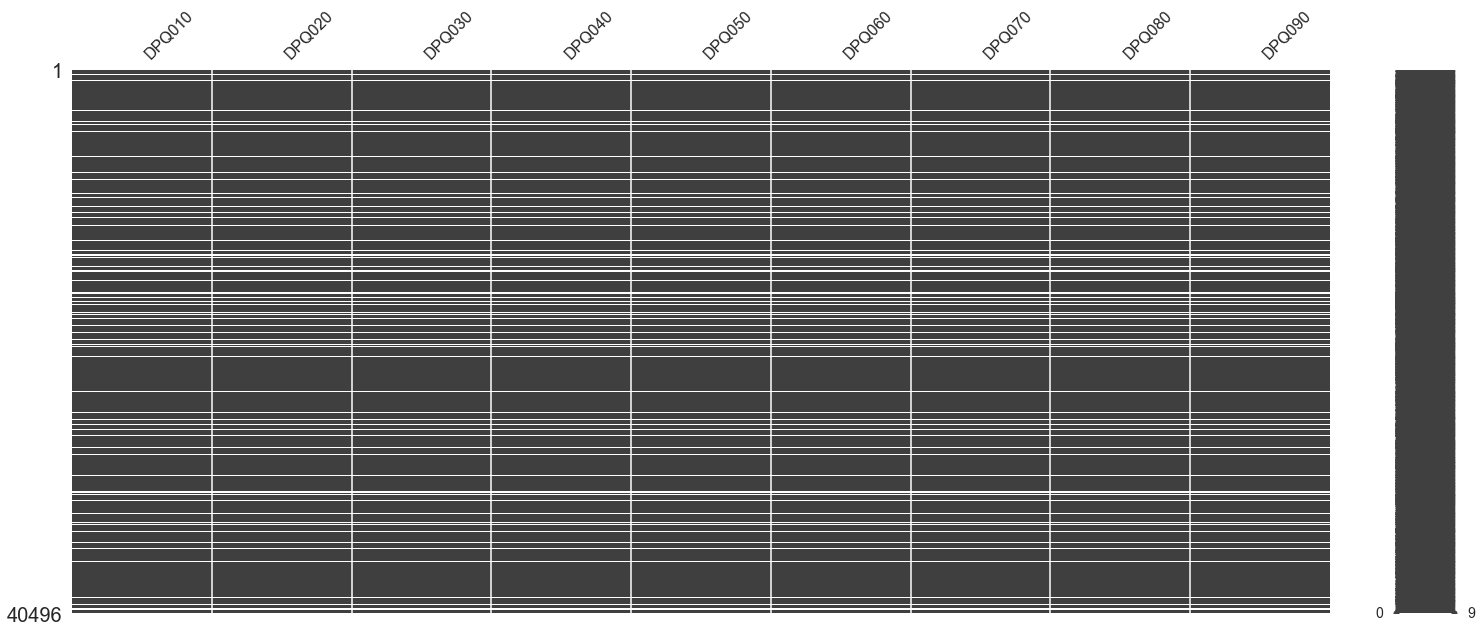

In [12]:
# Looking at the pattern of null values
import missingno as ms
ms.matrix(df_target);

In [13]:
# Removing all null entries
df_target.dropna(inplace=True)

In [14]:
# Checking for null values and how many entries are left
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36447 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36447 non-null  float64
 1   DPQ020  36447 non-null  float64
 2   DPQ030  36447 non-null  float64
 3   DPQ040  36447 non-null  float64
 4   DPQ050  36447 non-null  float64
 5   DPQ060  36447 non-null  float64
 6   DPQ070  36447 non-null  float64
 7   DPQ080  36447 non-null  float64
 8   DPQ090  36447 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [15]:
df_target.head()

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090
SEQN                                                                         
31131   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31132   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31134   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31139   0.000   0.000   0.000   0.000   3.000   1.000   0.000   0.000   0.000
31143   0.000   1.000   1.000   1.000   1.000   1.000   1.000   0.000   0.000

In [8]:
# Looking at function that performs .value_counts()
func = inspect.getsource(pf.val_counts)
display(Markdown("```python\n"+func+"\n```"))

```python
def val_counts(df):
    '''
    Display value counts for all the columns in a DataFrame.

    Args:
        df (DataFrame): DataFrame to perform .value_counts() on each column. 

    Returns:
        Value counts for each column with some visual cues between columns.
    '''

    for col in df.columns:
        print(f'{col} value counts', '\n')
        display(df[col].value_counts(dropna=False))
        print('--------------------------------------')

```

In [17]:
# Looking at the values for the columns
pf.val_counts(df_target)

DPQ010 value counts 



0.000    27333
1.000     5946
2.000     1716
3.000     1385
9.000       54
7.000       13
Name: DPQ010, dtype: int64

--------------------------------------
DPQ020 value counts 



0.000    27582
1.000     6117
2.000     1471
3.000     1243
9.000       26
7.000        8
Name: DPQ020, dtype: int64

--------------------------------------
DPQ030 value counts 



0.000    22611
1.000     8120
3.000     3180
2.000     2506
9.000       24
7.000        6
Name: DPQ030, dtype: int64

--------------------------------------
DPQ040 value counts 



0.000    18316
1.000    12057
3.000     3108
2.000     2937
9.000       23
7.000        6
Name: DPQ040, dtype: int64

--------------------------------------
DPQ050 value counts 



0.000    27482
1.000     5614
2.000     1696
3.000     1628
9.000       24
7.000        3
Name: DPQ050, dtype: int64

--------------------------------------
DPQ060 value counts 



0.000    30214
1.000     4161
2.000     1032
3.000      989
9.000       45
7.000        6
Name: DPQ060, dtype: int64

--------------------------------------
DPQ070 value counts 



0.000    30248
1.000     3967
3.000     1126
2.000     1075
9.000       27
7.000        4
Name: DPQ070, dtype: int64

--------------------------------------
DPQ080 value counts 



0.000    32397
1.000     2574
2.000      770
3.000      661
9.000       41
7.000        4
Name: DPQ080, dtype: int64

--------------------------------------
DPQ090 value counts 



0.000    35027
1.000      950
2.000      224
3.000      208
9.000       30
7.000        8
Name: DPQ090, dtype: int64

--------------------------------------


In [18]:
# Removing the entries that contain ambiguous answers(7 and 9)
df_target = df_target[(df_target != 7) & (df_target != 9)]

In [19]:
df_target.head()

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090
SEQN                                                                         
31131   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31132   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31134   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
31139   0.000   0.000   0.000   0.000   3.000   1.000   0.000   0.000   0.000
31143   0.000   1.000   1.000   1.000   1.000   1.000   1.000   0.000   0.000

In [20]:
# Checking that the 7s and 9s are removed
pf.val_counts(df_target)

DPQ010 value counts 



0.000    27333
1.000     5946
2.000     1716
3.000     1385
nan         67
Name: DPQ010, dtype: int64

--------------------------------------
DPQ020 value counts 



0.000    27582
1.000     6117
2.000     1471
3.000     1243
nan         34
Name: DPQ020, dtype: int64

--------------------------------------
DPQ030 value counts 



0.000    22611
1.000     8120
3.000     3180
2.000     2506
nan         30
Name: DPQ030, dtype: int64

--------------------------------------
DPQ040 value counts 



0.000    18316
1.000    12057
3.000     3108
2.000     2937
nan         29
Name: DPQ040, dtype: int64

--------------------------------------
DPQ050 value counts 



0.000    27482
1.000     5614
2.000     1696
3.000     1628
nan         27
Name: DPQ050, dtype: int64

--------------------------------------
DPQ060 value counts 



0.000    30214
1.000     4161
2.000     1032
3.000      989
nan         51
Name: DPQ060, dtype: int64

--------------------------------------
DPQ070 value counts 



0.000    30248
1.000     3967
3.000     1126
2.000     1075
nan         31
Name: DPQ070, dtype: int64

--------------------------------------
DPQ080 value counts 



0.000    32397
1.000     2574
2.000      770
3.000      661
nan         45
Name: DPQ080, dtype: int64

--------------------------------------
DPQ090 value counts 



0.000    35027
1.000      950
2.000      224
3.000      208
nan         38
Name: DPQ090, dtype: int64

--------------------------------------


In [21]:
# Checking the entries
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36447 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36380 non-null  float64
 1   DPQ020  36413 non-null  float64
 2   DPQ030  36417 non-null  float64
 3   DPQ040  36418 non-null  float64
 4   DPQ050  36420 non-null  float64
 5   DPQ060  36396 non-null  float64
 6   DPQ070  36416 non-null  float64
 7   DPQ080  36402 non-null  float64
 8   DPQ090  36409 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [22]:
# Looking at null values
df_target.isna().sum()

DPQ010    67
DPQ020    34
DPQ030    30
DPQ040    29
DPQ050    27
DPQ060    51
DPQ070    31
DPQ080    45
DPQ090    38
dtype: int64

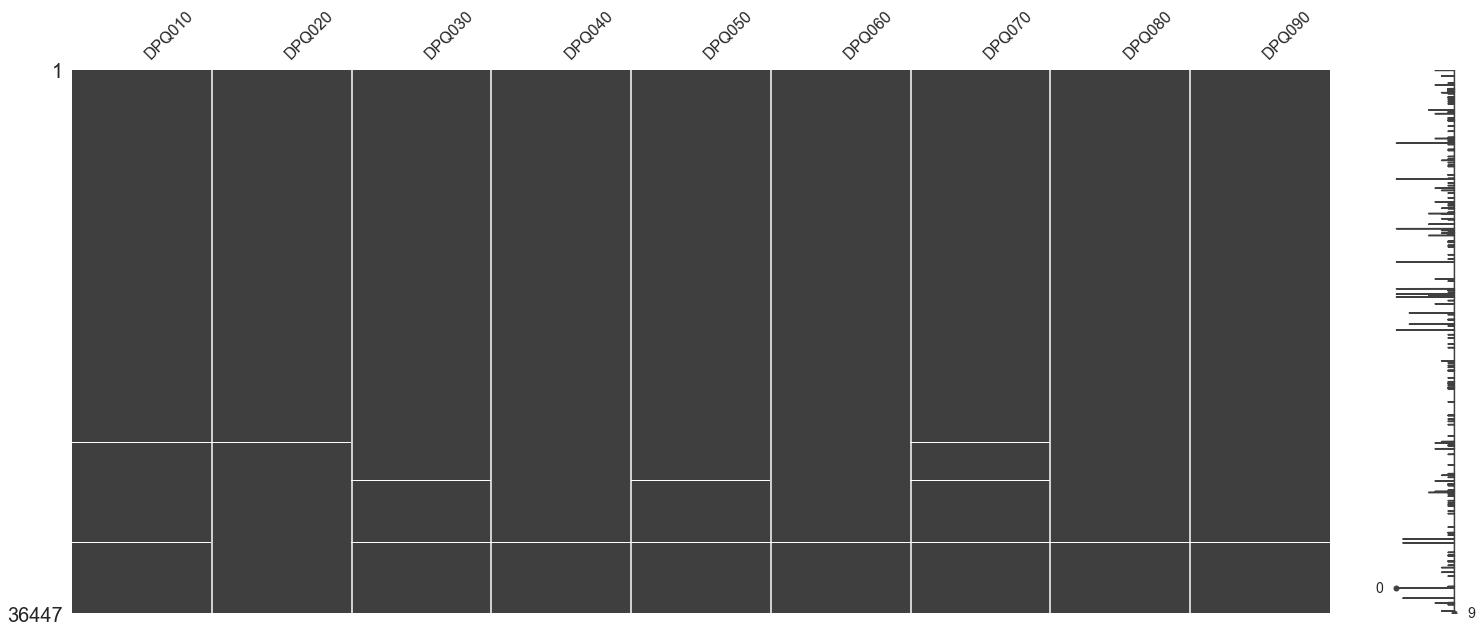

In [23]:
# Visualizing null values
ms.matrix(df_target);

In [24]:
# Dropping null values
df_target.dropna(inplace=True)

In [25]:
# Checking entries and columns
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36259 non-null  float64
 1   DPQ020  36259 non-null  float64
 2   DPQ030  36259 non-null  float64
 3   DPQ040  36259 non-null  float64
 4   DPQ050  36259 non-null  float64
 5   DPQ060  36259 non-null  float64
 6   DPQ070  36259 non-null  float64
 7   DPQ080  36259 non-null  float64
 8   DPQ090  36259 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [26]:
# Castin all the columns to be int type
df_target = df_target.astype('int64')

In [27]:
df_target.head()

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090
SEQN                                                                         
31131       0       0       0       0       0       0       0       0       0
31132       0       0       0       0       0       0       0       0       0
31134       0       0       0       0       0       0       0       0       0
31139       0       0       0       0       3       1       0       0       0
31143       0       1       1       1       1       1       1       0       0

In [28]:
# Summing all the entries across each row
df_target['Total'] = df_target.sum(axis=1)

In [29]:
df_target.head()

DPQ010  DPQ020  DPQ030  DPQ040  ...  DPQ070  DPQ080  DPQ090  Total
SEQN                                   ...                               
31131       0       0       0       0  ...       0       0       0      0
31132       0       0       0       0  ...       0       0       0      0
31134       0       0       0       0  ...       0       0       0      0
31139       0       0       0       0  ...       0       0       0      4
31143       0       1       1       1  ...       1       0       0      6

[5 rows x 10 columns]

In [30]:
# Looking at the totals
df_target.Total.value_counts(1)

0    0.329
1    0.149
2    0.119
3    0.091
4    0.065
5    0.047
6    0.039
7    0.030
8    0.024
9    0.019
10   0.016
11   0.012
12   0.010
13   0.009
14   0.008
15   0.006
16   0.005
17   0.004
18   0.004
19   0.003
21   0.002
20   0.002
22   0.001
24   0.001
23   0.001
25   0.001
27   0.000
26   0.000
Name: Total, dtype: float64

In [31]:
# Creating the target column based on the value in the total column
df_target['depression'] = df_target.Total.apply(
    lambda x: 'Not Depressed' if x<10 else 'Depressed')

In [32]:
# Looking at the target value counts
df_target.depression.value_counts(1)

Not Depressed   0.913
Depressed       0.087
Name: depression, dtype: float64

In [33]:
# Slicing out only the target column into its own DataFrame
target_clean = pd.DataFrame(df_target['depression'])
target_clean.head()

depression
SEQN                
31131  Not Depressed
31132  Not Depressed
31134  Not Depressed
31139  Not Depressed
31143  Not Depressed

In [34]:
# Checking that the DataFrame has the expected number of entries
target_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 31131 to 102956
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   depression  36259 non-null  object
dtypes: object(1)
memory usage: 566.5+ KB


In [35]:
# Checking the values
target_clean.depression.value_counts(1)

Not Depressed   0.913
Depressed       0.087
Name: depression, dtype: float64

# Demographic Data

The files gathered for this demographic data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Demographics Data", and clicking the link for the XPT file next to "Demographic Variables and Sample Weights". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [36]:
# Combining all the files for the demographic information
path = r'Data/Demographics'
df_demo = pf.glob_concat(path, '*.XPT')

['Data/Demographics\\DEMO_D.XPT',
 'Data/Demographics\\DEMO_E.XPT',
 'Data/Demographics\\DEMO_F.XPT',
 'Data/Demographics\\DEMO_G.XPT',
 'Data/Demographics\\DEMO_H.XPT',
 'Data/Demographics\\DEMO_I.XPT',
 'Data/Demographics\\DEMO_J.XPT']

In [37]:
# Checking the DataFrame
df_demo.head()

SDDSRVYR  RIDSTATR  RIDEXMON  ...  DMDHREDZ  DMDHRMAZ  DMDHSEDZ
SEQN                                 ...                              
31127     4.000     2.000     2.000  ...       nan       nan       nan
31128     4.000     2.000     1.000  ...       nan       nan       nan
31129     4.000     2.000     2.000  ...       nan       nan       nan
31130     4.000     2.000     2.000  ...       nan       nan       nan
31131     4.000     2.000     2.000  ...       nan       nan       nan

[5 rows x 61 columns]

In [38]:
# Checking the columns and entries
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  70190 non-null  float64
 1   RIDSTATR  70190 non-null  float64
 2   RIDEXMON  67364 non-null  float64
 3   RIAGENDR  70190 non-null  float64
 4   RIDAGEYR  70190 non-null  float64
 5   RIDAGEMN  32591 non-null  float64
 6   RIDAGEEX  28999 non-null  float64
 7   RIDRETH1  70190 non-null  float64
 8   DMQMILIT  18934 non-null  float64
 9   DMDBORN   10348 non-null  float64
 10  DMDCITZN  70163 non-null  float64
 11  DMDYRSUS  13405 non-null  float64
 12  DMDEDUC3  18882 non-null  float64
 13  DMDEDUC2  39749 non-null  float64
 14  DMDSCHOL  7807 non-null   float64
 15  DMDMARTL  41468 non-null  float64
 16  DMDHHSIZ  70190 non-null  float64
 17  DMDFMSIZ  70190 non-null  float64
 18  INDHHINC  10216 non-null  float64
 19  INDFMINC  10238 non-null  float64
 20  INDFMPIR  63858 non-nul

In [39]:
# Creating a list of columns to check each one
df_demo.columns.sort_values()

Index(['AIALANG', 'AIALANGA', 'DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN',
       'DMDEDUC2', 'DMDEDUC3', 'DMDFMSIZ', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB',
       'DMDHHSZE', 'DMDHRAGE', 'DMDHRAGZ', 'DMDHRBR2', 'DMDHRBR4', 'DMDHRBRN',
       'DMDHREDU', 'DMDHREDZ', 'DMDHRGND', 'DMDHRMAR', 'DMDHRMAZ', 'DMDHSEDU',
       'DMDHSEDZ', 'DMDMARTL', 'DMDSCHOL', 'DMDYRSUS', 'DMQADFC', 'DMQMILIT',
       'DMQMILIZ', 'FIAINTRP', 'FIALANG', 'FIAPROXY', 'INDFMIN2', 'INDFMINC',
       'INDFMPIR', 'INDHHIN2', 'INDHHINC', 'MIAINTRP', 'MIALANG', 'MIAPROXY',
       'RIAGENDR', 'RIDAGEEX', 'RIDAGEMN', 'RIDAGEYR', 'RIDEXAGM', 'RIDEXAGY',
       'RIDEXMON', 'RIDEXPRG', 'RIDRETH1', 'RIDRETH3', 'RIDSTATR', 'SDDSRVYR',
       'SDMVPSU', 'SDMVSTRA', 'SIAINTRP', 'SIALANG', 'SIAPROXY', 'WTINT2YR',
       'WTMEC2YR'],
      dtype='object')

In [40]:
# Listing the columns to keep
demo_tokeep = ['DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 
               'DMDHHSIZ', 'DMDMARTL', 'DMQMILIT', 'DMQMILIZ', 'INDHHIN2', 
               'INDHHINC', 'RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1']

In [9]:
# Looking at the function that creates a new DataFrame with the wanted columns
func = inspect.getsource(pf.cols_tokeep)
display(Markdown("```python\n"+func+"\n```"))

```python
def cols_tokeep(df, col_list):
    '''
    Makes a copy of the passed in DataFrame and drops all columns except those
    specified in a list.
    
    Args:
        df(DataFrame): DataFrame to take specific columns from.
        col_list(list): List of columns in the DataFrame to be kept.
    
    Returns:
        New DataFrame that has only the columns specified from the col_list.
    
    Example:
        new_df = cols_tokeep(old_df, columns_list)
    '''
    df_copy = df.copy()
    for col in df_copy.columns:
        if col not in col_list:
            df_copy.drop(columns=[col], inplace=True)
        else:
            pass
    return df_copy

```

In [42]:
# Creating the new DataFrame with only the wanted columns
demo_clean = pf.cols_tokeep(df_demo, demo_tokeep)

In [43]:
# Checking the new DataFrame
demo_clean.head()

RIAGENDR  RIDAGEYR  RIDRETH1  ...  INDHHIN2  DMQMILIZ  DMDBORN4
SEQN                                 ...                              
31127     1.000     0.000     3.000  ...       nan       nan       nan
31128     2.000    11.000     4.000  ...       nan       nan       nan
31129     1.000    15.000     4.000  ...       nan       nan       nan
31130     2.000    85.000     3.000  ...       nan       nan       nan
31131     2.000    44.000     4.000  ...       nan       nan       nan

[5 rows x 15 columns]

In [44]:
# Checking the entries and columns
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  70190 non-null  float64
 1   RIDAGEYR  70190 non-null  float64
 2   RIDRETH1  70190 non-null  float64
 3   DMQMILIT  18934 non-null  float64
 4   DMDBORN   10348 non-null  float64
 5   DMDCITZN  70163 non-null  float64
 6   DMDEDUC2  39749 non-null  float64
 7   DMDMARTL  41468 non-null  float64
 8   DMDHHSIZ  70190 non-null  float64
 9   INDHHINC  10216 non-null  float64
 10  RIDEXPRG  10901 non-null  float64
 11  DMDBORN2  20686 non-null  float64
 12  INDHHIN2  58628 non-null  float64
 13  DMQMILIZ  24421 non-null  float64
 14  DMDBORN4  39156 non-null  float64
dtypes: float64(15)
memory usage: 8.6 MB


In [45]:
# Listing the columns to reference for cleaning
demo_clean.columns.sort_values()

Index(['DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 'DMDHHSIZ',
       'DMDMARTL', 'DMQMILIT', 'DMQMILIZ', 'INDHHIN2', 'INDHHINC', 'RIAGENDR',
       'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1'],
      dtype='object')

## Birth Place

The birth place question changed slightly over time but was still very similar. For these columns, the null values are filled with zeros then everything is added across the rows to a single column to combine all the values into one.

In [46]:
# Checking column values
demo_clean.DMDBORN.value_counts(dropna=False)

nan      59842
1.000     8794
2.000      961
3.000      588
7.000        5
Name: DMDBORN, dtype: int64

In [47]:
# Checking column values
demo_clean.DMDBORN2.value_counts(dropna=False)

nan      49504
1.000    16938
2.000     1550
4.000     1120
5.000     1065
7.000       11
9.000        2
Name: DMDBORN2, dtype: int64

In [48]:
# Checking column values
demo_clean.DMDBORN4.value_counts(dropna=False)

nan       31034
1.000     30966
2.000      8175
77.000        8
99.000        7
Name: DMDBORN4, dtype: int64

In [49]:
# Fill all null values with zero
demo_clean.DMDBORN.fillna(0, inplace=True)
demo_clean.DMDBORN2.fillna(0, inplace=True)
demo_clean.DMDBORN4.fillna(0, inplace=True)

In [50]:
# Add all the columns together to get the values in one column
demo_clean['birth_place'] = demo_clean['DMDBORN'] + demo_clean['DMDBORN2'] + demo_clean['DMDBORN4']

In [51]:
# Verify new column exists
demo_clean.head()

RIAGENDR  RIDAGEYR  RIDRETH1  ...  DMQMILIZ  DMDBORN4  birth_place
SEQN                                 ...                                 
31127     1.000     0.000     3.000  ...       nan     0.000        1.000
31128     2.000    11.000     4.000  ...       nan     0.000        1.000
31129     1.000    15.000     4.000  ...       nan     0.000        1.000
31130     2.000    85.000     3.000  ...       nan     0.000        1.000
31131     2.000    44.000     4.000  ...       nan     0.000        1.000

[5 rows x 16 columns]

In [52]:
# Check values of new column to make sure everything is as expected
demo_clean.birth_place.value_counts(dropna=False)

1.000     56698
2.000     10686
4.000      1120
5.000      1065
3.000       588
7.000        16
77.000        8
99.000        7
9.000         2
Name: birth_place, dtype: int64

In [53]:
# Drop the old columns that are no longer needed
demo_clean.drop(columns=['DMDBORN', 'DMDBORN2', 'DMDBORN4'], inplace=True)

In [54]:
# Verifying the columns were dropped
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RIAGENDR     70190 non-null  float64
 1   RIDAGEYR     70190 non-null  float64
 2   RIDRETH1     70190 non-null  float64
 3   DMQMILIT     18934 non-null  float64
 4   DMDCITZN     70163 non-null  float64
 5   DMDEDUC2     39749 non-null  float64
 6   DMDMARTL     41468 non-null  float64
 7   DMDHHSIZ     70190 non-null  float64
 8   INDHHINC     10216 non-null  float64
 9   RIDEXPRG     10901 non-null  float64
 10  INDHHIN2     58628 non-null  float64
 11  DMQMILIZ     24421 non-null  float64
 12  birth_place  70190 non-null  float64
dtypes: float64(13)
memory usage: 7.5 MB


## Veteran

The question about being a veteran changed slightly between years but was still similar enough to directly combine these columns. The null values are filled with zeros then everything is added across the rows to a single column to combine all the values into one.

In [55]:
# Check column values
demo_clean.DMQMILIT.value_counts(dropna=False)

nan      51256
2.000    16685
1.000     2242
7.000        6
9.000        1
Name: DMQMILIT, dtype: int64

In [56]:
# Check column values
demo_clean.DMQMILIZ.value_counts(dropna=False)

nan      45769
2.000    22235
1.000     2182
7.000        3
9.000        1
Name: DMQMILIZ, dtype: int64

In [57]:
# Fill null values with zero
demo_clean.DMQMILIT.fillna(0, inplace=True)
demo_clean.DMQMILIZ.fillna(0, inplace=True)

In [58]:
# Add columns straight across into a new column
demo_clean['veteran'] = demo_clean['DMQMILIT'] + demo_clean['DMQMILIZ']

In [59]:
# Checking the values are as expected of the new column
demo_clean.veteran.value_counts(dropna=False)

2.000    38920
0.000    26835
1.000     4424
7.000        9
9.000        2
Name: veteran, dtype: int64

In [60]:
# Drop the old columns that are no longer needed
demo_clean.drop(columns=['DMQMILIT', 'DMQMILIZ'], inplace=True)

In [61]:
# Checking the columns
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RIAGENDR     70190 non-null  float64
 1   RIDAGEYR     70190 non-null  float64
 2   RIDRETH1     70190 non-null  float64
 3   DMDCITZN     70163 non-null  float64
 4   DMDEDUC2     39749 non-null  float64
 5   DMDMARTL     41468 non-null  float64
 6   DMDHHSIZ     70190 non-null  float64
 7   INDHHINC     10216 non-null  float64
 8   RIDEXPRG     10901 non-null  float64
 9   INDHHIN2     58628 non-null  float64
 10  birth_place  70190 non-null  float64
 11  veteran      70190 non-null  float64
dtypes: float64(12)
memory usage: 7.0 MB


## Household Income

The household income question had a change over time where more values were added in more recent year groups. While it is unfortunate that the greater granularity doesn't exist for all the years, these columns can still be added across the rows into one and the greater specificity will be kept for those entries that have it. The number values here represent income ranges and it will be left in this bucketed form for modeling.

In [62]:
# Checking column values
demo_clean.INDHHINC.value_counts(dropna=False)

nan       59974
11.000     2195
6.000      1331
7.000       995
8.000       922
5.000       818
3.000       803
4.000       801
9.000       619
10.000      557
2.000       428
1.000       255
12.000      186
99.000      161
13.000       74
77.000       71
Name: INDHHINC, dtype: int64

In [63]:
# Checking column values
demo_clean.INDHHIN2.value_counts(dropna=False)

nan       11562
15.000     9126
6.000      6919
7.000      5498
14.000     5171
5.000      4596
8.000      4310
4.000      4056
3.000      3857
9.000      3337
10.000     2683
2.000      2430
12.000     2094
1.000      1563
77.000     1244
99.000      987
13.000      757
Name: INDHHIN2, dtype: int64

In [64]:
# Fill all null values with zero
demo_clean.INDHHINC.fillna(0, inplace=True)
demo_clean.INDHHIN2.fillna(0, inplace=True)

In [65]:
# Add columns straight across into a new column
demo_clean['household_income'] = demo_clean['INDHHINC'] + demo_clean['INDHHIN2']

In [66]:
# Checking that the values of the new column are as expected
demo_clean.household_income.value_counts(dropna=False)

15.000    9126
6.000     8250
7.000     6493
5.000     5414
8.000     5232
14.000    5171
4.000     4857
3.000     4660
9.000     3956
10.000    3240
2.000     2858
12.000    2280
11.000    2195
1.000     1818
0.000     1346
77.000    1315
99.000    1148
13.000     831
Name: household_income, dtype: int64

In [67]:
# Dropping the old columns that are no longer needed
demo_clean.drop(columns=['INDHHINC', 'INDHHIN2'], inplace=True)

In [68]:
# Verifying the columns
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RIAGENDR          70190 non-null  float64
 1   RIDAGEYR          70190 non-null  float64
 2   RIDRETH1          70190 non-null  float64
 3   DMDCITZN          70163 non-null  float64
 4   DMDEDUC2          39749 non-null  float64
 5   DMDMARTL          41468 non-null  float64
 6   DMDHHSIZ          70190 non-null  float64
 7   RIDEXPRG          10901 non-null  float64
 8   birth_place       70190 non-null  float64
 9   veteran           70190 non-null  float64
 10  household_income  70190 non-null  float64
dtypes: float64(11)
memory usage: 6.4 MB


## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [69]:
# Renaming columns
demo_clean.rename(columns={'DMDCITZN': 'citizenship', 
                           'DMDEDUC2': 'education_level', 
                           'DMDHHSIZ': 'household_size', 
                           'DMDMARTL': 'marital_status', 
                           'RIAGENDR': 'gender', 
                           'RIDAGEYR': 'age', 
                           'RIDEXPRG': 'pregnant',
                           'RIDRETH1': 'race'}, inplace=True)

In [70]:
# Checking new column names
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            70190 non-null  float64
 1   age               70190 non-null  float64
 2   race              70190 non-null  float64
 3   citizenship       70163 non-null  float64
 4   education_level   39749 non-null  float64
 5   marital_status    41468 non-null  float64
 6   household_size    70190 non-null  float64
 7   pregnant          10901 non-null  float64
 8   birth_place       70190 non-null  float64
 9   veteran           70190 non-null  float64
 10  household_income  70190 non-null  float64
dtypes: float64(11)
memory usage: 6.4 MB


## Clean Column Values

 In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

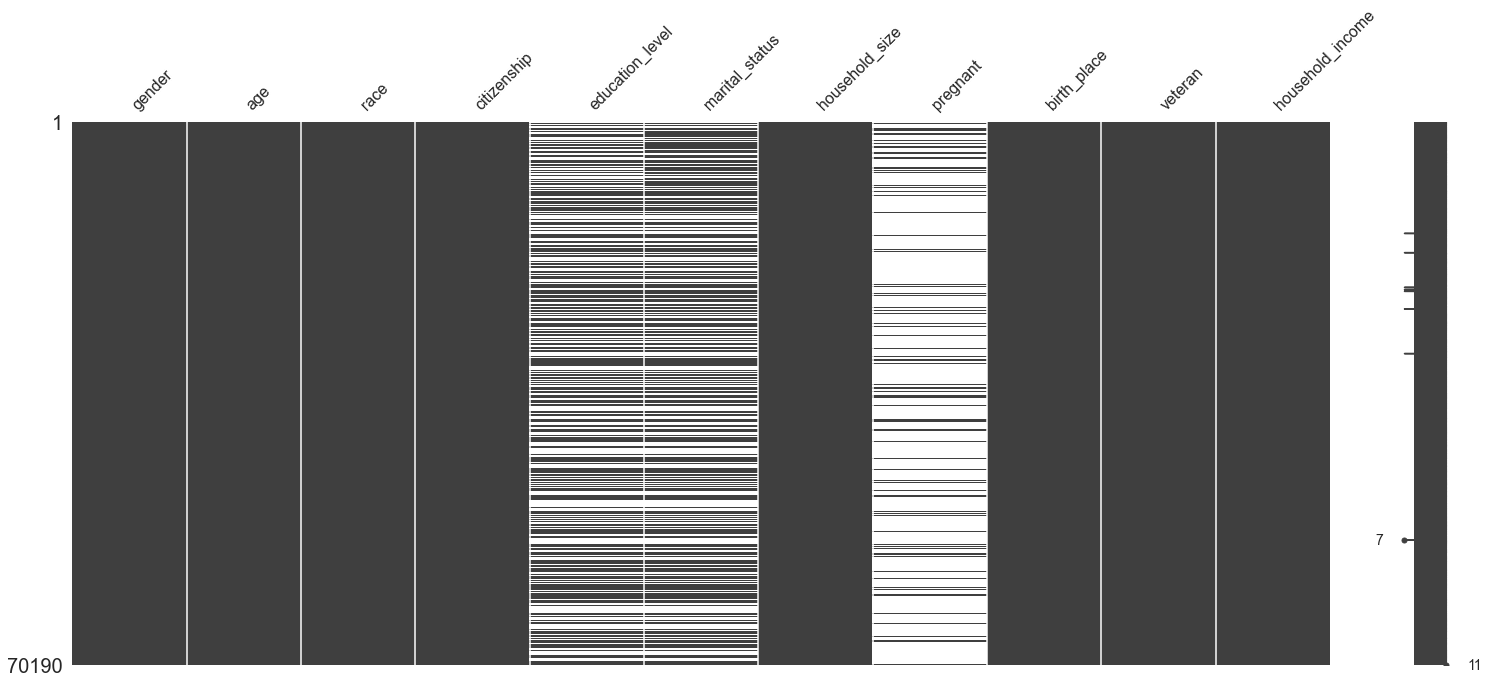

In [71]:
# Visualizing null values
ms.matrix(demo_clean);

In [72]:
# Checking all the value counts to see what needs to be fixed
pf.val_counts(demo_clean)

gender value counts 



2.000    35481
1.000    34709
Name: gender, dtype: int64

--------------------------------------
age value counts 



0.000     2987
80.000    2428
2.000     2121
1.000     2005
4.000     1585
8.000     1504
6.000     1501
11.000    1461
7.000     1455
9.000     1451
3.000     1450
10.000    1438
5.000     1403
16.000    1346
14.000    1330
12.000    1302
13.000    1261
15.000    1235
18.000    1217
17.000    1212
19.000    1177
60.000     853
61.000     803
62.000     752
63.000     730
36.000     721
40.000     718
22.000     716
23.000     702
29.000     699
30.000     698
31.000     698
51.000     695
24.000     683
41.000     681
20.000     681
50.000     680
25.000     678
33.000     675
45.000     672
39.000     672
34.000     669
44.000     669
52.000     668
32.000     666
38.000     666
46.000     665
28.000     661
54.000     660
43.000     656
26.000     653
55.000     653
21.000     652
47.000     651
64.000     640
42.000     636
27.000     633
48.000     633
35.000     630
53.000     620
56.000     614
37.000     614
65.000     609
49.000     606
66.000     598
67.000     555
59.000    

--------------------------------------
race value counts 



3.000    25326
4.000    16072
1.000    13761
5.000     8184
2.000     6847
Name: race, dtype: int64

--------------------------------------
citizenship value counts 



1.000    62794
2.000     7257
7.000       87
nan         27
9.000       25
Name: citizenship, dtype: int64

--------------------------------------
education_level value counts 



nan      30441
4.000    11561
3.000     9102
5.000     8935
2.000     5708
1.000     4382
9.000       42
7.000       19
Name: education_level, dtype: int64

--------------------------------------
marital_status value counts 



nan       28722
1.000     20284
5.000      8857
3.000      4292
2.000      3371
6.000      3279
4.000      1349
77.000       31
99.000        5
Name: marital_status, dtype: int64

--------------------------------------
household_size value counts 



4.000    14745
2.000    13308
3.000    12368
5.000    11293
7.000     6421
6.000     6262
1.000     5793
Name: household_size, dtype: int64

--------------------------------------
pregnant value counts 



nan      59289
2.000     9460
1.000      754
3.000      687
Name: pregnant, dtype: int64

--------------------------------------
birth_place value counts 



1.000     56698
2.000     10686
4.000      1120
5.000      1065
3.000       588
7.000        16
77.000        8
99.000        7
9.000         2
Name: birth_place, dtype: int64

--------------------------------------
veteran value counts 



2.000    38920
0.000    26835
1.000     4424
7.000        9
9.000        2
Name: veteran, dtype: int64

--------------------------------------
household_income value counts 



15.000    9126
6.000     8250
7.000     6493
5.000     5414
8.000     5232
14.000    5171
4.000     4857
3.000     4660
9.000     3956
10.000    3240
2.000     2858
12.000    2280
11.000    2195
1.000     1818
0.000     1346
77.000    1315
99.000    1148
13.000     831
Name: household_income, dtype: int64

--------------------------------------


In [73]:
# Changing the values of the gender column and casting as int type
demo_clean['gender'].replace({2.000:1, 1.000:0}, inplace=True)
demo_clean['gender'] = demo_clean['gender'].astype('int64')

In [74]:
# Checking column values
demo_clean.gender.value_counts()

1    35481
0    34709
Name: gender, dtype: int64

In [75]:
# Casting age column as int type
demo_clean['age'] = demo_clean['age'].astype('int64')

In [76]:
# Filling in the names of the values for the race column
demo_clean['race'].replace({1.000:'Mexican', 
                            2.000:'Other Hispanic', 
                            3.000:'White', 
                            4.000:'Black', 
                            5.000:'Other and Multiracial'}, 
                           inplace=True)

In [77]:
# Checking column values
demo_clean.race.value_counts()

White                    25326
Black                    16072
Mexican                  13761
Other and Multiracial     8184
Other Hispanic            6847
Name: race, dtype: int64

In [78]:
# Filling in the names of the values for the citizenship column
demo_clean['citizenship'].replace({1.000:'Citizen', 
                                   2.000:'Not Citizen', 
                                   7.000:'Missing', 
                                   9.000:'Missing'}, 
                                  inplace=True)
# Filling null values as missing
demo_clean['citizenship'].fillna('Missing', inplace=True)

In [79]:
# Checking column values
demo_clean.citizenship.value_counts(dropna=False)

Citizen        62794
Not Citizen     7257
Missing          139
Name: citizenship, dtype: int64

In [80]:
# Filling in the names of the values for the education level column
demo_clean['education_level'].replace({7.000: 0, 
                                       9.000: 0}, 
                                      inplace=True)

# Filling null values and casting to int type
demo_clean['education_level'].fillna(0, inplace=True)
demo_clean['education_level'] = demo_clean['education_level'].astype('int64')

In [81]:
# Checking column values
demo_clean.education_level.value_counts(dropna=False)

0    30502
4    11561
3     9102
5     8935
2     5708
1     4382
Name: education_level, dtype: int64

In [82]:
# Filling in the names of the values for the marital status column
demo_clean['marital_status'].replace({1.000:'Married', 
                                      2.000:'Widowed', 
                                      3.000:'Divorced', 
                                      4.000:'Separated', 
                                      5.000:'Never Married',
                                      6.000:'Partner',
                                      77.000:'Missing', 
                                      99.000:'Missing'}, 
                                      inplace=True)
# Filling null values as missing
demo_clean['marital_status'].fillna('Missing', inplace=True)

In [83]:
# Checking column values
demo_clean.marital_status.value_counts(dropna=False)

Missing          28758
Married          20284
Never Married     8857
Divorced          4292
Widowed           3371
Partner           3279
Separated         1349
Name: marital_status, dtype: int64

In [84]:
# Casting household size column as int type
demo_clean['household_size'] = demo_clean['household_size'].astype('int64')

In [85]:
# Filling in the names of the values for the pregnant column
demo_clean['pregnant'].replace({1.000:'Yes', 
                                2.000:'No', 
                                3.000:'Missing'}, 
                                  inplace=True)
# Filling null values as missing
demo_clean['pregnant'].fillna('Missing', inplace=True)

In [86]:
# Checking column values
demo_clean.pregnant.value_counts(dropna=False)

Missing    59976
No          9460
Yes          754
Name: pregnant, dtype: int64

In [87]:
# Filling in the names of the values for the birth place column
demo_clean['birth_place'].replace({1.000:'USA', 
                                   2.000:'Mexico', 
                                   3.000:'Elsewhere', 
                                   4.000:'Other Spanish Country', 
                                   5.000:'Other Non Spanish Country',
                                   7.000:'Missing', 
                                   9.000:'Missing',
                                   77.000:'Missing', 
                                   99.000:'Missing'}, 
                                    inplace=True)
# Filling null values as missing
demo_clean['birth_place'].fillna('Missing', inplace=True)

In [88]:
# Checking column values
demo_clean.birth_place.value_counts(dropna=False)

USA                          56698
Mexico                       10686
Other Spanish Country         1120
Other Non Spanish Country     1065
Elsewhere                      588
Missing                         33
Name: birth_place, dtype: int64

In [89]:
# Filling in the names of the values for the veteran column
demo_clean['veteran'].replace({1.000:'Yes', 
                               2.000:'No', 
                               7.000:'Missing', 
                               9.000:'Missing',
                               0.000:'Missing'}, 
                                inplace=True)

In [90]:
# Checking column values
demo_clean.veteran.value_counts(dropna=False)

No         38920
Missing    26846
Yes         4424
Name: veteran, dtype: int64

In [91]:
# Fixing the values of the household income column
demo_clean['household_income'].replace({12.000: 5, 
                                        13.000: 4,
                                        14.000: 11,
                                        15.000: 12,
                                        77.000: 0, 
                                        99.000: 0}, 
                                        inplace=True)
# Casting the household income column as int type
demo_clean['household_income'] = demo_clean['household_income'].astype('int64')

In [92]:
# Checking column values
demo_clean.household_income.value_counts(dropna=False)

12    9126
6     8250
5     7694
11    7366
7     6493
4     5688
8     5232
3     4660
9     3956
0     3809
10    3240
2     2858
1     1818
Name: household_income, dtype: int64

In [93]:
# Checking that all null values were filled
demo_clean.isna().sum()

gender              0
age                 0
race                0
citizenship         0
education_level     0
marital_status      0
household_size      0
pregnant            0
birth_place         0
veteran             0
household_income    0
dtype: int64

In [94]:
# Checking columns
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            70190 non-null  int64 
 1   age               70190 non-null  int64 
 2   race              70190 non-null  object
 3   citizenship       70190 non-null  object
 4   education_level   70190 non-null  int64 
 5   marital_status    70190 non-null  object
 6   household_size    70190 non-null  int64 
 7   pregnant          70190 non-null  object
 8   birth_place       70190 non-null  object
 9   veteran           70190 non-null  object
 10  household_income  70190 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 6.4+ MB


# Medical Conditions

The files gathered for this medical conditions data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Medical Conditions". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

In [95]:
# Combining all the files for the medical conditions information
path = r'Data/Conditions'
df_medcond = pf.glob_concat(path, '*.XPT')

['Data/Conditions\\MCQ_D.XPT',
 'Data/Conditions\\MCQ_E.XPT',
 'Data/Conditions\\MCQ_F.XPT',
 'Data/Conditions\\MCQ_G.XPT',
 'Data/Conditions\\MCQ_H.XPT',
 'Data/Conditions\\MCQ_I.XPT',
 'Data/Conditions\\MCQ_J.XPT']

In [96]:
# Checking the dataframe
df_medcond.head()

MCQ010  MCQ025  MCQ035  MCQ040  ...  MCQ371A  MCQ371B  MCQ371C  MCQ371D
SEQN                                   ...                                    
31128   2.000     nan     nan     nan  ...      nan      nan      nan      nan
31129   2.000     nan     nan     nan  ...      nan      nan      nan      nan
31130   2.000     nan     nan     nan  ...      nan      nan      nan      nan
31131   2.000     nan     nan     nan  ...      nan      nan      nan      nan
31132   2.000     nan     nan     nan  ...      nan      nan      nan      nan

[5 rows x 149 columns]

In [97]:
# Listing all the columns to look them up and see what to keep
list(df_medcond.columns.sort_values())

['AGQ030',
 'MCD093',
 'MCD180A',
 'MCD180B',
 'MCD180C',
 'MCD180D',
 'MCD180E',
 'MCD180F',
 'MCD180G',
 'MCD180K',
 'MCD180L',
 'MCD180M',
 'MCD180N',
 'MCD240A',
 'MCD240B',
 'MCD240C',
 'MCD330',
 'MCQ010',
 'MCQ025',
 'MCQ035',
 'MCQ040',
 'MCQ050',
 'MCQ051',
 'MCQ053',
 'MCQ070',
 'MCQ075',
 'MCQ080',
 'MCQ082',
 'MCQ084',
 'MCQ086',
 'MCQ092',
 'MCQ140',
 'MCQ149',
 'MCQ150G',
 'MCQ150Q',
 'MCQ151',
 'MCQ160A',
 'MCQ160B',
 'MCQ160C',
 'MCQ160D',
 'MCQ160E',
 'MCQ160F',
 'MCQ160G',
 'MCQ160K',
 'MCQ160L',
 'MCQ160M',
 'MCQ160N',
 'MCQ160O',
 'MCQ170K',
 'MCQ170L',
 'MCQ170M',
 'MCQ180A',
 'MCQ180B',
 'MCQ180C',
 'MCQ180D',
 'MCQ180E',
 'MCQ180F',
 'MCQ180G',
 'MCQ180K',
 'MCQ180L',
 'MCQ180M',
 'MCQ180N',
 'MCQ190',
 'MCQ191',
 'MCQ195',
 'MCQ203',
 'MCQ206',
 'MCQ220',
 'MCQ230A',
 'MCQ230B',
 'MCQ230C',
 'MCQ230D',
 'MCQ240A',
 'MCQ240AA',
 'MCQ240B',
 'MCQ240BB',
 'MCQ240C',
 'MCQ240CC',
 'MCQ240D',
 'MCQ240DD',
 'MCQ240DK',
 'MCQ240E',
 'MCQ240F',
 'MCQ240G',
 'MCQ240H',
 

In [98]:
# Listing the columns to keep
medcond_tokeep = ['AGQ030', 'MCQ010', 'MCQ025', 'MCQ035', 'MCQ050', 
                  'MCQ053', 'MCQ080', 'MCQ092', 'MCQ160A', 'MCQ160B', 
                  'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 
                  'MCQ160K', 'MCQ160L', 'MCQ160M', 'MCQ170K', 'MCQ170L', 
                  'MCQ170M', 'MCQ180A', 'MCD180A', 'MCQ180B', 'MCD180B', 
                  'MCQ180C', 'MCD180C', 'MCQ180D', 'MCD180D', 'MCQ180E', 
                  'MCD180E', 'MCQ180F', 'MCD180F', 'MCQ180G', 'MCD180G', 
                  'MCQ180K', 'MCD180K', 'MCQ180L', 'MCD180L', 'MCQ180M', 
                  'MCD180M', 'MCQ190', 'MCQ191', 'MCQ195', 'MCQ220', 'MCQ230A', 
                  'MCQ230B', 'MCQ230C', 'MCQ230D', 'MCQ240DK', 'MCD240A', 
                  'MCQ300A', 'MCQ300B', 'MCQ300C']

len(medcond_tokeep)

54

In [99]:
# Creating new dataframe with only the desired columns
medcond_clean = pf.cols_tokeep(df_medcond, medcond_tokeep)

In [100]:
# Checking info of new dataframe
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCQ010    67201 non-null  float64
 1   MCQ025    9977 non-null   float64
 2   MCQ035    9979 non-null   float64
 3   MCQ050    4874 non-null   float64
 4   MCQ053    67201 non-null  float64
 5   MCQ080    44700 non-null  float64
 6   MCQ092    58636 non-null  float64
 7   MCQ160A   39747 non-null  float64
 8   MCQ160B   39748 non-null  float64
 9   MCQ160C   39748 non-null  float64
 10  MCQ160D   39748 non-null  float64
 11  MCQ160E   39748 non-null  float64
 12  MCQ160F   39748 non-null  float64
 13  MCQ160G   39748 non-null  float64
 14  MCQ160K   39748 non-null  float64
 15  MCQ160L   39748 non-null  float64
 16  MCQ160M   39748 non-null  float64
 17  MCQ170K   2292 non-null   float64
 18  MCQ170L   1584 non-null   float64
 19  MCQ170M   4010 non-null   float64
 20  MCQ180A   9019 non-null

## Onset Age Columns

There are several questions about the age of onset for various conditions. The questions for these items changed slightly through the years so they need to be combined into one. By first creating a dictionary of the paired columns and conditions that they represent, all of these columns can be cleaned at once. 

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. 


In [101]:
# Pairing up the columns that ask the onset of the same conditions
col_pairs = [('MCD180A', 'MCQ180A'), 
             ('MCD180B', 'MCQ180B'), 
             ('MCD180C', 'MCQ180C'), 
             ('MCD180D', 'MCQ180D'), 
             ('MCD180E', 'MCQ180E'), 
             ('MCD180F', 'MCQ180F'), 
             ('MCD180G', 'MCQ180G'), 
             ('MCD180K', 'MCQ180K'), 
             ('MCD180L', 'MCQ180L'), 
             ('MCD180M', 'MCQ180M'), 
             ('MCD240A', 'MCQ240DK')]

In [102]:
# Listing the conditions to zip together with the column names
col_disease = ['arthritis', 'heart_failure', 'heart_disease', 'angina', 
              'heart_attack', 'stroke', 'emphysema', 'bronchitis', 
              'liver_condition', 'thyroid_problem', 'cancer']

In [103]:
# Creating the dictionary
disease_dict = dict(zip(col_disease, col_pairs))
disease_dict

{'arthritis': ('MCD180A', 'MCQ180A'),
 'heart_failure': ('MCD180B', 'MCQ180B'),
 'heart_disease': ('MCD180C', 'MCQ180C'),
 'angina': ('MCD180D', 'MCQ180D'),
 'heart_attack': ('MCD180E', 'MCQ180E'),
 'stroke': ('MCD180F', 'MCQ180F'),
 'emphysema': ('MCD180G', 'MCQ180G'),
 'bronchitis': ('MCD180K', 'MCQ180K'),
 'liver_condition': ('MCD180L', 'MCQ180L'),
 'thyroid_problem': ('MCD180M', 'MCQ180M'),
 'cancer': ('MCD240A', 'MCQ240DK')}

In [104]:
# Loop through each item in the dictionary
for key in disease_dict:
#    Loop through both of the paired column names

    for item in disease_dict[key]:
#        Fill null and replace the "missing" and "I don't know" answers with zero
        medcond_clean[item].fillna(0, inplace=True)
        medcond_clean[item] = medcond_clean[item].replace(99999, 0)
        medcond_clean[item] = medcond_clean[item].replace(77777, 0)
        
#    Combining the two columns for each of the conditions into a new column
    medcond_clean[f'{key}_onset'] = medcond_clean[disease_dict[key][0]] + medcond_clean[disease_dict[key][1]]
#    Casting to int type
    medcond_clean[f'{key}_onset'] = medcond_clean[f'{key}_onset'].astype('int64')
#    Dropping the old columns from the dataframe
    medcond_clean.drop(columns=[disease_dict[key][0], disease_dict[key][1]], 
                       inplace=True)   

In [105]:
# Checking columns
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MCQ010                 67201 non-null  float64
 1   MCQ025                 9977 non-null   float64
 2   MCQ035                 9979 non-null   float64
 3   MCQ050                 4874 non-null   float64
 4   MCQ053                 67201 non-null  float64
 5   MCQ080                 44700 non-null  float64
 6   MCQ092                 58636 non-null  float64
 7   MCQ160A                39747 non-null  float64
 8   MCQ160B                39748 non-null  float64
 9   MCQ160C                39748 non-null  float64
 10  MCQ160D                39748 non-null  float64
 11  MCQ160E                39748 non-null  float64
 12  MCQ160F                39748 non-null  float64
 13  MCQ160G                39748 non-null  float64
 14  MCQ160K                39748 non-null  float64
 1

In [106]:
medcond_clean.head()

MCQ010  MCQ025  ...  thyroid_problem_onset  cancer_onset
SEQN                   ...                                     
31128   2.000     nan  ...                      0             0
31129   2.000     nan  ...                      0             0
31130   2.000     nan  ...                      0             0
31131   2.000     nan  ...                      0             0
31132   2.000     nan  ...                     63             0

[5 rows x 43 columns]

## Arthritis Type Columns

The arthritis type question changed slightly over time but was still very similar. For these columns, the null values are filled with empty strings so that everything can then be added across the rows to a single column to combine all the values into one.

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. 

In [107]:
# Checking column values
medcond_clean['MCQ190'].value_counts(dropna=False)

nan      64201
9.000     1121
2.000      910
1.000      584
3.000      386
7.000        1
Name: MCQ190, dtype: int64

In [108]:
# Renaming values
medcond_clean['MCQ190'].replace({1.000:'Rheumatoid', 
                                2.000:'Osteoarthritis', 
                                3.000:'Other', 
                                7.000:'Missing', 
                                9.000:'Missing'}, 
                               inplace=True)

In [109]:
# Filling null values with empty strings
medcond_clean['MCQ190'].fillna('', inplace=True)

In [110]:
# Checking column values
medcond_clean['MCQ190'].value_counts(dropna=False)

                  64201
Missing            1122
Osteoarthritis      910
Rheumatoid          584
Other               386
Name: MCQ190, dtype: int64

In [111]:
# Checking column values
medcond_clean['MCQ191'].value_counts(dropna=False)

nan      65529
9.000      605
2.000      514
1.000      316
4.000      226
3.000        8
7.000        5
Name: MCQ191, dtype: int64

In [112]:
# Renaming values
medcond_clean['MCQ191'].replace({1.000:'Rheumatoid', 
                                2.000:'Osteoarthritis', 
                                3.000:'Psoriatic',
                                4.000:'Other',
                                7.000:'Missing', 
                                9.000:'Missing'}, 
                               inplace=True)

In [113]:
# Filling null values with empty strings
medcond_clean['MCQ191'].fillna('', inplace=True)

In [114]:
# Checking column values
medcond_clean['MCQ191'].value_counts(dropna=False)

                  65529
Missing             610
Osteoarthritis      514
Rheumatoid          316
Other               226
Psoriatic             8
Name: MCQ191, dtype: int64

In [115]:
# Checking column values
medcond_clean['MCQ195'].value_counts(dropna=False)

nan      61165
1.000     2597
9.000     1664
2.000     1132
4.000      559
3.000       82
7.000        4
Name: MCQ195, dtype: int64

In [116]:
# Renaming values
medcond_clean['MCQ195'].replace({1.000:'Osteoarthritis', 
                                2.000:'Rheumatoid', 
                                3.000:'Psoriatic',
                                4.000:'Other',
                                7.000:'Missing', 
                                9.000:'Missing'}, 
                               inplace=True)

In [117]:
# Filling null values with empty strings
medcond_clean['MCQ195'].fillna('', inplace=True)

In [118]:
# Checking column values
medcond_clean['MCQ195'].value_counts(dropna=False)

                  61165
Osteoarthritis     2597
Missing            1668
Rheumatoid         1132
Other               559
Psoriatic            82
Name: MCQ195, dtype: int64

In [119]:
# Creating new column by adding the others together
medcond_clean['arthritis_type'] = medcond_clean['MCQ190'] + medcond_clean['MCQ191'] + medcond_clean['MCQ195']

In [120]:
# Checking column values are as expected
medcond_clean['arthritis_type'].value_counts(dropna=False)

                  56489
Osteoarthritis     4021
Missing            3400
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

In [121]:
# Replace empty strings with Missing
medcond_clean['arthritis_type'] = medcond_clean['arthritis_type'].replace('', 'Missing')

In [122]:
# Checking column values
medcond_clean['arthritis_type'].value_counts(dropna=False)

Missing           59889
Osteoarthritis     4021
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

In [123]:
# Drop old columns that are no longer needed
medcond_clean.drop(columns=['MCQ190', 'MCQ191', 'MCQ195'], inplace=True)  

## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [124]:
# Listing columns to see what needs to be renamed
medcond_clean.columns

Index(['MCQ010', 'MCQ025', 'MCQ035', 'MCQ050', 'MCQ053', 'MCQ080', 'MCQ092',
       'MCQ160A', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F',
       'MCQ160G', 'MCQ160K', 'MCQ160L', 'MCQ160M', 'MCQ170K', 'MCQ170L',
       'MCQ170M', 'MCQ220', 'MCQ230A', 'MCQ230B', 'MCQ230C', 'MCQ230D',
       'MCQ300A', 'MCQ300B', 'MCQ300C', 'AGQ030', 'arthritis_onset',
       'heart_failure_onset', 'heart_disease_onset', 'angina_onset',
       'heart_attack_onset', 'stroke_onset', 'emphysema_onset',
       'bronchitis_onset', 'liver_condition_onset', 'thyroid_problem_onset',
       'cancer_onset', 'arthritis_type'],
      dtype='object')

In [125]:
# Renaming columns
medcond_clean.rename(columns={'MCQ010': 'asthma', 
                              'MCQ025': 'asthma_onset', 
                              'MCQ035': 'asthma_currently', 
                              'MCQ050': 'asthma_emergency', 
                              'MCQ053': 'anemia', 
                              'MCQ080': 'ever_overweight', 
                              'MCQ092': 'blood_transfusion',
                              'MCQ160A': 'arthritis', 
                              'MCQ160B': 'heart_failure', 
                              'MCQ160C': 'heart_disease', 
                              'MCQ160D': 'angina', 
                              'MCQ160E': 'heart_attack', 
                              'MCQ160F': 'stroke', 
                              'MCQ160G': 'emphysema', 
                              'MCQ160K': 'bronchitis', 
                              'MCQ160L': 'liver_condition', 
                              'MCQ160M': 'thyroid_problem', 
                              'MCQ170K': 'bronchitis_currently', 
                              'MCQ170L': 'liver_condition_currently',
                              'MCQ170M': 'thyroid_problem_currently',  
                              'MCQ220': 'cancer', 
                              'MCQ230A': 'first_cancer_type', 
                              'MCQ230B': 'second_cancer_type', 
                              'MCQ230C': 'third_cancer_type',
                              'MCQ230D': 'fourth_cancer_count', 
                              'MCQ300A': 'heart_attack_relative', 
                              'MCQ300B': 'asthma_relative', 
                              'MCQ300C': 'diabetes_relative', 
                              'AGQ030': 'hay_fever'
                              }, inplace=True)

In [126]:
# Checking columns
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asthma                     67201 non-null  float64
 1   asthma_onset               9977 non-null   float64
 2   asthma_currently           9979 non-null   float64
 3   asthma_emergency           4874 non-null   float64
 4   anemia                     67201 non-null  float64
 5   ever_overweight            44700 non-null  float64
 6   blood_transfusion          58636 non-null  float64
 7   arthritis                  39747 non-null  float64
 8   heart_failure              39748 non-null  float64
 9   heart_disease              39748 non-null  float64
 10  angina                     39748 non-null  float64
 11  heart_attack               39748 non-null  float64
 12  stroke                     39748 non-null  float64
 13  emphysema                  39748 non-null

## Clean Column Values

 In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [127]:
# Checking column values
pf.val_counts(medcond_clean)

asthma value counts 



2.000    57147
1.000     9979
9.000       70
7.000        5
nan          2
Name: asthma, dtype: int64

--------------------------------------
asthma_onset value counts 



nan          57226
1.000         2085
2.000          682
5.000          601
3.000          529
6.000          450
4.000          440
10.000         412
7.000          380
8.000          368
12.000         285
9.000          241
13.000         178
40.000         159
11.000         158
30.000         154
15.000         148
99999.000      141
50.000         140
14.000         136
16.000         127
35.000         104
25.000         103
18.000         102
20.000          89
45.000          85
60.000          78
55.000          68
22.000          65
17.000          64
28.000          59
21.000          53
65.000          50
42.000          48
38.000          48
19.000          47
23.000          43
52.000          39
70.000          38
27.000          38
37.000          37
32.000          37
44.000          36
58.000          35
53.000          35
48.000          35
24.000          34
29.000          34
80.000          34
47.000          34
26.000          34
62.000          33
33.000      

--------------------------------------
asthma_currently value counts 



nan      57224
1.000     6104
2.000     3708
9.000      166
7.000        1
Name: asthma_currently, dtype: int64

--------------------------------------
asthma_emergency value counts 



nan      62329
2.000     3687
1.000     1186
9.000        1
Name: asthma_emergency, dtype: int64

--------------------------------------
anemia value counts 



2.000    65087
1.000     2056
9.000       52
7.000        6
nan          2
Name: anemia, dtype: int64

--------------------------------------
ever_overweight value counts 



2.000    30109
nan      22503
1.000    14556
9.000       33
7.000        2
Name: ever_overweight, dtype: int64

--------------------------------------
blood_transfusion value counts 



2.000    52979
nan       8567
1.000     5120
9.000      533
7.000        4
Name: blood_transfusion, dtype: int64

--------------------------------------
arthritis value counts 



2.000    28947
nan      27456
1.000    10714
9.000       85
7.000        1
Name: arthritis, dtype: int64

--------------------------------------
heart_failure value counts 



2.000    38281
nan      27455
1.000     1355
9.000      111
7.000        1
Name: heart_failure, dtype: int64

--------------------------------------
heart_disease value counts 



2.000    37940
nan      27455
1.000     1644
9.000      162
7.000        2
Name: heart_disease, dtype: int64

--------------------------------------
angina value counts 



2.000    38584
nan      27455
1.000     1033
9.000      129
7.000        2
Name: angina, dtype: int64

--------------------------------------
heart_attack value counts 



2.000    37971
nan      27455
1.000     1712
9.000       64
7.000        1
Name: heart_attack, dtype: int64

--------------------------------------
stroke value counts 



2.000    38098
nan      27455
1.000     1591
9.000       58
7.000        1
Name: stroke, dtype: int64

--------------------------------------
emphysema value counts 



2.000    38867
nan      27455
1.000      825
9.000       55
7.000        1
Name: emphysema, dtype: int64

--------------------------------------
bronchitis value counts 



2.000    37380
nan      27455
1.000     2292
9.000       75
7.000        1
Name: bronchitis, dtype: int64

--------------------------------------
liver_condition value counts 



2.000    38084
nan      27455
1.000     1584
9.000       79
7.000        1
Name: liver_condition, dtype: int64

--------------------------------------
thyroid_problem value counts 



2.000    35644
nan      27455
1.000     4010
9.000       90
7.000        4
Name: thyroid_problem, dtype: int64

--------------------------------------
bronchitis_currently value counts 



nan      64911
2.000     1157
1.000     1076
9.000       59
Name: bronchitis_currently, dtype: int64

--------------------------------------
liver_condition_currently value counts 



nan      65619
1.000      860
2.000      577
9.000      146
7.000        1
Name: liver_condition_currently, dtype: int64

--------------------------------------
thyroid_problem_currently value counts 



nan      63193
1.000     2944
2.000      923
9.000      142
7.000        1
Name: thyroid_problem_currently, dtype: int64

--------------------------------------
cancer value counts 



2.000    35932
nan      27455
1.000     3782
9.000       33
7.000        1
Name: cancer, dtype: int64

--------------------------------------
first_cancer_type value counts 



nan       63423
14.000      594
30.000      567
32.000      562
33.000      279
16.000      251
15.000      244
25.000      219
39.000      168
38.000      144
23.000       93
10.000       89
24.000       85
28.000       79
37.000       77
19.000       65
21.000       38
35.000       30
99.000       28
17.000       21
26.000       20
36.000       19
22.000       18
13.000       16
20.000       16
12.000       14
29.000       12
31.000       12
11.000        9
34.000        7
18.000        2
9.000         1
27.000        1
Name: first_cancer_type, dtype: int64

--------------------------------------
second_cancer_type value counts 



nan       66802
30.000       45
32.000       45
33.000       40
39.000       39
16.000       30
25.000       29
38.000       23
28.000       22
14.000       21
10.000       15
19.000       10
12.000        9
31.000        9
37.000        9
23.000        8
24.000        8
22.000        7
15.000        6
21.000        6
20.000        4
17.000        4
26.000        3
35.000        3
13.000        2
29.000        2
11.000        2
Name: second_cancer_type, dtype: int64

--------------------------------------
third_cancer_type value counts 



nan       67157
32.000        6
39.000        5
33.000        4
25.000        4
30.000        4
38.000        3
37.000        3
16.000        3
14.000        2
22.000        2
23.000        2
21.000        2
28.000        2
12.000        1
11.000        1
13.000        1
15.000        1
Name: third_cancer_type, dtype: int64

--------------------------------------
fourth_cancer_count value counts 



nan       67197
66.000        6
Name: fourth_cancer_count, dtype: int64

--------------------------------------
heart_attack_relative value counts 



2.000    33906
nan      27455
1.000     4816
9.000     1021
7.000        5
Name: heart_attack_relative, dtype: int64

--------------------------------------
asthma_relative value counts 



2.000    41287
1.000    12782
nan      11999
9.000     1127
7.000        8
Name: asthma_relative, dtype: int64

--------------------------------------
diabetes_relative value counts 



nan      27455
2.000    22559
1.000    16387
9.000      795
7.000        7
Name: diabetes_relative, dtype: int64

--------------------------------------
hay_fever value counts 



nan      64562
2.000     1939
1.000      688
9.000       14
Name: hay_fever, dtype: int64

--------------------------------------
arthritis_onset value counts 



0     56698
50      762
60      564
40      547
55      484
45      439
65      344
70      318
35      286
80      275
30      274
52      203
48      202
58      200
62      167
75      166
54      165
57      161
42      161
25      160
59      160
53      156
49      153
56      150
68      149
63      146
38      145
64      135
47      132
51      128
43      123
32      120
67      120
44      113
20      108
61      106
66      102
72      102
36      101
39      101
69      101
46      100
37       93
28       93
16       91
33       81
41       80
74       72
71       71
27       70
73       70
22       68
78       65
26       64
23       63
31       62
34       61
18       60
77       58
76       56
29       54
21       52
24       51
15       46
79       44
19       43
17       43
10       42
13       31
14       25
12       21
85       19
5        19
8        14
6        13
2        13
4        12
3        11
7        11
9        10
1         8
82        5
11        4
83  

--------------------------------------
heart_failure_onset value counts 



0     65881
80       90
60       64
70       57
50       54
65       51
55       43
58       35
63       34
54       32
56       32
53       31
45       31
64       31
52       30
75       30
69       28
62       27
68       26
71       26
59       24
72       24
40       24
57       24
67       24
73       23
61       21
47       21
46       21
74       19
76       19
66       19
79       18
42       18
48       18
78       17
49       16
43       15
35       15
44       14
37       12
51       12
41       11
38       10
36       10
39        9
85        9
34        8
77        8
20        6
30        6
26        5
25        5
32        5
31        5
29        5
1         5
33        4
81        4
18        4
28        4
15        3
6         3
16        3
24        2
10        2
12        2
83        2
22        2
27        2
7         1
13        1
4         1
19        1
3         1
2         1
21        1
84        1
Name: heart_failure_onset, dtype: int64

--------------------------------------
heart_disease_onset value counts 



0     65589
60       82
50       77
55       75
80       70
65       64
70       55
58       53
62       48
56       47
66       46
68       45
54       43
59       43
53       41
57       36
64       36
49       35
45       34
40       32
61       32
71       30
72       30
63       29
48       28
74       28
52       28
67       28
46       28
69       27
75       26
73       23
42       23
51       22
47       22
76       19
78       19
79       17
35       16
44       15
77       13
38       13
43       11
41       11
37       10
36        8
85        8
39        7
30        7
32        6
11        5
34        5
33        5
5         4
16        4
10        4
82        4
22        3
28        3
25        3
20        3
27        3
1         2
6         2
15        2
8         2
12        2
13        2
26        2
7         1
17        1
81        1
3         1
18        1
21        1
31        1
23        1
Name: heart_disease_onset, dtype: int64

--------------------------------------
angina_onset value counts 



0     66190
60       53
50       48
45       40
55       39
40       37
58       32
80       30
59       28
35       28
62       26
46       26
48       23
65       23
70       23
63       22
56       22
53       21
51       21
72       21
57       19
69       19
49       19
52       18
54       17
47       17
42       16
61       16
75       15
41       14
30       14
44       13
37       13
68       12
67       12
64       11
77       11
36       10
43       10
74       10
76       10
66       10
71        9
25        9
38        9
32        8
73        8
20        7
39        7
79        7
28        7
23        6
26        5
16        5
31        5
34        4
33        4
29        4
27        4
10        4
78        4
15        4
18        4
7         3
12        2
8         2
85        2
21        2
84        2
83        1
9         1
22        1
6         1
17        1
81        1
82        1
Name: angina_onset, dtype: int64

--------------------------------------
heart_attack_onset value counts 



0     65525
50       74
55       71
60       69
80       68
65       54
70       48
58       46
56       43
59       42
45       41
53       41
57       41
54       40
64       40
62       39
51       37
40       35
46       35
52       34
48       34
63       33
61       33
72       32
68       32
47       31
49       31
69       30
35       28
71       27
66       26
67       26
42       26
74       25
38       23
37       22
75       20
78       20
73       19
79       19
41       19
43       18
39       17
44       15
76       14
77       14
32       14
85       13
30       13
25        9
36        9
33        9
31        9
20        9
34        6
29        6
24        5
28        5
16        4
21        4
27        4
26        4
23        3
82        2
10        2
84        2
14        2
83        2
15        2
9         1
6         1
22        1
4         1
2         1
1         1
19        1
81        1
Name: heart_attack_onset, dtype: int64

--------------------------------------
stroke_onset value counts 



0     65646
80      118
65       67
55       58
70       55
50       51
60       50
62       46
53       40
58       38
75       33
64       32
63       32
45       31
66       31
51       30
69       30
67       30
47       30
72       29
68       28
43       28
73       28
52       28
40       27
61       27
48       27
54       27
78       26
76       26
79       25
59       25
56       23
71       23
57       22
42       22
74       22
49       21
77       20
44       19
41       16
35       15
46       14
30       14
39       13
38       12
36       10
25       10
85        9
23        8
32        8
22        6
18        6
34        6
20        6
33        6
31        6
29        6
26        6
28        5
27        4
15        4
37        4
19        4
21        4
24        4
16        3
7         3
17        2
10        2
84        2
2         2
1         2
81        2
6         1
8         1
5         1
4         1
3         1
11        1
13        1
82        1
Name: stroke_ons

--------------------------------------
emphysema_onset value counts 



0     66395
60       46
50       38
65       36
55       34
40       34
45       32
70       32
66       21
58       19
56       19
62       18
68       17
51       17
59       17
72       17
80       15
75       15
61       15
71       15
30       15
43       14
76       14
57       14
35       13
67       13
63       13
44       13
49       12
48       12
53       12
32       11
42       10
73       10
69       10
64       10
39        9
47        9
38        9
54        9
41        8
77        7
52        7
20        7
36        6
37        6
78        6
46        5
74        5
33        5
26        5
79        5
27        4
28        4
22        4
10        3
21        3
34        3
31        2
29        2
24        2
14        2
82        2
16        2
85        2
13        2
83        2
4         1
23        1
5         1
6         1
8         1
18        1
11        1
81        1
Name: emphysema_onset, dtype: int64

--------------------------------------
bronchitis_onset value counts 



0     65000
16      124
50       92
40       90
30       89
35       69
25       66
20       54
55       53
60       50
18       43
10       43
45       43
15       41
32       41
12       40
1        38
24       37
65       33
5        33
70       31
28       30
17       30
13       30
7        30
58       28
8        28
42       27
14       27
38       26
52       25
19       25
48       25
80       25
21       24
6        23
22       23
54       22
23       22
47       22
43       21
51       21
44       21
61       21
66       20
33       20
56       20
4        20
2        19
75       19
27       19
26       19
57       18
9        18
41       17
53       17
34       17
62       16
29       15
69       15
73       15
67       15
3        14
46       13
59       13
37       13
36       13
31       13
68       12
11       11
49       11
76       11
74       10
63       10
78        9
39        9
64        9
71        7
72        7
79        6
85        4
77        3
Name: bronchitis

--------------------------------------
liver_condition_onset value counts 



0     65639
35       67
45       64
40       61
50       53
30       48
60       47
55       42
25       37
42       35
48       32
52       31
47       30
56       29
54       28
36       27
20       26
28       26
32       26
21       25
58       25
33       24
37       24
59       24
16       24
43       24
44       24
65       23
62       23
51       23
41       22
46       22
53       22
24       21
38       21
34       21
49       20
27       19
57       19
19       19
29       18
64       17
15       16
67       16
17       16
80       16
23       16
22       15
61       15
66       15
70       15
10       14
39       13
69       13
63       12
26       12
31       12
13       12
68       10
7         8
73        8
18        8
74        8
11        8
6         7
14        7
71        6
75        6
12        6
8         5
1         5
77        4
79        4
78        4
5         4
9         4
72        4
76        3
4         2
3         1
82        1
Name: liver_condition_onset,

--------------------------------------
thyroid_problem_onset value counts 



0     63264
40      184
50      180
30      168
45      128
35      126
55      117
60      113
80      112
25      103
65       98
70       72
32       71
28       66
38       66
52       66
20       65
48       60
42       59
16       59
43       58
47       57
34       56
58       56
36       55
21       52
75       51
22       50
26       50
53       49
29       49
24       48
56       48
18       47
64       46
62       46
49       45
27       45
31       45
41       45
44       42
59       42
39       42
63       41
46       40
33       40
51       39
54       39
68       38
15       38
37       38
61       37
57       36
17       34
66       33
72       32
19       30
23       30
14       30
12       28
67       28
13       27
74       27
71       26
77       21
69       21
73       21
76       20
78       16
10       13
79       12
8        10
5         9
7         8
11        7
9         7
85        6
2         4
6         3
1         3
4         3
82        2
83        2
84  

--------------------------------------
cancer_onset value counts 



0     66609
80       42
50       20
70       19
55       18
65       17
62       17
64       16
60       16
59       16
66       15
68       15
53       15
45       14
40       14
63       14
61       14
47       13
75       13
76       13
54       13
57       12
69       12
67       11
52       11
30       10
42       10
71       10
58        9
73        9
74        8
48        8
38        8
28        8
72        8
41        8
56        7
44        6
51        6
79        6
16        6
78        5
22        5
32        5
33        5
36        5
49        5
20        4
46        4
23        4
26        4
27        4
77        4
35        4
37        4
43        4
25        4
19        3
24        3
29        2
21        2
34        2
39        2
17        1
18        1
85        1
Name: cancer_onset, dtype: int64

--------------------------------------
arthritis_type value counts 



Missing           59889
Osteoarthritis     4021
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

--------------------------------------


In [128]:
# Listing columns that should have 0 or 1 values
yes_no_cols = ['arthritis', 'heart_failure', 'heart_disease', 'angina', 
              'heart_attack', 'stroke', 'emphysema', 'bronchitis', 
              'liver_condition', 'thyroid_problem', 'cancer', 'asthma', 
              'anemia', 'blood_transfusion', 'heart_attack_relative', 
              'asthma_relative', 'diabetes_relative', 'hay_fever', 
              'ever_overweight', 'asthma_currently', 'asthma_emergency', 
              'bronchitis_currently', 'liver_condition_currently', 
              'thyroid_problem_currently']

In [129]:
# Looping through the list of columns
for col in yes_no_cols:
#     Replacing negative values with zeros
    medcond_clean[col].replace({2.000: 0, 
                                 7.000: 0, 
                                 9.000: 0}, 
                                inplace=True)
#     Filling null values
    medcond_clean[col].fillna(0, inplace=True)
#     Casting to int type
    medcond_clean[col] = medcond_clean[col].astype('int64')

In [130]:
# Replacing values, filling nulls, and casting as int type
medcond_clean['asthma_onset'].replace(99999, 0, inplace=True)
medcond_clean['asthma_onset'].fillna(0, inplace=True)
medcond_clean['asthma_onset'] = medcond_clean['asthma_onset'].astype('int64')

In [131]:
# Replacing values, filling nulls, and casting as int type
medcond_clean['fourth_cancer_count'].replace(66.000, 1, inplace=True)
medcond_clean['fourth_cancer_count'].fillna(0, inplace=True)
medcond_clean['fourth_cancer_count'] = medcond_clean['fourth_cancer_count'].astype('int64')

In [132]:
# Checking that values are all fixed
pf.val_counts(medcond_clean)

asthma value counts 



0    57224
1     9979
Name: asthma, dtype: int64

--------------------------------------
asthma_onset value counts 



0     57367
1      2085
2       682
5       601
3       529
6       450
4       440
10      412
7       380
8       368
12      285
9       241
13      178
40      159
11      158
30      154
15      148
50      140
14      136
16      127
35      104
25      103
18      102
20       89
45       85
60       78
55       68
22       65
17       64
28       59
21       53
65       50
38       48
42       48
19       47
23       43
52       39
27       38
70       38
32       37
37       37
44       36
48       35
58       35
53       35
80       34
29       34
24       34
26       34
47       34
62       33
33       32
36       31
34       30
46       28
49       25
56       25
59       23
43       23
54       22
68       20
63       20
31       20
51       19
57       19
39       19
61       18
41       17
64       16
69       15
75       14
73       14
72       12
67       12
78        9
74        8
76        7
71        6
66        6
77        5
85        3
79        3
83        2
82  

--------------------------------------
asthma_currently value counts 



0    61099
1     6104
Name: asthma_currently, dtype: int64

--------------------------------------
asthma_emergency value counts 



0    66017
1     1186
Name: asthma_emergency, dtype: int64

--------------------------------------
anemia value counts 



0    65147
1     2056
Name: anemia, dtype: int64

--------------------------------------
ever_overweight value counts 



0    52647
1    14556
Name: ever_overweight, dtype: int64

--------------------------------------
blood_transfusion value counts 



0    62083
1     5120
Name: blood_transfusion, dtype: int64

--------------------------------------
arthritis value counts 



0    56489
1    10714
Name: arthritis, dtype: int64

--------------------------------------
heart_failure value counts 



0    65848
1     1355
Name: heart_failure, dtype: int64

--------------------------------------
heart_disease value counts 



0    65559
1     1644
Name: heart_disease, dtype: int64

--------------------------------------
angina value counts 



0    66170
1     1033
Name: angina, dtype: int64

--------------------------------------
heart_attack value counts 



0    65491
1     1712
Name: heart_attack, dtype: int64

--------------------------------------
stroke value counts 



0    65612
1     1591
Name: stroke, dtype: int64

--------------------------------------
emphysema value counts 



0    66378
1      825
Name: emphysema, dtype: int64

--------------------------------------
bronchitis value counts 



0    64911
1     2292
Name: bronchitis, dtype: int64

--------------------------------------
liver_condition value counts 



0    65619
1     1584
Name: liver_condition, dtype: int64

--------------------------------------
thyroid_problem value counts 



0    63193
1     4010
Name: thyroid_problem, dtype: int64

--------------------------------------
bronchitis_currently value counts 



0    66127
1     1076
Name: bronchitis_currently, dtype: int64

--------------------------------------
liver_condition_currently value counts 



0    66343
1      860
Name: liver_condition_currently, dtype: int64

--------------------------------------
thyroid_problem_currently value counts 



0    64259
1     2944
Name: thyroid_problem_currently, dtype: int64

--------------------------------------
cancer value counts 



0    63421
1     3782
Name: cancer, dtype: int64

--------------------------------------
first_cancer_type value counts 



nan       63423
14.000      594
30.000      567
32.000      562
33.000      279
16.000      251
15.000      244
25.000      219
39.000      168
38.000      144
23.000       93
10.000       89
24.000       85
28.000       79
37.000       77
19.000       65
21.000       38
35.000       30
99.000       28
17.000       21
26.000       20
36.000       19
22.000       18
13.000       16
20.000       16
12.000       14
29.000       12
31.000       12
11.000        9
34.000        7
18.000        2
9.000         1
27.000        1
Name: first_cancer_type, dtype: int64

--------------------------------------
second_cancer_type value counts 



nan       66802
30.000       45
32.000       45
33.000       40
39.000       39
16.000       30
25.000       29
38.000       23
28.000       22
14.000       21
10.000       15
19.000       10
12.000        9
31.000        9
37.000        9
23.000        8
24.000        8
22.000        7
15.000        6
21.000        6
20.000        4
17.000        4
26.000        3
35.000        3
13.000        2
29.000        2
11.000        2
Name: second_cancer_type, dtype: int64

--------------------------------------
third_cancer_type value counts 



nan       67157
32.000        6
39.000        5
33.000        4
25.000        4
30.000        4
38.000        3
37.000        3
16.000        3
14.000        2
22.000        2
23.000        2
21.000        2
28.000        2
12.000        1
11.000        1
13.000        1
15.000        1
Name: third_cancer_type, dtype: int64

--------------------------------------
fourth_cancer_count value counts 



0    67197
1        6
Name: fourth_cancer_count, dtype: int64

--------------------------------------
heart_attack_relative value counts 



0    62387
1     4816
Name: heart_attack_relative, dtype: int64

--------------------------------------
asthma_relative value counts 



0    54421
1    12782
Name: asthma_relative, dtype: int64

--------------------------------------
diabetes_relative value counts 



0    50816
1    16387
Name: diabetes_relative, dtype: int64

--------------------------------------
hay_fever value counts 



0    66515
1      688
Name: hay_fever, dtype: int64

--------------------------------------
arthritis_onset value counts 



0     56698
50      762
60      564
40      547
55      484
45      439
65      344
70      318
35      286
80      275
30      274
52      203
48      202
58      200
62      167
75      166
54      165
57      161
42      161
25      160
59      160
53      156
49      153
56      150
68      149
63      146
38      145
64      135
47      132
51      128
43      123
32      120
67      120
44      113
20      108
61      106
66      102
72      102
36      101
39      101
69      101
46      100
37       93
28       93
16       91
33       81
41       80
74       72
71       71
27       70
73       70
22       68
78       65
26       64
23       63
31       62
34       61
18       60
77       58
76       56
29       54
21       52
24       51
15       46
79       44
19       43
17       43
10       42
13       31
14       25
12       21
85       19
5        19
8        14
6        13
2        13
4        12
3        11
7        11
9        10
1         8
82        5
11        4
83  

--------------------------------------
heart_failure_onset value counts 



0     65881
80       90
60       64
70       57
50       54
65       51
55       43
58       35
63       34
54       32
56       32
53       31
45       31
64       31
52       30
75       30
69       28
62       27
68       26
71       26
59       24
72       24
40       24
57       24
67       24
73       23
61       21
47       21
46       21
74       19
76       19
66       19
79       18
42       18
48       18
78       17
49       16
43       15
35       15
44       14
37       12
51       12
41       11
38       10
36       10
39        9
85        9
34        8
77        8
20        6
30        6
26        5
25        5
32        5
31        5
29        5
1         5
33        4
81        4
18        4
28        4
15        3
6         3
16        3
24        2
10        2
12        2
83        2
22        2
27        2
7         1
13        1
4         1
19        1
3         1
2         1
21        1
84        1
Name: heart_failure_onset, dtype: int64

--------------------------------------
heart_disease_onset value counts 



0     65589
60       82
50       77
55       75
80       70
65       64
70       55
58       53
62       48
56       47
66       46
68       45
54       43
59       43
53       41
57       36
64       36
49       35
45       34
40       32
61       32
71       30
72       30
63       29
48       28
74       28
52       28
67       28
46       28
69       27
75       26
73       23
42       23
51       22
47       22
76       19
78       19
79       17
35       16
44       15
77       13
38       13
43       11
41       11
37       10
36        8
85        8
39        7
30        7
32        6
11        5
34        5
33        5
5         4
16        4
10        4
82        4
22        3
28        3
25        3
20        3
27        3
1         2
6         2
15        2
8         2
12        2
13        2
26        2
7         1
17        1
81        1
3         1
18        1
21        1
31        1
23        1
Name: heart_disease_onset, dtype: int64

--------------------------------------
angina_onset value counts 



0     66190
60       53
50       48
45       40
55       39
40       37
58       32
80       30
59       28
35       28
62       26
46       26
48       23
65       23
70       23
63       22
56       22
53       21
51       21
72       21
57       19
69       19
49       19
52       18
54       17
47       17
42       16
61       16
75       15
41       14
30       14
44       13
37       13
68       12
67       12
64       11
77       11
36       10
43       10
74       10
76       10
66       10
71        9
25        9
38        9
32        8
73        8
20        7
39        7
79        7
28        7
23        6
26        5
16        5
31        5
34        4
33        4
29        4
27        4
10        4
78        4
15        4
18        4
7         3
12        2
8         2
85        2
21        2
84        2
83        1
9         1
22        1
6         1
17        1
81        1
82        1
Name: angina_onset, dtype: int64

--------------------------------------
heart_attack_onset value counts 



0     65525
50       74
55       71
60       69
80       68
65       54
70       48
58       46
56       43
59       42
45       41
53       41
57       41
54       40
64       40
62       39
51       37
40       35
46       35
52       34
48       34
63       33
61       33
72       32
68       32
47       31
49       31
69       30
35       28
71       27
66       26
67       26
42       26
74       25
38       23
37       22
75       20
78       20
73       19
79       19
41       19
43       18
39       17
44       15
76       14
77       14
32       14
85       13
30       13
25        9
36        9
33        9
31        9
20        9
34        6
29        6
24        5
28        5
16        4
21        4
27        4
26        4
23        3
82        2
10        2
84        2
14        2
83        2
15        2
9         1
6         1
22        1
4         1
2         1
1         1
19        1
81        1
Name: heart_attack_onset, dtype: int64

--------------------------------------
stroke_onset value counts 



0     65646
80      118
65       67
55       58
70       55
50       51
60       50
62       46
53       40
58       38
75       33
64       32
63       32
45       31
66       31
51       30
69       30
67       30
47       30
72       29
68       28
43       28
73       28
52       28
40       27
61       27
48       27
54       27
78       26
76       26
79       25
59       25
56       23
71       23
57       22
42       22
74       22
49       21
77       20
44       19
41       16
35       15
46       14
30       14
39       13
38       12
36       10
25       10
85        9
23        8
32        8
22        6
18        6
34        6
20        6
33        6
31        6
29        6
26        6
28        5
27        4
15        4
37        4
19        4
21        4
24        4
16        3
7         3
17        2
10        2
84        2
2         2
1         2
81        2
6         1
8         1
5         1
4         1
3         1
11        1
13        1
82        1
Name: stroke_ons

--------------------------------------
emphysema_onset value counts 



0     66395
60       46
50       38
65       36
55       34
40       34
45       32
70       32
66       21
58       19
56       19
62       18
68       17
51       17
59       17
72       17
80       15
75       15
61       15
71       15
30       15
43       14
76       14
57       14
35       13
67       13
63       13
44       13
49       12
48       12
53       12
32       11
42       10
73       10
69       10
64       10
39        9
47        9
38        9
54        9
41        8
77        7
52        7
20        7
36        6
37        6
78        6
46        5
74        5
33        5
26        5
79        5
27        4
28        4
22        4
10        3
21        3
34        3
31        2
29        2
24        2
14        2
82        2
16        2
85        2
13        2
83        2
4         1
23        1
5         1
6         1
8         1
18        1
11        1
81        1
Name: emphysema_onset, dtype: int64

--------------------------------------
bronchitis_onset value counts 



0     65000
16      124
50       92
40       90
30       89
35       69
25       66
20       54
55       53
60       50
18       43
10       43
45       43
15       41
32       41
12       40
1        38
24       37
65       33
5        33
70       31
28       30
17       30
13       30
7        30
58       28
8        28
42       27
14       27
38       26
52       25
19       25
48       25
80       25
21       24
6        23
22       23
54       22
23       22
47       22
43       21
51       21
44       21
61       21
66       20
33       20
56       20
4        20
2        19
75       19
27       19
26       19
57       18
9        18
41       17
53       17
34       17
62       16
29       15
69       15
73       15
67       15
3        14
46       13
59       13
37       13
36       13
31       13
68       12
11       11
49       11
76       11
74       10
63       10
78        9
39        9
64        9
71        7
72        7
79        6
85        4
77        3
Name: bronchitis

--------------------------------------
liver_condition_onset value counts 



0     65639
35       67
45       64
40       61
50       53
30       48
60       47
55       42
25       37
42       35
48       32
52       31
47       30
56       29
54       28
36       27
20       26
28       26
32       26
21       25
58       25
33       24
37       24
59       24
16       24
43       24
44       24
65       23
62       23
51       23
41       22
46       22
53       22
24       21
38       21
34       21
49       20
27       19
57       19
19       19
29       18
64       17
15       16
67       16
17       16
80       16
23       16
22       15
61       15
66       15
70       15
10       14
39       13
69       13
63       12
26       12
31       12
13       12
68       10
7         8
73        8
18        8
74        8
11        8
6         7
14        7
71        6
75        6
12        6
8         5
1         5
77        4
79        4
78        4
5         4
9         4
72        4
76        3
4         2
3         1
82        1
Name: liver_condition_onset,

--------------------------------------
thyroid_problem_onset value counts 



0     63264
40      184
50      180
30      168
45      128
35      126
55      117
60      113
80      112
25      103
65       98
70       72
32       71
28       66
38       66
52       66
20       65
48       60
42       59
16       59
43       58
47       57
34       56
58       56
36       55
21       52
75       51
22       50
26       50
53       49
29       49
24       48
56       48
18       47
64       46
62       46
49       45
27       45
31       45
41       45
44       42
59       42
39       42
63       41
46       40
33       40
51       39
54       39
68       38
15       38
37       38
61       37
57       36
17       34
66       33
72       32
19       30
23       30
14       30
12       28
67       28
13       27
74       27
71       26
77       21
69       21
73       21
76       20
78       16
10       13
79       12
8        10
5         9
7         8
11        7
9         7
85        6
2         4
6         3
1         3
4         3
82        2
83        2
84  

--------------------------------------
cancer_onset value counts 



0     66609
80       42
50       20
70       19
55       18
65       17
62       17
64       16
60       16
59       16
66       15
68       15
53       15
45       14
40       14
63       14
61       14
47       13
75       13
76       13
54       13
57       12
69       12
67       11
52       11
30       10
42       10
71       10
58        9
73        9
74        8
48        8
38        8
28        8
72        8
41        8
56        7
44        6
51        6
79        6
16        6
78        5
22        5
32        5
33        5
36        5
49        5
20        4
46        4
23        4
26        4
27        4
77        4
35        4
37        4
43        4
25        4
19        3
24        3
29        2
21        2
34        2
39        2
17        1
18        1
85        1
Name: cancer_onset, dtype: int64

--------------------------------------
arthritis_type value counts 



Missing           59889
Osteoarthritis     4021
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

--------------------------------------


## Cancer Types

The cancer type columns recorded what kind of cancer people had. These columns were manipulated to create columns that were a count of whether people had had a first, second, or third cancer no matter what the type. That way, after one hot encoding the cancer type columns before modeling, the count information of a first, second, or third cancer would not be lost.

In [133]:
# Filling the null values for all of the columns by looping through a list
cancer_cols= ['first_cancer_type', 'second_cancer_type', 'third_cancer_type']
for col in cancer_cols:
    medcond_clean[col].fillna('None', inplace=True)

In [134]:
# Checking null values in the whole dataframe
medcond_clean.isna().sum()

asthma                       0
asthma_onset                 0
asthma_currently             0
asthma_emergency             0
anemia                       0
ever_overweight              0
blood_transfusion            0
arthritis                    0
heart_failure                0
heart_disease                0
angina                       0
heart_attack                 0
stroke                       0
emphysema                    0
bronchitis                   0
liver_condition              0
thyroid_problem              0
bronchitis_currently         0
liver_condition_currently    0
thyroid_problem_currently    0
cancer                       0
first_cancer_type            0
second_cancer_type           0
third_cancer_type            0
fourth_cancer_count          0
heart_attack_relative        0
asthma_relative              0
diabetes_relative            0
hay_fever                    0
arthritis_onset              0
heart_failure_onset          0
heart_disease_onset          0
angina_o

In [135]:
# Renaming the values for each cancer type they represent
for col in cancer_cols:
    medcond_clean[col].replace({10.000: 'Bladder', 
                                11.000: 'Blood', 
                                12.000: 'Bone', 
                                13.000: 'Brain', 
                                14.000: 'Breast', 
                                15.000: 'Cervical', 
                                16.000: 'Colon', 
                                17.000: 'Esophageal', 
                                18.000: 'Gallbladder',
                                19.000: 'Kidney', 
                                20.000: 'Larynx', 
                                21.000: 'Leukemia', 
                                22.000: 'Liver', 
                                23.000: 'Lung', 
                                24.000: 'Lymphoma', 
                                25.000: 'Melanoma', 
                                26.000: 'Mouth',
                                27.000: 'Nervous System', 
                                28.000: 'Ovarian', 
                                29.000: 'Pancreatic', 
                                30.000: 'Prostate',
                                31.000: 'Rectal', 
                                32.000: 'Skin Non Melanoma', 
                                33.000: 'Skin Other', 
                                34.000: 'Soft Tissue', 
                                35.000: 'Stomach', 
                                36.000: 'Testicular', 
                                37.000: 'Thyroid', 
                                38.000: 'Uterine',
                                39.000: 'Other', 
                                66.000: 'None', 
                                77.000: 'None', 
                                99.000: 'None',
                                9.000: 'None'
                               },
                               inplace=True)

In [136]:
# Displaying the value counts for each of the columns
for col in cancer_cols:
    display(medcond_clean[col].value_counts(dropna=False))

None                 63452
Breast                 594
Prostate               567
Skin Non Melanoma      562
Skin Other             279
Colon                  251
Cervical               244
Melanoma               219
Other                  168
Uterine                144
Lung                    93
Bladder                 89
Lymphoma                85
Ovarian                 79
Thyroid                 77
Kidney                  65
Leukemia                38
Stomach                 30
Esophageal              21
Mouth                   20
Testicular              19
Liver                   18
Brain                   16
Larynx                  16
Bone                    14
Rectal                  12
Pancreatic              12
Blood                    9
Soft Tissue              7
Gallbladder              2
Nervous System           1
Name: first_cancer_type, dtype: int64

None                 66802
Prostate                45
Skin Non Melanoma       45
Skin Other              40
Other                   39
Colon                   30
Melanoma                29
Uterine                 23
Ovarian                 22
Breast                  21
Bladder                 15
Kidney                  10
Rectal                   9
Bone                     9
Thyroid                  9
Lymphoma                 8
Lung                     8
Liver                    7
Leukemia                 6
Cervical                 6
Esophageal               4
Larynx                   4
Mouth                    3
Stomach                  3
Blood                    2
Brain                    2
Pancreatic               2
Name: second_cancer_type, dtype: int64

None                 67157
Skin Non Melanoma        6
Other                    5
Melanoma                 4
Skin Other               4
Prostate                 4
Thyroid                  3
Uterine                  3
Colon                    3
Lung                     2
Breast                   2
Leukemia                 2
Liver                    2
Ovarian                  2
Cervical                 1
Brain                    1
Blood                    1
Bone                     1
Name: third_cancer_type, dtype: int64

In [10]:
# Displaying what the functions look like for capturing the count information
func = inspect.getsource(pf.first_cancer_count)
display(Markdown("```python\n"+func+"\n```"))

```python
def first_cancer_count(x):
    '''
    Function for creating a new column that is a count from the first cancer
    information of people that have had a first cancer.
    
    Args:
        x(row in DataFrame): Pass over each entry in DataFrame to count if a
            first cancer is recorded.
        
    Returns:
        1 if information of a first cancer exists and 0 if it does not.
    
    Example:
        df.apply(first_cancer_count, axis=1)
    '''

    if x['first_cancer_type'] != 'None':
        return 1
    else:
        return 0

```

In [138]:
# Applying the respective function on each of the columns
medcond_clean['first_cancer_count'] = medcond_clean.apply(pf.first_cancer_count, axis=1)
medcond_clean['second_cancer_count'] = medcond_clean.apply(pf.second_cancer_count, axis=1)
medcond_clean['third_cancer_count'] = medcond_clean.apply(pf.third_cancer_count, axis=1)

In [139]:
# Checking for the new columns
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   asthma                     67203 non-null  int64 
 1   asthma_onset               67203 non-null  int64 
 2   asthma_currently           67203 non-null  int64 
 3   asthma_emergency           67203 non-null  int64 
 4   anemia                     67203 non-null  int64 
 5   ever_overweight            67203 non-null  int64 
 6   blood_transfusion          67203 non-null  int64 
 7   arthritis                  67203 non-null  int64 
 8   heart_failure              67203 non-null  int64 
 9   heart_disease              67203 non-null  int64 
 10  angina                     67203 non-null  int64 
 11  heart_attack               67203 non-null  int64 
 12  stroke                     67203 non-null  int64 
 13  emphysema                  67203 non-null  int64 
 14  b

In [140]:
# Checking the values are as expected
medcond_clean.first_cancer_count.value_counts(dropna=False)

0    63452
1     3751
Name: first_cancer_count, dtype: int64

In [141]:
# Checking the values are as expected
medcond_clean.second_cancer_count.value_counts(dropna=False)

0    66802
1      401
Name: second_cancer_count, dtype: int64

In [142]:
# Checking the values are as expected
medcond_clean.third_cancer_count.value_counts(dropna=False)

0    67157
1       46
Name: third_cancer_count, dtype: int64

In [143]:
# Checking new dataframe
medcond_clean.head()

asthma  asthma_onset  ...  second_cancer_count  third_cancer_count
SEQN                         ...                                         
31128       0             0  ...                    0                   0
31129       0             0  ...                    0                   0
31130       0             0  ...                    0                   0
31131       0             0  ...                    0                   0
31132       0             0  ...                    0                   0

[5 rows x 44 columns]

# Body Measures

The files gathered for this body measures data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Examination Data", and clicking the link for the XPT file next to "Body Measures". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [144]:
# Combining all the files for the body measures information
path = r'Data/BodyMeasures'
df_body = pf.glob_concat(path, '*.XPT')

['Data/BodyMeasures\\BMX_D.XPT',
 'Data/BodyMeasures\\BMX_E.XPT',
 'Data/BodyMeasures\\BMX_F.XPT',
 'Data/BodyMeasures\\BMX_G.XPT',
 'Data/BodyMeasures\\BMX_H.XPT',
 'Data/BodyMeasures\\BMX_I.XPT',
 'Data/BodyMeasures\\BMX_J.XPT']

In [145]:
# Looking at the dataframe
df_body.head()

BMDSTATS  BMXWT  BMIWT  BMXRECUM  ...  BMDAVSAD  BMDSADCM  BMXHIP  BMIHIP
SEQN                                     ...                                    
31127     1.000 10.200    nan    73.600  ...       nan       nan     nan     nan
31128     1.000 40.100    nan       nan  ...       nan       nan     nan     nan
31129     1.000 74.600    nan       nan  ...       nan       nan     nan     nan
31130     4.000    nan    nan       nan  ...       nan       nan     nan     nan
31131     3.000 75.200    nan       nan  ...       nan       nan     nan     nan

[5 rows x 35 columns]

In [146]:
# Listing all columns to look up each one and see what to keep
list(df_body.columns.sort_values())

['BMDAVSAD',
 'BMDBMIC',
 'BMDSADCM',
 'BMDSTATS',
 'BMIARMC',
 'BMIARML',
 'BMICALF',
 'BMIHEAD',
 'BMIHIP',
 'BMIHT',
 'BMILEG',
 'BMIRECUM',
 'BMISUB',
 'BMITHICR',
 'BMITRI',
 'BMIWAIST',
 'BMIWT',
 'BMXARMC',
 'BMXARML',
 'BMXBMI',
 'BMXCALF',
 'BMXHEAD',
 'BMXHIP',
 'BMXHT',
 'BMXLEG',
 'BMXRECUM',
 'BMXSAD1',
 'BMXSAD2',
 'BMXSAD3',
 'BMXSAD4',
 'BMXSUB',
 'BMXTHICR',
 'BMXTRI',
 'BMXWAIST',
 'BMXWT']

In [147]:
# Listing the columns to keep and creating a new dataframe with those columns
body_tokeep = ['BMXBMI', 'BMXHT', 'BMXWT']
body_clean = pf.cols_tokeep(df_body, body_tokeep)

In [148]:
body_clean.head()

BMXWT   BMXHT  BMXBMI
SEQN                        
31127 10.200     nan     nan
31128 40.100 151.600  17.450
31129 74.600 167.700  26.530
31130    nan     nan     nan
31131 75.200 156.000  30.900

In [149]:
body_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMXWT   66631 non-null  float64
 1   BMXHT   61722 non-null  float64
 2   BMXBMI  61640 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [150]:
# Renaming columns
body_clean.rename(columns={'BMXWT': 'weight', 
                           'BMXHT': 'height', 
                           'BMXBMI': 'BMI', 
                          }, inplace=True)

In [151]:
# Checking columns
body_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  66631 non-null  float64
 1   height  61722 non-null  float64
 2   BMI     61640 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [152]:
# Looking at all column values
pf.val_counts(body_clean)

weight value counts 



nan        733
65.300     123
71.700     121
63.400     121
65.100     116
76.300     113
69.200     110
77.500     109
79.300     109
77.700     109
73.800     109
67.800     109
73.200     108
71.400     107
72.100     107
62.600     107
67.000     107
74.800     107
78.600     107
74.300     106
71.900     106
68.200     106
71.000     106
65.700     105
70.300     105
70.900     105
63.100     105
61.400     104
74.200     104
70.200     104
68.300     104
77.900     104
73.000     103
70.600     103
73.300     103
63.500     103
68.000     103
74.700     103
70.000     103
77.300     103
66.500     103
61.500     102
60.300     102
75.800     102
71.200     102
57.700     102
75.000     102
69.400     102
67.200     101
63.300     101
63.800     101
76.200     101
74.600     101
69.000     100
75.900     100
72.400     100
64.700     100
79.100     100
70.100     100
67.700     100
58.400      99
71.800      99
76.700      99
63.600      99
63.700      99
58.700      99
68.700    

--------------------------------------
height value counts 



nan        5642
165.500     202
161.700     199
164.900     197
160.300     193
167.700     193
160.600     192
160.200     190
161.000     190
163.000     189
165.900     187
165.700     187
163.800     187
167.400     187
165.300     187
165.100     186
166.500     186
162.800     186
161.200     184
163.600     184
162.000     184
166.600     183
161.400     183
160.900     182
166.900     182
163.300     181
163.200     180
168.100     179
164.800     179
166.200     179
158.200     179
168.400     178
161.800     178
160.800     178
163.400     177
163.500     177
167.600     176
167.900     175
169.400     175
162.400     175
166.800     174
165.200     174
162.100     174
159.400     174
163.100     174
162.600     174
163.700     174
162.300     173
169.600     172
159.200     172
168.200     171
168.700     171
164.000     171
170.400     171
164.100     170
170.600     170
165.600     170
159.600     168
161.500     168
170.500     167
168.300     167
169.300     167
159.300 

--------------------------------------
BMI value counts 



nan        5724
23.900      218
16.100      218
26.100      217
16.200      214
22.600      214
24.600      212
25.800      209
23.700      208
24.000      208
24.500      206
23.800      205
15.700      204
26.800      204
26.600      204
23.400      203
15.900      203
15.500      202
15.800      202
16.000      201
22.500      201
25.100      200
25.600      200
26.200      199
28.000      199
23.200      198
16.700      196
24.300      195
16.300      195
27.900      195
26.400      193
25.900      193
21.700      193
23.500      190
21.500      190
16.600      190
22.000      189
24.700      189
22.300      189
24.200      188
26.500      188
27.800      187
28.900      187
25.300      186
27.200      186
15.400      185
26.300      185
27.000      184
23.300      184
25.200      183
22.400      183
28.600      182
23.600      181
15.600      181
16.800      181
27.500      181
28.200      180
24.800      180
27.300      179
25.000      179
28.500      179
21.300      179
23.000  

--------------------------------------


In [153]:
# Filling null values with 0
for col in body_clean.columns:
    body_clean.fillna(0, inplace=True)

In [154]:
# Checking null values
body_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  67364 non-null  float64
 1   height  67364 non-null  float64
 2   BMI     67364 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


In [155]:
body_clean.head()

weight  height    BMI
SEQN                        
31127  10.200   0.000  0.000
31128  40.100 151.600 17.450
31129  74.600 167.700 26.530
31130   0.000   0.000  0.000
31131  75.200 156.000 30.900

# Blood Pressure

The files gathered for this blood pressure data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Examination Data", and clicking the link for the XPT file next to "Blood Pressure". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [156]:
# Combining all the files for the blood pressure information
path = r'Data/BloodPressure'
df_blood = pf.glob_concat(path, '*.XPT')

['Data/BloodPressure\\BPX_D.XPT',
 'Data/BloodPressure\\BPX_E.XPT',
 'Data/BloodPressure\\BPX_F.XPT',
 'Data/BloodPressure\\BPX_G.XPT',
 'Data/BloodPressure\\BPX_H.XPT',
 'Data/BloodPressure\\BPX_I.XPT',
 'Data/BloodPressure\\BPX_J.XPT']

In [157]:
# Checking the new dataframe
df_blood.head()

PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  ...  BPAEN3  BPXSY4  BPXDI4  BPAEN4
SEQN                                         ...                                
31127     1.000    41.000       nan 100.000  ...     nan     nan     nan     nan
31128     1.000   401.000       nan     nan  ...   2.000     nan     nan   2.000
31129     1.000   664.000       nan     nan  ...   1.000     nan     nan     nan
31130     2.000       nan     4.000     nan  ...     nan     nan     nan     nan
31131     1.000   827.000       nan     nan  ...   2.000     nan     nan     nan

[5 rows x 27 columns]

In [158]:
# Listing all columns to look up each one and see what to keep
list(df_blood.columns.sort_values())

['BPAARM',
 'BPACSZ',
 'BPAEN1',
 'BPAEN2',
 'BPAEN3',
 'BPAEN4',
 'BPQ150A',
 'BPQ150B',
 'BPQ150C',
 'BPQ150D',
 'BPXCHR',
 'BPXDB',
 'BPXDI1',
 'BPXDI2',
 'BPXDI3',
 'BPXDI4',
 'BPXML1',
 'BPXPLS',
 'BPXPTY',
 'BPXPULS',
 'BPXSY1',
 'BPXSY2',
 'BPXSY3',
 'BPXSY4',
 'PEASCCT1',
 'PEASCST1',
 'PEASCTM1']

In [159]:
# Listing the columns to keep and creating a new dataframe with those columns
blood_tokeep = ['BPXPLS', 'BPXPULS', 'BPXDI1', 'BPXSY1']
blood_clean = pf.cols_tokeep(df_blood, blood_tokeep)

In [160]:
# Checking the new dataframe
blood_clean.head()

BPXPLS  BPXPULS  BPXSY1  BPXDI1
SEQN                                  
31127     nan    1.000     nan     nan
31128  84.000    1.000 100.000  62.000
31129  96.000    1.000 104.000  76.000
31130  70.000    1.000     nan     nan
31131  58.000    1.000 144.000  74.000

In [161]:
# Checking columns and null values
blood_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BPXPLS   51365 non-null  float64
 1   BPXPULS  64848 non-null  float64
 2   BPXSY1   48719 non-null  float64
 3   BPXDI1   48719 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB


## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [162]:
# Renaming the columns
blood_clean.rename(columns={'BPXPLS': 'pulse', 
                           'BPXPULS': 'irregular_pulse', 
                           'BPXSY1': 'systolic', 
                           'BPXDI1': 'diastolic'
                            }, inplace=True)

In [163]:
# Checking the columns
blood_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pulse            51365 non-null  float64
 1   irregular_pulse  64848 non-null  float64
 2   systolic         48719 non-null  float64
 3   diastolic        48719 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB


## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [164]:
# Checking all the values of all the columns
pf.val_counts(blood_clean)

pulse value counts 



nan        15999
70.000      3403
72.000      3382
74.000      3359
68.000      3119
76.000      3088
66.000      2977
78.000      2910
64.000      2697
80.000      2650
82.000      2533
62.000      2386
60.000      2243
84.000      2103
86.000      1795
58.000      1595
88.000      1515
90.000      1381
56.000      1121
92.000      1014
94.000       929
54.000       821
96.000       762
98.000       563
52.000       513
100.000      416
102.000      361
50.000       333
104.000      273
106.000      188
48.000       174
108.000      158
110.000       96
46.000        94
112.000       70
114.000       69
44.000        52
118.000       40
116.000       33
120.000       30
42.000        22
40.000        15
122.000       13
128.000       10
126.000        8
132.000        8
124.000        6
136.000        6
130.000        5
140.000        4
36.000         3
142.000        3
134.000        3
180.000        2
172.000        2
220.000        1
224.000        1
34.000         1
148.000       

--------------------------------------
irregular_pulse value counts 



1.000    63612
nan       2516
2.000     1236
Name: irregular_pulse, dtype: int64

--------------------------------------
systolic value counts 



nan        18645
114.000     2727
116.000     2680
106.000     2480
112.000     2315
108.000     2282
104.000     2232
118.000     2227
110.000     2226
124.000     2031
120.000     1999
126.000     1890
122.000     1833
102.000     1667
100.000     1485
128.000     1450
130.000     1265
98.000      1262
134.000     1198
96.000      1133
132.000     1110
136.000     1074
138.000      878
94.000       861
140.000      743
144.000      694
142.000      617
92.000       565
146.000      556
148.000      450
150.000      416
154.000      411
90.000       409
156.000      351
152.000      341
158.000      265
88.000       243
160.000      225
164.000      203
166.000      191
86.000       176
162.000      168
168.000      153
170.000      138
84.000       122
174.000       99
176.000       98
180.000       77
178.000       77
172.000       74
184.000       59
82.000        58
186.000       52
182.000       37
188.000       37
190.000       32
196.000       28
198.000       24
80.000        

--------------------------------------
diastolic value counts 



nan        18645
72.000      3043
64.000      2986
68.000      2983
66.000      2968
74.000      2936
62.000      2810
70.000      2788
76.000      2549
60.000      2193
58.000      2099
56.000      2077
78.000      2044
80.000      1771
54.000      1676
52.000      1532
82.000      1437
84.000      1305
50.000      1067
48.000       948
86.000       909
46.000       790
88.000       697
90.000       599
44.000       567
0.000        533
42.000       514
92.000       412
94.000       360
40.000       312
38.000       250
96.000       236
36.000       192
98.000       148
34.000       142
100.000      135
32.000       105
102.000       84
30.000        80
104.000       73
28.000        48
108.000       41
106.000       38
22.000        35
110.000       33
26.000        25
24.000        23
114.000       16
20.000        16
112.000       14
120.000       10
18.000        10
118.000        9
14.000         9
116.000        8
10.000         7
12.000         6
16.000         4
4.000         

--------------------------------------


In [165]:
# Remapping the values, filling null values, and casting as int type
blood_clean['irregular_pulse'].replace({2.000: 1, 1.000: 0,}, inplace=True)
blood_clean['irregular_pulse'].fillna(0, inplace=True)
blood_clean['irregular_pulse'] = blood_clean['irregular_pulse'].astype('int64')

In [166]:
# Filling null values and casting as int type
blood_clean['pulse'].fillna(0, inplace=True)
blood_clean['pulse'] = blood_clean['pulse'].astype('int64')

In [167]:
# Filling null values and casting as int type
blood_clean['systolic'].fillna(0, inplace=True)
blood_clean['systolic'] = blood_clean['systolic'].astype('int64')

In [168]:
# Filling null values and casting as int type
blood_clean['diastolic'].fillna(0, inplace=True)
blood_clean['diastolic'] = blood_clean['diastolic'].astype('int64')

In [169]:
# Checking all values again
pf.val_counts(blood_clean)

pulse value counts 



0      16000
70      3403
72      3382
74      3359
68      3119
76      3088
66      2977
78      2910
64      2697
80      2650
82      2533
62      2386
60      2243
84      2103
86      1795
58      1595
88      1515
90      1381
56      1121
92      1014
94       929
54       821
96       762
98       563
52       513
100      416
102      361
50       333
104      273
106      188
48       174
108      158
110       96
46        94
112       70
114       69
44        52
118       40
116       33
120       30
42        22
40        15
122       13
128       10
132        8
126        8
136        6
124        6
130        5
140        4
142        3
36         3
134        3
172        2
180        2
160        1
204        1
224        1
200        1
166        1
220        1
148        1
34         1
Name: pulse, dtype: int64

--------------------------------------
irregular_pulse value counts 



0    66128
1     1236
Name: irregular_pulse, dtype: int64

--------------------------------------
systolic value counts 



0      18645
114     2727
116     2680
106     2480
112     2315
108     2282
104     2232
118     2227
110     2226
124     2031
120     1999
126     1890
122     1833
102     1667
100     1485
128     1450
130     1265
98      1262
134     1198
96      1133
132     1110
136     1074
138      878
94       861
140      743
144      694
142      617
92       565
146      556
148      450
150      416
154      411
90       409
156      351
152      341
158      265
88       243
160      225
164      203
166      191
86       176
162      168
168      153
170      138
84       122
174       99
176       98
178       77
180       77
172       74
184       59
82        58
186       52
182       37
188       37
190       32
196       28
80        24
198       24
194       23
192       19
204       19
200       19
210       13
206       13
78        13
208       12
216        9
76         9
220        7
228        5
218        5
202        5
74         4
72         4
224        4
230        3

--------------------------------------
diastolic value counts 



0      19178
72      3043
64      2986
68      2983
66      2968
74      2936
62      2810
70      2788
76      2549
60      2193
58      2099
56      2077
78      2044
80      1771
54      1676
52      1532
82      1437
84      1305
50      1067
48       948
86       909
46       790
88       697
90       599
44       567
42       514
92       412
94       360
40       312
38       250
96       236
36       192
98       148
34       142
100      135
32       105
102       84
30        80
104       73
28        48
108       41
106       38
22        35
110       33
26        25
24        23
20        16
114       16
112       14
18        10
120       10
118        9
14         9
116        8
10         7
12         6
16         4
4          4
124        3
2          3
6          2
122        2
136        1
134        1
8          1
Name: diastolic, dtype: int64

--------------------------------------


In [170]:
# Checking columns and null values
blood_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   pulse            67364 non-null  int64
 1   irregular_pulse  67364 non-null  int64
 2   systolic         67364 non-null  int64
 3   diastolic        67364 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


In [171]:
blood_clean.head()

pulse  irregular_pulse  systolic  diastolic
SEQN                                              
31127      0                0         0          0
31128     84                0       100         62
31129     96                0       104         76
31130     70                0         0          0
31131     58                0       144         74

# Cholesterol

The files gathered for this cholesterol data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Laboratory Data", and clicking the link for the XPT files next to "Cholesterol - High - Density Lipoprotien(HDL)", "Cholesterol - Low-Density Lipoproteins(LDL) & Triglycerides", and "Cholesterol - Total". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [172]:
# Combining all the files for the total cholesterol information
path = r'Data/Cholesterol/Total'
df_totchol = pf.glob_concat(path, '*.XPT')

['Data/Cholesterol/Total\\TCHOL_D.XPT',
 'Data/Cholesterol/Total\\TCHOL_E.XPT',
 'Data/Cholesterol/Total\\TCHOL_F.XPT',
 'Data/Cholesterol/Total\\TCHOL_G.XPT',
 'Data/Cholesterol/Total\\TCHOL_H.XPT',
 'Data/Cholesterol/Total\\TCHOL_I.XPT',
 'Data/Cholesterol/Total\\TCHOL_J.XPT']

In [173]:
# Checking the dataframe
df_totchol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LBXTC    51199 non-null  float64
 1   LBDTCSI  51199 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [174]:
df_totchol.head()

LBXTC  LBDTCSI
SEQN                  
31128 129.000    3.340
31129 170.000    4.400
31130     nan      nan
31131 105.000    2.720
31132 147.000    3.800

In [175]:
# Combining all the files for the HDL cholesterol information
path = r'Data/Cholesterol/HDL'
df_hdlchol = pf.glob_concat(path, '*.XPT')

['Data/Cholesterol/HDL\\HDL_D.XPT',
 'Data/Cholesterol/HDL\\HDL_E.XPT',
 'Data/Cholesterol/HDL\\HDL_F.XPT',
 'Data/Cholesterol/HDL\\HDL_G.XPT',
 'Data/Cholesterol/HDL\\HDL_H.XPT',
 'Data/Cholesterol/HDL\\HDL_I.XPT',
 'Data/Cholesterol/HDL\\HDL_J.XPT']

In [176]:
# Checking the dataframe
df_hdlchol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBDHDD    51200 non-null  float64
 1   LBDHDDSI  51200 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [177]:
df_hdlchol.head()

LBDHDD  LBDHDDSI
SEQN                   
31128  55.000     1.420
31129  46.000     1.190
31130     nan       nan
31131  39.000     1.010
31132  59.000     1.530

In [178]:
# Combining all the files for the LDL cholesterol information
path = r'Data/Cholesterol/LDL'
df_ldlchol = pf.glob_concat(path, '*.XPT')

['Data/Cholesterol/LDL\\TRIGLY_D.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_E.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_F.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_G.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_H.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_I.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_J.XPT']

In [179]:
# Checking the dataframe
df_ldlchol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23043 entries, 31130 to 102956
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WTSAF2YR  23043 non-null  float64
 1   LBXTR     21061 non-null  float64
 2   LBDTRSI   21061 non-null  float64
 3   LBDLDL    20746 non-null  float64
 4   LBDLDLSI  20746 non-null  float64
 5   LBXAPB    3106 non-null   float64
 6   LBDAPBSI  3106 non-null   float64
 7   LBDLDLM   2631 non-null   float64
 8   LBDLDMSI  2631 non-null   float64
 9   LBDLDLN   2650 non-null   float64
 10  LBDLDNSI  2650 non-null   float64
dtypes: float64(11)
memory usage: 2.1 MB


In [180]:
df_ldlchol.head()

WTSAF2YR   LBXTR  LBDTRSI  LBDLDL  ...  LBDLDLM  LBDLDMSI  LBDLDLN  LBDLDNSI
SEQN                                      ...                                      
31130     0.000     nan      nan     nan  ...      nan       nan      nan       nan
31131 67556.810  86.000    0.971  49.000  ...      nan       nan      nan       nan
31132 80193.962  65.000    0.734  75.000  ...      nan       nan      nan       nan
31133 15668.017  61.000    0.689  81.000  ...      nan       nan      nan       nan
31134 93399.539 195.000    2.202  98.000  ...      nan       nan      nan       nan

[5 rows x 11 columns]

In [181]:
# Combining all three cholesterol related dataframes
df_chol = pd.concat([df_totchol, df_hdlchol, df_ldlchol], axis=1)

In [182]:
df_chol.head()

LBXTC  LBDTCSI  LBDHDD  LBDHDDSI  ...  LBDLDLM  LBDLDMSI  LBDLDLN  LBDLDNSI
SEQN                                      ...                                      
31128 129.000    3.340  55.000     1.420  ...      nan       nan      nan       nan
31129 170.000    4.400  46.000     1.190  ...      nan       nan      nan       nan
31130     nan      nan     nan       nan  ...      nan       nan      nan       nan
31131 105.000    2.720  39.000     1.010  ...      nan       nan      nan       nan
31132 147.000    3.800  59.000     1.530  ...      nan       nan      nan       nan

[5 rows x 15 columns]

In [183]:
# Checking the columns
df_chol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXTC     51199 non-null  float64
 1   LBDTCSI   51199 non-null  float64
 2   LBDHDD    51200 non-null  float64
 3   LBDHDDSI  51200 non-null  float64
 4   WTSAF2YR  23043 non-null  float64
 5   LBXTR     21061 non-null  float64
 6   LBDTRSI   21061 non-null  float64
 7   LBDLDL    20746 non-null  float64
 8   LBDLDLSI  20746 non-null  float64
 9   LBXAPB    3106 non-null   float64
 10  LBDAPBSI  3106 non-null   float64
 11  LBDLDLM   2631 non-null   float64
 12  LBDLDMSI  2631 non-null   float64
 13  LBDLDLN   2650 non-null   float64
 14  LBDLDNSI  2650 non-null   float64
dtypes: float64(15)
memory usage: 6.9 MB


In [184]:
# Listing the columns to look each one up
df_chol.columns

Index(['LBXTC', 'LBDTCSI', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR',
       'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBXAPB', 'LBDAPBSI', 'LBDLDLM',
       'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI'],
      dtype='object')

In [185]:
# Listing the columns to keep and creating a new dataframe
chol_tokeep = ['LBXTC', 'LBDHDD', 'LBXTR', 'LBDLDL']
chol_clean = pf.cols_tokeep(df_chol, chol_tokeep)

In [186]:
# Checking the new dataframe
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LBXTC   51199 non-null  float64
 1   LBDHDD  51200 non-null  float64
 2   LBXTR   21061 non-null  float64
 3   LBDLDL  20746 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB


## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [187]:
# renaming the columns
chol_clean.rename(columns={'LBXTC': 'total_cholesterol', 
                           'LBDHDD': 'HDL', 
                           'LBXTR': 'triglyceride', 
                           'LBDLDL': 'LDL'
                            }, inplace=True)

In [188]:
# Checking the column names
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_cholesterol  51199 non-null  float64
 1   HDL                51200 non-null  float64
 2   triglyceride       21061 non-null  float64
 3   LDL                20746 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB


## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [189]:
# Checking the values of all the columns
pf.val_counts(chol_clean)

total_cholesterol value counts 



nan        5178
164.000     573
165.000     561
161.000     555
163.000     536
166.000     535
155.000     535
171.000     532
162.000     530
172.000     529
179.000     527
174.000     520
167.000     520
188.000     517
168.000     517
178.000     511
169.000     510
175.000     509
176.000     509
173.000     508
170.000     499
160.000     496
158.000     495
180.000     495
184.000     489
150.000     488
149.000     486
185.000     482
183.000     481
159.000     479
157.000     478
187.000     476
156.000     476
186.000     474
182.000     473
153.000     471
154.000     470
177.000     465
194.000     459
181.000     456
152.000     455
192.000     454
190.000     451
146.000     450
151.000     450
197.000     446
147.000     443
195.000     441
193.000     440
148.000     435
196.000     432
143.000     431
145.000     421
191.000     410
200.000     407
140.000     396
199.000     395
198.000     392
189.000     391
142.000     389
144.000     381
204.000     381
202.000 

--------------------------------------
HDL value counts 



nan        5177
48.000     1677
50.000     1544
45.000     1502
41.000     1498
54.000     1488
47.000     1451
46.000     1449
51.000     1445
44.000     1437
49.000     1393
52.000     1374
42.000     1369
43.000     1351
53.000     1325
40.000     1325
55.000     1255
56.000     1193
57.000     1178
39.000     1171
58.000     1129
60.000     1112
38.000     1066
59.000     1042
62.000     1024
37.000      972
61.000      965
36.000      867
63.000      855
35.000      835
64.000      804
65.000      787
66.000      766
67.000      678
34.000      670
68.000      595
33.000      585
70.000      579
69.000      569
72.000      528
71.000      519
32.000      489
73.000      428
31.000      415
74.000      391
75.000      363
30.000      361
76.000      358
78.000      323
29.000      311
77.000      297
79.000      276
80.000      238
81.000      224
82.000      223
28.000      211
27.000      191
83.000      188
84.000      173
26.000      161
85.000      149
86.000      148
88.000  

--------------------------------------
triglyceride value counts 



nan         35316
62.000        219
65.000        205
78.000        203
86.000        203
61.000        202
64.000        201
55.000        198
75.000        198
94.000        197
81.000        194
67.000        191
63.000        191
79.000        189
80.000        188
56.000        188
71.000        186
58.000        185
89.000        183
54.000        180
76.000        180
59.000        180
60.000        180
57.000        179
72.000        178
68.000        177
69.000        177
70.000        177
73.000        176
51.000        173
77.000        170
82.000        167
84.000        165
87.000        165
52.000        162
85.000        161
50.000        161
74.000        160
93.000        158
101.000       155
66.000        155
90.000        154
91.000        154
100.000       152
83.000        150
92.000        150
97.000        149
44.000        147
98.000        146
105.000       143
88.000        143
104.000       142
53.000        141
41.000        141
43.000        139
95.000    

--------------------------------------
LDL value counts 



nan        35631
106.000      261
98.000       257
85.000       253
90.000       253
96.000       252
91.000       252
104.000      252
94.000       251
103.000      247
110.000      242
88.000       240
95.000       238
112.000      237
100.000      237
92.000       237
97.000       235
108.000      234
121.000      230
107.000      230
99.000       230
114.000      227
101.000      226
111.000      224
86.000       224
84.000       223
119.000      222
89.000       221
75.000       219
93.000       219
82.000       218
113.000      217
109.000      214
80.000       214
81.000       214
87.000       212
78.000       208
105.000      207
120.000      207
72.000       205
102.000      204
115.000      204
79.000       202
116.000      201
118.000      200
83.000       196
122.000      195
123.000      190
128.000      188
117.000      186
124.000      186
73.000       186
76.000       184
130.000      182
129.000      178
77.000       175
71.000       175
68.000       174
70.000       1

--------------------------------------


In [190]:
# Filling all null values and casting as int type
for col in chol_clean.columns:
    chol_clean[col].fillna(0, inplace=True)
    chol_clean[col] = chol_clean[col].astype('int64')

In [191]:
# Checking null values and data types
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total_cholesterol  56377 non-null  int64
 1   HDL                56377 non-null  int64
 2   triglyceride       56377 non-null  int64
 3   LDL                56377 non-null  int64
dtypes: int64(4)
memory usage: 2.2 MB


In [192]:
chol_clean.head()

total_cholesterol  HDL  triglyceride  LDL
SEQN                                            
31128                129   55             0    0
31129                170   46             0    0
31130                  0    0             0    0
31131                105   39            86   49
31132                147   59            65   75

# Standard Biochemistry Profile

The files gathered for this standard biochemistry profile data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Laboratory Data", and clicking the link for the XPT file next to "Standard Biochemistry Profile". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [193]:
# Combining all the files for the biochemistry information
path = r'Data/BiochemistryProfile'
df_biochem = pf.glob_concat(path, '*.XPT')

['Data/BiochemistryProfile\\BIOPRO_D.XPT',
 'Data/BiochemistryProfile\\BIOPRO_E.XPT',
 'Data/BiochemistryProfile\\BIOPRO_F.XPT',
 'Data/BiochemistryProfile\\BIOPRO_G.XPT',
 'Data/BiochemistryProfile\\BIOPRO_H.XPT',
 'Data/BiochemistryProfile\\BIOPRO_I.XPT',
 'Data/BiochemistryProfile\\BIOPRO_J.XPT']

In [194]:
# Checking the dataframe
df_biochem.head()

LBXSAL  LBDSALSI  LBXSATSI  ...  LBDSATLC  LBDSGTLC  LBDSTBLC
SEQN                               ...                              
31129   4.300    43.000    25.000  ...       nan       nan       nan
31130     nan       nan       nan  ...       nan       nan       nan
31131   3.500    35.000    14.000  ...       nan       nan       nan
31132   5.000    50.000    31.000  ...       nan       nan       nan
31133   4.200    42.000    15.000  ...       nan       nan       nan

[5 rows x 40 columns]

In [195]:
# Checking the info
df_biochem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47939 entries, 31129 to 102956
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXSAL    44361 non-null  float64
 1   LBDSALSI  44361 non-null  float64
 2   LBXSATSI  44261 non-null  float64
 3   LBXSASSI  44237 non-null  float64
 4   LBXSAPSI  44352 non-null  float64
 5   LBXSBU    44353 non-null  float64
 6   LBDSBUSI  44353 non-null  float64
 7   LBXSCA    44312 non-null  float64
 8   LBDSCASI  44312 non-null  float64
 9   LBXSCH    44350 non-null  float64
 10  LBDSCHSI  44350 non-null  float64
 11  LBXSC3SI  44269 non-null  float64
 12  LBXSCR    44357 non-null  float64
 13  LBDSCRSI  44357 non-null  float64
 14  LBXSGTSI  44351 non-null  float64
 15  LBXSGL    44358 non-null  float64
 16  LBDSGLSI  44358 non-null  float64
 17  LBXSIR    44311 non-null  float64
 18  LBDSIRSI  44311 non-null  float64
 19  LBXSLDSI  44128 non-null  float64
 20  LBXSPH    44350 non-nul

In [196]:
# Listing the columns to look each one up
df_biochem.columns

Index(['LBXSAL', 'LBDSALSI', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU',
       'LBDSBUSI', 'LBXSCA', 'LBDSCASI', 'LBXSCH', 'LBDSCHSI', 'LBXSC3SI',
       'LBXSCR', 'LBDSCRSI', 'LBXSGTSI', 'LBXSGL', 'LBDSGLSI', 'LBXSIR',
       'LBDSIRSI', 'LBXSLDSI', 'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBDSTBSI',
       'LBXSTP', 'LBDSTPSI', 'LBXSTR', 'LBDSTRSI', 'LBXSUA', 'LBDSUASI',
       'LBXSNASI', 'LBXSKSI', 'LBXSCLSI', 'LBXSOSSI', 'LBXSGB', 'LBDSGBSI',
       'LBXSCK', 'LBDSATLC', 'LBDSGTLC', 'LBDSTBLC'],
      dtype='object')

In [197]:
# Listing the columns to keep and creating a new dataframe
biochem_tokeep = ['LBXSAL', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU', 
                  'LBXSCA', 'LBXSC3SI', 'LBXSCR', 'LBXSGTSI', 'LBXSGL', 
                  'LBXSIR', 'LBXSLDSI', 'LBXSPH', 'LBXSTB', 'LBXSTP', 'LBXSUA', 
                  'LBXSNASI', 'LBXSKSI', 'LBXSCLSI', 'LBXSOSSI', 'LBXSGB']
biochem_clean = pf.cols_tokeep(df_biochem, biochem_tokeep)

In [198]:
# Checking the new dataframe
biochem_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47939 entries, 31129 to 102956
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXSAL    44361 non-null  float64
 1   LBXSATSI  44261 non-null  float64
 2   LBXSASSI  44237 non-null  float64
 3   LBXSAPSI  44352 non-null  float64
 4   LBXSBU    44353 non-null  float64
 5   LBXSCA    44312 non-null  float64
 6   LBXSC3SI  44269 non-null  float64
 7   LBXSCR    44357 non-null  float64
 8   LBXSGTSI  44351 non-null  float64
 9   LBXSGL    44358 non-null  float64
 10  LBXSIR    44311 non-null  float64
 11  LBXSLDSI  44128 non-null  float64
 12  LBXSPH    44350 non-null  float64
 13  LBXSTB    44334 non-null  float64
 14  LBXSTP    44303 non-null  float64
 15  LBXSUA    44347 non-null  float64
 16  LBXSNASI  44357 non-null  float64
 17  LBXSKSI   44348 non-null  float64
 18  LBXSCLSI  44356 non-null  float64
 19  LBXSOSSI  44351 non-null  float64
 20  LBXSGB    44302 non-nul

## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [199]:
# Listing columns to look them up
biochem_clean.columns

Index(['LBXSAL', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU', 'LBXSCA',
       'LBXSC3SI', 'LBXSCR', 'LBXSGTSI', 'LBXSGL', 'LBXSIR', 'LBXSLDSI',
       'LBXSPH', 'LBXSTB', 'LBXSTP', 'LBXSUA', 'LBXSNASI', 'LBXSKSI',
       'LBXSCLSI', 'LBXSOSSI', 'LBXSGB'],
      dtype='object')

In [200]:
# Renaming columns
biochem_clean.rename(columns={'LBXSAL': 'albumin', 
                           'LBXSATSI': 'ALT', 
                           'LBXSASSI': 'AST', 
                           'LBXSAPSI': 'ALP', 
                           'LBXSBU': 'BUN', 
                           'LBXSCA': 'calcium',
                           'LBXSC3SI': 'CO2', 
                           'LBXSCR': 'creatinine', 
                           'LBXSGTSI': 'GGT', 
                           'LBXSGL': 'glucose', 
                           'LBXSIR': 'iron', 
                           'LBXSLDSI': 'LHD',
                           'LBXSPH': 'phosphorus', 
                           'LBXSTB': 'bilirubin', 
                           'LBXSTP': 'total_protein', 
                           'LBXSUA': 'uric_acid', 
                           'LBXSNASI': 'sodium', 
                           'LBXSKSI': 'potassium',
                           'LBXSCLSI': 'chloride', 
                           'LBXSOSSI': 'osmolality', 
                           'LBXSGB': 'globulin'
                            }, inplace=True)

In [201]:
# Checking the dataframe
biochem_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47939 entries, 31129 to 102956
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   albumin        44361 non-null  float64
 1   ALT            44261 non-null  float64
 2   AST            44237 non-null  float64
 3   ALP            44352 non-null  float64
 4   BUN            44353 non-null  float64
 5   calcium        44312 non-null  float64
 6   CO2            44269 non-null  float64
 7   creatinine     44357 non-null  float64
 8   GGT            44351 non-null  float64
 9   glucose        44358 non-null  float64
 10  iron           44311 non-null  float64
 11  LHD            44128 non-null  float64
 12  phosphorus     44350 non-null  float64
 13  bilirubin      44334 non-null  float64
 14  total_protein  44303 non-null  float64
 15  uric_acid      44347 non-null  float64
 16  sodium         44357 non-null  float64
 17  potassium      44348 non-null  float64
 18  c

## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [202]:
# Checking all the values in the dataframe
pf.val_counts(biochem_clean)

albumin value counts 



4.300    5252
4.200    5152
4.400    4905
4.100    4541
4.500    4295
4.000    3674
nan      3578
4.600    3238
3.900    2718
4.700    2242
3.800    1909
4.800    1417
3.700    1180
3.600     772
4.900     771
3.500     467
5.000     439
3.400     298
5.100     200
3.300     183
3.200     145
3.100     120
3.000     106
5.200     104
2.900      62
2.800      46
5.300      39
2.700      29
2.600      22
5.400      12
2.500       6
2.400       5
2.300       3
5.500       3
5.600       2
2.100       2
1.200       1
2.000       1
Name: albumin, dtype: int64

--------------------------------------
ALT value counts 



nan         3678
15.000      2704
16.000      2667
17.000      2596
14.000      2564
18.000      2420
19.000      2357
13.000      2233
20.000      2043
21.000      1934
12.000      1730
22.000      1657
23.000      1500
24.000      1373
11.000      1255
25.000      1219
26.000      1093
27.000       946
28.000       885
10.000       811
29.000       778
30.000       650
31.000       615
32.000       550
33.000       473
9.000        471
34.000       447
35.000       387
37.000       374
36.000       355
38.000       329
39.000       280
40.000       265
8.000        257
41.000       220
42.000       215
43.000       195
44.000       180
46.000       177
47.000       153
48.000       152
49.000       143
45.000       138
7.000        123
50.000       114
52.000        98
54.000        96
53.000        93
51.000        86
56.000        82
57.000        78
58.000        77
55.000        72
61.000        65
59.000        64
63.000        63
62.000        56
64.000        55
6.000         

--------------------------------------
AST value counts 



nan         3702
21.000      3295
20.000      3220
22.000      3147
19.000      3085
23.000      2967
18.000      2769
24.000      2585
25.000      2324
17.000      2283
26.000      2035
27.000      1686
16.000      1682
28.000      1503
29.000      1265
15.000      1158
30.000      1002
31.000       843
14.000       740
32.000       666
33.000       576
34.000       498
13.000       424
35.000       418
36.000       368
37.000       299
38.000       280
12.000       223
39.000       212
40.000       193
42.000       167
41.000       160
43.000       145
44.000       119
45.000       117
11.000       110
48.000       102
46.000        97
49.000        83
47.000        79
52.000        59
50.000        59
51.000        55
10.000        54
54.000        50
53.000        47
58.000        46
55.000        44
59.000        44
56.000        40
57.000        33
60.000        30
61.000        29
64.000        28
62.000        24
63.000        22
72.000        21
67.000        20
74.000        

--------------------------------------
ALP value counts 



nan        3587
65.000      861
61.000      859
63.000      834
59.000      822
62.000      820
66.000      815
67.000      813
64.000      811
58.000      806
55.000      799
60.000      797
56.000      791
69.000      790
70.000      788
68.000      766
57.000      758
71.000      753
54.000      745
72.000      739
51.000      735
73.000      731
74.000      719
52.000      694
75.000      678
53.000      670
76.000      660
79.000      629
49.000      626
48.000      621
50.000      619
77.000      618
80.000      571
81.000      571
78.000      560
82.000      529
47.000      526
84.000      516
83.000      510
46.000      470
45.000      468
86.000      468
85.000      466
44.000      439
87.000      439
88.000      412
90.000      406
89.000      402
43.000      387
92.000      369
91.000      351
42.000      330
95.000      319
41.000      318
93.000      317
94.000      308
96.000      301
99.000      284
97.000      283
40.000      273
100.000     258
98.000      252
38.000  

--------------------------------------
BUN value counts 



11.000    4289
12.000    4133
10.000    4030
13.000    3811
9.000     3726
nan       3586
14.000    3214
8.000     2903
15.000    2782
16.000    2294
7.000     2078
17.000    1766
18.000    1390
6.000     1325
19.000    1100
20.000     874
5.000      715
21.000     645
22.000     555
23.000     395
4.000      318
24.000     288
25.000     226
26.000     208
27.000     160
3.000      131
28.000     117
30.000      95
29.000      90
31.000      72
32.000      69
34.000      58
33.000      47
2.000       38
36.000      36
35.000      32
37.000      31
39.000      30
38.000      26
44.000      24
40.000      21
42.000      20
45.000      14
41.000      14
43.000      13
47.000      12
49.000      12
46.000      11
48.000      10
55.000      10
50.000       9
54.000       8
63.000       8
56.000       7
1.000        6
52.000       6
57.000       5
59.000       4
65.000       4
51.000       4
53.000       4
61.000       3
73.000       3
64.000       3
69.000       2
95.000       2
60.000    

--------------------------------------
calcium value counts 



9.400     5131
9.500     4877
9.300     4640
9.600     4531
9.200     4078
9.700     3702
nan       3627
9.100     3232
9.800     2784
9.000     2324
9.900     1933
8.900     1530
10.000    1316
8.800      971
10.100     795
8.700      567
10.200     508
8.600      331
10.300     275
10.400     160
8.500      151
10.500      88
8.400       73
10.600      55
8.300       45
10.700      44
10.800      33
10.900      25
8.100       15
8.200       15
11.100      12
11.000      12
8.000       10
7.900        8
11.200       4
11.500       4
11.300       4
7.800        3
6.900        3
11.400       3
7.600        2
12.000       2
7.200        2
7.300        2
7.700        2
12.100       2
7.500        1
7.000        1
6.400        1
6.500        1
6.600        1
12.700       1
11.700       1
14.800       1
Name: calcium, dtype: int64

--------------------------------------
CO2 value counts 



25.000    8080
26.000    7390
24.000    7107
27.000    5452
23.000    5046
nan       3670
28.000    3142
22.000    2995
21.000    1525
29.000    1448
20.000     660
30.000     602
19.000     312
31.000     180
18.000     115
32.000      81
33.000      35
17.000      33
16.000      19
34.000      17
35.000      11
15.000       5
38.000       5
37.000       4
40.000       1
14.000       1
13.000       1
43.000       1
10.000       1
Name: CO2, dtype: int64

--------------------------------------
creatinine value counts 



nan       3582
0.800     1898
0.700     1686
0.900     1675
1.000     1238
0.720     1224
0.820     1200
0.600     1159
0.920      992
0.620      948
1.100      829
1.020      686
0.740      674
0.690      658
0.840      648
0.730      646
0.780      641
0.810      639
0.790      638
0.770      637
0.760      629
0.710      629
0.750      624
0.860      613
0.850      612
0.680      608
0.830      607
0.670      594
0.650      594
0.910      587
0.660      571
0.880      571
0.640      558
0.890      555
0.870      526
0.940      526
0.930      525
0.610      478
0.520      475
0.630      458
0.950      457
1.200      455
0.960      454
0.990      447
0.500      440
0.980      434
0.970      421
0.580      414
0.570      400
0.590      393
1.010      392
1.120      381
1.040      342
0.560      327
1.030      325
0.550      322
1.050      312
1.060      302
1.070      290
0.540      259
1.110      247
1.080      242
0.530      233
1.090      225
1.140      220
1.300      220
0.510     

--------------------------------------
GGT value counts 



nan         3588
13.000      2352
12.000      2318
14.000      2295
15.000      2266
11.000      2090
16.000      2013
17.000      1933
10.000      1816
18.000      1793
19.000      1632
9.000       1498
20.000      1489
21.000      1319
22.000      1279
23.000      1137
8.000       1052
24.000      1000
25.000       926
26.000       847
27.000       766
28.000       707
29.000       639
7.000        638
30.000       550
31.000       522
33.000       477
32.000       477
34.000       410
35.000       386
36.000       366
6.000        352
37.000       340
38.000       300
39.000       284
40.000       274
42.000       258
41.000       254
5.000        208
44.000       208
43.000       206
45.000       193
46.000       166
50.000       155
49.000       150
48.000       139
47.000       137
52.000       134
54.000       120
51.000       118
56.000       116
53.000       107
55.000       103
59.000        94
62.000        92
60.000        85
57.000        85
58.000        84
64.000        

--------------------------------------
glucose value counts 



nan        3581
89.000     1642
88.000     1624
90.000     1598
91.000     1564
87.000     1552
92.000     1536
86.000     1500
85.000     1453
93.000     1411
84.000     1349
94.000     1331
95.000     1274
83.000     1250
82.000     1153
96.000     1099
81.000     1070
98.000      999
97.000      989
80.000      891
99.000      889
100.000     855
79.000      824
101.000     716
78.000      676
102.000     672
103.000     612
104.000     569
77.000      561
105.000     507
76.000      460
106.000     439
75.000      417
107.000     400
109.000     377
108.000     353
74.000      333
110.000     313
73.000      303
111.000     296
112.000     274
72.000      256
113.000     247
114.000     231
116.000     212
71.000      202
119.000     199
118.000     196
115.000     190
70.000      182
117.000     176
123.000     166
120.000     155
121.000     146
122.000     137
126.000     136
69.000      135
124.000     126
68.000      119
125.000     118
127.000     111
67.000      110
66.000  

--------------------------------------
iron value counts 



nan        3628
68.000      588
76.000      582
67.000      577
63.000      573
71.000      561
79.000      561
72.000      554
69.000      553
73.000      551
75.000      550
87.000      546
77.000      545
78.000      544
66.000      544
74.000      541
84.000      536
64.000      534
81.000      528
80.000      527
83.000      516
61.000      515
82.000      506
89.000      505
65.000      503
62.000      502
70.000      501
86.000      498
88.000      487
58.000      487
91.000      482
93.000      480
57.000      477
85.000      475
59.000      471
60.000      468
92.000      461
90.000      456
56.000      452
54.000      446
96.000      431
95.000      431
94.000      422
55.000      420
53.000      420
50.000      417
97.000      412
98.000      411
52.000      410
99.000      401
102.000     398
51.000      397
100.000     394
101.000     393
103.000     384
104.000     373
105.000     364
48.000      364
106.000     341
49.000      340
110.000     340
47.000      337
45.000  

--------------------------------------
LHD value counts 



nan         3811
121.000      760
120.000      747
122.000      736
123.000      721
119.000      702
125.000      690
131.000      690
126.000      686
129.000      677
118.000      675
134.000      671
124.000      663
117.000      660
128.000      651
130.000      645
115.000      644
127.000      643
133.000      639
114.000      636
116.000      632
132.000      631
136.000      614
112.000      612
111.000      605
135.000      598
137.000      591
113.000      591
139.000      590
108.000      589
140.000      579
110.000      549
141.000      545
109.000      543
144.000      541
138.000      537
107.000      535
142.000      516
106.000      509
145.000      509
143.000      508
105.000      507
147.000      495
148.000      490
150.000      465
146.000      457
104.000      450
102.000      449
103.000      431
149.000      412
152.000      400
101.000      400
154.000      397
151.000      390
100.000      379
98.000       374
156.000      355
155.000      353
153.000      3

--------------------------------------
phosphorus value counts 



nan       3589
3.700     3003
3.800     2997
3.600     2938
3.900     2876
4.000     2726
3.500     2720
3.400     2495
4.100     2472
4.200     2191
3.300     2149
4.300     1915
4.400     1733
3.200     1721
3.100     1456
4.500     1335
3.000     1142
4.600     1124
2.900      906
4.700      898
4.800      719
2.800      657
4.900      617
5.000      489
2.700      438
5.100      385
2.600      304
5.200      293
5.300      259
2.500      207
5.400      193
5.500      152
2.400      128
5.600      125
5.700      105
2.300       80
5.800       58
2.200       52
6.000       49
5.900       48
6.100       36
2.100       27
6.300       22
2.000       17
6.200       13
6.400       12
6.500       11
1.900       10
6.600        9
1.800        9
6.700        7
6.800        2
1.700        2
7.200        2
8.100        2
7.500        2
1.000        1
9.600        1
7.600        1
10.900       1
8.200        1
8.900        1
7.100        1
6.900        1
1.600        1
9.700        1
3.560     

--------------------------------------
bilirubin value counts 



0.600     7162
0.500     6868
0.700     6066
0.400     5206
0.800     4641
nan       3605
0.300     3274
0.900     2985
1.000     2013
0.200     1726
1.100     1232
1.200      849
1.300      523
1.400      376
0.100      366
1.500      255
1.600      166
1.700      141
1.800       93
1.900       83
2.200       41
2.000       41
2.300       35
2.100       30
0.000       27
2.400       21
2.600       15
2.900       10
2.500       10
2.700        8
2.800        7
0.010        7
0.090        6
0.050        5
0.080        4
0.070        4
0.020        4
3.200        3
0.060        3
3.300        3
4.000        2
0.040        2
3.600        2
3.100        2
0.250        1
0.270        1
0.420        1
0.850        1
0.340        1
7.300        1
3.900        1
0.320        1
3.000        1
4.400        1
3.400        1
7.100        1
13.100       1
3.500        1
3.700        1
4.100        1
0.030        1
Name: bilirubin, dtype: int64

--------------------------------------
total_protein value counts 



7.200     4055
7.100     3895
7.000     3760
7.300     3724
nan       3636
6.900     3356
7.400     3346
7.500     2929
6.800     2831
7.600     2416
6.700     2216
7.700     1839
6.600     1790
7.800     1352
6.500     1256
7.900      952
6.400      874
8.000      691
6.300      624
8.100      459
6.200      386
8.200      312
6.100      243
8.300      204
6.000      122
8.400      121
5.900       95
8.500       85
5.800       77
8.600       50
8.700       39
5.700       37
5.600       33
5.500       23
8.800       20
5.300       13
8.900       12
9.000       11
9.100       11
5.400        8
9.300        5
5.200        4
9.200        4
10.100       3
9.500        3
4.700        2
9.400        2
10.200       1
10.400       1
5.380        1
10.300       1
11.300       1
3.400        1
10.900       1
5.100        1
10.800       1
9.700        1
10.000       1
9.900        1
4.900        1
Name: total_protein, dtype: int64

--------------------------------------
uric_acid value counts 



nan       3592
5.200     1275
4.600     1275
5.300     1264
4.900     1257
5.500     1226
5.000     1224
4.700     1223
4.800     1220
4.400     1213
5.400     1209
5.100     1174
5.600     1154
5.700     1136
4.500     1132
4.200     1107
4.300     1094
5.800     1083
5.900     1080
6.000     1040
4.100     1013
4.000     1001
6.100      949
6.200      911
3.900      889
6.300      872
3.800      851
3.700      827
6.400      799
6.500      797
3.600      733
6.700      720
6.600      716
3.500      644
6.900      616
6.800      615
3.400      595
7.000      561
7.100      503
3.300      503
7.200      480
7.300      441
3.200      411
7.400      370
7.500      349
3.100      331
7.600      309
7.700      284
7.800      282
2.900      272
3.000      268
7.900      246
8.000      210
2.800      199
8.100      183
8.200      178
2.700      158
8.300      156
8.400      150
8.500      124
8.700      106
2.600      104
8.800       99
8.600       98
8.900       79
2.500       76
9.000     

--------------------------------------
sodium value counts 



139.000    8502
140.000    8145
138.000    6626
141.000    6052
137.000    4135
nan        3582
142.000    3566
136.000    2151
143.000    1765
135.000    1035
144.000     805
134.000     436
145.000     361
133.000     236
146.000     131
132.000     113
131.000      70
147.000      55
130.000      43
129.000      30
148.000      22
128.000      16
127.000      12
124.000       7
149.000       6
150.000       5
125.000       4
151.000       4
126.000       3
121.000       2
120.000       2
154.000       2
119.000       2
160.000       2
123.000       2
155.000       1
161.000       1
153.000       1
102.000       1
107.000       1
114.000       1
157.000       1
99.000        1
117.000       1
Name: sodium, dtype: int64

--------------------------------------
potassium value counts 



3.900    4962
4.000    4912
4.100    4448
3.800    4430
nan      3591
4.200    3573
3.700    3406
4.300    2622
3.600    2318
4.400    1811
3.500    1507
4.500    1221
3.400     790
4.600     773
4.700     514
3.300     413
4.800     286
4.900     203
3.200     198
5.000     128
5.100     100
3.100      93
3.980      90
3.910      87
3.850      87
3.940      86
3.880      85
3.920      85
3.970      84
3.930      83
3.840      79
3.740      79
3.990      79
3.820      79
4.010      78
4.020      77
3.810      77
3.830      77
3.890      77
3.770      76
3.960      75
4.050      74
3.780      73
3.860      73
3.950      72
3.870      72
4.060      69
3.760      65
3.000      64
4.090      64
4.070      64
3.790      64
3.720      63
4.150      63
4.040      61
4.130      61
4.190      59
3.750      59
3.680      59
4.140      58
4.110      57
4.240      56
4.080      56
4.170      56
4.030      56
3.710      55
4.180      55
4.280      55
4.160      55
3.670      54
3.640      53
4.120 

--------------------------------------
chloride value counts 



104.000    6668
105.000    6140
103.000    5936
102.000    4824
106.000    4732
101.000    3663
nan        3583
107.000    3161
100.000    2393
108.000    1740
99.000     1580
98.000      880
109.000     759
97.000      531
110.000     338
96.000      291
95.000      189
111.000     128
94.000      121
93.000       57
112.000      48
92.000       44
91.000       25
113.000      24
90.000       20
114.000      11
89.000       10
87.000        7
115.000       6
88.000        6
86.000        4
117.000       3
84.000        3
118.000       3
116.000       3
119.000       2
73.000        1
70.000        1
83.000        1
120.000       1
79.000        1
82.000        1
Name: chloride, dtype: int64

--------------------------------------
osmolality value counts 



278.000    3931
277.000    3862
276.000    3642
279.000    3612
nan        3588
280.000    3336
275.000    3121
281.000    2822
274.000    2590
282.000    2467
283.000    2035
273.000    1952
272.000    1531
284.000    1530
285.000    1142
271.000    1082
286.000     902
270.000     721
287.000     655
288.000     501
269.000     485
289.000     343
268.000     317
290.000     289
267.000     235
291.000     199
266.000     146
292.000     145
293.000      93
265.000      90
294.000      70
264.000      56
295.000      53
296.000      40
263.000      39
297.000      38
261.000      35
262.000      34
298.000      30
260.000      23
301.000      16
299.000      14
300.000      13
302.000      11
258.000      10
259.000      10
257.000       8
256.000       8
304.000       8
306.000       5
303.000       5
250.000       4
255.000       4
246.000       3
252.000       3
313.000       2
249.000       2
308.000       2
248.000       2
305.000       2
254.000       2
315.000       2
307.000 

--------------------------------------
globulin value counts 



2.800    4403
2.900    4172
2.700    4062
3.000    3907
nan      3637
2.600    3533
3.100    3453
2.500    2958
3.200    2860
3.300    2364
2.400    2258
3.400    1876
2.300    1515
3.500    1413
3.600    1023
2.200     983
3.700     688
2.100     521
3.800     490
3.900     370
2.000     278
4.000     241
4.100     153
4.200     135
1.900     132
4.300     104
1.800      77
4.400      57
4.500      51
4.600      42
4.700      28
1.700      26
4.800      16
1.600      13
4.900      13
5.000      11
5.200       9
5.500       7
1.500       6
5.400       6
5.300       6
6.000       5
1.400       4
1.000       4
1.300       4
6.200       3
1.200       2
5.900       2
5.100       2
6.500       2
5.700       2
7.000       1
7.200       1
6.300       1
5.800       1
5.600       1
7.100       1
6.700       1
6.600       1
0.800       1
7.500       1
0.700       1
0.600       1
Name: globulin, dtype: int64

--------------------------------------


In [203]:
# Filling null values
biochem_clean.fillna(0, inplace=True)

In [204]:
# Listing columns to be integer type and changing them
int_cols = ['ALT', 'AST', 'ALP', 'BUN', 'CO2', 'GGT', 'glucose', 'iron', 'LHD', 
            'sodium', 'chloride', 'osmolality']
for col in int_cols:
    biochem_clean[col] = biochem_clean[col].astype('int64')

In [205]:
# Checking null values
biochem_clean.isna().sum()

albumin          0
ALT              0
AST              0
ALP              0
BUN              0
calcium          0
CO2              0
creatinine       0
GGT              0
glucose          0
iron             0
LHD              0
phosphorus       0
bilirubin        0
total_protein    0
uric_acid        0
sodium           0
potassium        0
chloride         0
osmolality       0
globulin         0
dtype: int64

In [206]:
# Checking dataframe information
biochem_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47939 entries, 31129 to 102956
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   albumin        47939 non-null  float64
 1   ALT            47939 non-null  int64  
 2   AST            47939 non-null  int64  
 3   ALP            47939 non-null  int64  
 4   BUN            47939 non-null  int64  
 5   calcium        47939 non-null  float64
 6   CO2            47939 non-null  int64  
 7   creatinine     47939 non-null  float64
 8   GGT            47939 non-null  int64  
 9   glucose        47939 non-null  int64  
 10  iron           47939 non-null  int64  
 11  LHD            47939 non-null  int64  
 12  phosphorus     47939 non-null  float64
 13  bilirubin      47939 non-null  float64
 14  total_protein  47939 non-null  float64
 15  uric_acid      47939 non-null  float64
 16  sodium         47939 non-null  int64  
 17  potassium      47939 non-null  float64
 18  c

In [207]:
biochem_clean.head()

albumin  ALT  AST  ALP  ...  potassium  chloride  osmolality  globulin
SEQN                           ...                                           
31129    4.300   25   25   88  ...      4.200       106         279     2.700
31130    0.000    0    0    0  ...      0.000         0           0     0.000
31131    3.500   14   16   74  ...      4.100       106         271     3.400
31132    5.000   31   29   48  ...      3.800       102         287     2.200
31133    4.200   15   21   41  ...      4.000       102         271     3.600

[5 rows x 21 columns]

# Blood Count

The files gathered for this blood count data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Laboratory Data", and clicking the link for the XPT file next to "Complete Blood Count with 5-Part Differential". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [208]:
# Combining all the files for the blood count information
path = r'Data/BloodCount'
df_count = pf.glob_concat(path, '*.XPT')

['Data/BloodCount\\CBC_D.XPT',
 'Data/BloodCount\\CBC_E.XPT',
 'Data/BloodCount\\CBC_F.XPT',
 'Data/BloodCount\\CBC_G.XPT',
 'Data/BloodCount\\CBC_H.XPT',
 'Data/BloodCount\\CBC_I.XPT',
 'Data/BloodCount\\CBC_J.XPT']

In [209]:
# Checking the dataframe
df_count.head()

LBXWBCSI  LBXLYPCT  LBXMOPCT  ...  LBXPLTSI  LBXMPSI  LBXNRBC
SEQN                                 ...                            
31128     5.000    45.300     8.600  ...   286.000    8.100      nan
31129     8.200    15.200    12.700  ...   214.000    8.900      nan
31130       nan       nan       nan  ...       nan      nan      nan
31131     5.300    35.800     7.800  ...   298.000    7.800      nan
31132     7.500    29.400     9.100  ...   225.000    8.600      nan

[5 rows x 21 columns]

In [210]:
# Checking the columns
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64491 entries, 31128 to 102956
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXWBCSI  57606 non-null  float64
 1   LBXLYPCT  57517 non-null  float64
 2   LBXMOPCT  57517 non-null  float64
 3   LBXNEPCT  57517 non-null  float64
 4   LBXEOPCT  57517 non-null  float64
 5   LBXBAPCT  57517 non-null  float64
 6   LBDLYMNO  57515 non-null  float64
 7   LBDMONO   57515 non-null  float64
 8   LBDNENO   57515 non-null  float64
 9   LBDEONO   57515 non-null  float64
 10  LBDBANO   57515 non-null  float64
 11  LBXRBCSI  57608 non-null  float64
 12  LBXHGB    57608 non-null  float64
 13  LBXHCT    57608 non-null  float64
 14  LBXMCVSI  57608 non-null  float64
 15  LBXMCHSI  57608 non-null  float64
 16  LBXMC     57638 non-null  float64
 17  LBXRDW    57608 non-null  float64
 18  LBXPLTSI  57607 non-null  float64
 19  LBXMPSI   57607 non-null  float64
 20  LBXNRBC   7523 non-null

In [211]:
# Dropping the only unwanted column
count_clean = df_count.drop(columns=['LBXNRBC'])

## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [212]:
# Listing columns to look up each one
count_clean.columns

Index(['LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT',
       'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI',
       'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBXRDW',
       'LBXPLTSI', 'LBXMPSI'],
      dtype='object')

In [213]:
# Renaming columns
count_clean.rename(columns={'LBXWBCSI': 'white_BCC', 
                            'LBXLYPCT': 'lymphocyte_percent', 
                            'LBXMOPCT': 'monocyte_percent', 
                            'LBXNEPCT': 'neutrophils_percent', 
                            'LBXEOPCT': 'eosinophils_percent', 
                            'LBXBAPCT': 'basophils_percent',
                            'LBDLYMNO': 'lymphocyte_count', 
                            'LBDMONO': 'monocyte_count', 
                            'LBDNENO': 'neutrophils_count', 
                            'LBDEONO': 'eosinophils_count', 
                            'LBDBANO': 'basophils_count', 
                            'LBXRBCSI': 'RBC_count',
                            'LBXHGB': 'hemoglobin', 
                            'LBXHCT': 'hematocrit', 
                            'LBXMCVSI': 'MCV', 
                            'LBXMCHSI': 'MCH', 
                            'LBXMC': 'MCHC', 
                            'LBXRDW': 'RDW',
                            'LBXPLTSI': 'platelet_count', 
                            'LBXMPSI': 'MPV'
                            }, inplace=True)

In [214]:
# Checking column names
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64491 entries, 31128 to 102956
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   white_BCC            57606 non-null  float64
 1   lymphocyte_percent   57517 non-null  float64
 2   monocyte_percent     57517 non-null  float64
 3   neutrophils_percent  57517 non-null  float64
 4   eosinophils_percent  57517 non-null  float64
 5   basophils_percent    57517 non-null  float64
 6   lymphocyte_count     57515 non-null  float64
 7   monocyte_count       57515 non-null  float64
 8   neutrophils_count    57515 non-null  float64
 9   eosinophils_count    57515 non-null  float64
 10  basophils_count      57515 non-null  float64
 11  RBC_count            57608 non-null  float64
 12  hemoglobin           57608 non-null  float64
 13  hematocrit           57608 non-null  float64
 14  MCV                  57608 non-null  float64
 15  MCH                  57608 non-

## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [215]:
# Checking all values of the dataframe
pf.val_counts(count_clean)

white_BCC value counts 



nan        6885
6.400      1575
6.100      1563
6.600      1539
6.900      1514
7.100      1455
5.900      1453
5.600      1380
7.600      1322
6.300      1237
5.100      1171
8.100      1164
6.800      1137
7.400      1126
7.300      1093
5.700      1068
5.500      1047
4.900      1016
8.400      1004
7.800       995
7.500       988
5.400       966
8.600       925
7.900       908
8.000       902
5.300       890
8.200       885
8.900       836
4.600       819
6.700       813
6.200       794
7.200       789
6.000       773
7.000       758
5.800       750
6.500       741
9.100       738
7.700       690
4.700       671
8.800       659
4.400       643
9.400       623
5.200       616
8.500       601
9.600       548
8.300       507
5.000       500
9.300       496
9.000       469
8.700       462
4.100       460
10.000      456
4.800       456
4.300       441
9.800       412
9.900       395
9.500       389
9.200       373
10.100      359
10.400      359
4.500       330
3.800       317
4.000   

--------------------------------------
lymphocyte_percent value counts 



nan       6974
28.800     347
29.000     342
31.300     336
34.200     330
33.300     324
27.000     324
32.300     320
26.500     315
29.500     313
32.800     312
32.000     306
31.500     301
35.300     301
30.000     293
34.800     289
37.300     289
26.300     285
36.700     283
33.800     280
27.500     279
35.800     276
29.800     274
32.500     271
28.300     270
30.800     266
27.800     263
31.100     261
26.700     261
30.600     259
30.300     257
24.000     256
28.500     252
25.800     250
29.200     247
34.000     247
27.300     244
33.600     243
30.500     242
39.200     242
31.700     241
25.000     240
28.600     237
36.300     237
32.700     237
31.200     237
30.700     234
34.700     233
28.100     233
38.300     233
32.200     232
31.000     232
27.700     231
28.700     230
30.200     230
30.400     230
23.800     229
37.800     228
34.500     226
35.600     226
24.500     224
25.600     224
36.800     223
34.300     222
37.000     220
28.200     217
35.000    

--------------------------------------
monocyte_percent value counts 



nan       6974
6.900     1508
8.100     1393
7.100     1347
7.600     1298
8.400     1209
8.600     1199
7.500     1169
7.900     1164
6.600     1158
6.400     1148
8.000     1141
7.300     1139
6.300     1134
7.400     1125
7.800     1117
6.800     1110
8.900     1085
6.100     1030
8.200     1025
7.200      997
7.700      970
9.100      933
8.800      929
5.900      928
6.700      899
9.400      856
5.600      854
8.500      845
9.000      790
7.000      776
9.600      770
6.200      759
10.000     753
9.300      736
5.700      709
8.300      702
6.500      687
5.800      658
9.500      644
8.700      616
5.500      586
9.800      584
5.400      570
9.900      559
6.000      558
9.200      543
10.400     529
5.300      527
5.100      511
10.100     509
10.600     486
10.200     459
4.900      432
5.200      413
9.700      412
10.500     405
4.700      397
11.000     372
4.600      342
10.900     324
10.800     321
4.400      300
4.800      300
11.200     293
10.300     288
11.400    

--------------------------------------
neutrophils_percent value counts 



nan       6974
57.800     293
59.300     290
56.800     289
57.200     288
59.700     287
61.300     286
58.800     281
61.800     271
60.300     268
60.900     266
54.300     262
51.300     258
52.200     258
52.800     251
51.800     251
59.900     251
57.400     248
62.800     246
56.300     245
53.800     244
57.000     242
58.000     240
62.200     240
55.900     238
55.300     238
55.500     236
54.900     233
49.700     232
55.700     231
54.700     231
58.200     230
58.400     228
56.200     228
63.800     226
50.900     226
55.200     223
53.200     222
59.500     222
55.800     222
53.000     221
53.900     220
58.700     220
54.200     220
53.400     219
51.400     218
54.100     218
52.700     216
60.100     215
56.100     215
50.300     214
48.800     214
57.600     213
59.100     212
56.600     209
49.300     208
60.700     208
64.900     207
52.400     207
54.500     207
64.300     207
55.100     206
60.500     206
62.000     205
58.900     205
53.700     204
62.400    

--------------------------------------
eosinophils_percent value counts 



nan       6974
1.700     2362
2.000     2140
1.300     2088
2.300     2027
1.600     1714
1.500     1696
2.800     1668
2.200     1591
0.900     1578
1.200     1573
2.500     1532
1.000     1514
1.800     1500
1.900     1412
2.700     1274
1.400     1247
3.400     1134
2.100     1086
0.800     1079
3.100     1060
2.400     1053
2.600     1028
3.000     1014
3.200      992
1.100      985
3.800      961
0.600      916
2.900      897
3.300      878
3.500      723
3.700      723
4.100      660
4.400      629
3.600      591
3.900      569
4.000      563
0.700      549
4.300      543
4.700      494
4.200      490
4.600      479
4.900      427
5.100      426
0.400      426
5.600      339
4.800      332
5.300      331
0.500      325
5.200      298
5.400      276
4.500      269
5.500      267
5.700      249
5.900      244
5.000      242
6.400      235
6.300      229
6.100      219
5.800      218
0.300      202
6.600      198
6.900      177
7.100      168
6.000      162
6.200      154
6.800     

--------------------------------------
basophils_percent value counts 



0.600     9839
0.400     7160
nan       6974
0.800     5822
0.500     5209
0.900     5173
0.700     4709
0.300     3868
1.000     3135
0.200     2361
1.200     1665
1.100     1627
0.100     1481
1.300     1207
0.000      872
1.400      597
1.500      445
1.700      380
1.600      380
2.000      207
1.900      169
1.800      153
2.300      138
2.500       91
2.200       86
2.100       78
2.800       75
2.400       60
2.700       45
3.100       44
2.600       40
3.400       36
3.000       34
3.300       29
2.900       27
3.200       23
3.600       21
3.500       19
3.700       19
3.800       19
4.000       18
3.900       13
4.200       12
4.400       11
4.600       10
4.300        9
4.100        9
5.100        8
4.900        7
4.500        7
6.300        5
4.700        5
6.100        5
5.500        4
5.300        4
4.800        3
6.200        3
7.500        2
6.800        2
5.200        2
8.400        2
5.700        2
5.900        2
5.400        2
8.300        1
5.600        1
6.400     

--------------------------------------
lymphocyte_count value counts 



nan        6976
1.900      3239
2.000      3196
1.800      3109
2.100      3098
2.200      3037
2.300      2943
1.700      2882
2.400      2698
1.600      2550
2.500      2484
2.600      2347
1.500      2122
2.700      2023
2.800      1862
1.400      1745
2.900      1643
1.300      1383
3.000      1373
3.100      1294
3.200      1116
1.200      1017
3.300       962
3.400       857
1.100       765
3.500       744
3.600       614
3.700       575
1.000       507
3.800       466
3.900       446
4.000       357
0.900       316
4.200       306
4.100       297
4.300       249
4.400       236
4.500       209
0.800       196
4.700       195
4.600       167
4.800       122
4.900       119
0.700       117
5.000       100
5.200        98
5.300        96
5.100        92
5.500        83
5.400        70
5.600        69
5.700        68
0.600        66
5.800        53
5.900        49
6.100        45
6.300        45
6.200        43
6.500        41
6.000        40
6.400        37
0.500        33
6.600   

--------------------------------------
monocyte_count value counts 



0.500     13469
0.600     11387
0.400     10965
0.700      7259
nan        6976
0.300      4739
0.800      4132
0.900      2282
1.000      1154
0.200       749
1.100       558
1.200       304
1.300       153
1.400        96
1.500        79
0.100        56
1.600        40
1.700        29
1.800        18
1.900        10
2.000         5
2.600         4
2.400         4
2.900         3
2.100         3
2.300         2
2.500         2
0.000         2
3.600         1
4.300         1
3.200         1
2.700         1
2.200         1
6.700         1
10.200        1
3.800         1
3.400         1
5.500         1
2.800         1
Name: monocyte_count, dtype: int64

--------------------------------------
neutrophils_count value counts 



nan       6976
3.200     1640
3.700     1560
3.000     1555
3.600     1555
3.500     1542
3.400     1537
3.300     1530
3.100     1505
3.800     1495
3.900     1480
4.000     1461
2.900     1448
2.800     1437
2.700     1419
4.100     1380
2.600     1359
4.200     1307
4.300     1293
2.500     1244
4.400     1235
4.500     1163
4.600     1145
2.400     1138
2.300     1094
4.700     1061
4.800     1029
4.900      956
2.200      946
5.000      929
2.100      918
5.200      832
2.000      821
5.100      813
5.400      747
1.900      737
5.300      736
5.500      704
5.600      691
1.800      657
5.700      572
1.700      568
5.800      562
1.600      477
6.000      470
5.900      466
6.100      455
6.200      424
1.500      416
6.300      377
6.400      376
1.400      345
6.600      343
6.500      341
6.700      293
6.900      265
7.000      258
1.300      253
6.800      250
7.100      238
1.200      223
7.200      201
7.300      179
7.400      173
7.500      157
7.600      155
1.100     

--------------------------------------
eosinophils_count value counts 



0.100    22337
0.200    16043
0.300     7717
nan       6976
0.400     3768
0.000     2821
0.500     1949
0.600     1120
0.700      570
0.800      372
0.900      248
1.000      167
1.100      102
1.200       75
1.300       50
1.400       41
1.600       35
1.500       29
1.700       13
1.800        9
2.300        7
2.100        7
1.900        6
2.200        5
2.000        5
3.100        3
2.600        2
8.400        1
2.900        1
3.700        1
3.000        1
4.300        1
3.200        1
2.500        1
4.900        1
3.600        1
2.700        1
4.500        1
2.800        1
3.800        1
2.400        1
Name: eosinophils_count, dtype: int64

--------------------------------------
basophils_count value counts 



0.000    33766
0.100    22561
nan       6976
0.200      866
0.300      200
0.400       61
0.500       22
0.600       14
0.700        6
1.000        5
0.900        4
0.800        3
1.400        2
4.700        1
2.100        1
2.000        1
1.300        1
1.700        1
Name: basophils_count, dtype: int64

--------------------------------------
RBC_count value counts 



nan      6883
4.640     692
4.610     685
4.530     682
4.470     666
4.570     661
4.680     643
4.820     619
4.720     618
4.430     611
4.390     597
4.360     581
4.860     574
4.590     570
4.890     566
4.780     553
4.490     546
4.320     545
4.510     542
4.930     536
4.740     529
4.690     520
4.450     519
4.280     518
4.560     515
4.600     511
4.650     504
4.660     501
4.970     501
4.630     493
4.550     490
4.760     483
4.730     480
4.700     473
4.480     471
4.400     466
4.520     462
4.440     454
4.380     454
4.220     452
5.030     447
4.410     436
4.340     434
4.850     432
5.110     427
4.770     423
4.840     420
4.350     417
4.880     417
4.800     417
4.910     413
5.010     412
4.260     410
5.070     410
4.900     406
4.310     400
4.300     398
4.810     394
4.990     394
4.180     389
4.240     381
4.950     378
5.140     373
4.540     369
4.670     365
4.940     362
4.980     361
4.270     355
4.750     347
4.140     345
5.180     343
5.060 

--------------------------------------
hemoglobin value counts 



nan       6883
13.100    2071
12.900    1913
13.900    1898
14.100    1676
13.300    1661
13.500    1652
13.400    1608
12.500    1579
13.800    1520
13.600    1502
13.700    1495
12.700    1439
12.600    1382
14.300    1329
15.000    1303
14.400    1229
14.500    1214
13.000    1128
12.400    1127
15.400    1120
14.700    1107
14.800    1087
14.600    1075
14.900    1070
13.200    1068
12.300    1032
12.200    1027
14.000    1017
12.800    1004
15.600     983
15.100     918
14.200     898
15.200     892
12.100     819
12.000     787
16.000     727
15.800     698
11.900     677
11.600     646
15.900     626
15.500     621
11.800     586
16.300     549
15.300     533
16.200     487
15.700     467
11.400     458
16.500     422
11.700     392
11.500     327
11.300     320
16.100     310
11.200     279
16.800     271
16.400     244
16.700     219
11.100     214
17.000     209
11.000     186
16.600     167
10.900     161
10.600     149
10.800     147
10.400     131
16.900     122
17.300    

--------------------------------------
hematocrit value counts 



nan       6883
39.800     749
38.300     713
39.200     704
40.300     693
38.800     688
37.800     683
37.300     635
41.300     633
39.500     613
36.700     607
41.800     595
39.000     579
40.900     564
39.700     554
38.600     549
42.200     547
38.700     537
38.200     537
37.700     535
40.100     534
39.300     528
40.700     522
42.800     520
40.800     520
40.500     519
40.200     519
36.300     516
37.500     515
37.000     512
41.200     504
38.100     501
43.800     499
42.400     498
43.400     481
37.200     463
41.100     460
41.600     460
38.500     459
38.000     458
44.700     455
39.100     454
42.000     452
41.400     450
40.000     449
42.700     446
38.900     445
44.300     442
36.800     442
41.700     440
43.000     438
35.800     430
36.500     428
39.900     422
41.000     415
39.400     413
45.300     412
37.600     407
40.400     406
42.600     405
37.900     403
37.400     403
38.400     402
40.600     401
43.200     398
43.300     396
39.600    

--------------------------------------
MCV value counts 



nan        6883
88.900      546
86.900      545
89.400      544
86.600      532
89.100      503
87.800      501
86.400      501
88.200      498
89.800      490
88.600      487
90.700      464
90.100      461
87.300      461
87.600      460
91.600      460
90.300      454
87.100      454
89.600      452
91.400      450
88.100      434
85.600      428
83.900      421
91.900      421
90.600      415
88.800      415
85.700      415
87.400      414
88.500      411
89.900      411
84.100      409
84.400      407
89.300      406
86.300      403
90.500      403
85.300      399
86.100      396
92.300      393
88.000      392
85.100      388
88.400      387
91.100      386
84.600      385
86.000      384
84.900      382
84.800      378
86.800      377
90.900      374
91.300      371
87.700      366
91.000      366
85.500      359
87.200      359
85.900      351
90.200      349
92.400      347
92.800      345
88.700      335
92.100      333
83.100      329
86.200      329
83.200      329
92.600  

--------------------------------------
MCH value counts 



nan       6883
30.000    1475
29.500    1377
31.300    1281
29.800    1266
29.000    1238
30.300    1216
30.800    1208
28.800    1190
29.200    1145
31.500    1115
30.200    1053
30.500    1045
30.700    1038
30.600    1001
31.000     978
31.100     948
31.200     924
30.400     912
28.700     896
31.700     893
29.600     884
29.900     875
29.700     868
29.300     864
30.900     854
28.500     832
28.600     823
28.300     814
29.100     810
29.400     788
32.000     759
27.500     753
28.200     751
32.300     720
27.800     711
30.100     709
28.100     680
28.000     671
28.400     650
28.900     632
27.700     631
31.600     629
31.900     592
27.900     584
27.300     576
31.800     553
27.000     541
32.800     540
31.400     511
32.200     511
32.500     506
27.400     420
27.200     418
26.700     416
27.600     401
26.500     396
32.700     395
27.100     389
32.400     385
26.300     351
26.800     349
26.900     338
32.100     333
33.300     326
33.200     298
32.600    

--------------------------------------
MCHC value counts 



nan       6853
34.200    3136
33.800    3085
34.000    2523
33.300    2434
34.800    2318
33.700    2222
33.600    2203
34.500    2197
34.300    2156
33.900    1858
33.500    1837
34.100    1809
34.700    1777
33.400    1732
33.200    1687
33.100    1577
34.400    1564
32.800    1448
35.000    1408
34.600    1348
35.300    1255
33.000    1221
32.900    1077
34.900    1069
35.200    1035
32.700     971
35.100     888
32.500     798
32.600     769
32.300     738
32.400     562
35.400     545
35.600     524
35.500     507
35.800     499
32.200     465
35.700     459
32.000     395
32.100     333
31.800     268
31.900     264
31.500     224
31.700     218
35.900     196
36.000     193
31.600     183
36.100     182
36.300     162
36.200     156
31.300     131
31.400     100
31.200      91
31.100      81
36.500      70
36.400      64
31.000      60
36.700      51
30.900      46
36.600      39
30.800      39
30.700      39
30.600      33
36.800      30
30.500      29
30.300      22
37.000    

--------------------------------------
RDW value counts 



nan       6883
12.500    3408
12.900    3138
13.100    2859
12.600    2461
12.700    2433
12.400    2320
13.300    2226
13.000    2203
12.300    2175
12.200    2114
13.500    1996
13.400    1970
12.000    1806
12.800    1694
12.100    1626
13.200    1579
13.600    1498
13.700    1478
13.900    1436
13.800    1393
11.900    1378
14.100    1126
11.800    1062
11.600     972
14.000     961
14.300     736
14.400     633
14.200     622
14.500     619
11.700     492
14.700     478
11.400     478
14.600     442
15.000     407
14.800     405
11.500     386
14.900     378
15.100     279
15.200     251
15.600     226
15.400     219
15.500     198
11.300     196
15.300     182
15.800     152
16.000     149
15.900     142
16.200     125
11.200     123
15.700     122
16.500     101
16.400      98
16.100      89
16.300      84
16.600      76
16.800      73
16.900      64
17.000      64
11.100      61
17.500      60
11.000      59
16.700      59
17.400      58
17.200      51
17.300      50
17.700    

--------------------------------------
platelet_count value counts 



nan         6884
239.000      396
248.000      384
226.000      383
235.000      382
265.000      380
220.000      380
242.000      379
260.000      377
237.000      375
241.000      372
251.000      369
257.000      364
233.000      364
230.000      364
231.000      362
258.000      360
236.000      359
229.000      358
225.000      357
232.000      357
228.000      355
243.000      353
246.000      348
249.000      347
262.000      345
240.000      345
256.000      344
224.000      343
223.000      341
274.000      341
247.000      341
264.000      340
214.000      340
263.000      340
261.000      338
244.000      337
266.000      336
271.000      335
211.000      333
250.000      332
255.000      332
215.000      331
234.000      330
254.000      330
253.000      328
212.000      327
238.000      327
267.000      325
259.000      325
222.000      323
218.000      321
278.000      320
245.000      318
219.000      318
287.000      317
216.000      317
252.000      317
281.000      3

--------------------------------------
MPV value counts 



nan       6884
8.100     3258
7.600     3158
8.400     2638
7.800     2571
7.900     2561
8.000     2518
7.500     2352
8.200     2349
7.100     2267
7.400     2240
8.600     2177
7.300     2103
6.900     1866
7.700     1837
8.900     1652
8.500     1566
8.800     1538
8.300     1465
7.200     1388
9.100     1296
6.800     1126
8.700     1096
6.600     1027
9.000     1018
7.000     1010
9.400      866
9.300      857
6.700      694
6.400      692
9.600      678
9.200      659
9.500      520
9.800      409
6.500      377
6.300      364
10.000     359
9.900      342
9.700      319
6.100      257
10.100     242
10.200     228
10.400     193
6.200      185
10.600     133
5.900      131
10.500     121
10.300     107
6.000       96
10.800      78
10.900      74
10.700      54
5.700       52
11.000      48
5.800       48
5.600       47
11.100      42
11.200      31
11.500      27
11.300      24
11.400      24
5.500       22
11.600      17
5.400       15
11.800      15
11.900      12
12.000    

--------------------------------------


In [216]:
# Filling all null values
count_clean.fillna(0, inplace=True)

In [217]:
# Casting the appropriate column to int type
count_clean['platelet_count'] = count_clean['platelet_count'].astype('int64')

In [218]:
# Checking null values
count_clean.isna().sum()

white_BCC              0
lymphocyte_percent     0
monocyte_percent       0
neutrophils_percent    0
eosinophils_percent    0
basophils_percent      0
lymphocyte_count       0
monocyte_count         0
neutrophils_count      0
eosinophils_count      0
basophils_count        0
RBC_count              0
hemoglobin             0
hematocrit             0
MCV                    0
MCH                    0
MCHC                   0
RDW                    0
platelet_count         0
MPV                    0
dtype: int64

In [219]:
count_clean.head()

white_BCC  lymphocyte_percent  ...  platelet_count   MPV
SEQN                                  ...                      
31128      5.000              45.300  ...             286 8.100
31129      8.200              15.200  ...             214 8.900
31130      0.000               0.000  ...               0 0.000
31131      5.300              35.800  ...             298 7.800
31132      7.500              29.400  ...             225 8.600

[5 rows x 20 columns]

In [220]:
# Checking dataframe
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64491 entries, 31128 to 102956
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   white_BCC            64491 non-null  float64
 1   lymphocyte_percent   64491 non-null  float64
 2   monocyte_percent     64491 non-null  float64
 3   neutrophils_percent  64491 non-null  float64
 4   eosinophils_percent  64491 non-null  float64
 5   basophils_percent    64491 non-null  float64
 6   lymphocyte_count     64491 non-null  float64
 7   monocyte_count       64491 non-null  float64
 8   neutrophils_count    64491 non-null  float64
 9   eosinophils_count    64491 non-null  float64
 10  basophils_count      64491 non-null  float64
 11  RBC_count            64491 non-null  float64
 12  hemoglobin           64491 non-null  float64
 13  hematocrit           64491 non-null  float64
 14  MCV                  64491 non-null  float64
 15  MCH                  64491 non-

# Occupation

The files gathered for this demographic data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Occupation". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [221]:
# Combining all the files for the occupation information
path = r'Data/Occupation'
df_occupation = pf.glob_concat(path, '*.XPT')

['Data/Occupation\\OCQ_D.XPT',
 'Data/Occupation\\OCQ_E.XPT',
 'Data/Occupation\\OCQ_F.XPT',
 'Data/Occupation\\OCQ_G.XPT',
 'Data/Occupation\\OCQ_H.XPT',
 'Data/Occupation\\OCQ_I.XPT',
 'Data/Occupation\\OCQ_J.XPT']

In [222]:
# Checking the dataframe
df_occupation.head()

OCD150  OCQ180  OCQ210  OCD231  ...  OCQ630  OCQ640  OCQ660  OCQ670
SEQN                                   ...                                
31130   4.000     nan     nan     nan  ...     nan     nan     nan     nan
31131   1.000  45.000     nan  10.000  ...     nan     nan     nan     nan
31132   1.000  15.000   2.000   8.000  ...     nan     nan     nan     nan
31133   4.000     nan     nan     nan  ...     nan     nan     nan     nan
31134   4.000     nan     nan     nan  ...     nan     nan     nan     nan

[5 rows x 30 columns]

In [223]:
df_occupation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 31130 to 102956
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OCD150   44693 non-null  float64
 1   OCQ180   22789 non-null  float64
 2   OCQ210   7100 non-null   float64
 3   OCD231   16796 non-null  float64
 4   OCD241   16800 non-null  float64
 5   OCQ260   23643 non-null  float64
 6   OCQ265   10331 non-null  float64
 7   OCD270   23643 non-null  float64
 8   OCQ290G  10331 non-null  float64
 9   OCQ290Q  1800 non-null   float64
 10  OCQ380   19392 non-null  float64
 11  OCD390G  44692 non-null  float64
 12  OCD392   17852 non-null  float64
 13  OCD395   25314 non-null  float64
 14  OCD391   14407 non-null  float64
 15  OCQ510   16913 non-null  float64
 16  OCQ520   5217 non-null   float64
 17  OCQ530   16913 non-null  float64
 18  OCQ540   3693 non-null   float64
 19  OCQ550   16913 non-null  float64
 20  OCQ560   4005 non-null   float64
 21  OCQ570 

In [224]:
# Listing the columns to look each one up
df_occupation.columns

Index(['OCD150', 'OCQ180', 'OCQ210', 'OCD231', 'OCD241', 'OCQ260', 'OCQ265',
       'OCD270', 'OCQ290G', 'OCQ290Q', 'OCQ380', 'OCD390G', 'OCD392', 'OCD395',
       'OCD391', 'OCQ510', 'OCQ520', 'OCQ530', 'OCQ540', 'OCQ550', 'OCQ560',
       'OCQ570', 'OCQ580', 'OCQ275', 'OCQ600', 'OCQ610', 'OCQ630', 'OCQ640',
       'OCQ660', 'OCQ670'],
      dtype='object')

In [225]:
# Listing the columns to keep and creating a new dataframe
occupation_tokeep = ['OCQ210', 'OCQ260', 'OCD270', 'OCQ380',]
occupation_clean = pf.cols_tokeep(df_occupation, occupation_tokeep)

In [226]:
# Checking the new dataframe
occupation_clean.head()

OCQ210  OCQ260  OCD270  OCQ380
SEQN                                 
31130     nan     nan     nan   3.000
31131     nan   1.000 324.000     nan
31132   2.000   1.000  96.000     nan
31133     nan     nan     nan   2.000
31134     nan     nan     nan   3.000

## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [227]:
# Listing the columns to look each one up
occupation_clean.columns

Index(['OCQ210', 'OCQ260', 'OCD270', 'OCQ380'], dtype='object')

In [228]:
# Renaming the columns
occupation_clean.rename(columns={'OCQ210': 'full_time_work', 
                            'OCQ260': 'work_type', 
                            'OCD270': 'time_in_current_job',
                            'OCQ380': 'out_of_work'
                            }, inplace=True)

In [229]:
# Checking the columns
occupation_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 31130 to 102956
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_time_work       7100 non-null   float64
 1   work_type            23643 non-null  float64
 2   time_in_current_job  23643 non-null  float64
 3   out_of_work          19392 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [230]:
# Checking all values in the dataframe
pf.val_counts(occupation_clean)

full_time_work value counts 



nan      37601
2.000     4719
1.000     2361
9.000       13
7.000        7
Name: full_time_work, dtype: int64

--------------------------------------
work_type value counts 



nan       21058
1.000     17757
5.000      2277
4.000      1394
3.000      1366
2.000       595
99.000      123
6.000       105
77.000       26
Name: work_type, dtype: int64

--------------------------------------
time_in_current_job value counts 



nan          21058
24.000        1851
12.000        1767
36.000        1758
60.000        1332
48.000        1242
120.000       1000
72.000         870
3.000          742
84.000         715
96.000         706
6.000          665
2.000          616
0.000          605
1.000          562
18.000         529
180.000        505
4.000          495
240.000        475
108.000        458
144.000        457
132.000        413
5.000          383
7.000          343
156.000        342
8.000          332
168.000        293
204.000        252
192.000        249
360.000        248
9.000          237
216.000        236
300.000        231
10.000         178
264.000        154
228.000        133
276.000        132
480.000        130
288.000        124
420.000        123
252.000        123
336.000        112
324.000        110
30.000         107
312.000         94
14.000          91
16.000          84
11.000          83
15.000          77
396.000         64
372.000         61
384.000         57
348.000     

--------------------------------------
out_of_work value counts 



nan       25309
3.000      7830
1.000      3002
2.000      2836
6.000      2368
4.000      1475
7.000      1412
5.000       464
77.000        4
99.000        1
Name: out_of_work, dtype: int64

--------------------------------------


In [231]:
# Replacing values
occupation_clean['full_time_work'].replace({1.000:'Yes', 
                            2.000:'No', 
                            7.000:'Missing', 
                            9.000:'Missing'}, 
                           inplace=True)

In [232]:
# Replacing values
occupation_clean['work_type'].replace({1.000:'Private Wage Worker', 
                            2.000:'Government', 
                            3.000:'Government', 
                            4.000:'Government', 
                            5.000:'Self Employed',
                            6.000:'Family Business',
                            77.000:'Missing',
                            99.000:'Missing'}, 
                           inplace=True)

In [233]:
# Replacing values
occupation_clean['time_in_current_job'].replace({77777.000: 0, 
                            99999.000: 0}, 
                           inplace=True)

In [234]:
# Replacing values
occupation_clean['out_of_work'].replace({1.000:'Home Caretaker', 
                            2.000:'School', 
                            3.000:'Retired', 
                            4.000:'Health', 
                            5.000:'Layoff',
                            6.000:'Disabled',
                            7.000:'Other',
                            77.000:'Missing',
                            99.000:'Missing'}, 
                           inplace=True)

In [235]:
# Filling null values
occupation_clean['time_in_current_job'].fillna(0, inplace=True)

In [236]:
# Casting column as int type
occupation_clean['time_in_current_job'] = occupation_clean['time_in_current_job'].astype('int64')

In [237]:
# Checking null values
occupation_clean.isna().sum()

full_time_work         37601
work_type              21058
time_in_current_job        0
out_of_work            25309
dtype: int64

In [238]:
# Filling null values
occupation_clean.fillna('Missing', inplace=True)

In [239]:
# Checking all value counts again
pf.val_counts(occupation_clean)

full_time_work value counts 



Missing    37621
No          4719
Yes         2361
Name: full_time_work, dtype: int64

--------------------------------------
work_type value counts 



Missing                21207
Private Wage Worker    17757
Government              3355
Self Employed           2277
Family Business          105
Name: work_type, dtype: int64

--------------------------------------
time_in_current_job value counts 



0      21700
24      1851
12      1767
36      1758
60      1332
48      1242
120     1000
72       870
3        742
84       715
96       706
6        665
2        616
1        562
18       529
180      505
4        495
240      475
108      458
144      457
132      413
5        383
7        343
156      342
8        332
168      293
204      252
192      249
360      248
9        237
216      236
300      231
10       178
264      154
228      133
276      132
480      130
288      124
420      123
252      123
336      112
324      110
30       107
312       94
14        91
16        84
11        83
15        77
396       64
372       61
384       57
348       55
13        52
17        46
408       42
42        37
19        37
20        34
444       32
432       29
456       27
600       26
540       21
468       19
21        15
720       14
22        14
660       12
26        12
528       11
32        10
27         9
28         8
516        8
504        7
33         6
576        5

--------------------------------------
out_of_work value counts 



Missing           25314
Retired            7830
Home Caretaker     3002
School             2836
Disabled           2368
Health             1475
Other              1412
Layoff              464
Name: out_of_work, dtype: int64

--------------------------------------


In [240]:
# Checking the new dataframe
occupation_clean.head()

full_time_work            work_type  time_in_current_job out_of_work
SEQN                                                                      
31130        Missing              Missing                    0     Retired
31131        Missing  Private Wage Worker                  324     Missing
31132             No  Private Wage Worker                   96     Missing
31133        Missing              Missing                    0      School
31134        Missing              Missing                    0     Retired

In [241]:
occupation_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 31130 to 102956
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_time_work       44701 non-null  object
 1   work_type            44701 non-null  object
 2   time_in_current_job  44701 non-null  int64 
 3   out_of_work          44701 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


# Sleep Disorders

The files gathered for this sleep disorders data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Sleep Disorders". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [242]:
# Combining all the files for the total sleep information
path = r'Data/SleepDisorders'
df_sleep = pf.glob_concat(path, '*.XPT')

['Data/SleepDisorders\\SLQ_D.XPT',
 'Data/SleepDisorders\\SLQ_E.XPT',
 'Data/SleepDisorders\\SLQ_F.XPT',
 'Data/SleepDisorders\\SLQ_G.XPT',
 'Data/SleepDisorders\\SLQ_H.XPT',
 'Data/SleepDisorders\\SLQ_I.XPT',
 'Data/SleepDisorders\\SLQ_J.XPT']

In [243]:
# Checking the dataframe
df_sleep.head()

SLD010H  SLD020M  SLQ030  SLQ040  ...  SLD012  SLQ320  SLQ330  SLD013
SEQN                                     ...                                
31130    8.000   30.000   0.000   0.000  ...     nan     NaN     NaN     nan
31131    9.000    5.000   1.000   0.000  ...     nan     NaN     NaN     nan
31132    7.000   10.000   3.000   0.000  ...     nan     NaN     NaN     nan
31133    6.000   60.000   0.000   0.000  ...     nan     NaN     NaN     nan
31134    7.000    2.000   0.000   0.000  ...     nan     NaN     NaN     nan

[5 rows x 33 columns]

In [244]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 31130 to 102956
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SLD010H  32194 non-null  float64
 1   SLD020M  12685 non-null  float64
 2   SLQ030   25173 non-null  float64
 3   SLQ040   25173 non-null  float64
 4   SLQ050   44700 non-null  float64
 5   SLQ060   32212 non-null  float64
 6   SLQ070A  530 non-null    float64
 7   SLQ070B  185 non-null    float64
 8   SLQ070C  43 non-null     float64
 9   SLQ070D  136 non-null    float64
 10  SLQ080   12685 non-null  float64
 11  SLQ090   12685 non-null  float64
 12  SLQ100   12685 non-null  float64
 13  SLQ110   12685 non-null  float64
 14  SLQ120   25173 non-null  float64
 15  SLQ130   12685 non-null  float64
 16  SLQ140   12685 non-null  float64
 17  SLQ150   12685 non-null  float64
 18  SLQ160   12685 non-null  float64
 19  SLQ170   12685 non-null  float64
 20  SLQ180   12685 non-null  float64
 21  SLQ190 

In [245]:
# Listing the columns to look each one up
df_sleep.columns

Index(['SLD010H', 'SLD020M', 'SLQ030', 'SLQ040', 'SLQ050', 'SLQ060', 'SLQ070A',
       'SLQ070B', 'SLQ070C', 'SLQ070D', 'SLQ080', 'SLQ090', 'SLQ100', 'SLQ110',
       'SLQ120', 'SLQ130', 'SLQ140', 'SLQ150', 'SLQ160', 'SLQ170', 'SLQ180',
       'SLQ190', 'SLQ200', 'SLQ210', 'SLQ220', 'SLQ230', 'SLQ240', 'SLQ300',
       'SLQ310', 'SLD012', 'SLQ320', 'SLQ330', 'SLD013'],
      dtype='object')

In [246]:
# Listing the columns to keep and creating a new dataframe
sleep_tokeep = ['SLQ050', 'SLD010H', 'SLD012']
sleep_clean = pf.cols_tokeep(df_sleep, sleep_tokeep)

In [247]:
# Checking the new dataframe
sleep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 31130 to 102956
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SLD010H  32194 non-null  float64
 1   SLQ050   44700 non-null  float64
 2   SLD012   12407 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


## Sleep Hours

The sleep hours question changed slightly over time but was still similar enough to combine. For these columns, the null values are filled with zeros then everything is added across the rows to a single column to combine all the values into one.


In [248]:
# Checking column values
sleep_clean.SLD010H.value_counts(dropna=False)

nan       12507
8.000      8866
7.000      8448
6.000      7314
5.000      3017
9.000      1753
4.000      1278
10.000      755
3.000       312
12.000      210
11.000       93
2.000        87
99.000       40
1.000        19
77.000        2
Name: SLD010H, dtype: int64

In [249]:
# Checking column values
sleep_clean.SLD012.value_counts(dropna=False)

nan       32294
8.000      2390
7.000      1919
9.000      1439
7.500      1236
6.000       989
8.500       949
6.500       771
10.000      598
5.000       406
9.500       375
11.000      289
5.500       276
4.000       195
10.500      124
12.000      105
4.500       102
3.000        68
11.500       39
13.000       36
3.500        36
2.000        31
14.000       19
12.500       10
14.500        2
13.500        2
2.500         1
Name: SLD012, dtype: int64

In [250]:
# Filling null values
sleep_clean.SLD010H.fillna(0, inplace=True)
sleep_clean.SLD012.fillna(0, inplace=True)

In [251]:
# Adding the columns together into a new column
sleep_clean['sleep_hours'] = sleep_clean['SLD010H'] + sleep_clean['SLD012']

In [252]:
# Checking value counts of new column
sleep_clean.sleep_hours.value_counts(dropna=False)

8.000     11256
7.000     10367
6.000      8303
5.000      3423
9.000      3192
4.000      1473
10.000     1353
7.500      1236
8.500       949
6.500       771
11.000      382
3.000       380
9.500       375
12.000      315
5.500       276
10.500      124
2.000       118
4.500       102
0.000       100
99.000       40
11.500       39
3.500        36
13.000       36
14.000       19
1.000        19
12.500       10
13.500        2
77.000        2
14.500        2
2.500         1
Name: sleep_hours, dtype: int64

In [253]:
# Replacing ambiguous values with 0
sleep_clean.sleep_hours.replace({77.000: 0, 
                            99.000: 0}, 
                           inplace=True)

In [254]:
# Dropping the old columns
sleep_clean.drop(columns=['SLD010H', 'SLD012'], inplace=True)

In [255]:
# Checking the dataframe
sleep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 31130 to 102956
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SLQ050       44700 non-null  float64
 1   sleep_hours  44701 non-null  float64
dtypes: float64(2)
memory usage: 1.0 MB


## Trouble Sleeping

In [256]:
# Renaming the remaining column for readability
sleep_clean.rename(columns={'SLQ050': 'trouble_sleeping_history'}, 
                   inplace=True)

In [257]:
# Checking column values
sleep_clean.trouble_sleeping_history.value_counts(dropna=False)

2.000    34234
1.000    10435
9.000       27
7.000        4
nan          1
Name: trouble_sleeping_history, dtype: int64

In [258]:
# Replacing values
sleep_clean['trouble_sleeping_history'].replace({2.000: 0, 
                            9.000: 0, 
                            7.000: 0}, 
                           inplace=True)

In [259]:
# Filling null values
sleep_clean.trouble_sleeping_history.fillna(0, inplace=True)

In [260]:
# Casting as int type
sleep_clean['trouble_sleeping_history'] = sleep_clean['trouble_sleeping_history'].astype('int64')

In [261]:
# Final check of all values in the dataframe
pf.val_counts(sleep_clean)

trouble_sleeping_history value counts 



0    34266
1    10435
Name: trouble_sleeping_history, dtype: int64

--------------------------------------
sleep_hours value counts 



8.000     11256
7.000     10367
6.000      8303
5.000      3423
9.000      3192
4.000      1473
10.000     1353
7.500      1236
8.500       949
6.500       771
11.000      382
3.000       380
9.500       375
12.000      315
5.500       276
0.000       142
10.500      124
2.000       118
4.500       102
11.500       39
3.500        36
13.000       36
14.000       19
1.000        19
12.500       10
14.500        2
13.500        2
2.500         1
Name: sleep_hours, dtype: int64

--------------------------------------


In [262]:
# Checking null values
sleep_clean.isna().sum()

trouble_sleeping_history    0
sleep_hours                 0
dtype: int64

In [263]:
# Checking the dataframe
sleep_clean.head()

trouble_sleeping_history  sleep_hours
SEQN                                        
31130                         0        8.000
31131                         0        9.000
31132                         0        7.000
31133                         0        6.000
31134                         1        7.000

In [264]:
sleep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 31130 to 102956
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   trouble_sleeping_history  44701 non-null  int64  
 1   sleep_hours               44701 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.0 MB


# Physical Activity

The files gathered for this physical activity data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Physical Activity". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [265]:
# Combining all the files for the total cholesterol information
path = r'Data/PhysicalActivity'
df_activity = pf.glob_concat(path, '*.XPT')

['Data/PhysicalActivity\\PAQ_D.XPT',
 'Data/PhysicalActivity\\PAQ_E.XPT',
 'Data/PhysicalActivity\\PAQ_F.XPT',
 'Data/PhysicalActivity\\PAQ_G.XPT',
 'Data/PhysicalActivity\\PAQ_H.XPT',
 'Data/PhysicalActivity\\PAQ_I.XPT',
 'Data/PhysicalActivity\\PAQ_J.XPT']

In [266]:
# Checking the dataframe
df_activity.head()

PAD020  PAQ050Q  PAQ050U  PAD080  ...  PAQ770  PAQ772A  PAQ772B  PAQ772C
SEQN                                     ...                                   
31128     nan      nan      nan     nan  ...     nan      nan      nan      nan
31129   2.000      nan      nan     nan  ...     nan      nan      nan      nan
31130   2.000      nan      nan     nan  ...     nan      nan      nan      nan
31131   1.000   10.000    2.000  20.000  ...     nan      nan      nan      nan
31132   2.000      nan      nan     nan  ...     nan      nan      nan      nan

[5 rows x 113 columns]

In [267]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62256 entries, 31128 to 102956
Columns: 113 entries, PAD020 to PAQ772C
dtypes: float64(113)
memory usage: 54.1 MB


In [268]:
# Listing the columns to look each one up
list(df_activity.columns)

['PAD020',
 'PAQ050Q',
 'PAQ050U',
 'PAD080',
 'PAQ100',
 'PAD120',
 'PAD160',
 'PAQ180',
 'PAD200',
 'PAD320',
 'PAD440',
 'PAD460',
 'PAQ500',
 'PAQ520',
 'PAQ540',
 'PAQ560',
 'PAD590',
 'PAD600',
 'PAAQUEX',
 'PAQ605',
 'PAQ610',
 'PAD615',
 'PAQ620',
 'PAQ625',
 'PAD630',
 'PAQ635',
 'PAQ640',
 'PAD645',
 'PAQ650',
 'PAQ655',
 'PAD660',
 'PAQ665',
 'PAQ670',
 'PAD675',
 'PAD680',
 'PAQ706',
 'PAQ710',
 'PAQ715',
 'PAQ722',
 'PAQ724A',
 'PAQ724B',
 'PAQ724C',
 'PAQ724D',
 'PAQ724E',
 'PAQ724F',
 'PAQ724G',
 'PAQ724H',
 'PAQ724I',
 'PAQ724J',
 'PAQ724K',
 'PAQ724L',
 'PAQ724M',
 'PAQ724N',
 'PAQ724O',
 'PAQ724P',
 'PAQ724Q',
 'PAQ724R',
 'PAQ724S',
 'PAQ724T',
 'PAQ724U',
 'PAQ724V',
 'PAQ724W',
 'PAQ724X',
 'PAQ724Y',
 'PAQ724Z',
 'PAQ724AA',
 'PAQ724AB',
 'PAQ724AC',
 'PAQ724AD',
 'PAQ724AE',
 'PAQ724AF',
 'PAQ724CM',
 'PAQ731',
 'PAD733',
 'PAQ677',
 'PAQ678',
 'PAQ740',
 'PAQ742',
 'PAQ744',
 'PAQ746',
 'PAQ748',
 'PAQ755',
 'PAQ759A',
 'PAQ759B',
 'PAQ759C',
 'PAQ759D',
 'PAQ75

In [269]:
# Listing the columns to keep and creating a new dataframe
activity_tokeep = ['PAD680', 'PAD600', 'PAD590', 'PAQ180', 'PAQ605', 'PAQ620', 
                   'PAQ650', 'PAD200', 'PAQ665', 'PAD320']
activity_clean = pf.cols_tokeep(df_activity, activity_tokeep)

In [270]:
# Checking the new dataframe
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62256 entries, 31128 to 102956
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PAQ180  6139 non-null   float64
 1   PAD200  7151 non-null   float64
 2   PAD320  7151 non-null   float64
 3   PAD590  13507 non-null  float64
 4   PAD600  13507 non-null  float64
 5   PAQ605  41354 non-null  float64
 6   PAQ620  41353 non-null  float64
 7   PAQ650  41350 non-null  float64
 8   PAQ665  41348 non-null  float64
 9   PAD680  41294 non-null  float64
dtypes: float64(10)
memory usage: 5.2 MB


## Vigorous Recreation

The vigorous recreation question changed slightly over time but was still very similar. For these columns, the null values are filled with zeros then everything is added across the rows to a single column to combine all the values into one. The values are then replaced as yes, no, or missing as there is information gain from an overt no answer that would be lost in a single 0/1 column.

In [271]:
# Checking column values
activity_clean.PAQ650.value_counts(dropna=False)

2.000    29999
nan      20906
1.000    11344
9.000        6
7.000        1
Name: PAQ650, dtype: int64

In [272]:
# Checking column values
activity_clean.PAD200.value_counts(dropna=False)

nan      55105
2.000     3816
1.000     3092
3.000      241
7.000        1
9.000        1
Name: PAD200, dtype: int64

In [273]:
# Filling null values
activity_clean.PAQ650.fillna(0, inplace=True)
activity_clean.PAD200.fillna(0, inplace=True)

In [274]:
# Adding the two columns into one new column
activity_clean['vigorous_recreation'] = activity_clean['PAQ650'] + activity_clean['PAD200']

In [275]:
# Checking column values
activity_clean.vigorous_recreation.value_counts(dropna=False)

2.000    33815
1.000    14436
0.000    13755
3.000      241
9.000        7
7.000        2
Name: vigorous_recreation, dtype: int64

In [276]:
# Replacing the values in the column
activity_clean.vigorous_recreation.replace({1.000: 'Yes',
                                            2.000: 'No', 
                                            3.000: 'No', 
                                            7.000: 'Missing', 
                                            9.000: 'Missing', 
                                            0.000: 'Missing'}, 
                                           inplace=True)

In [277]:
# Checking column values
activity_clean.vigorous_recreation.value_counts(dropna=False)

No         34056
Yes        14436
Missing    13764
Name: vigorous_recreation, dtype: int64

In [278]:
# Dropping old columns that are no longer needed
activity_clean.drop(columns=['PAQ650', 'PAD200'], inplace=True)

In [279]:
# Checking the dataframe
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62256 entries, 31128 to 102956
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAQ180               6139 non-null   float64
 1   PAD320               7151 non-null   float64
 2   PAD590               13507 non-null  float64
 3   PAD600               13507 non-null  float64
 4   PAQ605               41354 non-null  float64
 5   PAQ620               41353 non-null  float64
 6   PAQ665               41348 non-null  float64
 7   PAD680               41294 non-null  float64
 8   vigorous_recreation  62256 non-null  object 
dtypes: float64(8), object(1)
memory usage: 4.7+ MB


## Moderate Recreation

The moderate recreation question changed slightly over time but was still very similar. For these columns, the null values are filled with zeros then everything is added across the rows to a single column to combine all the values into one. The values are then replaced as yes, no, or missing as there is information gain from an overt no answer that would be lost in a single 0/1 column.

In [280]:
# Checking column values
activity_clean.PAQ665.value_counts(dropna=False)

2.000    24486
nan      20908
1.000    16853
9.000        8
7.000        1
Name: PAQ665, dtype: int64

In [281]:
# Checking column values
activity_clean.PAD320.value_counts(dropna=False)

nan      55105
1.000     4091
2.000     2891
3.000      166
9.000        2
7.000        1
Name: PAD320, dtype: int64

In [282]:
# Filling null values
activity_clean.PAQ665.fillna(0, inplace=True)
activity_clean.PAD320.fillna(0, inplace=True)

In [283]:
# Adding columns together into a new column
activity_clean['moderate_recreation'] = activity_clean['PAQ665'] + activity_clean['PAD320']

In [284]:
# Checking column values
activity_clean.moderate_recreation.value_counts(dropna=False)

2.000    27377
1.000    20944
0.000    13757
3.000      166
9.000       10
7.000        2
Name: moderate_recreation, dtype: int64

In [285]:
# Replacing column values
activity_clean.moderate_recreation.replace({1.000: 'Yes',
                                            2.000: 'No', 
                                            3.000: 'No', 
                                            7.000: 'Missing', 
                                            9.000: 'Missing', 
                                            0.000: 'Missing'}, 
                                           inplace=True)

In [286]:
# Checking column values
activity_clean.moderate_recreation.value_counts(dropna=False)

No         27543
Yes        20944
Missing    13769
Name: moderate_recreation, dtype: int64

In [287]:
# Dropping old columns that are no longer needed
activity_clean.drop(columns=['PAQ665', 'PAD320'], inplace=True)

In [288]:
# Checking columns
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62256 entries, 31128 to 102956
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAQ180               6139 non-null   float64
 1   PAD590               13507 non-null  float64
 2   PAD600               13507 non-null  float64
 3   PAQ605               41354 non-null  float64
 4   PAQ620               41353 non-null  float64
 5   PAD680               41294 non-null  float64
 6   vigorous_recreation  62256 non-null  object 
 7   moderate_recreation  62256 non-null  object 
dtypes: float64(6), object(2)
memory usage: 4.3+ MB


## Sedentary Activity

The sedentary activity questions changed slightly over time but were similar enough that they could be combined to not lose the information. A couple of these columns represent hours of time doing sedentary activities while another column represents minutes of sedentary activity. The hours columns were changed to minutes, added together, and then used to fill in gaps of the third column already in minutes. The column already in minutes asked people about sedentary time more directly so was considered more accurate. Only the null values of that column were filled with the addition of the other two columns that asked about sedentary activity while doing specific tasks. Even though some of the information isn't as accurate, it still provides valuable information that should be at least roughly accurate.

In [289]:
# Checking column values
activity_clean.PAD590.value_counts(dropna=False)

nan       48749
2.000      3819
1.000      2748
3.000      2176
0.000      1776
5.000      1548
4.000      1224
6.000       206
99.000        8
77.000        2
Name: PAD590, dtype: int64

In [290]:
# Checking column values
activity_clean.PAD600.value_counts(dropna=False)

nan       48749
6.000      5056
0.000      4108
1.000      2240
2.000      1115
3.000       439
5.000       322
4.000       215
99.000       10
77.000        2
Name: PAD600, dtype: int64

In [291]:
# Rounding to solve issues when trying to replace values as the values were 
# actually slightly off from the way they are displayed
activity_clean.PAD590 = activity_clean.PAD590.round(0)
activity_clean.PAD600 = activity_clean.PAD600.round(0)
activity_clean.PAD680 = activity_clean.PAD680.round(0)

In [292]:
# Change column values to minutes
activity_clean.PAD590.replace({1.000: 60,
                            2.000: 120, 
                            3.000: 180, 
                            4.000: 240, 
                            5.000: 300,
                            6.000: 0, 
                            0.000: 30, 
                            77.000: 0, 
                            99.000: 0}, 
                            inplace=True)
activity_clean.PAD600.replace({1.000: 60,
                            2.000: 120, 
                            3.000: 180, 
                            4.000: 240, 
                            5.000: 300,
                            6.000: 0, 
                            0.000: 30, 
                            77.000: 0, 
                            99.000: 0}, 
                            inplace=True)

In [293]:
# Checking column values
activity_clean.PAD590.value_counts(dropna=False)

nan        48749
120.000     3819
60.000      2748
180.000     2176
30.000      1776
300.000     1548
240.000     1224
0.000        216
Name: PAD590, dtype: int64

In [294]:
# Checking column values
activity_clean.PAD600.value_counts(dropna=False)

nan        48749
0.000       5068
30.000      4108
60.000      2240
120.000     1115
180.000      439
300.000      322
240.000      215
Name: PAD600, dtype: int64

In [295]:
# Filling null values with zero
activity_clean.PAD590.fillna(0, inplace=True)
activity_clean.PAD600.fillna(0, inplace=True)

In [296]:
# Checking column values
activity_clean.PAD590.value_counts(dropna=False)

0.000      48965
120.000     3819
60.000      2748
180.000     2176
30.000      1776
300.000     1548
240.000     1224
Name: PAD590, dtype: int64

In [297]:
# Adding the columns together into a holding place column
activity_clean['temp_sedentary'] = activity_clean['PAD590'] + activity_clean['PAD600'] 

In [298]:
# Checking column values
activity_clean.temp_sedentary.value_counts(dropna=False)

0.000      48883
120.000     1799
60.000      1735
180.000     1722
150.000     1317
240.000     1238
300.000     1232
90.000      1209
30.000       727
210.000      581
360.000      523
330.000      314
270.000      308
420.000      295
480.000      160
600.000      122
540.000       91
Name: temp_sedentary, dtype: int64

In [299]:
# Checking column values
activity_clean.PAD680.value_counts(dropna=False)

nan         20962
480.000      5862
240.000      4901
360.000      4474
180.000      4276
300.000      4100
120.000      3743
600.000      3633
420.000      2036
720.000      2002
540.000      1706
60.000       1456
660.000       617
840.000       443
30.000        322
900.000       301
780.000       282
960.000       217
9999.000      187
90.000        161
20.000         83
1080.000       67
15.000         49
1020.000       38
150.000        38
10.000         37
45.000         36
40.000         18
1.000          18
0.000          17
5.000          14
1200.000       13
210.000        13
2.000          11
8.000          11
6.000           9
3.000           9
1140.000        9
7.000           7
7777.000        5
12.000          5
105.000         4
270.000         4
4.000           4
50.000          3
75.000          3
330.000         3
390.000         3
13.000          3
11.000          3
80.000          3
25.000          3
225.000         2
100.000         2
16.000          2
510.000   

In [300]:
# Filling null values in the third column with the placeholder column values
activity_clean.PAD680.fillna(activity_clean.temp_sedentary, inplace=True)

In [301]:
# Checking column values
activity_clean.PAD680.value_counts(dropna=False)

0.000       7606
240.000     6139
480.000     6022
180.000     5998
120.000     5542
300.000     5332
360.000     4997
600.000     3755
60.000      3191
420.000     2331
720.000     2002
540.000     1797
90.000      1370
150.000     1355
30.000      1049
660.000      617
210.000      594
840.000      443
330.000      317
270.000      312
900.000      301
780.000      282
960.000      217
9999.000     187
20.000        83
1080.000      67
15.000        49
1020.000      38
10.000        37
45.000        36
40.000        18
1.000         18
5.000         14
1200.000      13
2.000         11
8.000         11
1140.000       9
3.000          9
6.000          9
7.000          7
7777.000       5
12.000         5
4.000          4
105.000        4
11.000         3
75.000         3
25.000         3
80.000         3
50.000         3
13.000         3
390.000        3
1320.000       2
16.000         2
140.000        2
70.000         2
1380.000       2
100.000        2
510.000        2
35.000        

In [302]:
# Renaming column, replacing ambiguous values, and casting to int type
activity_clean['sedentary_time'] = activity_clean['PAD680']
activity_clean.sedentary_time.replace({7777: 0,
                                9999: 0}, 
                                inplace=True)
activity_clean['sedentary_time'] = activity_clean['sedentary_time'].astype('int64')

In [303]:
# Checking value counts
activity_clean.sedentary_time.value_counts(dropna=False)

0       7798
240     6139
480     6022
180     5998
120     5542
300     5332
360     4997
600     3755
60      3191
420     2331
720     2002
540     1797
90      1370
150     1355
30      1049
660      617
210      594
840      443
330      317
270      312
900      301
780      282
960      217
20        83
1080      67
15        49
1020      38
10        37
45        36
40        18
1         18
5         14
1200      13
8         11
2         11
6          9
1140       9
3          9
7          7
12         5
105        4
4          4
25         3
75         3
50         3
13         3
390        3
11         3
80         3
1380       2
16         2
225        2
35         2
100        2
510        2
70         2
1320       2
140        2
145        1
260        1
430        1
14         1
200        1
230        1
514        1
22         1
81         1
55         1
9          1
29         1
160        1
490        1
Name: sedentary_time, dtype: int64

In [304]:
# Dropping unnecessary columns
activity_clean.drop(columns=['temp_sedentary', 'PAD680', 'PAD590', 'PAD600'], inplace=True)

In [305]:
# Checking columns
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62256 entries, 31128 to 102956
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAQ180               6139 non-null   float64
 1   PAQ605               41354 non-null  float64
 2   PAQ620               41353 non-null  float64
 3   vigorous_recreation  62256 non-null  object 
 4   moderate_recreation  62256 non-null  object 
 5   sedentary_time       62256 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 3.3+ MB


## Work Activity

The work activity questions changed slightly over time but were still similar. For some years the question of how active people are for their work activities was one question. Other years moderate work activity and vigorous work activity were asked separately. The moderate and vigorous entries were broken out and added to the respective column of moderate or vigorous from the other years to create two complete columns.

In [306]:
# Checking value counts
activity_clean.PAQ180.value_counts(dropna=False)

nan      56117
2.000     3120
1.000     1399
3.000     1150
4.000      464
9.000        4
7.000        2
Name: PAQ180, dtype: int64

In [307]:
# Creating a new column that is a copy of the combined question
activity_clean['vigorous_work'] = activity_clean['PAQ180']

In [308]:
# Breaking out the people who do vigorous work
activity_clean.vigorous_work.replace({1.000: 0,
                            2.000: 0, 
                            3.000: 0, 
                            4.000: 1, 
                            7.000: 0,
                            9.000: 0}, 
                            inplace=True)
activity_clean.vigorous_work.fillna(0, inplace=True)

In [309]:
# Checking value counts of the new column
activity_clean.vigorous_work.value_counts(dropna=False)

0.000    61792
1.000      464
Name: vigorous_work, dtype: int64

In [310]:
# Creating a new column that is a copy of the combined question
activity_clean['moderate_work'] = activity_clean['PAQ180']

In [311]:
# Breaking out the people who do moderate work activities
activity_clean.moderate_work.replace({1.000: 0,
                            2.000: 0, 
                            3.000: 1, 
                            4.000: 0, 
                            7.000: 0,
                            9.000: 0}, 
                            inplace=True)
activity_clean.moderate_work.fillna(0, inplace=True)

In [312]:
# Checking value counts
activity_clean.moderate_work.value_counts(dropna=False)

0.000    61106
1.000     1150
Name: moderate_work, dtype: int64

In [313]:
# Checking value counts
activity_clean.PAQ605.value_counts(dropna=False)

2.000    33927
nan      20902
1.000     7413
9.000       12
7.000        2
Name: PAQ605, dtype: int64

In [314]:
# Fixing column values and filling null values
activity_clean.PAQ605.replace({2.000: 0, 
                            7.000: 0,
                            9.000: 0}, 
                            inplace=True)
activity_clean.PAQ605.fillna(0, inplace=True)

In [315]:
# Checking column values
activity_clean.PAQ605.value_counts(dropna=False)

0.000    54843
1.000     7413
Name: PAQ605, dtype: int64

In [316]:
# Combining the vigorous work activities columns
activity_clean['vigorous_work'] = activity_clean['vigorous_work'] + activity_clean['PAQ605']

In [317]:
# Checking column values
activity_clean['vigorous_work'].value_counts(dropna=False)

0.000    54379
1.000     7877
Name: vigorous_work, dtype: int64

In [318]:
# Checking column values
activity_clean.PAQ620.value_counts(dropna=False)

2.000    26742
nan      20903
1.000    14593
9.000       16
7.000        2
Name: PAQ620, dtype: int64

In [319]:
# Fixing column values and filling null values
activity_clean.PAQ620.replace({2.000: 0, 
                            7.000: 0,
                            9.000: 0}, 
                            inplace=True)
activity_clean.PAQ620.fillna(0, inplace=True)

In [320]:
# Checking column values
activity_clean.PAQ620.value_counts(dropna=False)

0.000    47663
1.000    14593
Name: PAQ620, dtype: int64

In [321]:
# Combining the moderate work activities columns
activity_clean['moderate_work'] = activity_clean['moderate_work'] + activity_clean['PAQ620']

In [322]:
# Checking column values
activity_clean['moderate_work'].value_counts(dropna=False)

0.000    46513
1.000    15743
Name: moderate_work, dtype: int64

In [323]:
# Casting columns to be int type
activity_clean['moderate_work'] = activity_clean['moderate_work'].astype('int64')
activity_clean['vigorous_work'] = activity_clean['vigorous_work'].astype('int64')

In [324]:
# Dropping old columns that are no longer needed
activity_clean.drop(columns=['PAQ180', 'PAQ605', 'PAQ620'], inplace=True)

In [325]:
# Checking null values
activity_clean.isna().sum()

vigorous_recreation    0
moderate_recreation    0
sedentary_time         0
vigorous_work          0
moderate_work          0
dtype: int64

In [326]:
# Checking the dataframe
activity_clean.head()

vigorous_recreation moderate_recreation  ...  vigorous_work  moderate_work
SEQN                                           ...                              
31128             Missing             Missing  ...              0              0
31129                 Yes                 Yes  ...              0              0
31130                  No                  No  ...              0              0
31131                  No                  No  ...              0              0
31132                  No                 Yes  ...              0              0

[5 rows x 5 columns]

In [327]:
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62256 entries, 31128 to 102956
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   vigorous_recreation  62256 non-null  object
 1   moderate_recreation  62256 non-null  object
 2   sedentary_time       62256 non-null  int64 
 3   vigorous_work        62256 non-null  int64 
 4   moderate_work        62256 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.8+ MB


# Alcohol Use

The files gathered for this alcohol use data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Alcohol Use". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [328]:
# Combining all the files for the alcohol use information
path = r'Data/AlcoholUse'
df_alcohol = pf.glob_concat(path, '*.XPT')

['Data/AlcoholUse\\ALQ_D.XPT',
 'Data/AlcoholUse\\ALQ_E.XPT',
 'Data/AlcoholUse\\ALQ_F.XPT',
 'Data/AlcoholUse\\ALQ_G.XPT',
 'Data/AlcoholUse\\ALQ_H.XPT',
 'Data/AlcoholUse\\ALQ_I.XPT',
 'Data/AlcoholUse\\ALQ_J.XPT']

In [329]:
# Checking the dataframe
df_alcohol.head()

ALQ101  ALQ110  ALQ120Q  ALQ120U  ...  ALQ270  ALQ280  ALQ290  ALQ170
SEQN                                     ...                                
31130     nan     nan      nan      nan  ...     nan     nan     nan     nan
31131   2.000   1.000    0.000      nan  ...     nan     nan     nan     nan
31132   1.000     nan    4.000    1.000  ...     nan     nan     nan     nan
31134   1.000     nan    2.000    1.000  ...     nan     nan     nan     nan
31144   1.000     nan    2.000    2.000  ...     nan     nan     nan     nan

[5 rows x 20 columns]

In [330]:
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 31130 to 102956
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ALQ101   30525 non-null  float64
 1   ALQ110   9110 non-null   float64
 2   ALQ120Q  25724 non-null  float64
 3   ALQ120U  20087 non-null  float64
 4   ALQ130   23615 non-null  float64
 5   ALQ140Q  9811 non-null   float64
 6   ALQ140U  3806 non-null   float64
 7   ALQ150   12833 non-null  float64
 8   ALQ141Q  10306 non-null  float64
 9   ALQ141U  4187 non-null   float64
 10  ALQ151   17429 non-null  float64
 11  ALQ155   655 non-null    float64
 12  ALQ160   3218 non-null   float64
 13  ALQ111   5130 non-null   float64
 14  ALQ121   4545 non-null   float64
 15  ALQ142   3495 non-null   float64
 16  ALQ270   1439 non-null   float64
 17  ALQ280   1439 non-null   float64
 18  ALQ290   522 non-null    float64
 19  ALQ170   3487 non-null   float64
dtypes: float64(20)
memory usage: 6.3 MB


In [331]:
# Listing the columns to look each one up
df_alcohol.columns

Index(['ALQ101', 'ALQ110', 'ALQ120Q', 'ALQ120U', 'ALQ130', 'ALQ140Q',
       'ALQ140U', 'ALQ150', 'ALQ141Q', 'ALQ141U', 'ALQ151', 'ALQ155', 'ALQ160',
       'ALQ111', 'ALQ121', 'ALQ142', 'ALQ270', 'ALQ280', 'ALQ290', 'ALQ170'],
      dtype='object')

In [332]:
# Listing the columns to keep and creating a new dataframe
alcohol_tokeep = ['ALQ120Q', 'ALQ120U', 'ALQ121', 'ALQ111', 'ALQ110', 'ALQ130']
alcohol_clean = pf.cols_tokeep(df_alcohol, alcohol_tokeep)

In [333]:
# Checking the new dataframe
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 31130 to 102956
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ALQ110   9110 non-null   float64
 1   ALQ120Q  25724 non-null  float64
 2   ALQ120U  20087 non-null  float64
 3   ALQ130   23615 non-null  float64
 4   ALQ111   5130 non-null   float64
 5   ALQ121   4545 non-null   float64
dtypes: float64(6)
memory usage: 2.1 MB


## Lifetime Alcohol Consumption

The lifetime alcohol consumption question changed slightly over time but was still very similar. For these columns, the null values are filled with zeros then everything is added across the rows to a single column to combine all the values into one. The values are then replaced as yes, no, or missing as there is information gain from an overt no answer that would be lost in a single 0/1 column.

In [334]:
# Checking column values
alcohol_clean.ALQ110.value_counts(dropna=False)

nan      30236
2.000     4770
1.000     4311
9.000       28
7.000        1
Name: ALQ110, dtype: int64

In [335]:
# Checking column values
alcohol_clean.ALQ111.value_counts(dropna=False)

nan      34216
1.000     4545
2.000      585
Name: ALQ111, dtype: int64

In [336]:
# Filling null values
alcohol_clean.ALQ110.fillna(0, inplace=True)
alcohol_clean.ALQ111.fillna(0, inplace=True)

In [337]:
# Adding columns together into a new column
alcohol_clean['lifetime_alcohol_consumption'] = alcohol_clean['ALQ110'] + alcohol_clean['ALQ111']

In [338]:
# Checking that the column values are as expected
alcohol_clean.lifetime_alcohol_consumption.value_counts(dropna=True)

0.000    25106
1.000     8856
2.000     5355
9.000       28
7.000        1
Name: lifetime_alcohol_consumption, dtype: int64

In [339]:
# Replacing column values
alcohol_clean.lifetime_alcohol_consumption.replace({1.000: 'Yes',
                                                2.000: 'No', 
                                                7.000: 'Missing', 
                                                9.000: 'Missing', 
                                                0.000: 'Missing'}, 
                                               inplace=True)

In [340]:
# Checking column values
alcohol_clean.lifetime_alcohol_consumption.value_counts(dropna=True)

Missing    25135
Yes         8856
No          5355
Name: lifetime_alcohol_consumption, dtype: int64

In [341]:
# Dropping old columns
alcohol_clean.drop(columns=['ALQ110', 'ALQ111'], inplace=True)

In [342]:
# Checking the dataframe information
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 31130 to 102956
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ALQ120Q                       25724 non-null  float64
 1   ALQ120U                       20087 non-null  float64
 2   ALQ130                        23615 non-null  float64
 3   ALQ121                        4545 non-null   float64
 4   lifetime_alcohol_consumption  39346 non-null  object 
dtypes: float64(4), object(1)
memory usage: 1.8+ MB


## Drinking Frequency

The drinking frequency questions had to be manipulated to be combined into one as the units were different over time. Some years asked for number of drinks in general buckets of frequency and some years had two fields where a person would select a number and then a unit for the next question (for example, "5" and "month"). The values for the two different ways of asking the question were calculated out as number of drinks in the past year, then combined.

In [343]:
# Checking column values
alcohol_clean.ALQ120Q.value_counts(dropna=False)

nan        13622
1.000       5660
0.000       5603
2.000       4971
3.000       2870
4.000       1603
5.000       1427
7.000       1369
6.000        860
10.000       353
8.000        159
12.000       150
20.000       119
15.000       115
30.000        84
999.000       32
14.000        30
25.000        19
9.000         19
24.000        18
60.000        17
365.000       15
40.000        14
16.000        11
200.000       11
90.000        11
100.000        9
18.000         8
21.000         8
150.000        8
11.000         7
50.000         7
300.000        7
48.000         6
45.000         6
28.000         6
72.000         6
182.000        5
80.000         5
52.000         5
120.000        5
32.000         4
13.000         4
22.000         4
180.000        4
36.000         4
350.000        4
250.000        4
64.000         3
35.000         3
270.000        3
56.000         2
330.000        2
140.000        2
777.000        2
304.000        2
144.000        2
160.000        2
26.000        

In [344]:
# Checking column values
alcohol_clean.ALQ120U.value_counts(dropna=False)

nan      19259
1.000     8272
3.000     6492
2.000     5323
Name: ALQ120U, dtype: int64

In [345]:
# Replacing column values to do some basic math
alcohol_clean.ALQ120U.replace({1.000: 52,
                            2.000: 12, 
                            3.000: 1}, 
                            inplace=True)

# Fill null values with -1 so that numbers are not multiplied by zero.
alcohol_clean.ALQ120U.fillna(-1, inplace=True)

In [346]:
# Checking column values
alcohol_clean.ALQ120U.value_counts(dropna=False)

-1.000    19259
52.000     8272
1.000      6492
12.000     5323
Name: ALQ120U, dtype: int64

In [347]:
# Replacing ambiguous answers with zero and filling null values
alcohol_clean.ALQ120Q.replace({999.000: 0,
                            777.000: 0}, 
                            inplace=True)
alcohol_clean.ALQ120Q.fillna(0, inplace=True)

In [348]:
# Multiplying the number of drinks with the unit of drinks
alcohol_clean['drinks_past_year'] = alcohol_clean['ALQ120U'] * alcohol_clean['ALQ120Q']

In [349]:
# Checking column values
alcohol_clean['drinks_past_year'].value_counts(dropna=False)

-0.000     13656
-0.000      5603
52.000      2376
12.000      2231
104.000     1973
24.000      1801
156.000     1285
2.000       1214
1.000       1196
364.000     1183
3.000        964
4.000        670
260.000      638
36.000       626
208.000      611
5.000        600
6.000        563
48.000       329
10.000       300
312.000      213
60.000       206
7.000        153
8.000        119
20.000       101
72.000        90
15.000        83
30.000        74
120.000       58
96.000        41
180.000       36
84.000        34
14.000        25
240.000       19
9.000         17
300.000       15
365.000       15
40.000        14
144.000       14
360.000       11
200.000       11
25.000        11
16.000        11
90.000        11
100.000        9
150.000        8
21.000         7
50.000         7
18.000         6
45.000         6
168.000        6
182.000        5
11.000         5
80.000         5
264.000        4
350.000        4
28.000         4
250.000        4
32.000         4
13.000        

In [350]:
# Checking column values
alcohol_clean.ALQ121.value_counts(dropna=False)

nan       34801
0.000      1049
6.000       606
10.000      527
9.000       476
7.000       351
5.000       340
4.000       323
8.000       299
3.000       273
2.000       155
1.000       142
77.000        2
99.000        2
Name: ALQ121, dtype: int64

In [351]:
# Replacing bucketed numbers with the number of drinks per year they represent
alcohol_clean.ALQ121.replace({1.000: 365,
                            2.000: 312, 
                            3.000: 182, 
                            4.000: 104,
                            5.000: 52, 
                            6.000: 30, 
                            7.000: 12,
                            8.000: 9, 
                            9.000: 5, 
                            10.000: 2,
                            77.000: 0, 
                            99.000: 0}, 
                            inplace=True)
# Fill null values
alcohol_clean.ALQ121.fillna(0, inplace=True)

In [352]:
# Checking column values
alcohol_clean.ALQ121.value_counts(dropna=False)

0.000      34805
0.000       1049
30.000       606
2.000        527
5.000        476
12.000       351
52.000       340
104.000      323
9.000        299
182.000      273
312.000      155
365.000      142
Name: ALQ121, dtype: int64

In [353]:
# Adding the two columns together
alcohol_clean['drinks_past_year'] = alcohol_clean['drinks_past_year'] + alcohol_clean['ALQ121']

In [354]:
# Casting as int type
alcohol_clean['drinks_past_year'] =alcohol_clean['drinks_past_year'].astype('int64')

In [355]:
# Checking column values
alcohol_clean['drinks_past_year'].value_counts(dropna=False)

0      15767
52      2716
12      2582
104     2296
24      1801
2       1741
156     1285
1       1196
364     1183
5       1076
3        964
30       680
4        670
260      638
36       626
208      611
6        563
312      368
48       329
9        316
10       300
182      278
60       206
365      157
7        153
8        119
20       101
72        90
15        83
120       58
96        41
180       36
84        34
14        25
240       19
300       15
40        14
144       14
200       11
360       11
90        11
25        11
16        11
100        9
150        8
21         7
50         7
45         6
168        6
18         6
80         5
11         5
264        4
32         4
350        4
250        4
28         4
13         3
108        3
64         3
270        3
35         3
216        2
56         2
26         2
178        2
336        2
304        2
160        2
330        2
140        2
132        2
288        1
320        1
252        1
65         1
97         1

In [356]:
# Dropping old columns
alcohol_clean.drop(columns=['ALQ120U', 'ALQ120Q', 'ALQ121'], inplace=True)

In [357]:
# Checking column info
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 31130 to 102956
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ALQ130                        23615 non-null  float64
 1   lifetime_alcohol_consumption  39346 non-null  object 
 2   drinks_past_year              39346 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


## Drinks Per Occasion

The drinks per occasion column only needed renaming and cleaning of column values as has been done previously.

In [358]:
# Checking column values
alcohol_clean.ALQ130.value_counts(dropna=False)

nan        15731
1.000       8237
2.000       6505
3.000       3400
4.000       1781
6.000       1203
5.000       1018
12.000       342
8.000        327
10.000       260
7.000        227
15.000        82
9.000         60
999.000       30
20.000        30
11.000        17
24.000        17
14.000        15
13.000        14
18.000        14
16.000        11
30.000         4
21.000         3
32.000         3
777.000        3
23.000         2
25.000         2
17.000         2
64.000         1
66.000         1
36.000         1
82.000         1
19.000         1
83.000         1
Name: ALQ130, dtype: int64

In [359]:
# Replacing ambiguous values and filling null values
alcohol_clean.ALQ130.replace({999.000: 0,
                            777.000: 0}, 
                            inplace=True)
alcohol_clean.ALQ130.fillna(0, inplace=True)

In [360]:
# Renaming column and casting to int type
alcohol_clean.rename(columns={'ALQ130': 'drinks_per_occasion'}, inplace=True)
alcohol_clean['drinks_per_occasion'] = alcohol_clean['drinks_per_occasion'].astype('int64')

In [361]:
# Checking that column values are as expected
alcohol_clean['drinks_per_occasion'].value_counts(dropna=False)

0     15764
1      8237
2      6505
3      3400
4      1781
6      1203
5      1018
12      342
8       327
10      260
7       227
15       82
9        60
20       30
11       17
24       17
14       15
13       14
18       14
16       11
30        4
21        3
32        3
25        2
23        2
17        2
82        1
19        1
83        1
66        1
64        1
36        1
Name: drinks_per_occasion, dtype: int64

In [362]:
# Checking for null values
alcohol_clean.isna().sum()

drinks_per_occasion             0
lifetime_alcohol_consumption    0
drinks_past_year                0
dtype: int64

In [363]:
# Checking the dataframe
alcohol_clean.head()

drinks_per_occasion lifetime_alcohol_consumption  drinks_past_year
SEQN                                                                     
31130                    0                      Missing                 0
31131                    0                          Yes                 0
31132                    1                      Missing               208
31134                    2                      Missing               104
31144                    2                      Missing                24

In [364]:
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 31130 to 102956
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   drinks_per_occasion           39346 non-null  int64 
 1   lifetime_alcohol_consumption  39346 non-null  object
 2   drinks_past_year              39346 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


# Physical Functioning

The files gathered for this physical functioning data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Physical Functioning". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [365]:
# Combining all the files for the physical functioning information
path = r'Data/PhysicalFunctioning'
df_function = pf.glob_concat(path, '*.XPT')

['Data/PhysicalFunctioning\\PFQ_D.XPT',
 'Data/PhysicalFunctioning\\PFQ_E.XPT',
 'Data/PhysicalFunctioning\\PFQ_F.XPT',
 'Data/PhysicalFunctioning\\PFQ_G.XPT',
 'Data/PhysicalFunctioning\\PFQ_H.XPT',
 'Data/PhysicalFunctioning\\PFQ_I.XPT',
 'Data/PhysicalFunctioning\\PFQ_J.XPT']

In [366]:
# checking the dataframe
df_function.head()

PFQ010  PFQ015  PFQ020  PFQ030  ...  PFD069Q   PFD069R  PFQ090  PFQ033
SEQN                                   ...                                   
31128     nan     nan   2.000     nan  ...      nan       nan     nan     nan
31129     nan     nan   2.000     nan  ...      nan       nan     nan     nan
31130     nan     nan     nan     nan  ...      nan 99999.000   2.000     nan
31131     nan     nan     nan     nan  ...      nan       nan   2.000     nan
31132     nan     nan     nan     nan  ...      nan       nan   2.000     nan

[5 rows x 55 columns]

In [367]:
df_function.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63496 entries, 31128 to 102956
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PFQ010   2219 non-null   float64
 1   PFQ015   63 non-null     float64
 2   PFQ020   23741 non-null  float64
 3   PFQ030   981 non-null    float64
 4   PFQ041   21351 non-null  float64
 5   PFQ049   39748 non-null  float64
 6   PFQ051   39748 non-null  float64
 7   PFQ054   39748 non-null  float64
 8   PFQ057   39748 non-null  float64
 9   PFQ059   29111 non-null  float64
 10  PFQ061A  18582 non-null  float64
 11  PFQ061B  14297 non-null  float64
 12  PFQ061C  14297 non-null  float64
 13  PFQ061D  18582 non-null  float64
 14  PFQ061E  18582 non-null  float64
 15  PFQ061F  18582 non-null  float64
 16  PFQ061G  18582 non-null  float64
 17  PFQ061H  18582 non-null  float64
 18  PFQ061I  18582 non-null  float64
 19  PFQ061J  18582 non-null  float64
 20  PFQ061K  18582 non-null  float64
 21  PFQ061L

In [368]:
# Listing the columns to look each one up
df_function.columns

Index(['PFQ010', 'PFQ015', 'PFQ020', 'PFQ030', 'PFQ041', 'PFQ049', 'PFQ051',
       'PFQ054', 'PFQ057', 'PFQ059', 'PFQ061A', 'PFQ061B', 'PFQ061C',
       'PFQ061D', 'PFQ061E', 'PFQ061F', 'PFQ061G', 'PFQ061H', 'PFQ061I',
       'PFQ061J', 'PFQ061K', 'PFQ061L', 'PFQ061M', 'PFQ061N', 'PFQ061O',
       'PFQ061P', 'PFQ061Q', 'PFQ061R', 'PFQ061S', 'PFQ061T', 'PFQ063A',
       'PFQ063B', 'PFQ063C', 'PFQ063D', 'PFQ063E', 'PFD069A', 'PFD069B',
       'PFD069C', 'PFD069D', 'PFD069E', 'PFD069F', 'PFD069G', 'PFD069H',
       'PFD069I', 'PFD069J', 'PFD069K', 'PFD069L', 'PFD069M', 'PFD069N',
       'PFD069O', 'PFD069P', 'PFD069Q', 'PFD069R', 'PFQ090', 'PFQ033'],
      dtype='object')

In [369]:
# Listing the columns to keep and creating a new dataframe
function_tokeep = ['PFQ090', 'PFQ049', 'PFQ051', 'PFQ054', 'PFQ057', 'PFQ059', 
                   'PFQ063A', 'PFQ063B', 'PFQ063C', 'PFQ063D', 'PFQ063E']
function_clean = pf.cols_tokeep(df_function, function_tokeep)

In [370]:
# Checking the new dataframe
function_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63496 entries, 31128 to 102956
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PFQ049   39748 non-null  float64
 1   PFQ051   39748 non-null  float64
 2   PFQ054   39748 non-null  float64
 3   PFQ057   39748 non-null  float64
 4   PFQ059   29111 non-null  float64
 5   PFQ063A  13615 non-null  float64
 6   PFQ063B  8140 non-null   float64
 7   PFQ063C  5362 non-null   float64
 8   PFQ063D  3525 non-null   float64
 9   PFQ063E  2157 non-null   float64
 10  PFQ090   39748 non-null  float64
dtypes: float64(11)
memory usage: 5.8 MB


## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [371]:
# Listing columns to look each one up for naming
function_clean.columns

Index(['PFQ049', 'PFQ051', 'PFQ054', 'PFQ057', 'PFQ059', 'PFQ063A', 'PFQ063B',
       'PFQ063C', 'PFQ063D', 'PFQ063E', 'PFQ090'],
      dtype='object')

In [372]:
# Renaming columns for readability
function_clean.rename(columns={'PFQ049': 'cant_work', 
                               'PFQ051': 'limited_work', 
                               'PFQ054': 'walking_equipment', 
                               'PFQ057': 'memory_problems', 
                               'PFQ059': 'limitations', 
                               'PFQ090': 'healthcare_equipment',
                               'PFQ063A': 'health_problem1', 
                               'PFQ063B': 'health_problem2',
                               'PFQ063C': 'health_problem3', 
                               'PFQ063D': 'health_problem4', 
                               'PFQ063E': 'health_problem5'}, 
                                  inplace=True)

In [373]:
# Checking the column names
function_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63496 entries, 31128 to 102956
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cant_work             39748 non-null  float64
 1   limited_work          39748 non-null  float64
 2   walking_equipment     39748 non-null  float64
 3   memory_problems       39748 non-null  float64
 4   limitations           29111 non-null  float64
 5   health_problem1       13615 non-null  float64
 6   health_problem2       8140 non-null   float64
 7   health_problem3       5362 non-null   float64
 8   health_problem4       3525 non-null   float64
 9   health_problem5       2157 non-null   float64
 10  healthcare_equipment  39748 non-null  float64
dtypes: float64(11)
memory usage: 5.8 MB


## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [374]:
# Checking all the values of the dataframe
pf.val_counts(function_clean)

cant_work value counts 



2.000    33761
nan      23748
1.000     5967
9.000       17
7.000        3
Name: cant_work, dtype: int64

--------------------------------------
limited_work value counts 



2.000    30931
nan      23748
1.000     8785
9.000       29
7.000        3
Name: limited_work, dtype: int64

--------------------------------------
walking_equipment value counts 



2.000    35459
nan      23748
1.000     4285
9.000        3
7.000        1
Name: walking_equipment, dtype: int64

--------------------------------------
memory_problems value counts 



2.000    36228
nan      23748
1.000     3497
9.000       22
7.000        1
Name: memory_problems, dtype: int64

--------------------------------------
limitations value counts 



nan      34385
2.000    28317
1.000      784
9.000        8
7.000        2
Name: limitations, dtype: int64

--------------------------------------
health_problem1 value counts 



nan       49881
10.000     4964
11.000     2838
28.000     1607
17.000      875
14.000      552
16.000      482
19.000      360
21.000      324
20.000      249
23.000      206
27.000      197
13.000      174
18.000      173
25.000      172
26.000      154
99.000       99
24.000       49
22.000       47
15.000       43
12.000       43
77.000        7
Name: health_problem1, dtype: int64

--------------------------------------
health_problem2 value counts 



nan       55356
11.000     2218
28.000      728
17.000      717
14.000      708
16.000      654
20.000      600
10.000      525
19.000      378
18.000      326
21.000      291
27.000      251
26.000      241
13.000      144
23.000      127
25.000      112
12.000       40
15.000       27
22.000       27
24.000       26
Name: health_problem2, dtype: int64

--------------------------------------
health_problem3 value counts 



nan       58134
20.000      732
14.000      636
17.000      587
16.000      524
28.000      430
19.000      416
18.000      374
26.000      365
21.000      315
27.000      274
11.000      165
10.000      130
13.000      112
23.000      100
25.000       95
12.000       35
15.000       26
22.000       25
24.000       21
Name: health_problem3, dtype: int64

--------------------------------------
health_problem4 value counts 



nan       59971
20.000      683
26.000      434
21.000      317
19.000      315
17.000      299
27.000      298
18.000      260
28.000      247
16.000      191
14.000      119
25.000      101
10.000       73
23.000       63
11.000       52
24.000       30
22.000       18
13.000       15
12.000        6
15.000        4
Name: health_problem4, dtype: int64

--------------------------------------
health_problem5 value counts 



nan       61339
26.000      363
20.000      329
27.000      314
21.000      237
28.000      212
19.000      136
18.000      115
17.000      110
25.000       89
11.000       48
23.000       45
16.000       39
14.000       37
10.000       37
24.000       18
22.000       12
13.000        6
15.000        5
12.000        5
Name: health_problem5, dtype: int64

--------------------------------------
healthcare_equipment value counts 



2.000    35741
nan      23748
1.000     4003
9.000        3
7.000        1
Name: healthcare_equipment, dtype: int64

--------------------------------------


In [375]:
# Listing columns that need the same processing
function_similar_cols = ['cant_work', 'limited_work', 'walking_equipment', 
                         'memory_problems', 'limitations', 'healthcare_equipment']

In [376]:
# Looping through columns to replace values, fill nulls, and cast to int
for col in function_similar_cols:
    function_clean[col].replace({2.000: 0, 
                                 7.000: 0, 
                                 9.000: 0}, 
                                inplace=True)
    function_clean[col].fillna(0, inplace=True)
    function_clean[col] = function_clean[col].astype('int64')

In [377]:
# Rechecking column values
pf.val_counts(function_clean)

cant_work value counts 



0    57529
1     5967
Name: cant_work, dtype: int64

--------------------------------------
limited_work value counts 



0    54711
1     8785
Name: limited_work, dtype: int64

--------------------------------------
walking_equipment value counts 



0    59211
1     4285
Name: walking_equipment, dtype: int64

--------------------------------------
memory_problems value counts 



0    59999
1     3497
Name: memory_problems, dtype: int64

--------------------------------------
limitations value counts 



0    62712
1      784
Name: limitations, dtype: int64

--------------------------------------
health_problem1 value counts 



nan       49881
10.000     4964
11.000     2838
28.000     1607
17.000      875
14.000      552
16.000      482
19.000      360
21.000      324
20.000      249
23.000      206
27.000      197
13.000      174
18.000      173
25.000      172
26.000      154
99.000       99
24.000       49
22.000       47
15.000       43
12.000       43
77.000        7
Name: health_problem1, dtype: int64

--------------------------------------
health_problem2 value counts 



nan       55356
11.000     2218
28.000      728
17.000      717
14.000      708
16.000      654
20.000      600
10.000      525
19.000      378
18.000      326
21.000      291
27.000      251
26.000      241
13.000      144
23.000      127
25.000      112
12.000       40
15.000       27
22.000       27
24.000       26
Name: health_problem2, dtype: int64

--------------------------------------
health_problem3 value counts 



nan       58134
20.000      732
14.000      636
17.000      587
16.000      524
28.000      430
19.000      416
18.000      374
26.000      365
21.000      315
27.000      274
11.000      165
10.000      130
13.000      112
23.000      100
25.000       95
12.000       35
15.000       26
22.000       25
24.000       21
Name: health_problem3, dtype: int64

--------------------------------------
health_problem4 value counts 



nan       59971
20.000      683
26.000      434
21.000      317
19.000      315
17.000      299
27.000      298
18.000      260
28.000      247
16.000      191
14.000      119
25.000      101
10.000       73
23.000       63
11.000       52
24.000       30
22.000       18
13.000       15
12.000        6
15.000        4
Name: health_problem4, dtype: int64

--------------------------------------
health_problem5 value counts 



nan       61339
26.000      363
20.000      329
27.000      314
21.000      237
28.000      212
19.000      136
18.000      115
17.000      110
25.000       89
11.000       48
23.000       45
16.000       39
14.000       37
10.000       37
24.000       18
22.000       12
13.000        6
15.000        5
12.000        5
Name: health_problem5, dtype: int64

--------------------------------------
healthcare_equipment value counts 



0    59493
1     4003
Name: healthcare_equipment, dtype: int64

--------------------------------------


## Health Problems

The health problem questions allowed people to list up to five health problems, one for each question. These columns had the values replaced for readability, were one hot encoded, and the columns referring to each health problem were added together to create column counts for people who had each health problem. There was an option that asked about health problems relating to depression/anxiety/behavior problems. This option was removed as it asks about depression directly.

In [378]:
# Start with empty list
health_problem_cols = []
# Loop through each column and add only those with specific string in name to list
for col in function_clean.columns:
    if 'health_problem' in col:
        health_problem_cols.append(col)
health_problem_cols

['health_problem1',
 'health_problem2',
 'health_problem3',
 'health_problem4',
 'health_problem5']

In [379]:
# Loop through the list of columns to replace column values and full nulls
for col in health_problem_cols:
    function_clean[col].replace({10.000: 'Arthritis', 
                                11.000: 'Back or Neck', 
                                12.000: 'Birth Defect', 
                                13.000: 'Cancer', 
                                14.000: 'None', 
                                15.000: 'Other Developmental', 
                                16.000: 'Diabetes', 
                                17.000: 'Bone or Joint', 
                                18.000: 'Hearing',
                                19.000: 'Heart', 
                                20.000: 'Blood Pressure', 
                                21.000: 'Breathing', 
                                22.000: 'Mental Retardation', 
                                23.000: 'Other Injury', 
                                24.000: 'Senility', 
                                25.000: 'Stroke', 
                                26.000: 'Vision',
                                27.000: 'Weight', 
                                28.000: 'Other Impairment', 
                                77.000: 'None', 
                                99.000: 'None'},
                               inplace=True)
    function_clean[col].fillna('None', inplace=True)

In [380]:
# Looking at the values for the columns
for col in health_problem_cols:
    display(function_clean[col].value_counts(dropna=False))

None                   50539
Arthritis               4964
Back or Neck            2838
Other Impairment        1607
Bone or Joint            875
Diabetes                 482
Heart                    360
Breathing                324
Blood Pressure           249
Other Injury             206
Weight                   197
Cancer                   174
Hearing                  173
Stroke                   172
Vision                   154
Senility                  49
Mental Retardation        47
Other Developmental       43
Birth Defect              43
Name: health_problem1, dtype: int64

None                   56064
Back or Neck            2218
Other Impairment         728
Bone or Joint            717
Diabetes                 654
Blood Pressure           600
Arthritis                525
Heart                    378
Hearing                  326
Breathing                291
Weight                   251
Vision                   241
Cancer                   144
Other Injury             127
Stroke                   112
Birth Defect              40
Mental Retardation        27
Other Developmental       27
Senility                  26
Name: health_problem2, dtype: int64

None                   58770
Blood Pressure           732
Bone or Joint            587
Diabetes                 524
Other Impairment         430
Heart                    416
Hearing                  374
Vision                   365
Breathing                315
Weight                   274
Back or Neck             165
Arthritis                130
Cancer                   112
Other Injury             100
Stroke                    95
Birth Defect              35
Other Developmental       26
Mental Retardation        25
Senility                  21
Name: health_problem3, dtype: int64

None                   60090
Blood Pressure           683
Vision                   434
Breathing                317
Heart                    315
Bone or Joint            299
Weight                   298
Hearing                  260
Other Impairment         247
Diabetes                 191
Stroke                   101
Arthritis                 73
Other Injury              63
Back or Neck              52
Senility                  30
Mental Retardation        18
Cancer                    15
Birth Defect               6
Other Developmental        4
Name: health_problem4, dtype: int64

None                   61376
Vision                   363
Blood Pressure           329
Weight                   314
Breathing                237
Other Impairment         212
Heart                    136
Hearing                  115
Bone or Joint            110
Stroke                    89
Back or Neck              48
Other Injury              45
Diabetes                  39
Arthritis                 37
Senility                  18
Mental Retardation        12
Cancer                     6
Birth Defect               5
Other Developmental        5
Name: health_problem5, dtype: int64

In [381]:
# Create an encoder object
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [382]:
# Fit the encoder and get the new column names
ohe_health_problems = encoder.fit_transform(function_clean[health_problem_cols])
problem_col_names = encoder.get_feature_names(health_problem_cols)

In [383]:
# Create a temporary dataframe
ohe_problems_df = pd.DataFrame(ohe_health_problems, columns=problem_col_names, 
                               index=function_clean.index)

In [384]:
# Checking the new dataframe
ohe_problems_df.head()

health_problem1_Arthritis  ...  health_problem5_Weight
SEQN                              ...                        
31128                      0.000  ...                   0.000
31129                      0.000  ...                   0.000
31130                      0.000  ...                   0.000
31131                      0.000  ...                   0.000
31132                      0.000  ...                   0.000

[5 rows x 95 columns]

In [385]:
# Checking the columns of the dataframe
ohe_problems_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63496 entries, 31128 to 102956
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   health_problem1_Arthritis            63496 non-null  float64
 1   health_problem1_Back or Neck         63496 non-null  float64
 2   health_problem1_Birth Defect         63496 non-null  float64
 3   health_problem1_Blood Pressure       63496 non-null  float64
 4   health_problem1_Bone or Joint        63496 non-null  float64
 5   health_problem1_Breathing            63496 non-null  float64
 6   health_problem1_Cancer               63496 non-null  float64
 7   health_problem1_Diabetes             63496 non-null  float64
 8   health_problem1_Hearing              63496 non-null  float64
 9   health_problem1_Heart                63496 non-null  float64
 10  health_problem1_Mental Retardation   63496 non-null  float64
 11  health_problem1_None   

In [386]:
# Checking the value counts of the dataframe
pf.val_counts(ohe_problems_df)

health_problem1_Arthritis value counts 



0.000    58532
1.000     4964
Name: health_problem1_Arthritis, dtype: int64

--------------------------------------
health_problem1_Back or Neck value counts 



0.000    60658
1.000     2838
Name: health_problem1_Back or Neck, dtype: int64

--------------------------------------
health_problem1_Birth Defect value counts 



0.000    63453
1.000       43
Name: health_problem1_Birth Defect, dtype: int64

--------------------------------------
health_problem1_Blood Pressure value counts 



0.000    63247
1.000      249
Name: health_problem1_Blood Pressure, dtype: int64

--------------------------------------
health_problem1_Bone or Joint value counts 



0.000    62621
1.000      875
Name: health_problem1_Bone or Joint, dtype: int64

--------------------------------------
health_problem1_Breathing value counts 



0.000    63172
1.000      324
Name: health_problem1_Breathing, dtype: int64

--------------------------------------
health_problem1_Cancer value counts 



0.000    63322
1.000      174
Name: health_problem1_Cancer, dtype: int64

--------------------------------------
health_problem1_Diabetes value counts 



0.000    63014
1.000      482
Name: health_problem1_Diabetes, dtype: int64

--------------------------------------
health_problem1_Hearing value counts 



0.000    63323
1.000      173
Name: health_problem1_Hearing, dtype: int64

--------------------------------------
health_problem1_Heart value counts 



0.000    63136
1.000      360
Name: health_problem1_Heart, dtype: int64

--------------------------------------
health_problem1_Mental Retardation value counts 



0.000    63449
1.000       47
Name: health_problem1_Mental Retardation, dtype: int64

--------------------------------------
health_problem1_None value counts 



1.000    50539
0.000    12957
Name: health_problem1_None, dtype: int64

--------------------------------------
health_problem1_Other Developmental value counts 



0.000    63453
1.000       43
Name: health_problem1_Other Developmental, dtype: int64

--------------------------------------
health_problem1_Other Impairment value counts 



0.000    61889
1.000     1607
Name: health_problem1_Other Impairment, dtype: int64

--------------------------------------
health_problem1_Other Injury value counts 



0.000    63290
1.000      206
Name: health_problem1_Other Injury, dtype: int64

--------------------------------------
health_problem1_Senility value counts 



0.000    63447
1.000       49
Name: health_problem1_Senility, dtype: int64

--------------------------------------
health_problem1_Stroke value counts 



0.000    63324
1.000      172
Name: health_problem1_Stroke, dtype: int64

--------------------------------------
health_problem1_Vision value counts 



0.000    63342
1.000      154
Name: health_problem1_Vision, dtype: int64

--------------------------------------
health_problem1_Weight value counts 



0.000    63299
1.000      197
Name: health_problem1_Weight, dtype: int64

--------------------------------------
health_problem2_Arthritis value counts 



0.000    62971
1.000      525
Name: health_problem2_Arthritis, dtype: int64

--------------------------------------
health_problem2_Back or Neck value counts 



0.000    61278
1.000     2218
Name: health_problem2_Back or Neck, dtype: int64

--------------------------------------
health_problem2_Birth Defect value counts 



0.000    63456
1.000       40
Name: health_problem2_Birth Defect, dtype: int64

--------------------------------------
health_problem2_Blood Pressure value counts 



0.000    62896
1.000      600
Name: health_problem2_Blood Pressure, dtype: int64

--------------------------------------
health_problem2_Bone or Joint value counts 



0.000    62779
1.000      717
Name: health_problem2_Bone or Joint, dtype: int64

--------------------------------------
health_problem2_Breathing value counts 



0.000    63205
1.000      291
Name: health_problem2_Breathing, dtype: int64

--------------------------------------
health_problem2_Cancer value counts 



0.000    63352
1.000      144
Name: health_problem2_Cancer, dtype: int64

--------------------------------------
health_problem2_Diabetes value counts 



0.000    62842
1.000      654
Name: health_problem2_Diabetes, dtype: int64

--------------------------------------
health_problem2_Hearing value counts 



0.000    63170
1.000      326
Name: health_problem2_Hearing, dtype: int64

--------------------------------------
health_problem2_Heart value counts 



0.000    63118
1.000      378
Name: health_problem2_Heart, dtype: int64

--------------------------------------
health_problem2_Mental Retardation value counts 



0.000    63469
1.000       27
Name: health_problem2_Mental Retardation, dtype: int64

--------------------------------------
health_problem2_None value counts 



1.000    56064
0.000     7432
Name: health_problem2_None, dtype: int64

--------------------------------------
health_problem2_Other Developmental value counts 



0.000    63469
1.000       27
Name: health_problem2_Other Developmental, dtype: int64

--------------------------------------
health_problem2_Other Impairment value counts 



0.000    62768
1.000      728
Name: health_problem2_Other Impairment, dtype: int64

--------------------------------------
health_problem2_Other Injury value counts 



0.000    63369
1.000      127
Name: health_problem2_Other Injury, dtype: int64

--------------------------------------
health_problem2_Senility value counts 



0.000    63470
1.000       26
Name: health_problem2_Senility, dtype: int64

--------------------------------------
health_problem2_Stroke value counts 



0.000    63384
1.000      112
Name: health_problem2_Stroke, dtype: int64

--------------------------------------
health_problem2_Vision value counts 



0.000    63255
1.000      241
Name: health_problem2_Vision, dtype: int64

--------------------------------------
health_problem2_Weight value counts 



0.000    63245
1.000      251
Name: health_problem2_Weight, dtype: int64

--------------------------------------
health_problem3_Arthritis value counts 



0.000    63366
1.000      130
Name: health_problem3_Arthritis, dtype: int64

--------------------------------------
health_problem3_Back or Neck value counts 



0.000    63331
1.000      165
Name: health_problem3_Back or Neck, dtype: int64

--------------------------------------
health_problem3_Birth Defect value counts 



0.000    63461
1.000       35
Name: health_problem3_Birth Defect, dtype: int64

--------------------------------------
health_problem3_Blood Pressure value counts 



0.000    62764
1.000      732
Name: health_problem3_Blood Pressure, dtype: int64

--------------------------------------
health_problem3_Bone or Joint value counts 



0.000    62909
1.000      587
Name: health_problem3_Bone or Joint, dtype: int64

--------------------------------------
health_problem3_Breathing value counts 



0.000    63181
1.000      315
Name: health_problem3_Breathing, dtype: int64

--------------------------------------
health_problem3_Cancer value counts 



0.000    63384
1.000      112
Name: health_problem3_Cancer, dtype: int64

--------------------------------------
health_problem3_Diabetes value counts 



0.000    62972
1.000      524
Name: health_problem3_Diabetes, dtype: int64

--------------------------------------
health_problem3_Hearing value counts 



0.000    63122
1.000      374
Name: health_problem3_Hearing, dtype: int64

--------------------------------------
health_problem3_Heart value counts 



0.000    63080
1.000      416
Name: health_problem3_Heart, dtype: int64

--------------------------------------
health_problem3_Mental Retardation value counts 



0.000    63471
1.000       25
Name: health_problem3_Mental Retardation, dtype: int64

--------------------------------------
health_problem3_None value counts 



1.000    58770
0.000     4726
Name: health_problem3_None, dtype: int64

--------------------------------------
health_problem3_Other Developmental value counts 



0.000    63470
1.000       26
Name: health_problem3_Other Developmental, dtype: int64

--------------------------------------
health_problem3_Other Impairment value counts 



0.000    63066
1.000      430
Name: health_problem3_Other Impairment, dtype: int64

--------------------------------------
health_problem3_Other Injury value counts 



0.000    63396
1.000      100
Name: health_problem3_Other Injury, dtype: int64

--------------------------------------
health_problem3_Senility value counts 



0.000    63475
1.000       21
Name: health_problem3_Senility, dtype: int64

--------------------------------------
health_problem3_Stroke value counts 



0.000    63401
1.000       95
Name: health_problem3_Stroke, dtype: int64

--------------------------------------
health_problem3_Vision value counts 



0.000    63131
1.000      365
Name: health_problem3_Vision, dtype: int64

--------------------------------------
health_problem3_Weight value counts 



0.000    63222
1.000      274
Name: health_problem3_Weight, dtype: int64

--------------------------------------
health_problem4_Arthritis value counts 



0.000    63423
1.000       73
Name: health_problem4_Arthritis, dtype: int64

--------------------------------------
health_problem4_Back or Neck value counts 



0.000    63444
1.000       52
Name: health_problem4_Back or Neck, dtype: int64

--------------------------------------
health_problem4_Birth Defect value counts 



0.000    63490
1.000        6
Name: health_problem4_Birth Defect, dtype: int64

--------------------------------------
health_problem4_Blood Pressure value counts 



0.000    62813
1.000      683
Name: health_problem4_Blood Pressure, dtype: int64

--------------------------------------
health_problem4_Bone or Joint value counts 



0.000    63197
1.000      299
Name: health_problem4_Bone or Joint, dtype: int64

--------------------------------------
health_problem4_Breathing value counts 



0.000    63179
1.000      317
Name: health_problem4_Breathing, dtype: int64

--------------------------------------
health_problem4_Cancer value counts 



0.000    63481
1.000       15
Name: health_problem4_Cancer, dtype: int64

--------------------------------------
health_problem4_Diabetes value counts 



0.000    63305
1.000      191
Name: health_problem4_Diabetes, dtype: int64

--------------------------------------
health_problem4_Hearing value counts 



0.000    63236
1.000      260
Name: health_problem4_Hearing, dtype: int64

--------------------------------------
health_problem4_Heart value counts 



0.000    63181
1.000      315
Name: health_problem4_Heart, dtype: int64

--------------------------------------
health_problem4_Mental Retardation value counts 



0.000    63478
1.000       18
Name: health_problem4_Mental Retardation, dtype: int64

--------------------------------------
health_problem4_None value counts 



1.000    60090
0.000     3406
Name: health_problem4_None, dtype: int64

--------------------------------------
health_problem4_Other Developmental value counts 



0.000    63492
1.000        4
Name: health_problem4_Other Developmental, dtype: int64

--------------------------------------
health_problem4_Other Impairment value counts 



0.000    63249
1.000      247
Name: health_problem4_Other Impairment, dtype: int64

--------------------------------------
health_problem4_Other Injury value counts 



0.000    63433
1.000       63
Name: health_problem4_Other Injury, dtype: int64

--------------------------------------
health_problem4_Senility value counts 



0.000    63466
1.000       30
Name: health_problem4_Senility, dtype: int64

--------------------------------------
health_problem4_Stroke value counts 



0.000    63395
1.000      101
Name: health_problem4_Stroke, dtype: int64

--------------------------------------
health_problem4_Vision value counts 



0.000    63062
1.000      434
Name: health_problem4_Vision, dtype: int64

--------------------------------------
health_problem4_Weight value counts 



0.000    63198
1.000      298
Name: health_problem4_Weight, dtype: int64

--------------------------------------
health_problem5_Arthritis value counts 



0.000    63459
1.000       37
Name: health_problem5_Arthritis, dtype: int64

--------------------------------------
health_problem5_Back or Neck value counts 



0.000    63448
1.000       48
Name: health_problem5_Back or Neck, dtype: int64

--------------------------------------
health_problem5_Birth Defect value counts 



0.000    63491
1.000        5
Name: health_problem5_Birth Defect, dtype: int64

--------------------------------------
health_problem5_Blood Pressure value counts 



0.000    63167
1.000      329
Name: health_problem5_Blood Pressure, dtype: int64

--------------------------------------
health_problem5_Bone or Joint value counts 



0.000    63386
1.000      110
Name: health_problem5_Bone or Joint, dtype: int64

--------------------------------------
health_problem5_Breathing value counts 



0.000    63259
1.000      237
Name: health_problem5_Breathing, dtype: int64

--------------------------------------
health_problem5_Cancer value counts 



0.000    63490
1.000        6
Name: health_problem5_Cancer, dtype: int64

--------------------------------------
health_problem5_Diabetes value counts 



0.000    63457
1.000       39
Name: health_problem5_Diabetes, dtype: int64

--------------------------------------
health_problem5_Hearing value counts 



0.000    63381
1.000      115
Name: health_problem5_Hearing, dtype: int64

--------------------------------------
health_problem5_Heart value counts 



0.000    63360
1.000      136
Name: health_problem5_Heart, dtype: int64

--------------------------------------
health_problem5_Mental Retardation value counts 



0.000    63484
1.000       12
Name: health_problem5_Mental Retardation, dtype: int64

--------------------------------------
health_problem5_None value counts 



1.000    61376
0.000     2120
Name: health_problem5_None, dtype: int64

--------------------------------------
health_problem5_Other Developmental value counts 



0.000    63491
1.000        5
Name: health_problem5_Other Developmental, dtype: int64

--------------------------------------
health_problem5_Other Impairment value counts 



0.000    63284
1.000      212
Name: health_problem5_Other Impairment, dtype: int64

--------------------------------------
health_problem5_Other Injury value counts 



0.000    63451
1.000       45
Name: health_problem5_Other Injury, dtype: int64

--------------------------------------
health_problem5_Senility value counts 



0.000    63478
1.000       18
Name: health_problem5_Senility, dtype: int64

--------------------------------------
health_problem5_Stroke value counts 



0.000    63407
1.000       89
Name: health_problem5_Stroke, dtype: int64

--------------------------------------
health_problem5_Vision value counts 



0.000    63133
1.000      363
Name: health_problem5_Vision, dtype: int64

--------------------------------------
health_problem5_Weight value counts 



0.000    63182
1.000      314
Name: health_problem5_Weight, dtype: int64

--------------------------------------


In [387]:
# Creating a list of all the health problem possibilities 
problems_list = list(function_clean.health_problem1.unique())
problems_list

['None',
 'Other Impairment',
 'Bone or Joint',
 'Weight',
 'Back or Neck',
 'Arthritis',
 'Cancer',
 'Other Injury',
 'Breathing',
 'Stroke',
 'Blood Pressure',
 'Mental Retardation',
 'Hearing',
 'Heart',
 'Vision',
 'Diabetes',
 'Birth Defect',
 'Senility',
 'Other Developmental']

In [388]:
# Looping thruogh each problem to add the similar columns together into the original dataframe
for item in problems_list:
    function_clean[f'health_problem_{item}'] = ohe_problems_df[f'health_problem1_{item}'] + ohe_problems_df[f'health_problem2_{item}'] + ohe_problems_df[f'health_problem3_{item}'] + ohe_problems_df[f'health_problem4_{item}'] + ohe_problems_df[f'health_problem5_{item}']

In [389]:
# Looking at the new columns
function_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63496 entries, 31128 to 102956
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cant_work                           63496 non-null  int64  
 1   limited_work                        63496 non-null  int64  
 2   walking_equipment                   63496 non-null  int64  
 3   memory_problems                     63496 non-null  int64  
 4   limitations                         63496 non-null  int64  
 5   health_problem1                     63496 non-null  object 
 6   health_problem2                     63496 non-null  object 
 7   health_problem3                     63496 non-null  object 
 8   health_problem4                     63496 non-null  object 
 9   health_problem5                     63496 non-null  object 
 10  healthcare_equipment                63496 non-null  int64  
 11  health_problem_None                 

In [390]:
# Dropping the none columns as that was only a way to fill ambiguous values
# and not an overt choice
function_clean.drop(columns=[*health_problem_cols, 'health_problem_None'], inplace=True)

In [391]:
# Creating a new list of the health problem columns
health_problem_cols = []
for col in function_clean.columns:
    if 'health_problem' in col:
        health_problem_cols.append(col)
health_problem_cols

['health_problem_Other Impairment',
 'health_problem_Bone or Joint',
 'health_problem_Weight',
 'health_problem_Back or Neck',
 'health_problem_Arthritis',
 'health_problem_Cancer',
 'health_problem_Other Injury',
 'health_problem_Breathing',
 'health_problem_Stroke',
 'health_problem_Blood Pressure',
 'health_problem_Mental Retardation',
 'health_problem_Hearing',
 'health_problem_Heart',
 'health_problem_Vision',
 'health_problem_Diabetes',
 'health_problem_Birth Defect',
 'health_problem_Senility',
 'health_problem_Other Developmental']

In [392]:
# Casting each column as an int type
for col in health_problem_cols:
    function_clean[col] = function_clean[col].astype('int64')

In [393]:
# Looking at the dataframe
function_clean.head()

cant_work  ...  health_problem_Other Developmental
SEQN              ...                                    
31128          0  ...                                   0
31129          0  ...                                   0
31130          0  ...                                   0
31131          0  ...                                   0
31132          0  ...                                   0

[5 rows x 24 columns]

In [394]:
# Checking for null values
function_clean.isna().sum()

cant_work                             0
limited_work                          0
walking_equipment                     0
memory_problems                       0
limitations                           0
healthcare_equipment                  0
health_problem_Other Impairment       0
health_problem_Bone or Joint          0
health_problem_Weight                 0
health_problem_Back or Neck           0
health_problem_Arthritis              0
health_problem_Cancer                 0
health_problem_Other Injury           0
health_problem_Breathing              0
health_problem_Stroke                 0
health_problem_Blood Pressure         0
health_problem_Mental Retardation     0
health_problem_Hearing                0
health_problem_Heart                  0
health_problem_Vision                 0
health_problem_Diabetes               0
health_problem_Birth Defect           0
health_problem_Senility               0
health_problem_Other Developmental    0
dtype: int64

In [395]:
# Checking the dataframe
function_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63496 entries, 31128 to 102956
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   cant_work                           63496 non-null  int64
 1   limited_work                        63496 non-null  int64
 2   walking_equipment                   63496 non-null  int64
 3   memory_problems                     63496 non-null  int64
 4   limitations                         63496 non-null  int64
 5   healthcare_equipment                63496 non-null  int64
 6   health_problem_Other Impairment     63496 non-null  int64
 7   health_problem_Bone or Joint        63496 non-null  int64
 8   health_problem_Weight               63496 non-null  int64
 9   health_problem_Back or Neck         63496 non-null  int64
 10  health_problem_Arthritis            63496 non-null  int64
 11  health_problem_Cancer               63496 non-null  int64
 12 

# Recreational Drug Use

The files gathered for this recreational drug data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Drug Use". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [396]:
# Combining all the files for the drug use information
path = r'Data/DrugUse'
df_drug = pf.glob_concat(path, '*.XPT')

['Data/DrugUse\\DUQ_D.XPT',
 'Data/DrugUse\\DUQ_E.XPT',
 'Data/DrugUse\\DUQ_F.XPT',
 'Data/DrugUse\\DUQ_G.XPT',
 'Data/DrugUse\\DUQ_H.XPT',
 'Data/DrugUse\\DUQ_I.XPT',
 'Data/DrugUse\\DUQ_J.XPT']

In [397]:
# Checking the dataframe
df_drug.head()

DUAISC  DUQ200  DUQ210  DUQ220Q  ...  DUQ215U  DUQ217  DUQ219  DUD380F
SEQN                                    ...                                  
31131   1.000   2.000     nan      nan  ...      nan     nan     nan      nan
31144   1.000   2.000     nan      nan  ...      nan     nan     nan      nan
31151   1.000   2.000     nan      nan  ...      nan     nan     nan      nan
31152   1.000   2.000     nan      nan  ...      nan     nan     nan      nan
31153   1.000   1.000  15.000   15.000  ...      nan     nan     nan      nan

[5 rows x 43 columns]

In [398]:
# Listing the columns to look each one up
df_drug.columns

Index(['DUAISC', 'DUQ200', 'DUQ210', 'DUQ220Q', 'DUQ220U', 'DUQ230', 'DUQ240',
       'DUQ250', 'DUQ260', 'DUQ270Q', 'DUQ270U', 'DUQ272', 'DUQ280', 'DUQ290',
       'DUQ300', 'DUQ310Q', 'DUQ310U', 'DUQ320', 'DUQ330', 'DUQ340', 'DUQ350Q',
       'DUQ350U', 'DUQ352', 'DUQ360', 'DUQ370', 'DUQ380A', 'DUQ380B',
       'DUQ380C', 'DUQ380D', 'DUQ380E', 'DUQ390', 'DUQ400Q', 'DUQ400U',
       'DUQ410', 'DUQ420', 'DUQ430', 'DUQ211', 'DUQ213', 'DUQ215Q', 'DUQ215U',
       'DUQ217', 'DUQ219', 'DUD380F'],
      dtype='object')

In [399]:
# Listing the columns to keep and creating a new dataframe
drug_tokeep = ['DUQ200', 'DUQ230', 'DUQ250', 'DUQ272', 'DUQ280','DUQ290', 
               'DUQ320', 'DUQ330', 'DUQ352', 'DUQ360', 'DUQ370', 'DUQ430']
drug_clean = pf.cols_tokeep(df_drug, drug_tokeep)

In [400]:
# Checking the new dataframe
drug_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32480 entries, 31131 to 102956
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DUQ200  23620 non-null  float64
 1   DUQ230  3514 non-null   float64
 2   DUQ250  4798 non-null   float64
 3   DUQ272  3977 non-null   float64
 4   DUQ280  426 non-null    float64
 5   DUQ290  4797 non-null   float64
 6   DUQ320  59 non-null     float64
 7   DUQ330  4797 non-null   float64
 8   DUQ352  1607 non-null   float64
 9   DUQ360  151 non-null    float64
 10  DUQ370  28684 non-null  float64
 11  DUQ430  12853 non-null  float64
dtypes: float64(12)
memory usage: 3.2 MB


## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [401]:
# Listing the columns to look each one up for naming
drug_clean.columns

Index(['DUQ200', 'DUQ230', 'DUQ250', 'DUQ272', 'DUQ280', 'DUQ290', 'DUQ320',
       'DUQ330', 'DUQ352', 'DUQ360', 'DUQ370', 'DUQ430'],
      dtype='object')

In [402]:
# Renaming the columns
drug_clean.rename(columns={'DUQ200': 'marijuana_use', 
                           'DUQ230': 'marijuana_per_month', 
                           'DUQ250': 'cocaine_use', 
                           'DUQ272': 'cocaine_number_uses', 
                           'DUQ280': 'cocaine_per_month',
                           'DUQ290': 'heroine_use', 
                           'DUQ320': 'heronine_per_month', 
                           'DUQ330': 'meth_use',
                           'DUQ352': 'meth_number_uses',
                           'DUQ360': 'meth_per_month', 
                           'DUQ370': 'inject_drugs', 
                           'DUQ430': 'rehab_program'}, 
                            inplace=True)

In [403]:
# Checking the dataframe
drug_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32480 entries, 31131 to 102956
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   marijuana_use        23620 non-null  float64
 1   marijuana_per_month  3514 non-null   float64
 2   cocaine_use          4798 non-null   float64
 3   cocaine_number_uses  3977 non-null   float64
 4   cocaine_per_month    426 non-null    float64
 5   heroine_use          4797 non-null   float64
 6   heronine_per_month   59 non-null     float64
 7   meth_use             4797 non-null   float64
 8   meth_number_uses     1607 non-null   float64
 9   meth_per_month       151 non-null    float64
 10  inject_drugs         28684 non-null  float64
 11  rehab_program        12853 non-null  float64
dtypes: float64(12)
memory usage: 3.2 MB


## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [404]:
# Checking all the values of the dataframe
pf.val_counts(drug_clean)

marijuana_use value counts 



1.000    12593
2.000    10967
nan       8860
7.000       34
9.000       26
Name: marijuana_use, dtype: int64

--------------------------------------
marijuana_per_month value counts 



nan        28966
1.000        723
30.000       669
2.000        334
5.000        221
3.000        208
20.000       180
15.000       167
25.000       155
10.000       150
4.000        129
6.000         76
28.000        72
7.000         67
8.000         57
12.000        55
29.000        32
9.000         28
24.000        27
27.000        24
22.000        21
18.000        18
14.000        17
23.000        16
21.000        11
26.000         9
17.000         8
19.000         8
11.000         8
999.000        6
13.000         6
16.000         5
99.000         4
77.000         2
777.000        1
Name: marijuana_per_month, dtype: int64

--------------------------------------
cocaine_use value counts 



nan      27682
1.000     4564
2.000      224
7.000        7
9.000        3
Name: cocaine_use, dtype: int64

--------------------------------------
cocaine_number_uses value counts 



nan       28503
2.000       958
3.000       782
6.000       720
4.000       700
5.000       430
1.000       368
77.000       13
99.000        6
Name: cocaine_number_uses, dtype: int64

--------------------------------------
cocaine_per_month value counts 



nan        32054
1.000        159
2.000         77
3.000         45
5.000         38
4.000         21
10.000        11
6.000         11
30.000        11
8.000          9
15.000         9
20.000         7
7.000          6
9.000          4
24.000         3
12.000         3
999.000        2
25.000         2
99.000         2
28.000         1
16.000         1
18.000         1
14.000         1
29.000         1
13.000         1
Name: cocaine_per_month, dtype: int64

--------------------------------------
heroine_use value counts 



nan      27683
2.000     4094
1.000      694
9.000        7
7.000        2
Name: heroine_use, dtype: int64

--------------------------------------
heronine_per_month value counts 



nan       32421
1.000        16
30.000       11
20.000        6
10.000        4
25.000        3
2.000         3
4.000         3
3.000         3
23.000        2
15.000        2
5.000         2
8.000         2
28.000        1
6.000         1
Name: heronine_per_month, dtype: int64

--------------------------------------
meth_use value counts 



nan      27683
2.000     2997
1.000     1795
9.000        3
7.000        2
Name: meth_use, dtype: int64

--------------------------------------
meth_number_uses value counts 



nan       30873
6.000       378
2.000       342
3.000       326
4.000       255
5.000       153
1.000       149
77.000        4
Name: meth_number_uses, dtype: int64

--------------------------------------
meth_per_month value counts 



nan       32329
1.000        42
2.000        24
5.000        19
3.000        11
20.000        9
15.000        8
30.000        7
10.000        7
4.000         4
12.000        3
7.000         3
27.000        2
25.000        2
6.000         2
22.000        1
9.000         1
99.000        1
24.000        1
8.000         1
14.000        1
28.000        1
77.000        1
Name: meth_per_month, dtype: int64

--------------------------------------
inject_drugs value counts 



2.000    27978
nan       3796
1.000      658
9.000       33
7.000       15
Name: inject_drugs, dtype: int64

--------------------------------------
rehab_program value counts 



nan      19627
2.000    11570
1.000     1274
7.000        6
9.000        3
Name: rehab_program, dtype: int64

--------------------------------------


In [405]:
# Spliting cols into lists based on how they will be processed
drugs_use_cols = ['marijuana_use', 'cocaine_use', 'heroine_use', 'meth_use', 
                  'inject_drugs', 'rehab_program']
cols_99 = ['cocaine_number_uses', 'heronine_per_month', 'meth_number_uses', 'meth_per_month']
cols_999 = ['marijuana_per_month', 'cocaine_per_month',]

In [406]:
# Replacing values, filling nulls, and casting as int type
for col in drugs_use_cols:
    drug_clean[col].replace({2.000: 0, 
                            7.000: 0, 
                            9.000: 0}, 
                            inplace=True)
    drug_clean[col].fillna(0, inplace=True)
    drug_clean[col] = drug_clean[col].astype('int64')

In [407]:
# Replacing values, filling nulls, and casting as int type
for col in cols_999:
    drug_clean[col].replace({777.000: 0, 
                            999.000: 0}, 
                            inplace=True)
    drug_clean[col].fillna(0, inplace=True)
    drug_clean[col] = drug_clean[col].astype('int64')

In [408]:
# Replacing values, filling nulls, and casting as int type
for col in cols_99:
    drug_clean[col].replace({77.000: 0, 
                            99.000: 0}, 
                            inplace=True)
    drug_clean[col].fillna(0, inplace=True)
    drug_clean[col] = drug_clean[col].astype('int64')

In [409]:
# Checking column values
pf.val_counts(drug_clean)

marijuana_use value counts 



0    19887
1    12593
Name: marijuana_use, dtype: int64

--------------------------------------
marijuana_per_month value counts 



0     28973
1       723
30      669
2       334
5       221
3       208
20      180
15      167
25      155
10      150
4       129
6        76
28       72
7        67
8        57
12       55
29       32
9        28
24       27
27       24
22       21
18       18
14       17
23       16
21       11
26        9
19        8
11        8
17        8
13        6
16        5
99        4
77        2
Name: marijuana_per_month, dtype: int64

--------------------------------------
cocaine_use value counts 



0    27916
1     4564
Name: cocaine_use, dtype: int64

--------------------------------------
cocaine_number_uses value counts 



0    28522
2      958
3      782
6      720
4      700
5      430
1      368
Name: cocaine_number_uses, dtype: int64

--------------------------------------
cocaine_per_month value counts 



0     32056
1       159
2        77
3        45
5        38
4        21
10       11
6        11
30       11
8         9
15        9
20        7
7         6
9         4
24        3
12        3
25        2
99        2
28        1
13        1
18        1
29        1
14        1
16        1
Name: cocaine_per_month, dtype: int64

--------------------------------------
heroine_use value counts 



0    31786
1      694
Name: heroine_use, dtype: int64

--------------------------------------
heronine_per_month value counts 



0     32421
1        16
30       11
20        6
10        4
25        3
4         3
3         3
2         3
15        2
8         2
23        2
5         2
28        1
6         1
Name: heronine_per_month, dtype: int64

--------------------------------------
meth_use value counts 



0    30685
1     1795
Name: meth_use, dtype: int64

--------------------------------------
meth_number_uses value counts 



0    30877
6      378
2      342
3      326
4      255
5      153
1      149
Name: meth_number_uses, dtype: int64

--------------------------------------
meth_per_month value counts 



0     32331
1        42
2        24
5        19
3        11
20        9
15        8
30        7
10        7
4         4
7         3
12        3
25        2
6         2
27        2
9         1
24        1
22        1
28        1
14        1
8         1
Name: meth_per_month, dtype: int64

--------------------------------------
inject_drugs value counts 



0    31822
1      658
Name: inject_drugs, dtype: int64

--------------------------------------
rehab_program value counts 



0    31206
1     1274
Name: rehab_program, dtype: int64

--------------------------------------


In [410]:
# Checking null values
drug_clean.isna().sum()

marijuana_use          0
marijuana_per_month    0
cocaine_use            0
cocaine_number_uses    0
cocaine_per_month      0
heroine_use            0
heronine_per_month     0
meth_use               0
meth_number_uses       0
meth_per_month         0
inject_drugs           0
rehab_program          0
dtype: int64

In [411]:
# Checking the dataframe
drug_clean.head()

marijuana_use  marijuana_per_month  ...  inject_drugs  rehab_program
SEQN                                       ...                             
31131              0                    0  ...             0              0
31144              0                    0  ...             0              0
31151              0                    0  ...             0              0
31152              0                    0  ...             0              0
31153              1                    0  ...             0              1

[5 rows x 12 columns]

In [412]:
drug_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32480 entries, 31131 to 102956
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   marijuana_use        32480 non-null  int64
 1   marijuana_per_month  32480 non-null  int64
 2   cocaine_use          32480 non-null  int64
 3   cocaine_number_uses  32480 non-null  int64
 4   cocaine_per_month    32480 non-null  int64
 5   heroine_use          32480 non-null  int64
 6   heronine_per_month   32480 non-null  int64
 7   meth_use             32480 non-null  int64
 8   meth_number_uses     32480 non-null  int64
 9   meth_per_month       32480 non-null  int64
 10  inject_drugs         32480 non-null  int64
 11  rehab_program        32480 non-null  int64
dtypes: int64(12)
memory usage: 3.2 MB


# Smoking

The files gathered for this demographic data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the links for the XPT files next to "Smoking - Cigarette Use" and "Smoking - Household Smokers". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

Data that was not consistent across years could not be used but there were some cases where questions changed but still were getting at the same information so such questions could be combined. Columns were renamed for readability and many values were renamed as well. In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.


In [413]:
# Combining all the files for the smoking information
path = r'Data/Smoking'
df_smoking = pf.glob_concat(path, '*.XPT')

['Data/Smoking\\SMQ_D.XPT',
 'Data/Smoking\\SMQ_E.XPT',
 'Data/Smoking\\SMQ_F.XPT',
 'Data/Smoking\\SMQ_G.XPT',
 'Data/Smoking\\SMQ_H.XPT',
 'Data/Smoking\\SMQ_I.XPT',
 'Data/Smoking\\SMQ_J.XPT']

In [414]:
# Checking the dataframe
df_smoking.head()

SMQ020  SMD030  SMQ040  SMQ050Q  ...  SMQ900  SMQ905  SMQ910  SMQ915
SEQN                                    ...                                
31129     nan     nan     nan      nan  ...     nan     nan     nan     nan
31130   2.000     nan     nan      nan  ...     nan     nan     nan     nan
31131   2.000     nan     nan      nan  ...     nan     nan     nan     nan
31132   2.000     nan     nan      nan  ...     nan     nan     nan     nan
31133     nan     nan     nan      nan  ...     nan     nan     nan     nan

[5 rows x 58 columns]

In [415]:
# Checking the columns
df_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49542 entries, 31129 to 102956
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    40652 non-null  float64
 1   SMD030    17745 non-null  float64
 2   SMQ040    17745 non-null  float64
 3   SMQ050Q   9534 non-null   float64
 4   SMQ050U   9307 non-null   float64
 5   SMD055    7452 non-null   float64
 6   SMD057    9040 non-null   float64
 7   SMD070    889 non-null    float64
 8   SMD075    889 non-null    float64
 9   SMQ077    4693 non-null   float64
 10  SMD641    9700 non-null   float64
 11  SMD650    8967 non-null   float64
 12  SMD093    8215 non-null   float64
 13  SMDUPCA   49542 non-null  object 
 14  SMD100BR  49542 non-null  object 
 15  SMD100FL  7640 non-null   float64
 16  SMD100MN  7642 non-null   float64
 17  SMD100LN  7638 non-null   float64
 18  SMD100TR  5912 non-null   float64
 19  SMD100NI  5912 non-null   float64
 20  SMD100CO  5908 non-null

In [416]:
# Combining all the files for the household smokers information
path = r'Data/HouseholdSmokers'
df_hs = pf.glob_concat(path, '*.XPT')

['Data/HouseholdSmokers\\SMQFAM_D.XPT',
 'Data/HouseholdSmokers\\SMQFAM_E.XPT',
 'Data/HouseholdSmokers\\SMQFAM_F.XPT',
 'Data/HouseholdSmokers\\SMQFAM_G.XPT',
 'Data/HouseholdSmokers\\SMQFAM_H.XPT',
 'Data/HouseholdSmokers\\SMQFAM_I.XPT',
 'Data/HouseholdSmokers\\SMQFAM_J.XPT']

In [417]:
# Checking the dataframe
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMD410   40496 non-null  float64
 1   SMD415   6345 non-null   float64
 2   SMD415A  6028 non-null   float64
 3   SMD430   6012 non-null   float64
 4   SMD460   28499 non-null  float64
 5   SMD470   7852 non-null   float64
 6   SMD480   3221 non-null   float64
dtypes: float64(7)
memory usage: 4.3 MB


In [418]:
# Combining both of the dataframes
df_smoking = pd.concat([df_smoking, df_hs], axis=1)

In [419]:
# Checking the dataframe
df_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    40652 non-null  float64
 1   SMD030    17745 non-null  float64
 2   SMQ040    17745 non-null  float64
 3   SMQ050Q   9534 non-null   float64
 4   SMQ050U   9307 non-null   float64
 5   SMD055    7452 non-null   float64
 6   SMD057    9040 non-null   float64
 7   SMD070    889 non-null    float64
 8   SMD075    889 non-null    float64
 9   SMQ077    4693 non-null   float64
 10  SMD641    9700 non-null   float64
 11  SMD650    8967 non-null   float64
 12  SMD093    8215 non-null   float64
 13  SMDUPCA   49542 non-null  object 
 14  SMD100BR  49542 non-null  object 
 15  SMD100FL  7640 non-null   float64
 16  SMD100MN  7642 non-null   float64
 17  SMD100LN  7638 non-null   float64
 18  SMD100TR  5912 non-null   float64
 19  SMD100NI  5912 non-null   float64
 20  SMD100CO  5908 non-null

In [420]:
# Listing the columns to keep and creating a new dataframe
smoking_tokeep = ['SMD460', 'SMD415', 'SMQ040', 'SMD030', 'SMQ050Q','SMD650', 
                   'SMQ050U', 'SMD057']
smoking_clean = pf.cols_tokeep(df_smoking, smoking_tokeep)

In [421]:
# Checking the new dataframe
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMD030   17745 non-null  float64
 1   SMQ040   17745 non-null  float64
 2   SMQ050Q  9534 non-null   float64
 3   SMQ050U  9307 non-null   float64
 4   SMD057   9040 non-null   float64
 5   SMD650   8967 non-null   float64
 6   SMD415   6345 non-null   float64
 7   SMD460   28499 non-null  float64
dtypes: float64(8)
memory usage: 4.8 MB


## Days Since Quitting

This information was split across two questions. The first one would ask the person a number and the second question asked for a unit. The units were converted to the number of days they represents so that the two columns could be multipied to represent the total number of days since quitting smoking. The value 66666 was an option that represented "over 50 years" so those entries were changed to reflect that time period.

In [422]:
# Checking column values
smoking_clean.SMQ050Q.value_counts(dropna=False)

nan          60656
20.000         600
30.000         575
10.000         525
15.000         475
2.000          443
3.000          442
5.000          420
1.000          380
25.000         370
4.000          356
40.000         347
6.000          328
8.000          259
7.000          243
35.000         233
12.000         222
9.000          186
66666.000      174
18.000         167
14.000         149
13.000         146
16.000         124
22.000         124
23.000         122
45.000         119
11.000         117
17.000         116
50.000         102
26.000         100
28.000          97
27.000          96
24.000          91
21.000          87
32.000          80
19.000          79
33.000          78
34.000          73
37.000          72
38.000          71
42.000          71
29.000          69
36.000          67
31.000          62
99999.000       52
43.000          51
39.000          50
44.000          48
41.000          42
60.000          30
47.000          29
46.000          28
48.000      

In [423]:
# Checking column values
smoking_clean.SMQ050U.value_counts(dropna=False)

nan      60883
4.000     8379
3.000      725
2.000      122
1.000       81
Name: SMQ050U, dtype: int64

In [424]:
# Fill null values
smoking_clean.SMQ050Q.fillna(0, inplace=True)

In [425]:
# Replace values and fill null values
smoking_clean.SMQ050U.replace({2.000: 7,
                            3.000: 30, 
                            4.000: 365}, 
                            inplace=True)
smoking_clean.SMQ050U.fillna(0, inplace=True)

In [426]:
# Multiply two columns together into one column
smoking_clean['days_quit_smoking'] = smoking_clean['SMQ050Q'] * smoking_clean['SMQ050U']

In [427]:
# Change entries of the 66666 option to appropriate number
smoking_clean.loc[smoking_clean['SMQ050Q'] == 66666, 'days_quit_smoking'] = 18250

In [428]:
# Checking that the values were changed
smoking_clean[smoking_clean['SMQ050Q'] == 66666]

SMD030  SMQ040   SMQ050Q  ...  SMD415  SMD460  days_quit_smoking
SEQN                              ...                                   
73672   13.000   3.000 66666.000  ...     nan   0.000          18250.000
73766   19.000   3.000 66666.000  ...     nan   0.000          18250.000
73873   18.000   3.000 66666.000  ...     nan   0.000          18250.000
74138   14.000   3.000 66666.000  ...     nan   0.000          18250.000
74508   18.000   3.000 66666.000  ...     nan   0.000          18250.000
74790   16.000   3.000 66666.000  ...     nan   0.000          18250.000
75117   20.000   3.000 66666.000  ...     nan   0.000          18250.000
75343   18.000   3.000 66666.000  ...     nan   0.000          18250.000
75774   28.000   3.000 66666.000  ...     nan   0.000          18250.000
75892   22.000   3.000 66666.000  ...     nan   0.000          18250.000
76277   18.000   3.000 66666.000  ...     nan   0.000          18250.000
76530   18.000   3.000 66666.000  ...     nan   0.000          18250.000
77040   20.000   3.000 66666.000  ...     nan   1.000          18250.000
77094   14.000   3.000 66666.000  ...     nan   0.000          18250.000
77212   17.000   3.000 66666.000  ...     nan   0.000          18250.000
77423   16.000   3.000 66666.000  ...     nan   0.000          18250.000
77598   25.000   3.000 66666.000  ...     nan   0.000          18250.000
78101   30.000   3.000 66666.000  ...     nan   0.000          18250.000
78403   21.000   3.000 66666.000  ...     nan   0.000          18250.000
78752   13.000   3.000 66666.000  ...     nan   0.000          18250.000
78951   24.000   3.000 66666.000  ...     nan   0.000          18250.000
79016   21.000   3.000 66666.000  ...     nan   0.000          18250.000
79048   20.000   3.000 66666.000  ...     nan   0.000          18250.000
79077   16.000   3.000 66666.000  ...     nan   0.000          18250.000
79162   14.000   3.000 66666.000  ...     nan   0.000          18250.000
79469    0.000   3.000 66666.000  ...     nan   0.000          18250.000
79819   19.000   3.000 66666.000  ...     nan   0.000          18250.000
80381   19.000   3.000 66666.000  ...     nan   0.000          18250.000
80570   19.000   3.000 66666.000  ...     nan   0.000          18250.000
80817   20.000   3.000 66666.000  ...     nan   0.000          18250.000
81179   12.000   3.000 66666.000  ...     nan   0.000          18250.000
81434   19.000   3.000 66666.000  ...     nan   0.000          18250.000
81832   16.000   3.000 66666.000  ...     nan   0.000          18250.000
81994   16.000   3.000 66666.000  ...     nan   1.000          18250.000
82027   14.000   3.000 66666.000  ...     nan   0.000          18250.000
82143   19.000   3.000 66666.000  ...     nan   0.000          18250.000
82254   17.000   3.000 66666.000  ...     nan   0.000          18250.000
82507   15.000   3.000 66666.000  ...     nan   0.000          18250.000
82652    0.000   3.000 66666.000  ...     nan   0.000          18250.000
82842   13.000   3.000 66666.000  ...     nan   0.000          18250.000
82967   19.000   3.000 66666.000  ...     nan   0.000          18250.000
83160   19.000   3.000 66666.000  ...     nan   0.000          18250.000
83244   22.000   3.000 66666.000  ...     nan   0.000          18250.000
83347    0.000   3.000 66666.000  ...     nan   0.000          18250.000
83406  999.000   3.000 66666.000  ...     nan   0.000          18250.000
83638   19.000   3.000 66666.000  ...     nan   0.000          18250.000
83788   16.000   3.000 66666.000  ...     nan   0.000          18250.000
83843   14.000   3.000 66666.000  ...     nan   0.000          18250.000
83886   20.000   3.000 66666.000  ...     nan   1.000          18250.000
84236   17.000   3.000 66666.000  ...     nan   0.000          18250.000
84530   15.000   3.000 66666.000  ...     nan   0.000          18250.000
84802   16.000   3.000 66666.000  ...     nan   0.000          18250.000
84967    0.000   3.000 66666.000  ...     nan   0.000          182

In [429]:
# Checking values
smoking_clean['days_quit_smoking'].value_counts(dropna=False)

0.000        60709
7300.000       594
10950.000      541
3650.000       496
5475.000       463
9125.000       367
1825.000       360
14600.000      344
1095.000       329
730.000        327
1460.000       275
18250.000      274
365.000        271
12775.000      229
4380.000       220
2920.000       217
2190.000       216
2555.000       201
3285.000       149
4745.000       137
5110.000       136
6570.000       123
8030.000       121
8395.000       119
5840.000       118
16425.000      114
6205.000       113
4015.000       109
9490.000        98
10220.000       97
180.000         97
9855.000        95
8760.000        91
90.000          85
60.000          85
7665.000        84
11680.000       79
12045.000       78
6935.000        76
15330.000       71
12410.000       71
13870.000       71
13505.000       71
120.000         69
30.000          68
10585.000       67
13140.000       64
11315.000       61
150.000         53
15695.000       50
14235.000       50
16060.000       48
540.000     

In [430]:
# Dropping old columns and casting to int type
smoking_clean.drop(columns=['SMQ050Q', 'SMQ050U'], inplace=True)
smoking_clean['days_quit_smoking'] = smoking_clean['days_quit_smoking'].astype('int64')

In [431]:
# Checking the dataframe
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMD030             17745 non-null  float64
 1   SMQ040             17745 non-null  float64
 2   SMD057             9040 non-null   float64
 3   SMD650             8967 non-null   float64
 4   SMD415             6345 non-null   float64
 5   SMD460             28499 non-null  float64
 6   days_quit_smoking  70190 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 4.3 MB


## Household Smokers

The household smokers question changed slightly over time but was still very similar. For one of the columns the zero was meaningful and represented an overt "none" answer. In order to not lose that information, the null values were filled with 4, the columns added together, and values changed appropriately. Null values were given the value of 4 in order to keep this column an ordinal one for modeling.


In [432]:
# Checking column values
smoking_clean.SMD460.value_counts(dropna=False)

nan        41691
0.000      20623
1.000       4873
2.000       2426
3.000        553
999.000       13
777.000       11
Name: SMD460, dtype: int64

In [433]:
# Checking column values
smoking_clean.SMD415.value_counts(dropna=False)

nan      63845
1.000     3759
2.000     2001
3.000      585
Name: SMD415, dtype: int64

In [434]:
# Filling null values
smoking_clean.SMD460.fillna(4,inplace=True)
smoking_clean.SMD415.fillna(4,inplace=True)

In [435]:
# Adding columns together
smoking_clean['household_smokers'] = smoking_clean['SMD460'] + smoking_clean['SMD415']

In [436]:
# Checking column values
smoking_clean['household_smokers'].value_counts(dropna=False)

8.000       35346
4.000       20623
5.000        8632
6.000        4427
7.000        1138
1003.000       13
781.000        11
Name: household_smokers, dtype: int64

In [437]:
# Replacing column values and casting as int type
smoking_clean['household_smokers'].replace({4.000: 0, 
                                            5.000: 1, 
                                            6.000: 2, 
                                            7.000:3, 
                                            8.000: 4,
                                            1003.000: 4,
                                            781.000: 4}, 
                                           inplace=True)
smoking_clean['household_smokers'] = smoking_clean['household_smokers'].astype('int64')

In [438]:
# Verifying column values
smoking_clean['household_smokers'].value_counts(dropna=False)

4    35370
0    20623
1     8632
2     4427
3     1138
Name: household_smokers, dtype: int64

In [439]:
# Dropping old columns
smoking_clean.drop(columns=['SMD460', 'SMD415'], inplace=True)

In [440]:
# Checking the dataframe
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMD030             17745 non-null  float64
 1   SMQ040             17745 non-null  float64
 2   SMD057             9040 non-null   float64
 3   SMD650             8967 non-null   float64
 4   days_quit_smoking  70190 non-null  int64  
 5   household_smokers  70190 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 3.7 MB


## Renaming Columns

The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx, using the "Search Variables" tool. Each column is renamed for readability.

In [441]:
# Listing columns to look up ones to rename
smoking_clean.columns

Index(['SMD030', 'SMQ040', 'SMD057', 'SMD650', 'days_quit_smoking',
       'household_smokers'],
      dtype='object')

In [442]:
# Renaming columns
smoking_clean.rename(columns={'SMD030': 'start_smoking_age', 
                              'SMQ040': 'current_smoker', 
                              'SMD057': 'previous_cigarettes_per_day', 
                              'SMD650': 'current_cigarettes_per_day'}, 
                            inplace=True)

In [443]:
# Checking dataframe
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start_smoking_age            17745 non-null  float64
 1   current_smoker               17745 non-null  float64
 2   previous_cigarettes_per_day  9040 non-null   float64
 3   current_cigarettes_per_day   8967 non-null   float64
 4   days_quit_smoking            70190 non-null  int64  
 5   household_smokers            70190 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 3.7 MB


## Clean Column Values

In an effort to emulate the way all information may not be available for every patient, missing values were filled as "missing" or 0. There are many instances in the fields where people were allowed to refuse to answer or answer with "I don't know". Such answers were treated as null values and filled with "missing" or 0. Because all the null values were filled the same way with no bearing on data leakage, this was done before the train-test split so it would only need to be handled on one set of data.

In [444]:
# Checking column values
smoking_clean.current_smoker.value_counts(dropna=False)

nan      52445
3.000     9527
1.000     6659
2.000     1556
7.000        3
Name: current_smoker, dtype: int64

In [445]:
# Replacing values to be in ordinal order, filling nulls, and casting as int type
smoking_clean.current_smoker.replace({7.000: 0, 1.000: 3, 3.000: 1}, inplace=True)
smoking_clean.current_smoker.fillna(0, inplace=True)
smoking_clean.current_smoker = smoking_clean.current_smoker.astype('int64')

In [446]:
# Checking column values
smoking_clean.current_smoker.value_counts(dropna=False)

0    52448
1     9527
3     6659
2     1556
Name: current_smoker, dtype: int64

In [447]:
# Listing remaining columns that need cleaning
smoking_list = ['start_smoking_age', 'previous_cigarettes_per_day', 
                'current_cigarettes_per_day']

In [448]:
# Listing column values
for col in smoking_list:
    display(smoking_clean[col].value_counts(dropna=False))

nan        52445
18.000      2570
16.000      2109
17.000      1730
15.000      1693
20.000      1216
14.000      1144
19.000      1080
13.000       872
21.000       701
0.000        673
12.000       590
25.000       527
22.000       504
23.000       293
30.000       256
24.000       187
10.000       186
11.000       170
27.000       133
9.000        124
26.000       112
28.000       109
35.000        90
999.000       88
7.000         80
8.000         77
40.000        66
32.000        55
29.000        41
45.000        30
36.000        27
38.000        20
31.000        18
37.000        16
39.000        16
50.000        15
33.000        15
34.000        14
42.000        13
43.000         8
44.000         8
46.000         8
55.000         6
41.000         6
58.000         5
777.000        5
48.000         4
49.000         4
68.000         3
65.000         3
72.000         3
47.000         3
51.000         2
54.000         2
56.000         2
52.000         2
6.000          2
59.000        

nan        61150
20.000      2219
10.000      1306
1.000        857
40.000       631
5.000        597
3.000        562
2.000        485
30.000       460
4.000        379
15.000       272
6.000        271
60.000       209
7.000        125
8.000        119
12.000        87
25.000        73
999.000       68
50.000        64
95.000        40
80.000        39
18.000        23
35.000        21
9.000         15
16.000        14
17.000        14
14.000        10
70.000         9
13.000         8
90.000         7
45.000         5
29.000         4
11.000         4
42.000         3
55.000         3
75.000         3
24.000         3
38.000         2
33.000         2
31.000         2
26.000         2
65.000         2
19.000         2
23.000         2
32.000         2
27.000         2
36.000         2
49.000         2
47.000         1
44.000         1
34.000         1
68.000         1
53.000         1
37.000         1
28.000         1
48.000         1
39.000         1
Name: previous_cigarettes_per_d

nan        61223
20.000      1624
10.000      1547
1.000        873
5.000        699
2.000        624
3.000        581
15.000       531
4.000        446
6.000        367
30.000       339
7.000        268
8.000        237
40.000       199
12.000       195
25.000        78
9.000         47
18.000        41
13.000        33
16.000        29
11.000        28
14.000        27
17.000        27
35.000        23
60.000        19
999.000       18
50.000        16
95.000        14
19.000         5
45.000         5
27.000         4
22.000         3
90.000         3
777.000        2
70.000         2
28.000         2
29.000         2
23.000         2
24.000         2
26.000         2
80.000         1
43.000         1
48.000         1
Name: current_cigarettes_per_day, dtype: int64

In [449]:
# Replacing values, filling nulls, casting as int type, and verifying values
for col in smoking_list:
    smoking_clean[col].replace({777.000: 0,
                               999.000: 0}, 
                               inplace=True)
    smoking_clean[col].fillna(0, inplace=True)
    smoking_clean[col] = smoking_clean[col].astype('int64')
    display(smoking_clean[col].value_counts(dropna=False))

0     53211
18     2570
16     2109
17     1730
15     1693
20     1216
14     1144
19     1080
13      872
21      701
12      590
25      527
22      504
23      293
30      256
24      187
10      186
11      170
27      133
9       124
26      112
28      109
35       90
7        80
8        77
40       66
32       55
29       41
45       30
36       27
38       20
31       18
39       16
37       16
50       15
33       15
34       14
42       13
43        8
44        8
46        8
55        6
41        6
58        5
48        4
49        4
47        3
65        3
68        3
72        3
51        2
52        2
56        2
54        2
6         2
64        1
5         1
53        1
71        1
59        1
57        1
74        1
76        1
63        1
Name: start_smoking_age, dtype: int64

0     61218
20     2219
10     1306
1       857
40      631
5       597
3       562
2       485
30      460
4       379
15      272
6       271
60      209
7       125
8       119
12       87
25       73
50       64
95       40
80       39
18       23
35       21
9        15
16       14
17       14
14       10
70        9
13        8
90        7
45        5
11        4
29        4
75        3
42        3
24        3
55        3
36        2
38        2
65        2
49        2
33        2
32        2
19        2
31        2
27        2
26        2
23        2
28        1
44        1
47        1
68        1
48        1
34        1
39        1
53        1
37        1
Name: previous_cigarettes_per_day, dtype: int64

0     61243
20     1624
10     1547
1       873
5       699
2       624
3       581
15      531
4       446
6       367
30      339
7       268
8       237
40      199
12      195
25       78
9        47
18       41
13       33
16       29
11       28
17       27
14       27
35       23
60       19
50       16
95       14
45        5
19        5
27        4
22        3
90        3
28        2
70        2
29        2
24        2
23        2
26        2
43        1
80        1
48        1
Name: current_cigarettes_per_day, dtype: int64

In [450]:
# Checking the dataframe
smoking_clean.head()

start_smoking_age  current_smoker  ...  days_quit_smoking  household_smokers
SEQN                                      ...                                      
31127                  0               0  ...                  0                  4
31128                  0               0  ...                  0                  4
31129                  0               0  ...                  0                  4
31130                  0               0  ...                  0                  4
31131                  0               0  ...                  0                  4

[5 rows x 6 columns]

In [451]:
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   start_smoking_age            70190 non-null  int64
 1   current_smoker               70190 non-null  int64
 2   previous_cigarettes_per_day  70190 non-null  int64
 3   current_cigarettes_per_day   70190 non-null  int64
 4   days_quit_smoking            70190 non-null  int64
 5   household_smokers            70190 non-null  int64
dtypes: int64(6)
memory usage: 3.7 MB


# Prescription Medications

The files gathered for this prescription medications data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Prescription Medications". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

This data required special consideration because there could be multiple entries for each individual with each entry referring to one medication that the individual takes. There were also over 1,200 different medications represented in the data with many medications being taken by only 1 or 2 individuals. To manage the sparseness of the data, only more popular medications are used for this project. Ideally, the data would be split into a training and test set before selecting which medications to include based on inspection in the training set only. However, there is no practical way to combine this data with the rest as-is to then do the processing after the split. So instead the most popular medications were picked from the whole dataset and processed beforehand as the processing was required in order to properly combine with the rest of the data. This is not an ideal situation, but hopefully the list of included medications will generally represent the most common medications in use by the general population. Ideally, in an expansion of this project, more medications would be included as well as more people taking those medications for modeling to be able to draw more meaning about different medications. In the mean time, the picking of specific medications should be taken with a grain of salt as it was done more from a practical point of view with the available data rather than a strategic consideration of each medication itself.

Medications that are prescribed specifically for depression were removed from being included in this project. This was done by going through the list of top medications and searching for each one online. If depression, bipolar depression, or postpartum depression appeared on the list of top reasons that the medication is prescribed, then the medication was removed from the data. People prescribed for these medications are highly likely to already have a diagnosis for depression and thus will destroy the purpose of modeling.

The methodology for processing this data was to find the medications that had at least 100 entries in the data. Then separate columns were created for each medication. A column was also created for each medication as the number of days someone has been taking that medication. Rows were then collapsed to have one row representing each person with the entries of their medications they take.

In [507]:
# Because of multiple entries per person, the function written before could
# not be used but a similar way of combining dataframes was still used here.
path = r'Data/PrescriptionMedications'
files = glob.glob(os.path.join(path, '*.XPT'))
display(files)
df_files = [pd.read_sas(file) for file in files]
df_scripts = pd.concat(df_files)
df_scripts.SEQN = df_scripts.SEQN.astype('int64')

['Data/PrescriptionMedications\\RXQ_RX_D.XPT',
 'Data/PrescriptionMedications\\RXQ_RX_E.XPT',
 'Data/PrescriptionMedications\\RXQ_RX_F.XPT',
 'Data/PrescriptionMedications\\RXQ_RX_G.XPT',
 'Data/PrescriptionMedications\\RXQ_RX_H.XPT',
 'Data/PrescriptionMedications\\RXQ_RX_I.XPT',
 'Data/PrescriptionMedications\\RXQ_RX_J.XPT']

In [508]:
# Looking at the new dataframe
df_scripts.head(10)

SEQN  RXDUSE                            RXDDRUG  ... RXDRSD1  RXDRSD2  RXDRSD3
0  31127   2.000                                b''  ...     NaN      NaN      NaN
1  31128   2.000                                b''  ...     NaN      NaN      NaN
2  31129   1.000                b'BUDESONIDE NASAL'  ...     NaN      NaN      NaN
3  31130   2.000                                b''  ...     NaN      NaN      NaN
4  31131   1.000                      b'CARVEDILOL'  ...     NaN      NaN      NaN
5  31131   1.000                        b'RAMIPRIL'  ...     NaN      NaN      NaN
6  31132   1.000                      b'AMLODIPINE'  ...     NaN      NaN      NaN
7  31132   1.000  b'HYDROCHLOROTHIAZIDE; VALSARTAN'  ...     NaN      NaN      NaN
8  31132   1.000                   b'LEVOTHYROXINE'  ...     NaN      NaN      NaN
9  31132   1.000                     b'SIMVASTATIN'  ...     NaN      NaN      NaN

[10 rows x 13 columns]

In [514]:
df_scripts.drop_duplicates(inplace=True)
df_scripts.set_index('SEQN', inplace=True)

In [515]:
# Looking at the new dataframe
df_scripts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137427 entries, 31127 to 102956
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RXDUSE    137426 non-null  float64
 1   RXDDRUG   137427 non-null  object 
 2   RXDDRGID  137427 non-null  object 
 3   RXQSEEN   95436 non-null   float64
 4   RXDDAYS   95478 non-null   float64
 5   RXDCOUNT  96088 non-null   float64
 6   RXDRSC1   59423 non-null   object 
 7   RXDRSC2   59423 non-null   object 
 8   RXDRSC3   59423 non-null   object 
 9   RXDRSD1   59423 non-null   object 
 10  RXDRSD2   59423 non-null   object 
 11  RXDRSD3   59423 non-null   object 
dtypes: float64(4), object(8)
memory usage: 13.6+ MB


In [516]:
# Listing column names to look up each one
df_scripts.columns

Index(['RXDUSE', 'RXDDRUG', 'RXDDRGID', 'RXQSEEN', 'RXDDAYS', 'RXDCOUNT',
       'RXDRSC1', 'RXDRSC2', 'RXDRSC3', 'RXDRSD1', 'RXDRSD2', 'RXDRSD3'],
      dtype='object')

## Prescriptions Count

In [517]:
# Creating a dataframe with a reset index
scripts_count = pd.DataFrame(df_scripts['RXDCOUNT'].reset_index())
scripts_count.head(10)

SEQN  RXDCOUNT
0  31127       nan
1  31128       nan
2  31129     1.000
3  31130       nan
4  31131     2.000
5  31131     2.000
6  31132     4.000
7  31132     4.000
8  31132     4.000
9  31132     4.000

In [518]:
scripts_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137427 entries, 0 to 137426
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      137427 non-null  int64  
 1   RXDCOUNT  96088 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 2.1 MB


In [519]:
# Looking at the number of unique entries for SEQN
scripts_count.SEQN.nunique()

70190

In [520]:
# Dropping duplicate entries
scripts_count.drop_duplicates(inplace=True)

In [521]:
# Checking that the dropping duplicates worked as expected
scripts_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 0 to 137422
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      70190 non-null  int64  
 1   RXDCOUNT  28851 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.6 MB


In [522]:
# Resetting the index again
scripts_count.set_index('SEQN', inplace=True)

In [523]:
# Checking the dataframe
scripts_count.head(10)

RXDCOUNT
SEQN           
31127       nan
31128       nan
31129     1.000
31130       nan
31131     2.000
31132     4.000
31133     2.000
31134     5.000
31135       nan
31136       nan

In [524]:
# Renaming the column, filling nulls, and casting to integer
scripts_count.rename(columns={'RXDCOUNT': 'prescriptions_count'}, inplace=True)
scripts_count.fillna(0, inplace=True)
scripts_count = scripts_count.astype('int64')
scripts_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   prescriptions_count  70190 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


## Medications Columns

In [525]:
# Checking columns again
df_scripts.columns

Index(['RXDUSE', 'RXDDRUG', 'RXDDRGID', 'RXQSEEN', 'RXDDAYS', 'RXDCOUNT',
       'RXDRSC1', 'RXDRSC2', 'RXDRSC3', 'RXDRSD1', 'RXDRSD2', 'RXDRSD3'],
      dtype='object')

In [570]:
# Saving the desired columns to a new dataframe
scripts_tokeep = ['RXDDRUG', 'RXDDAYS']
scripts_clean = pf.cols_tokeep(df_scripts, scripts_tokeep)

In [571]:
scripts_clean.head(10)

RXDDRUG  RXDDAYS
SEQN                                             
31127                                b''      nan
31128                                b''      nan
31129                b'BUDESONIDE NASAL'    3.000
31130                                b''      nan
31131                      b'CARVEDILOL'  730.000
31131                        b'RAMIPRIL'  730.000
31132                      b'AMLODIPINE' 4380.000
31132  b'HYDROCHLOROTHIAZIDE; VALSARTAN' 3650.000
31132                   b'LEVOTHYROXINE' 2555.000
31132                     b'SIMVASTATIN' 5110.000

In [572]:
# Changing the drugs to be strings instead of bytes
scripts_clean['Rx'] = [x.decode('utf-8') for x in scripts_clean['RXDDRUG']]

In [573]:
# Dropping the old column
scripts_clean.drop(columns=['RXDDRUG'], inplace=True)

In [574]:
# Checking the dataframe
scripts_clean.head(10)

RXDDAYS                              Rx
SEQN                                          
31127      nan                                
31128      nan                                
31129    3.000                BUDESONIDE NASAL
31130      nan                                
31131  730.000                      CARVEDILOL
31131  730.000                        RAMIPRIL
31132 4380.000                      AMLODIPINE
31132 3650.000  HYDROCHLOROTHIAZIDE; VALSARTAN
31132 2555.000                   LEVOTHYROXINE
31132 5110.000                     SIMVASTATIN

In [575]:
# Creating a temporary dataframe with the medications that are more popular
Rx_df = pd.DataFrame(scripts_clean.Rx.value_counts(dropna=False))
Rx_df = Rx_df[Rx_df['Rx']>=100]
Rx_df

Rx
                                   41339
LISINOPRIL                          3197
METFORMIN                           2839
ALBUTEROL                           2623
LEVOTHYROXINE                       2600
SIMVASTATIN                         2587
ATORVASTATIN                        2498
METOPROLOL                          2497
AMLODIPINE                          2224
OMEPRAZOLE                          1856
HYDROCHLOROTHIAZIDE                 1745
FUROSEMIDE                          1378
ATENOLOL                            1164
LOSARTAN                            1120
MONTELUKAST                         1021
AMOXICILLIN                          981
ACETAMINOPHEN; HYDROCODONE           970
GABAPENTIN                           967
POTASSIUM CHLORIDE                   874
GLIPIZIDE                            870
IBUPROFEN                            868
RANITIDINE                           852
CLOPIDOGREL                          833
PRAVASTATIN                          801
SERTRALINE                           796
WARFARIN                             770
ESOMEPRAZOLE                         757
FLUTICASONE NASAL                    740
CARVEDILOL                           718
ROSUVASTATIN                         661
INSULIN GLARGINE                     653
CETIRIZINE                           646
FLUTICASONE; SALMETEROL              645
TAMSULOSIN                           636
CITALOPRAM                           630
PANTOPRAZOLE                         600
TRAMADOL                             590
ALPRAZOLAM                           577
HYDROCHLOROTHIAZIDE; LISINOPRIL      569
FLUOXETINE                           564
LOVASTATIN                           560
PREDNISONE                           537
ALLOPURINOL                          535
NAPROXEN                             535
ESCITALOPRAM                         498
VALSARTAN                            496
BUPROPION                            496
TRAZODONE                            495
ASPIRIN                              493
ZOLPIDEM                             487
CYCLOBENZAPRINE                      470
99999                                453
DILTIAZEM                            433
ALENDRONATE                          423
CLONIDINE                            421
LANSOPRAZOLE                         415
MELOXICAM                            396
METHYLPHENIDATE                      395
HYDROCHLOROTHIAZIDE; TRIAMTERENE     391
GLIMEPIRIDE                          384
CLONAZEPAM                           375
PIOGLITAZONE                         363
ENALAPRIL                            356
FENOFIBRATE                          354
FLUTICASONE                          352
VENLAFAXINE                          338
GLYBURIDE                            338
PAROXETINE                           333
HYDROCHLOROTHIAZIDE; LOSARTAN        320
LORAZEPAM                            320
SPIRONOLACTONE                       320
DULOXETINE                           314
NIFEDIPINE                           303
AMPHETAMINE; DEXTROAMPHETAMINE       302
HYDROCODONE                          298
AMITRIPTYLINE                        296
FINASTERIDE                          296
FEXOFENADINE                         291
EZETIMIBE                            289
ETHINYL ESTRADIOL; NORGESTIMATE      288
DIGOXIN                              286
INSULIN ASPART                       282
ETHINYL ESTRADIOL; NORETHINDRONE     282
AMLODIPINE; BENAZEPRIL               276
AZITHROMYCIN                         264
CELECOXIB                            264
RAMIPRIL                             264
QUETIAPINE                           264
BENAZEPRIL                           260
OXYCODONE                            256
TERAZOSIN                            254
FAMOTIDINE                           247
ACETAMINOPHEN; OXYCODONE             243
EZETIMIBE; SIMVASTATIN               239
MOMETASONE NASAL                     239
SITAGLIPTIN                          234
HYDROXYZINE                          230
BUDESONIDE          

In [576]:
# Creating a list of the medications from the previous dataframe
Rx_df.index.values.tolist()

['',
 'LISINOPRIL',
 'METFORMIN',
 'ALBUTEROL',
 'LEVOTHYROXINE',
 'SIMVASTATIN',
 'ATORVASTATIN',
 'METOPROLOL',
 'AMLODIPINE',
 'OMEPRAZOLE',
 'HYDROCHLOROTHIAZIDE',
 'FUROSEMIDE',
 'ATENOLOL',
 'LOSARTAN',
 'MONTELUKAST',
 'AMOXICILLIN',
 'ACETAMINOPHEN; HYDROCODONE',
 'GABAPENTIN',
 'POTASSIUM CHLORIDE',
 'GLIPIZIDE',
 'IBUPROFEN',
 'RANITIDINE',
 'CLOPIDOGREL',
 'PRAVASTATIN',
 'SERTRALINE',
 'WARFARIN',
 'ESOMEPRAZOLE',
 'FLUTICASONE NASAL',
 'CARVEDILOL',
 'ROSUVASTATIN',
 'INSULIN GLARGINE',
 'CETIRIZINE',
 'FLUTICASONE; SALMETEROL',
 'TAMSULOSIN',
 'CITALOPRAM',
 'PANTOPRAZOLE',
 'TRAMADOL',
 'ALPRAZOLAM',
 'HYDROCHLOROTHIAZIDE; LISINOPRIL',
 'FLUOXETINE',
 'LOVASTATIN',
 'PREDNISONE',
 'ALLOPURINOL',
 'NAPROXEN',
 'ESCITALOPRAM',
 'VALSARTAN',
 'BUPROPION',
 'TRAZODONE',
 'ASPIRIN',
 'ZOLPIDEM',
 'CYCLOBENZAPRINE',
 '99999',
 'DILTIAZEM',
 'ALENDRONATE',
 'CLONIDINE',
 'LANSOPRAZOLE',
 'MELOXICAM',
 'METHYLPHENIDATE',
 'HYDROCHLOROTHIAZIDE; TRIAMTERENE',
 'GLIMEPIRIDE',
 'CLO

In [577]:
# Each medication was looked up and the depression medications were removed
meds_tokeep = ['LISINOPRIL',
 'METFORMIN',
 'ALBUTEROL',
 'LEVOTHYROXINE',
 'SIMVASTATIN',
 'ATORVASTATIN',
 'METOPROLOL',
 'AMLODIPINE',
 'OMEPRAZOLE',
 'HYDROCHLOROTHIAZIDE',
 'FUROSEMIDE',
 'ATENOLOL',
 'LOSARTAN',
 'MONTELUKAST',
 'AMOXICILLIN',
 'ACETAMINOPHEN; HYDROCODONE',
 'GABAPENTIN',
 'POTASSIUM CHLORIDE',
 'GLIPIZIDE',
 'IBUPROFEN',
 'RANITIDINE',
 'CLOPIDOGREL',
 'PRAVASTATIN',
 'WARFARIN',
 'ESOMEPRAZOLE',
 'FLUTICASONE NASAL',
 'CARVEDILOL',
 'ROSUVASTATIN',
 'INSULIN GLARGINE',
 'CETIRIZINE',
 'FLUTICASONE; SALMETEROL',
 'TAMSULOSIN',
 'PANTOPRAZOLE',
 'TRAMADOL',
 'ALPRAZOLAM',
 'HYDROCHLOROTHIAZIDE; LISINOPRIL',
 'LOVASTATIN',
 'PREDNISONE',
 'ALLOPURINOL',
 'NAPROXEN',
 'VALSARTAN',
 'ASPIRIN',
 'ZOLPIDEM',
 'CYCLOBENZAPRINE',
 'DILTIAZEM',
 'ALENDRONATE',
 'CLONIDINE',
 'LANSOPRAZOLE',
 'MELOXICAM',
 'METHYLPHENIDATE',
 'HYDROCHLOROTHIAZIDE; TRIAMTERENE',
 'GLIMEPIRIDE',
 'CLONAZEPAM',
 'PIOGLITAZONE',
 'ENALAPRIL',
 'FENOFIBRATE',
 'FLUTICASONE',
 'GLYBURIDE',
 'HYDROCHLOROTHIAZIDE; LOSARTAN',
 'LORAZEPAM',
 'SPIRONOLACTONE',
 'NIFEDIPINE',
 'AMPHETAMINE; DEXTROAMPHETAMINE',
 'HYDROCODONE',
 'FINASTERIDE',
 'FEXOFENADINE',
 'EZETIMIBE',
 'ETHINYL ESTRADIOL; NORGESTIMATE',
 'DIGOXIN',
 'INSULIN ASPART',
 'ETHINYL ESTRADIOL; NORETHINDRONE',
 'AMLODIPINE; BENAZEPRIL',
 'AZITHROMYCIN',
 'CELECOXIB',
 'RAMIPRIL',
 'BENAZEPRIL',
 'OXYCODONE',
 'TERAZOSIN',
 'FAMOTIDINE',
 'ACETAMINOPHEN; OXYCODONE',
 'EZETIMIBE; SIMVASTATIN',
 'MOMETASONE NASAL',
 'SITAGLIPTIN',
 'HYDROXYZINE',
 'BUDESONIDE',
 'VERAPAMIL',
 'PROPRANOLOL',
 'NITROGLYCERIN',
 'TIOTROPIUM',
 'ISOSORBIDE MONONITRATE',
 'DONEPEZIL',
 'DOXAZOSIN',
 'OXYBUTYNIN',
 'HYDROCHLOROTHIAZIDE; VALSARTAN',
 'ESTRADIOL',
 'DICLOFENAC',
 'LATANOPROST OPHTHALMIC',
 'HYDRALAZINE',
 'OLMESARTAN',
 'SULFAMETHOXAZOLE; TRIMETHOPRIM',
 'CEPHALEXIN',
 'GEMFIBROZIL',
 'INSULIN LISPRO',
 'PREGABALIN',
 'AMOXICILLIN; CLAVULANATE',
 'ALBUTEROL; IPRATROPIUM',
 'CONJUGATED ESTROGENS',
 'DOXYCYCLINE',
 'BECLOMETHASONE',
 'BUSPIRONE',
 'DIAZEPAM',
 'ACETAMINOPHEN; CODEINE',
 'ETHINYL ESTRADIOL; LEVONORGESTREL',
 'QUINAPRIL',
 'INSULIN DETEMIR',
 'BUDESONIDE; FORMOTEROL',
 'MECLIZINE',
 'POLYETHYLENE GLYCOL 3350',
 'BACLOFEN',
 'LISDEXAMFETAMINE',
 'METOCLOPRAMIDE',
 'LEVALBUTEROL',
 'METHOTREXATE',
 'PROMETHAZINE',
 'TEMAZEPAM',
 'LEVETIRACETAM',
 'IRBESARTAN',
 'DOCUSATE',
 'HYDROCHLOROTHIAZIDE; OLMESARTAN',
 'ONDANSETRON',
 'CIPROFLOXACIN',
 'PHENYTOIN',
 'AMIODARONE',
 'NIACIN',
 'HYDROXYCHLOROQUINE',
 'TIZANIDINE',
 'RISEDRONATE',
 'BRIMONIDINE OPHTHALMIC',
 'TIMOLOL OPHTHALMIC',
 'IPRATROPIUM',
 'ROPINIROLE',
 'CEFDINIR',
 'INSULIN ISOPHANE; INSULIN REGULAR',
 'GLYBURIDE; METFORMIN',
 'TRIAMCINOLONE TOPICAL',
 'COLCHICINE',
 'ACYCLOVIR',
 'RALOXIFENE',
 'RABEPRAZOLE',
 'NITROFURANTOIN',
 'TRIAMTERENE',
 'TOLTERODINE',
 'SUMATRIPTAN',
 'PREDNISOLONE',
 'ISOSORBIDE',
 'DROSPIRENONE; ETHINYL ESTRADIOL',
 'ACETAMINOPHEN; PROPOXYPHENE',
 'PENICILLIN',
 'INSULIN REGULAR',
 'MEMANTINE',
 'DIPHENHYDRAMINE',
 'MINOCYCLINE',
 'METHOCARBAMOL']

In [578]:
# Looping through each medication to create two columns, one for the count of 
# those taking it and another for the number of days someone has been taking
# the medication
for med in meds_tokeep:
    scripts_clean[f'Rx_{med}'] = scripts_clean['Rx'].apply(lambda x: 1 if x==med else 0)
    scripts_clean[f'Rx_days_{med}'] = scripts_clean.apply(lambda x: x['RXDDAYS'] if x['Rx']==med else 0, axis=1)
    scripts_clean[f'Rx_days_{med}'].replace({99999: 0, 77777: 0}, inplace=True)

In [579]:
# Checking the dataframe
scripts_clean.head(10)

RXDDAYS  ... Rx_days_METHOCARBAMOL
SEQN            ...                      
31127      nan  ...                 0.000
31128      nan  ...                 0.000
31129    3.000  ...                 0.000
31130      nan  ...                 0.000
31131  730.000  ...                 0.000
31131  730.000  ...                 0.000
31132 4380.000  ...                 0.000
31132 3650.000  ...                 0.000
31132 2555.000  ...                 0.000
31132 5110.000  ...                 0.000

[10 rows x 328 columns]

In [580]:
# Dropping the old columns
scripts_clean.drop(columns=['RXDDAYS', 'Rx'], inplace=True)

In [581]:
# Checking the dataframe
scripts_clean.head(10)

Rx_LISINOPRIL  ...  Rx_days_METHOCARBAMOL
SEQN                  ...                       
31127              0  ...                  0.000
31128              0  ...                  0.000
31129              0  ...                  0.000
31130              0  ...                  0.000
31131              0  ...                  0.000
31131              0  ...                  0.000
31132              0  ...                  0.000
31132              0  ...                  0.000
31132              0  ...                  0.000
31132              0  ...                  0.000

[10 rows x 326 columns]

In [582]:
# Checking that the number of columns is correct
len(meds_tokeep)

163

In [583]:
# Collapsing the rows to combine together for each SEQN number
scripts_clean = scripts_clean.groupby('SEQN').sum()
scripts_clean.head()

Rx_LISINOPRIL  ...  Rx_days_METHOCARBAMOL
SEQN                  ...                       
31127              0  ...                  0.000
31128              0  ...                  0.000
31129              0  ...                  0.000
31130              0  ...                  0.000
31131              0  ...                  0.000

[5 rows x 326 columns]

In [584]:
# Checking that the number of entries is as expected
scripts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Columns: 326 entries, Rx_LISINOPRIL to Rx_days_METHOCARBAMOL
dtypes: float64(163), int64(163)
memory usage: 175.1 MB


In [585]:
# Combining the new pieces of medication information
scripts_clean = pd.concat([scripts_count, scripts_clean], axis=1)

In [586]:
# Checking the number of columns is as expected
scripts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Columns: 327 entries, prescriptions_count to Rx_days_METHOCARBAMOL
dtypes: float64(163), int64(164)
memory usage: 175.6 MB


In [587]:
# Changing all the columns to int type
scripts_clean = scripts_clean.astype('int64')

In [588]:
scripts_clean.head()

prescriptions_count  ...  Rx_days_METHOCARBAMOL
SEQN                        ...                       
31127                    0  ...                      0
31128                    0  ...                      0
31129                    1  ...                      0
31130                    0  ...                      0
31131                    2  ...                      0

[5 rows x 327 columns]

## Clean Column Values

After collapsing the rows down together, there were some instances that there were duplicates of the medicines and for one person they ended up with values of '2' for a medication. Perhaps some people have two prescriptions for the same medication? For these entries, the value for number of days on that medication will be divided by the number in the count of that medication. 

In [589]:
# Checking values of columns
pf.val_counts(scripts_clean)

prescriptions_count value counts 



0     41339
1      9793
2      5325
3      3677
4      2752
5      2023
6      1501
7      1147
8       794
9       592
10      393
11      266
12      208
13      125
14       88
15       58
16       46
17       28
19       19
18        7
20        7
22        1
23        1
Name: prescriptions_count, dtype: int64

--------------------------------------
Rx_LISINOPRIL value counts 



0    66994
1     3195
2        1
Name: Rx_LISINOPRIL, dtype: int64

--------------------------------------
Rx_days_LISINOPRIL value counts 



0        67060
1825       373
730        334
3650       311
1095       290
365        285
1460       229
2190       129
2920       110
5475       103
7300       102
2555        98
182         79
91          58
61          58
30          53
4380        52
122         38
547         34
9125        30
3285        28
10950       27
4745        22
152         22
243         19
213         18
14          18
4015        17
5110        15
304         15
7           13
274         13
6205        11
6570         9
5840         9
21           7
456          6
6935         6
1            6
12775        5
334          5
8395         5
912          4
9490         4
10           4
8030         4
7665         4
8760         4
5            3
11315        3
18250        3
14600        3
15           2
395          2
10585        2
90           2
9855         2
486          2
19345        2
426          2
913          1
21900        1
2            1
699          1
112          1
45           1
4         

--------------------------------------
Rx_METFORMIN value counts 



0    67356
1     2829
2        5
Name: Rx_METFORMIN, dtype: int64

--------------------------------------
Rx_days_METFORMIN value counts 



0        67390
3650       304
730        304
1825       279
365        234
1095       233
1460       203
2190       134
2920       107
5475       105
2555        94
7300        84
91          78
182         69
4380        54
547         38
61          37
3285        37
122         35
30          31
152         27
5110        25
4015        24
4745        20
243         18
9125        17
5840        17
6570        14
274         14
10950       13
14          10
213         10
304         10
7            9
21           8
1            8
334          8
8030         8
6205         6
7665         5
6935         5
42           5
8395         3
12775        3
9490         3
8            3
395          3
2            2
18250        2
3            2
8760         2
4            2
21900        2
10220        2
608          2
912          2
548          2
11680        2
9855         1
318          1
29           1
98           1
20075        1
35           1
16060        1
517          1
6         

--------------------------------------
Rx_ALBUTEROL value counts 



0    67693
1     2372
2      124
3        1
Name: Rx_ALBUTEROL, dtype: int64

--------------------------------------
Rx_days_ALBUTEROL value counts 



0        67715
730        258
1095       220
365        210
1825       181
1460       148
3650       145
2190        86
2555        83
2920        74
30          73
182         71
7300        60
5475        59
91          49
7           44
4380        43
61          41
3285        39
14          35
10950       32
5110        25
122         23
4015        23
21          23
547         22
152         22
4745        21
9125        19
243         19
6570        19
274         17
2           16
5840        15
6205        14
1           11
14600       11
3           10
6935         9
8760         9
5            9
10           8
213          8
8395         8
8030         8
304          8
4            8
334          6
9490         6
42           5
12775        5
912          4
7665         4
426          4
9855         4
18250        3
1094         2
17520        2
11315        2
1459         2
6            2
10585        2
395          2
14235        2
45           2
10220        2
4742      

--------------------------------------
Rx_LEVOTHYROXINE value counts 



0    67594
1     2592
2        4
Name: Rx_LEVOTHYROXINE, dtype: int64

--------------------------------------
Rx_days_LEVOTHYROXINE value counts 



0        67649
3650       292
1825       220
730        171
1095       164
7300       143
365        140
5475       137
1460       119
2555        89
2920        86
2190        84
10950       81
4380        62
9125        55
182         43
14600       42
5110        41
3285        33
30          32
4015        27
4745        26
91          26
18250       23
61          22
12775       22
6205        20
5840        18
122         18
547         18
8030        17
9490        15
7665        12
9855        12
152         12
16425       12
6570        11
6935        10
7           10
8760         9
11680        9
10585        8
274          8
10220        7
21900        7
213          6
15695        6
13140        5
12045        5
15330        5
21           5
11315        5
13870        5
243          5
18980        5
8395         5
304          4
3            4
12410        3
20440        3
13505        3
20075        3
22995        3
35           3
334          2
14           2
17155     

--------------------------------------
Rx_SIMVASTATIN value counts 



0    67605
1     2583
2        2
Name: Rx_SIMVASTATIN, dtype: int64

--------------------------------------
Rx_days_SIMVASTATIN value counts 



0        67674
1825       308
3650       303
730        268
1095       235
365        212
1460       178
2190       117
2920        97
2555        85
5475        79
182         76
7300        69
91          60
30          50
61          43
4380        43
122         27
3285        25
152         23
547         17
5110        15
274         13
4015        13
21          12
10950       11
4745        10
243         10
213          9
1            9
6205         8
304          8
14           7
6570         7
7            7
42           6
9125         6
5840         4
28           4
8030         3
2            3
334          2
15           2
9855         2
31           2
6935         2
456          2
9490         2
5            1
70           1
16060        1
60           1
3            1
18250        1
8760         1
7665         1
14600        1
395          1
49           1
912          1
913          1
426          1
851          1
40           1
486          1
548          1
35        

--------------------------------------
Rx_ATORVASTATIN value counts 



0    67692
1     2498
Name: Rx_ATORVASTATIN, dtype: int64

--------------------------------------
Rx_days_ATORVASTATIN value counts 



0        67738
3650       299
1825       265
730        254
365        246
1095       218
1460       188
2920       102
5475        88
2190        79
2555        72
7300        66
182         62
91          60
30          50
61          39
4380        34
122         33
547         30
152         20
14          18
243         18
3285        15
5110        15
4015        15
10950       11
304         11
5840        11
274         10
4745        10
213         10
6570         9
7            9
9125         8
6935         7
14600        5
21           5
426          5
1            4
456          4
334          3
548          3
912          3
6205         3
8030         3
10           2
3            2
8395         2
8760         2
42           2
608          1
28           1
2            1
18250        1
45           1
1094         1
9490         1
9855         1
22           1
75           1
16425        1
7665         1
12           1
486          1
2008         1
15           1
56        

--------------------------------------
Rx_METOPROLOL value counts 



0    67697
1     2489
2        4
Name: Rx_METOPROLOL, dtype: int64

--------------------------------------
Rx_days_METOPROLOL value counts 



0        67763
1825       288
730        262
3650       258
1095       239
365        202
1460       172
2190        93
5475        90
2555        81
2920        80
7300        76
182         57
91          45
30          41
61          36
4380        35
3285        31
122         28
547         28
10950       23
4015        22
5110        18
4745        17
243         16
213         14
274         14
304         13
8030        12
14          11
152         11
9125        11
6205         8
21           6
426          5
548          5
334          5
6570         5
7            4
7665         4
486          4
14600        4
8760         3
10220        3
912          3
456          3
1            2
8395         2
12775        2
5840         2
6935         2
42           2
4            2
35           2
3            1
18250        1
13505        1
21900        1
578          1
5            1
3654         1
8            1
12410        1
10           1
13           1
16           1
913       

--------------------------------------
Rx_AMLODIPINE value counts 



0    67967
1     2222
2        1
Name: Rx_AMLODIPINE, dtype: int64

--------------------------------------
Rx_days_AMLODIPINE value counts 



0        68028
730        274
3650       232
365        228
1825       220
1095       191
1460       138
2190        96
182         75
5475        66
7300        62
2920        61
91          49
2555        48
30          40
61          38
4380        25
122         25
3285        20
152         20
547         17
9125        16
4015        15
10950       14
5110        13
21          12
4745        11
243         10
274          9
213          9
6570         9
5840         8
14           7
7            7
6205         6
8030         6
10220        5
12775        5
42           5
3            4
334          4
304          4
14600        4
456          3
10           3
9490         3
7665         3
18250        3
912          3
45           2
395          2
2            2
669          2
8395         2
20           2
548          2
486          2
60           1
1            1
608          1
578          1
16425        1
8760         1
12410        1
4            1
70           1
9855      

--------------------------------------
Rx_OMEPRAZOLE value counts 



0    68336
1     1852
2        2
Name: Rx_OMEPRAZOLE, dtype: int64

--------------------------------------
Rx_days_OMEPRAZOLE value counts 



0        68369
730        201
3650       196
1825       192
365        191
1095       163
1460       126
2190        66
91          58
182         58
30          55
2920        54
7300        49
61          49
5475        44
2555        43
4380        23
122         19
547         17
7           15
152         14
10950       13
243         13
3285        12
274         12
5110        11
14          10
4745        10
4015         9
21           8
304          8
213          6
6570         5
456          5
3            4
6205         4
9125         4
8030         4
2            3
5840         3
42           2
5            2
7665         2
45           2
334          2
15           2
6            2
8            2
486          2
20           2
8760         2
35           2
1            2
47           1
60           1
11315        1
14965        1
9855         1
28           1
12045        1
10           1
395          1
10220        1
8395         1
14600        1
16           1
17        

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE value counts 



0    68446
1     1743
2        1
Name: Rx_HYDROCHLOROTHIAZIDE, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE value counts 



0        68478
3650       206
1825       191
730        166
365        165
1095       139
1460       116
2190        67
5475        60
2555        57
2920        52
7300        49
182         46
91          45
61          33
4380        32
30          31
547         23
10950       20
3285        18
9125        17
122         15
14600       12
14          12
243         12
4745        11
4015         9
152          9
5110         9
5840         8
213          7
6570         7
274          6
6205         6
304          5
7            5
12775        4
2            3
8395         2
3            2
517          2
21900        2
9855         2
15695        2
11315        2
42           2
28           2
608          2
548          1
15           1
8030         1
18250        1
21           1
8760         1
16060        1
4            1
6935         1
20           1
33           1
21170        1
456          1
20440        1
12045        1
912          1
9490         1
334          1
90        

--------------------------------------
Rx_FUROSEMIDE value counts 



0    68813
1     1376
2        1
Name: Rx_FUROSEMIDE, dtype: int64

--------------------------------------
Rx_days_FUROSEMIDE value counts 



0        68873
3650       142
730        133
1825       132
365        119
1095       106
1460        94
2190        62
7300        50
5475        43
91          40
182         39
2920        36
2555        30
61          26
30          24
4380        17
10950       16
122         15
547         13
243         13
152         12
7           11
3285        11
4745         9
14           9
4015         8
5110         8
9125         8
274          8
14600        7
213          6
5840         6
21           5
304          5
9855         4
8030         3
1            3
334          3
913          2
4            2
8395         2
6205         2
12775        2
12410        2
486          2
18250        2
10220        2
6570         2
426          2
8760         2
70           1
578          1
1217         1
21900        1
1278         1
13505        1
456          1
10           1
16           1
912          1
31           1
20075        1
13870        1
105          1
42           1
11315     

--------------------------------------
Rx_ATENOLOL value counts 



0    69026
1     1164
Name: Rx_ATENOLOL, dtype: int64

--------------------------------------
Rx_days_ATENOLOL value counts 



0        69053
3650       161
1825       112
1095       105
1460        82
5475        75
730         71
365         67
7300        66
2920        43
2555        41
2190        40
4380        31
10950       25
9125        19
4745        12
3285        12
182         12
4015        10
122          9
5840         9
30           8
8030         8
61           8
91           8
547          8
243          8
152          7
12775        6
5110         6
14600        6
6205         5
6570         5
14           4
6935         4
8760         3
304          3
13870        3
7665         3
9855         2
7            2
12045        2
45           2
8395         2
10585        2
9490         2
486          1
912          1
1            1
517          1
21900        1
21           1
11315        1
14965        1
13505        1
456          1
13140        1
10           1
395          1
10220        1
274          1
334          1
15           1
426          1
Name: Rx_days_ATENOLOL, dtype: int64

--------------------------------------
Rx_LOSARTAN value counts 



0    69071
1     1118
2        1
Name: Rx_LOSARTAN, dtype: int64

--------------------------------------
Rx_days_LOSARTAN value counts 



0        69098
1825       136
730        130
365        123
1095       107
3650       101
1460        68
2190        44
182         36
2555        34
2920        32
61          31
5475        29
547         19
91          19
7300        17
30          16
3285        14
4380        13
122         13
10950        8
213          8
274          7
152          6
9125         6
6570         5
14           5
243          5
7            5
4745         5
1            4
5110         4
4015         4
548          3
14600        3
304          3
6205         2
6935         2
5840         2
21           2
4            2
8030         2
8            1
456          1
12045        1
10           1
608          1
12           1
334          1
15           1
12775        1
912          1
20           1
10220        1
486          1
90           1
12410        1
28           1
42           1
Name: Rx_days_LOSARTAN, dtype: int64

--------------------------------------
Rx_MONTELUKAST value counts 



0    69173
1     1013
2        4
Name: Rx_MONTELUKAST, dtype: int64

--------------------------------------
Rx_days_MONTELUKAST value counts 



0        69184
730        132
365        123
1095       111
1825        97
1460        83
3650        49
2190        42
182         41
2555        29
30          26
61          22
2920        22
91          19
547         18
122         17
14          17
274         13
21          13
7           10
4380         9
7300         9
152          9
213          8
3285         7
243          7
5475         6
4015         5
9125         4
3            3
60           3
1            3
12775        2
6935         2
20440        2
6            2
5840         2
2            2
13           2
334          2
304          2
10950        2
4745         2
11680        1
1459         1
517          1
21900        1
10           1
5            1
4            1
578          1
456          1
15           1
1034         1
9454         1
486          1
35           1
2918         1
10220        1
28           1
6570         1
154          1
75           1
45           1
18           1
8395         1
1125      

--------------------------------------
Rx_AMOXICILLIN value counts 



0    69209
1      981
Name: Rx_AMOXICILLIN, dtype: int64

--------------------------------------
Rx_days_AMOXICILLIN value counts 



0        69209
10         300
7          184
14          83
5           67
4           54
1           38
3           37
30          32
2           31
6           21
8           20
21          15
9           11
365          9
61           7
730          7
91           6
15           6
3650         5
1825         5
182          4
1095         4
20           3
12           3
28           2
10950        2
49           2
70           2
7300         2
2190         2
274          2
23           1
11           1
5475         1
4745         1
13           1
334          1
2555         1
109          1
304          1
16           1
17           1
1460         1
152          1
122          1
24           1
Name: Rx_days_AMOXICILLIN, dtype: int64

--------------------------------------
Rx_ACETAMINOPHEN; HYDROCODONE value counts 



0    69221
1      968
2        1
Name: Rx_ACETAMINOPHEN; HYDROCODONE, dtype: int64

--------------------------------------
Rx_days_ACETAMINOPHEN; HYDROCODONE value counts 



0        69226
365         96
1825        71
730         70
1095        55
30          51
14          50
7           46
3650        45
182         44
1460        42
91          29
61          26
21          25
2555        22
2920        22
2           19
4           18
5475        18
3           16
2190        16
1           14
122         13
7300        12
5           11
4380        11
547         10
10           8
243          7
213          6
42           5
274          5
4745         5
35           4
11           4
6            3
6935         3
5840         3
15           3
3285         3
9125         3
4015         3
304          3
5110         3
10950        3
8760         3
426          2
8            2
6570         2
395          2
28           2
334          2
1277         2
19           2
40           1
20           1
161          1
9855         1
56           1
152          1
24           1
9490         1
517          1
45           1
13           1
18           1
17        

--------------------------------------
Rx_GABAPENTIN value counts 



0    69225
1      963
2        2
Name: Rx_GABAPENTIN, dtype: int64

--------------------------------------
Rx_days_GABAPENTIN value counts 



0        69240
730        112
365        104
1095        95
1825        94
3650        66
1460        63
182         46
61          32
2190        30
91          30
2555        27
30          26
2920        24
5475        19
7300        17
122         17
4380        12
152         11
547         11
14          10
3285        10
4015         9
274          8
243          8
2            4
5110         4
21           4
213          4
7            4
4745         3
6205         3
7665         3
9125         3
304          3
1277         2
548          2
3            2
45           2
8395         2
42           2
20           2
6935         1
1            1
8760         1
29           1
10950        1
60           1
4            1
1094         1
8030         1
5840         1
82           1
10           1
75           1
395          1
28           1
6570         1
334          1
486          1
851          1
27           1
Name: Rx_days_GABAPENTIN, dtype: int64

--------------------------------------
Rx_POTASSIUM CHLORIDE value counts 



0    69319
1      868
2        3
Name: Rx_POTASSIUM CHLORIDE, dtype: int64

--------------------------------------
Rx_days_POTASSIUM CHLORIDE value counts 



0        69351
1825       106
730         99
3650        91
1095        82
365         65
1460        46
2190        36
7300        33
5475        26
182         24
2920        22
2555        22
91          22
61          14
30          13
243         10
7            9
122          9
4015         8
274          7
21           7
9125         7
213          7
10950        6
14           6
5840         5
547          5
14600        5
3285         4
152          4
4380         4
6205         3
18250        3
6570         3
334          2
304          2
42           2
4745         2
486          2
912          1
16           1
548          1
9490         1
273          1
16425        1
19           1
20           1
426          1
6935         1
517          1
9855         1
16060        1
90           1
1            1
17885        1
Name: Rx_days_POTASSIUM CHLORIDE, dtype: int64

--------------------------------------
Rx_GLIPIZIDE value counts 



0    69321
1      868
2        1
Name: Rx_GLIPIZIDE, dtype: int64

--------------------------------------
Rx_days_GLIPIZIDE value counts 



0        69342
3650       103
1825        90
730         88
365         70
1095        63
1460        58
5475        37
2920        33
2555        32
182         29
7300        25
2190        24
91          20
4380        19
30          11
3285        10
5110        10
122          9
9125         9
547          9
61           8
4745         8
274          8
152          7
14           5
6570         5
7            5
5840         4
243          4
10950        4
213          4
21           4
4015         3
8030         3
14600        2
1            2
6205         2
6935         2
304          2
45           2
10220        2
456          1
8760         1
9855         1
7665         1
584          1
28           1
486          1
140          1
548          1
334          1
608          1
8395         1
14235        1
Name: Rx_days_GLIPIZIDE, dtype: int64

--------------------------------------
Rx_IBUPROFEN value counts 



0    69322
1      868
Name: Rx_IBUPROFEN, dtype: int64

--------------------------------------
Rx_days_IBUPROFEN value counts 



0        69328
365         71
730         70
30          61
7           55
1095        53
14          46
3650        44
182         32
1460        30
1825        28
91          28
3           27
61          26
1           23
2           21
2190        21
7300        18
21          16
4           15
5475        14
10          12
122         11
2555        11
5           11
152         10
42           9
547          8
243          8
2920         7
6            6
304          6
8            5
9125         5
15           5
213          4
4380         3
4745         3
3285         3
20           2
426          2
49           2
10950        2
12           2
5110         2
334          2
8760         2
14600        2
16           2
274          2
16060        1
4015         1
45           1
43           1
9            1
486          1
548          1
33           1
5840         1
11           1
28           1
6935         1
8395         1
6205         1
Name: Rx_days_IBUPROFEN, dtype: int64

--------------------------------------
Rx_RANITIDINE value counts 



0    69339
1      850
2        1
Name: Rx_RANITIDINE, dtype: int64

--------------------------------------
Rx_days_RANITIDINE value counts 



0        69348
365         86
730         86
1825        79
3650        75
30          47
1095        46
182         45
61          41
91          40
1460        31
2190        21
2920        20
7           18
5475        16
7300        16
2555        15
122         14
14          12
152          8
213          8
1            8
3285         7
21           7
274          7
2            7
243          7
304          6
4015         5
10950        5
4745         5
547          5
3            4
9125         4
334          3
49           2
9855         2
42           2
5            2
10           2
20           2
4            2
4380         2
60           1
1094         1
8            1
6            1
456          1
5110         1
395          1
76           1
15           1
14600        1
18           1
3283         1
6935         1
8760         1
25           1
90           1
16425        1
11315        1
35           1
548          1
46           1
5840         1
Name: Rx_days_RANITIDINE,

--------------------------------------
Rx_CLOPIDOGREL value counts 



0    69359
1      829
2        2
Name: Rx_CLOPIDOGREL, dtype: int64

--------------------------------------
Rx_days_CLOPIDOGREL value counts 



0        69383
730        103
1825        77
1095        76
365         71
1460        59
3650        58
2190        46
2920        31
2555        27
61          24
91          15
182         15
4380        14
30          13
122         12
7300        11
152         11
3285        10
5475        10
213         10
304         10
547          9
243          9
274          8
4745         7
21           6
426          5
4015         4
6570         4
14           4
912          3
456          3
7            3
5110         3
5840         3
1            2
14600        2
6205         2
548          2
9125         2
8030         2
913          1
42           1
2            1
578          1
105          1
4            1
517          1
6            1
1094         1
7665         1
486          1
12045        1
395          1
669          1
45           1
334          1
9490         1
8395         1
851          1
80           1
10220        1
Name: Rx_days_CLOPIDOGREL, dtype: int64

--------------------------------------
Rx_PRAVASTATIN value counts 



0    69389
1      801
Name: Rx_PRAVASTATIN, dtype: int64

--------------------------------------
Rx_days_PRAVASTATIN value counts 



0        69402
365         94
730         93
1825        88
3650        73
1095        73
1460        62
182         30
5475        25
2190        24
2555        22
7300        21
30          20
2920        17
91          15
122         14
10950        9
3285         8
243          8
547          8
61           8
4380         7
213          6
6570         4
274          4
5840         3
152          3
912          3
4745         3
4015         3
7            3
334          2
304          2
21           2
4            2
9125         2
5110         2
1            2
7665         2
9855         1
8760         1
2            1
14           1
1216         1
15           1
49           1
14600        1
16           1
20440        1
6935         1
56           1
8030         1
1277         1
12775        1
548          1
15330        1
10220        1
1003         1
46           1
6205         1
Name: Rx_days_PRAVASTATIN, dtype: int64

--------------------------------------
Rx_WARFARIN value counts 



0    69421
1      768
2        1
Name: Rx_WARFARIN, dtype: int64

--------------------------------------
Rx_days_WARFARIN value counts 



0        69433
3650        83
730         83
1825        65
1095        63
1460        59
365         40
5475        37
2190        30
2920        30
2555        20
61          19
7300        19
4380        16
122         14
3285        14
30          12
547         11
5110        11
4015        10
182         10
4745         9
91           8
10950        6
6205         6
9125         5
6570         5
14           5
5840         5
6935         4
243          4
8030         4
152          4
12775        3
7            3
334          3
213          3
8395         3
8760         2
9855         2
11315        2
7665         2
14600        2
10220        2
486          2
274          2
10585        1
1            1
3            1
304          1
1277         1
12410        1
913          1
456          1
395          1
13870        1
821          1
2008         1
15           1
42           1
12045        1
Name: Rx_days_WARFARIN, dtype: int64

--------------------------------------
Rx_ESOMEPRAZOLE value counts 



0    69434
1      755
2        1
Name: Rx_ESOMEPRAZOLE, dtype: int64

--------------------------------------
Rx_days_ESOMEPRAZOLE value counts 



0        69439
1825       103
730        101
365         85
1095        70
3650        60
1460        47
2190        29
2555        26
182         24
30          22
61          21
2920        18
5475        17
91          15
122         11
7300        11
3285         9
14           8
7            8
4380         6
243          6
10950        5
5110         5
21           3
152          3
3            3
4745         2
334          2
274          2
1            2
913          2
5840         2
4015         2
213          2
304          2
547          2
45           1
6570         1
2            1
486          1
11680        1
4            1
42           1
12775        1
19           1
10           1
75           1
60           1
6935         1
8395         1
426          1
Name: Rx_days_ESOMEPRAZOLE, dtype: int64

--------------------------------------
Rx_FLUTICASONE NASAL value counts 



0    69452
1      736
2        2
Name: Rx_FLUTICASONE NASAL, dtype: int64

--------------------------------------
Rx_days_FLUTICASONE NASAL value counts 



0        69457
365         92
730         81
1825        70
1095        65
1460        54
182         32
3650        32
30          29
61          24
91          24
122         18
2555        18
2920        18
14          16
5475        16
2190        15
7           13
7300        10
21           9
547          8
2            7
3285         6
10           5
3            5
274          5
243          5
1            5
152          4
5840         4
4380         3
5            3
8            3
4            3
15           3
4745         3
213          2
6570         2
304          2
4015         2
42           2
334          1
60           1
56           1
10950        1
45           1
35           1
14600        1
3680         1
8030         1
456          1
28           1
395          1
912          1
2189         1
6205         1
Name: Rx_days_FLUTICASONE NASAL, dtype: int64

--------------------------------------
Rx_CARVEDILOL value counts 



0    69473
1      716
2        1
Name: Rx_CARVEDILOL, dtype: int64

--------------------------------------
Rx_days_CARVEDILOL value counts 



0        69491
730         98
1095        76
1825        75
365         67
3650        62
1460        47
2190        38
2920        23
61          19
7300        18
5475        17
2555        16
182         15
91          12
122         11
30          10
4380        10
5110         8
3285         8
14           5
152          5
4745         5
243          4
4015         4
213          4
547          4
5840         3
456          3
334          3
6570         2
1            2
274          2
912          2
8760         2
6205         2
9125         2
18250        1
10950        1
13505        1
75           1
1278         1
395          1
8395         1
21           1
126          1
548          1
486          1
10220        1
426          1
304          1
8030         1
Name: Rx_days_CARVEDILOL, dtype: int64

--------------------------------------
Rx_ROSUVASTATIN value counts 



0    69530
1      659
2        1
Name: Rx_ROSUVASTATIN, dtype: int64

--------------------------------------
Rx_days_ROSUVASTATIN value counts 



0        69534
730         86
1825        75
3650        70
365         65
1095        55
1460        40
2190        30
182         28
91          26
2920        18
5475        17
2555        14
4380        12
61          11
243         10
14           9
30           8
274          7
547          7
7300         7
152          7
3285         6
7            6
122          6
5110         5
4015         4
5840         4
10950        2
6205         2
21           2
213          2
548          1
1            1
3            1
9125         1
699          1
4            1
70           1
6570         1
8030         1
4745         1
426          1
334          1
304          1
3680         1
35           1
Name: Rx_days_ROSUVASTATIN, dtype: int64

--------------------------------------
Rx_INSULIN GLARGINE value counts 



0    69538
1      651
2        1
Name: Rx_INSULIN GLARGINE, dtype: int64

--------------------------------------
Rx_days_INSULIN GLARGINE value counts 



0        69547
365         80
730         75
1095        63
3650        56
1825        52
1460        45
182         23
2555        22
2190        19
7300        17
5475        16
2920        15
61          15
4380        15
547         13
243         13
122          9
152          8
91           8
30           8
9125         7
7            5
6935         5
274          4
213          4
6570         4
4015         4
4745         3
3285         3
304          3
395          2
10950        2
456          2
517          2
14           2
6205         2
7665         2
5110         2
14600        1
334          1
912          1
17155        1
21           1
16425        1
12775        1
548          1
42           1
426          1
9855         1
1            1
28           1
Name: Rx_days_INSULIN GLARGINE, dtype: int64

--------------------------------------
Rx_CETIRIZINE value counts 



0    69544
1      646
Name: Rx_CETIRIZINE, dtype: int64

--------------------------------------
Rx_days_CETIRIZINE value counts 



0        69549
730         89
365         72
1095        53
1825        52
182         38
30          33
1460        31
7           24
61          22
3650        21
2190        19
91          17
2920        16
14          15
1           12
122         11
2555        10
2            9
243          9
152          6
547          6
7300         6
5475         5
21           5
3285         4
213          4
8            3
10           3
4380         3
274          3
11           3
395          3
334          3
4            2
4745         2
3            2
12           2
4015         2
912          2
90           2
5110         2
5            1
6570         1
2918         1
548          1
10950        1
98           1
32           1
15           1
14600        1
1459         1
24           1
60           1
913          1
304          1
6            1
Name: Rx_days_CETIRIZINE, dtype: int64

--------------------------------------
Rx_FLUTICASONE; SALMETEROL value counts 



0    69547
1      641
2        2
Name: Rx_FLUTICASONE; SALMETEROL, dtype: int64

--------------------------------------
Rx_days_FLUTICASONE; SALMETEROL value counts 



0        69558
730         88
1095        76
1825        70
365         67
1460        63
3650        33
61          25
2190        25
2920        22
182         20
2555        17
30          13
5475        12
91          10
122         10
243         10
3285         6
4015         5
5110         5
547          5
7            5
14           4
4745         4
7300         4
152          4
45           3
426          2
3            2
213          2
21           2
274          2
10950        2
42           2
4380         2
9125         2
6            1
5            1
35           1
973          1
304          1
913          1
22           1
912          1
Name: Rx_days_FLUTICASONE; SALMETEROL, dtype: int64

--------------------------------------
Rx_TAMSULOSIN value counts 



0    69555
1      634
2        1
Name: Rx_TAMSULOSIN, dtype: int64

--------------------------------------
Rx_days_TAMSULOSIN value counts 



0        69575
730         85
365         67
1825        63
3650        55
1095        50
1460        47
2190        34
182         30
30          20
2555        18
91          16
61          16
2920        12
5475        12
547         10
7300        10
122          9
7            6
4380         5
14           5
243          4
4015         3
304          3
152          3
213          3
3285         3
5110         2
912          2
334          2
1            2
8030         2
274          2
21           2
60           2
10           1
8            1
45           1
16425        1
12775        1
9125         1
10950        1
2            1
42           1
5840         1
Name: Rx_days_TAMSULOSIN, dtype: int64

--------------------------------------
Rx_PANTOPRAZOLE value counts 



0    69590
1      600
Name: Rx_PANTOPRAZOLE, dtype: int64

--------------------------------------
Rx_days_PANTOPRAZOLE value counts 



0        69606
730         64
365         64
1095        56
3650        47
1825        46
1460        41
30          26
2190        23
182         22
2920        21
91          21
2555        17
61          16
5475        15
14          13
122         12
547         11
7            7
243          7
152          6
4380         6
213          5
1            4
4745         3
21           3
5110         3
7300         3
6570         2
14600        2
4015         2
12775        1
2            1
3            1
10950        1
60           1
821          1
8395         1
304          1
35           1
912          1
13140        1
5840         1
42           1
10220        1
40           1
1277         1
Name: Rx_days_PANTOPRAZOLE, dtype: int64

--------------------------------------
Rx_TRAMADOL value counts 



0    69601
1      588
2        1
Name: Rx_TRAMADOL, dtype: int64

--------------------------------------
Rx_days_TRAMADOL value counts 



0        69609
365         80
730         66
1825        47
1095        45
30          37
1460        33
61          29
182         28
91          24
3650        21
7           18
2920        14
14          12
122         11
2190         9
7300         9
2555         7
243          7
5475         6
274          6
152          5
21           5
213          5
2            5
1            5
3285         4
912          3
4            3
4745         3
5110         3
60           3
547          3
5840         2
4015         2
9125         2
5            2
4380         2
10950        1
517          1
6            1
3            1
6205         1
10           1
395          1
334          1
6935         1
35           1
6570         1
42           1
304          1
14965        1
22           1
Name: Rx_days_TRAMADOL, dtype: int64

--------------------------------------
Rx_ALPRAZOLAM value counts 



0    69613
1      577
Name: Rx_ALPRAZOLAM, dtype: int64

--------------------------------------
Rx_days_ALPRAZOLAM value counts 



0        69618
730         82
3650        60
1095        49
365         47
1825        45
1460        26
7300        23
2190        23
182         18
30          17
2555        15
4380        15
91          14
61          13
5475        12
2920        11
122         10
152          8
547          7
5840         6
4745         6
14600        5
243          5
10950        5
3285         4
6205         4
9125         4
5110         4
4015         4
14           3
21           3
274          2
7            2
456          1
1            1
18250        1
3            1
7665         1
5            1
70           1
304          1
10585        1
6570         1
8030         1
486          1
8395         1
35           1
16           1
13140        1
6935         1
608          1
213          1
9855         1
Name: Rx_days_ALPRAZOLAM, dtype: int64

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; LISINOPRIL value counts 



0    69621
1      569
Name: Rx_HYDROCHLOROTHIAZIDE; LISINOPRIL, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; LISINOPRIL value counts 



0        69627
730         64
1825        63
3650        60
1095        59
365         49
1460        31
2920        23
5475        22
2555        21
2190        19
7300        18
182         16
122         12
91          11
61          11
4380        11
30           7
9125         6
10950        6
274          5
3285         5
6205         4
8395         4
213          3
4015         3
547          3
243          3
4745         2
5110         2
3            2
6570         2
16060        1
14           1
9855         1
578          1
1            1
8760         1
35           1
27010        1
851          1
152          1
26           1
7665         1
14235        1
304          1
12775        1
5840         1
Name: Rx_days_HYDROCHLOROTHIAZIDE; LISINOPRIL, dtype: int64

--------------------------------------
Rx_LOVASTATIN value counts 



0    69630
1      560
Name: Rx_LOVASTATIN, dtype: int64

--------------------------------------
Rx_days_LOVASTATIN value counts 



0        69640
3650        65
730         64
1825        58
1095        58
365         55
1460        46
2190        28
7300        18
5475        17
182         14
2920        14
91          13
2555        13
61           9
547          6
243          6
3285         6
4380         6
30           6
10950        6
213          4
14           3
274          3
152          3
21           2
7            2
4745         2
6205         2
42           2
426          2
4015         2
5110         2
9125         1
517          1
3            1
8760         1
12410        1
4            1
7665         1
122          1
486          1
10           1
334          1
14600        1
29           1
Name: Rx_days_LOVASTATIN, dtype: int64

--------------------------------------
Rx_PREDNISONE value counts 



0    69653
1      537
Name: Rx_PREDNISONE, dtype: int64

--------------------------------------
Rx_days_PREDNISONE value counts 



0        69659
730         41
1825        31
365         30
7           28
1095        25
3650        24
5           24
30          22
1460        20
14          19
61          16
182         13
2190        13
3           12
4           11
122         11
10950       10
10          10
2555         9
7300         9
2            9
2920         9
91           8
9            7
1            7
152          6
5110         6
21           6
5475         6
4380         5
3285         5
6            4
4015         4
243          4
547          4
5840         4
12           3
8            3
20           3
6205         3
42           3
11315        3
9125         3
304          2
13           2
10220        2
6570         2
395          2
426          2
11680        2
334          2
274          2
486          1
110          1
18250        1
578          1
12410        1
8760         1
22           1
35           1
15330        1
6935         1
1186         1
4745         1
2189         1
12775     

--------------------------------------
Rx_ALLOPURINOL value counts 



0    69656
1      533
2        1
Name: Rx_ALLOPURINOL, dtype: int64

--------------------------------------
Rx_days_ALLOPURINOL value counts 



0        69678
1825        57
730         51
3650        45
1095        43
1460        38
365         36
7300        29
5475        26
2190        22
2920        15
2555        14
182         14
10950       12
4380         9
9125         8
91           8
30           7
5840         5
14           5
243          5
547          4
6570         4
122          4
6205         3
61           3
4015         3
12775        3
5110         2
14600        2
7            2
304          2
9855         2
213          2
548          2
8760         1
15           1
334          1
10           1
4745         1
11315        1
4            1
18250        1
8395         1
10220        1
20805        1
913          1
274          1
13140        1
1832         1
3285         1
17885        1
22           1
9490         1
152          1
10585        1
49           1
608          1
16425        1
6935         1
Name: Rx_days_ALLOPURINOL, dtype: int64

--------------------------------------
Rx_NAPROXEN value counts 



0    69655
1      535
Name: Rx_NAPROXEN, dtype: int64

--------------------------------------
Rx_days_NAPROXEN value counts 



0        69662
365         52
730         45
3650        36
30          36
1825        30
61          27
1095        26
14          26
91          23
7           23
182         22
1460        20
2190        13
122         12
2555        10
5475         8
152          8
4            7
2920         7
3            7
2            7
1            7
21           6
547          6
7300         5
213          4
10           4
5110         4
4380         3
304          3
5            3
395          2
243          2
8            2
10950        2
15           2
20           2
45           2
42           2
274          2
9490         2
28           2
912          1
6            1
4015         1
6570         1
10220        1
486          1
9125         1
24           1
18           1
60           1
3285         1
11           1
4745         1
12           1
77           1
22           1
Name: Rx_days_NAPROXEN, dtype: int64

--------------------------------------
Rx_VALSARTAN value counts 



0    69694
1      496
Name: Rx_VALSARTAN, dtype: int64

--------------------------------------
Rx_days_VALSARTAN value counts 



0        69704
1825        61
1095        56
730         56
3650        51
365         35
1460        33
2920        23
5475        22
2190        19
2555        18
182         14
7300        14
91          10
30          10
4380         8
3285         6
61           6
10950        4
547          4
122          3
243          3
5110         3
14           3
4015         2
456          2
5840         2
274          2
973          1
70           1
7            1
3            1
4745         1
152          1
334          1
21           1
213          1
19710        1
2008         1
6205         1
669          1
486          1
304          1
63           1
Name: Rx_days_VALSARTAN, dtype: int64

--------------------------------------
Rx_ASPIRIN value counts 



0    69697
1      493
Name: Rx_ASPIRIN, dtype: int64

--------------------------------------
Rx_days_ASPIRIN value counts 



0        69704
1825        51
3650        50
730         50
365         46
1095        45
1460        39
2555        23
2190        23
5475        17
2920        15
61          13
30          12
7300        12
182         10
4380         9
91           7
243          6
5110         6
3285         5
304          3
6570         3
14600        3
122          3
4745         2
7            2
213          2
10950        2
8030         2
547          2
152          1
15           1
578          1
16060        1
9855         1
517          1
7665         1
4015         1
45           1
10           1
42           1
15330        1
9125         1
912          1
913          1
274          1
5840         1
19           1
851          1
20           1
6935         1
35           1
6205         1
Name: Rx_days_ASPIRIN, dtype: int64

--------------------------------------
Rx_ZOLPIDEM value counts 



0    69704
1      485
2        1
Name: Rx_ZOLPIDEM, dtype: int64

--------------------------------------
Rx_days_ZOLPIDEM value counts 



0        69711
365         57
730         54
1825        51
1095        43
1460        35
3650        34
182         30
61          20
30          16
91          15
2190        14
2920        12
5475        10
122          9
152          9
547          8
7            6
2555         6
7300         5
21           4
213          4
4745         4
4380         3
1            3
14           3
3285         3
304          2
10950        2
42           2
5            1
70           1
10           1
5110         1
426          1
548          1
17           1
243          1
6570         1
28           1
8030         1
105          1
7665         1
35           1
4015         1
Name: Rx_days_ZOLPIDEM, dtype: int64

--------------------------------------
Rx_CYCLOBENZAPRINE value counts 



0    69723
1      464
2        3
Name: Rx_CYCLOBENZAPRINE, dtype: int64

--------------------------------------
Rx_days_CYCLOBENZAPRINE value counts 



0        69726
365         47
730         43
30          36
1825        35
1095        26
91          25
61          24
14          23
1460        21
182         20
3650        16
7           14
2920        10
2190         9
122          8
1            7
2            7
2555         7
21           7
547          6
5475         6
3            4
152          4
7300         4
5110         3
4745         3
3285         3
4            2
14600        2
274          2
10           2
20           2
5            2
6205         2
42           2
4380         2
243          2
304          2
426          2
213          1
12410        1
60           1
10950        1
7665         1
49           1
517          1
1094         1
45           1
6570         1
8030         1
1034         1
11           1
395          1
486          1
11680        1
334          1
9125         1
8395         1
912          1
17           1
2007         1
Name: Rx_days_CYCLOBENZAPRINE, dtype: int64

--------------------------------------
Rx_DILTIAZEM value counts 



0    69761
1      425
2        4
Name: Rx_DILTIAZEM, dtype: int64

--------------------------------------
Rx_days_DILTIAZEM value counts 



0        69773
3650        49
1825        44
1095        38
365         36
730         31
1460        29
2920        18
2190        16
5475        13
7300        12
4380        10
2555        10
30          10
182          9
91           9
61           9
547          8
9125         7
243          6
122          6
10950        5
274          3
3285         3
304          3
7            3
5840         2
14           2
6205         2
4015         2
6570         2
152          1
3468         1
18250        1
8760         1
12410        1
70           1
5110         1
14965        1
9            1
426          1
213          1
334          1
8395         1
14600        1
10220        1
13140        1
8030         1
6935         1
19345        1
10585        1
Name: Rx_days_DILTIAZEM, dtype: int64

--------------------------------------
Rx_ALENDRONATE value counts 



0    69767
1      423
Name: Rx_ALENDRONATE, dtype: int64

--------------------------------------
Rx_days_ALENDRONATE value counts 



0        69774
365         54
1095        53
730         51
1825        43
3650        39
1460        27
2190        16
2920        14
5475        12
182         11
30          11
91           9
2555         9
122          7
61           7
547          6
3285         6
4380         6
243          3
7            3
7300         3
1            2
456          2
14           2
21           2
304          2
213          2
49           1
913          1
973          1
10           1
152          1
274          1
8760         1
12410        1
4015         1
1307         1
10950        1
2            1
1125         1
8            1
Name: Rx_days_ALENDRONATE, dtype: int64

--------------------------------------
Rx_CLONIDINE value counts 



0    69772
1      415
2        3
Name: Rx_CLONIDINE, dtype: int64

--------------------------------------
Rx_days_CLONIDINE value counts 



0        69782
730         54
365         50
3650        38
1825        34
1460        29
1095        29
2190        22
30          15
61          14
2555        12
182         12
122          9
7300         8
91           8
5475         7
2920         7
3285         6
547          5
152          5
243          4
5110         3
4015         3
213          3
1            3
9125         3
21           2
10950        2
4380         2
14           2
4745         2
11           1
7            1
4            1
8            1
6205         1
395          1
15           1
1490         1
5840         1
6935         1
548          1
11680        1
42           1
426          1
25           1
Name: Rx_days_CLONIDINE, dtype: int64

--------------------------------------
Rx_LANSOPRAZOLE value counts 



0    69775
1      415
Name: Rx_LANSOPRAZOLE, dtype: int64

--------------------------------------
Rx_days_LANSOPRAZOLE value counts 



0        69783
365         42
1095        42
1825        42
730         40
3650        29
1460        21
2190        15
91          15
2555        13
2920        13
7300        13
182         12
61          11
122         11
5475        11
7           10
30          10
3285         5
14           5
1            3
274          3
21           3
152          3
243          3
8            2
4380         2
3            2
10950        2
547          2
5            2
40           1
46           1
2            1
8760         1
4            1
6            1
5110         1
426          1
28           1
27           1
11           1
12           1
486          1
8395         1
9125         1
6935         1
304          1
8030         1
56           1
6205         1
Name: Rx_days_LANSOPRAZOLE, dtype: int64

--------------------------------------
Rx_MELOXICAM value counts 



0    69795
1      394
2        1
Name: Rx_MELOXICAM, dtype: int64

--------------------------------------
Rx_days_MELOXICAM value counts 



0        69801
730         55
365         49
1825        33
91          29
1095        27
30          26
61          20
1460        15
3650        14
182         14
2555         9
2190         8
547          7
5475         7
2920         7
14           7
7            6
213          6
122          6
7300         4
152          4
4380         4
10           3
42           3
3            2
21           2
274          2
2            2
4015         2
304          2
5            1
1            1
8            1
5110         1
4745         1
334          1
15           1
243          1
28           1
9125         1
548          1
426          1
14965        1
24           1
Name: Rx_days_MELOXICAM, dtype: int64

--------------------------------------
Rx_METHYLPHENIDATE value counts 



0    69803
1      379
2        8
Name: Rx_METHYLPHENIDATE, dtype: int64

--------------------------------------
Rx_days_METHYLPHENIDATE value counts 



0        69804
730         47
365         43
1460        33
1095        33
30          26
182         22
1825        21
122         18
2190        16
547         12
2555        12
3650        10
152          9
91           9
61           8
243          7
304          5
21           5
213          4
4380         4
3285         3
274          3
14           3
4015         3
2            2
7            2
5475         2
4745         2
2920         2
10           1
7665         1
334          1
7300         1
3            1
912          1
42           1
5840         1
2008         1
9855         1
92           1
8030         1
638          1
12775        1
1642         1
35           1
426          1
548          1
6570         1
1278         1
Name: Rx_days_METHYLPHENIDATE, dtype: int64

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; TRIAMTERENE value counts 



0    69799
1      391
Name: Rx_HYDROCHLOROTHIAZIDE; TRIAMTERENE, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; TRIAMTERENE value counts 



0        69810
3650        54
1825        49
1095        32
365         27
7300        25
5475        25
730         24
1460        21
2190        16
61          14
2555        11
2920        10
10950        9
9125         8
30           7
182          6
243          4
21           4
4380         3
6570         3
547          3
9855         2
152          2
213          2
91           2
5110         2
122          2
13505        1
12410        1
3            1
1            1
7665         1
395          1
8395         1
14600        1
6935         1
8760         1
11680        1
10220        1
12775        1
Name: Rx_days_HYDROCHLOROTHIAZIDE; TRIAMTERENE, dtype: int64

--------------------------------------
Rx_GLIMEPIRIDE value counts 



0    69806
1      384
Name: Rx_GLIMEPIRIDE, dtype: int64

--------------------------------------
Rx_days_GLIMEPIRIDE value counts 



0        69809
365         42
1095        41
1825        36
730         35
3650        30
182         23
2190        19
1460        18
2920        17
7300        16
2555        14
5475        12
30          11
91           9
61           7
4380         7
4745         5
10950        4
122          4
5110         3
213          2
7            2
5840         2
547          2
9490         1
152          1
1            1
3            1
9125         1
224          1
21900        1
42           1
8030         1
243          1
8760         1
14           1
334          1
7665         1
14600        1
13870        1
4015         1
20           1
21           1
274          1
Name: Rx_days_GLIMEPIRIDE, dtype: int64

--------------------------------------
Rx_CLONAZEPAM value counts 



0    69815
1      375
Name: Rx_CLONAZEPAM, dtype: int64

--------------------------------------
Rx_days_CLONAZEPAM value counts 



0        69823
365         45
730         36
1825        30
3650        28
1460        24
1095        23
2190        15
61          14
182         13
91          12
2920        12
30          11
5475        10
2555         8
547          8
7300         7
243          7
4380         6
6205         5
122          5
152          4
3285         3
7            3
5110         3
9125         3
304          3
21           2
6935         2
274          2
14           2
213          2
42           2
9490         1
426          1
1            1
10950        1
8760         1
4            1
6            1
1094         1
395          1
4015         1
10           1
4745         1
6570         1
7665         1
14600        1
5840         1
334          1
Name: Rx_days_CLONAZEPAM, dtype: int64

--------------------------------------
Rx_PIOGLITAZONE value counts 



0    69827
1      363
Name: Rx_PIOGLITAZONE, dtype: int64

--------------------------------------
Rx_days_PIOGLITAZONE value counts 



0        69840
730         49
365         47
1825        40
1095        33
3650        28
1460        18
2190        18
182         14
2555        11
2920        10
61           9
5475         8
30           7
7300         7
5110         5
3285         4
91           4
6570         3
10950        3
4380         3
122          2
14           2
243          2
274          2
21           2
152          2
7665         2
4015         2
547          2
10220        1
213          1
851          1
334          1
28           1
304          1
7            1
6            1
20075        1
1            1
8030         1
Name: Rx_days_PIOGLITAZONE, dtype: int64

--------------------------------------
Rx_ENALAPRIL value counts 



0    69835
1      354
2        1
Name: Rx_ENALAPRIL, dtype: int64

--------------------------------------
Rx_days_ENALAPRIL value counts 



0        69846
1825        45
3650        39
1095        33
1460        33
730         31
365         24
7300        17
2920        16
5475        14
2190        12
2555         7
182          6
4380         6
5110         5
61           5
3285         5
4015         4
30           4
213          3
4745         3
10950        3
14           3
152          3
7            2
6205         2
6570         2
122          2
91           2
25           1
6935         1
14600        1
8030         1
334          1
9125         1
547          1
456          1
304          1
243          1
11315        1
3            1
1            1
Name: Rx_days_ENALAPRIL, dtype: int64

--------------------------------------
Rx_FENOFIBRATE value counts 



0    69837
1      352
2        1
Name: Rx_FENOFIBRATE, dtype: int64

--------------------------------------
Rx_days_FENOFIBRATE value counts 



0        69845
730         49
1825        40
1095        39
365         38
1460        28
3650        26
182         18
2920        11
2555        10
61          10
5475         9
30           9
243          9
91           7
2190         7
122          5
547          4
5110         3
7300         3
152          3
4745         2
213          2
4380         2
10950        2
274          1
5840         1
912          1
21           1
14           1
548          1
7            1
1            1
913          1
Name: Rx_days_FENOFIBRATE, dtype: int64

--------------------------------------
Rx_FLUTICASONE value counts 



0    69838
1      352
Name: Rx_FLUTICASONE, dtype: int64

--------------------------------------
Rx_days_FLUTICASONE value counts 



0        69839
365         51
730         40
1095        38
1460        28
1825        20
3650        18
2190        18
91          11
2555        11
182         10
61           9
7            8
3285         8
2920         7
547          6
152          6
4380         5
30           5
122          5
213          3
5475         3
5840         3
10950        3
243          3
7300         2
15           2
334          2
21           2
669          2
9125         2
14           2
12           1
6            1
456          1
4745         1
2            1
1            1
304          1
438          1
8395         1
274          1
14235        1
5110         1
2918         1
10220        1
6570         1
4013         1
45           1
638          1
Name: Rx_days_FLUTICASONE, dtype: int64

--------------------------------------
Rx_GLYBURIDE value counts 



0    69852
1      338
Name: Rx_GLYBURIDE, dtype: int64

--------------------------------------
Rx_days_GLYBURIDE value counts 



0        69862
1825        43
3650        34
1095        27
730         27
365         26
1460        23
2190        20
5475        16
7300        15
2920        13
2555        10
4745         6
4380         6
182          6
5110         6
122          5
30           5
8030         4
91           3
61           3
152          3
3285         3
7            3
9125         2
14600        2
547          2
9855         1
4            1
5            1
2            1
10950        1
22           1
15           1
20           1
6935         1
21           1
213          1
486          1
42           1
243          1
6205         1
Name: Rx_days_GLYBURIDE, dtype: int64

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; LOSARTAN value counts 



0    69871
1      318
2        1
Name: Rx_HYDROCHLOROTHIAZIDE; LOSARTAN, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; LOSARTAN value counts 



0        69874
730         50
3650        41
1825        36
1095        28
2190        23
365         23
1460        20
7300        12
5475        10
2920         9
182          9
547          5
61           5
91           4
2555         4
122          3
3285         3
30           3
9490         2
10950        2
152          2
4380         2
6570         2
4015         2
243          2
5110         2
8030         1
9125         1
548          1
213          1
10220        1
6935         1
274          1
912          1
202          1
42           1
7            1
6205         1
Name: Rx_days_HYDROCHLOROTHIAZIDE; LOSARTAN, dtype: int64

--------------------------------------
Rx_LORAZEPAM value counts 



0    69870
1      320
Name: Rx_LORAZEPAM, dtype: int64

--------------------------------------
Rx_days_LORAZEPAM value counts 



0        69875
730         47
365         38
1825        28
3650        25
1460        24
1095        16
182         16
61          15
5475        12
91          10
2190        10
2920        10
7300         6
30           5
10950        4
243          4
274          4
2555         4
547          3
122          3
5110         3
2            2
7            2
4745         2
1            2
213          2
152          2
4380         2
6570         2
5840         1
3285         1
17885        1
75           1
12045        1
456          1
1338         1
8030         1
9125         1
20075        1
10220        1
426          1
Name: Rx_days_LORAZEPAM, dtype: int64

--------------------------------------
Rx_SPIRONOLACTONE value counts 



0    69871
1      318
2        1
Name: Rx_SPIRONOLACTONE, dtype: int64

--------------------------------------
Rx_days_SPIRONOLACTONE value counts 



0        69879
365         38
1825        33
730         32
1095        27
3650        24
1460        17
182         16
30          10
2920        10
2190         8
61           7
2555         7
91           6
5475         6
547          5
243          5
3285         4
10950        4
7300         3
213          3
4745         3
122          3
669          2
21           2
42           2
1            2
912          2
274          2
5110         2
14           2
2            2
152          2
90           2
4380         2
5            1
9855         1
60           1
456          1
4            1
4015         1
15           1
8395         1
913          1
5840         1
426          1
8760         1
31           1
40           1
304          1
27           1
Name: Rx_days_SPIRONOLACTONE, dtype: int64

--------------------------------------
Rx_NIFEDIPINE value counts 



0    69887
1      303
Name: Rx_NIFEDIPINE, dtype: int64

--------------------------------------
Rx_days_NIFEDIPINE value counts 



0        69896
3650        29
1825        27
1095        26
2190        20
365         19
730         17
7300        15
5475        15
1460        14
182         12
2920        10
30           8
61           7
2555         7
91           6
547          5
5840         5
4380         4
4015         4
122          3
10950        3
152          3
213          3
3285         2
14           2
9855         2
14600        2
5110         2
6205         2
9125         2
395          1
1            1
7665         1
304          1
5            1
426          1
6570         1
10           1
21           1
243          1
10220        1
8395         1
25           1
912          1
9490         1
20           1
6935         1
4745         1
Name: Rx_days_NIFEDIPINE, dtype: int64

--------------------------------------
Rx_AMPHETAMINE; DEXTROAMPHETAMINE value counts 



0    69893
1      292
2        5
Name: Rx_AMPHETAMINE; DEXTROAMPHETAMINE, dtype: int64

--------------------------------------
Rx_days_AMPHETAMINE; DEXTROAMPHETAMINE value counts 



0       69893
730        42
365        37
1095       29
1460       25
1825       17
182        16
547        14
2190       12
61         11
91          9
3650        8
2555        7
30          7
2920        6
5475        6
21          5
213         4
152         4
122         4
3285        4
243         4
7           3
4380        3
274         2
334         2
14          2
7300        2
4015        2
45          1
7665        1
2798        1
5840        1
912         1
5110        1
6570        1
42          1
5           1
426         1
Name: Rx_days_AMPHETAMINE; DEXTROAMPHETAMINE, dtype: int64

--------------------------------------
Rx_HYDROCODONE value counts 



0    69892
1      298
Name: Rx_HYDROCODONE, dtype: int64

--------------------------------------
Rx_days_HYDROCODONE value counts 



0        69894
365         31
1460        26
1095        26
730         26
1825        22
30          14
7           14
3650        10
182         10
61           8
14           8
91           7
2920         6
5            6
1            5
2190         5
152          4
3285         4
4380         4
3            4
21           4
15           3
7300         3
213          3
5475         3
122          3
547          3
10           2
49           2
6935         2
2            2
5840         2
2555         2
4745         2
5110         2
6            2
243          2
9855         1
10950        1
4            1
9490         1
43           1
9            1
6205         1
6570         1
35           1
913          1
274          1
20           1
10585        1
1278         1
Name: Rx_days_HYDROCODONE, dtype: int64

--------------------------------------
Rx_FINASTERIDE value counts 



0    69894
1      296
Name: Rx_FINASTERIDE, dtype: int64

--------------------------------------
Rx_days_FINASTERIDE value counts 



0        69906
3650        39
1095        36
730         28
365         26
1460        23
1825        21
2555        11
5475        11
2190         9
61           9
2920         8
547          8
91           7
7300         5
4380         5
122          5
182          4
30           4
304          4
4745         2
5840         2
14           2
2            1
8760         1
4            1
60           1
8            1
456          1
42           1
9125         1
912          1
3285         1
213          1
243          1
4015         1
16425        1
6205         1
Name: Rx_days_FINASTERIDE, dtype: int64

--------------------------------------
Rx_FEXOFENADINE value counts 



0    69899
1      291
Name: Rx_FEXOFENADINE, dtype: int64

--------------------------------------
Rx_days_FEXOFENADINE value counts 



0       69901
730        38
365        38
1825       34
1095       34
1460       16
3650       13
30         11
5475       11
2555        9
7300        8
2190        7
61          7
182         6
14          5
91          5
122         4
2920        4
21          3
2           3
4380        3
4015        3
152         3
7           2
3285        2
547         2
243         2
3           2
5           1
11          1
56          1
4           1
5840        1
5110        1
912         1
274         1
22          1
25          1
8030        1
45          1
9125        1
26          1
Name: Rx_days_FEXOFENADINE, dtype: int64

--------------------------------------
Rx_EZETIMIBE value counts 



0    69901
1      289
Name: Rx_EZETIMIBE, dtype: int64

--------------------------------------
Rx_days_EZETIMIBE value counts 



0        69905
365         34
1825        32
730         31
1095        28
3650        23
1460        14
2190        14
182         12
7300        12
5475        10
2920         9
91           9
61           8
2555         6
30           5
152          4
4380         4
122          3
548          2
6205         2
10950        2
3285         2
274          2
15           2
4745         1
1094         1
243          1
304          1
456          1
395          1
334          1
77           1
14           1
547          1
4015         1
6935         1
213          1
9490         1
63           1
Name: Rx_days_EZETIMIBE, dtype: int64

--------------------------------------
Rx_ETHINYL ESTRADIOL; NORGESTIMATE value counts 



0    69903
1      286
2        1
Name: Rx_ETHINYL ESTRADIOL; NORGESTIMATE, dtype: int64

--------------------------------------
Rx_days_ETHINYL ESTRADIOL; NORGESTIMATE value counts 



0        69903
730         31
365         30
1460        25
1095        20
1825        19
182         16
91          14
3650        12
122         12
61          11
2190        10
547          9
152          8
243          7
30           7
2555         7
2920         6
4380         6
213          5
6935         4
274          3
3285         3
426          3
10           2
304          2
21           2
8            2
5475         2
7300         1
9490         1
912          1
212          1
25           1
6205         1
11680        1
6570         1
1278         1
Name: Rx_days_ETHINYL ESTRADIOL; NORGESTIMATE, dtype: int64

--------------------------------------
Rx_DIGOXIN value counts 



0    69904
1      286
Name: Rx_DIGOXIN, dtype: int64

--------------------------------------
Rx_days_DIGOXIN value counts 



0        69919
730         34
1825        27
3650        25
1095        22
365         20
7300        17
2920        16
1460        16
5475        11
2190        10
182          8
2555         8
30           5
3285         5
547          5
61           4
5110         3
5840         3
8395         3
4745         3
4380         2
9125         2
10950        2
9490         2
213          2
243          2
91           2
4015         2
334          2
10585        1
456          1
274          1
6570         1
6935         1
486          1
152          1
2008         1
Name: Rx_days_DIGOXIN, dtype: int64

--------------------------------------
Rx_INSULIN ASPART value counts 



0    69908
1      282
Name: Rx_INSULIN ASPART, dtype: int64

--------------------------------------
Rx_days_INSULIN ASPART value counts 



0        69912
730         33
3650        29
365         29
1095        28
1460        20
1825        19
2190        15
2920         8
61           7
5475         7
2555         6
122          6
182          6
30           6
547          5
274          5
4015         4
243          4
7300         3
9125         3
91           3
6935         3
6570         3
912          2
4745         2
334          2
7            1
5            1
10950        1
12           1
14           1
1            1
6205         1
3285         1
213          1
152          1
10585        1
16425        1
13870        1
42           1
426          1
304          1
14965        1
7665         1
5110         1
4380         1
Name: Rx_days_INSULIN ASPART, dtype: int64

--------------------------------------
Rx_ETHINYL ESTRADIOL; NORETHINDRONE value counts 



0    69908
1      282
Name: Rx_ETHINYL ESTRADIOL; NORETHINDRONE, dtype: int64

--------------------------------------
Rx_days_ETHINYL ESTRADIOL; NORETHINDRONE value counts 



0        69909
730         36
365         27
1460        20
1095        18
91          18
61          14
182         12
3650        12
122         12
1825        10
2190         8
30           7
5475         6
4745         6
547          6
3285         5
2555         5
2920         5
243          5
274          4
304          4
152          3
2            3
5110         3
7            3
7300         3
10950        2
4380         2
9125         2
6935         2
213          2
6570         2
486          2
5840         1
42           1
45           1
14           1
21           1
9490         1
9855         1
70           1
10585        1
3            1
1            1
18           1
Name: Rx_days_ETHINYL ESTRADIOL; NORETHINDRONE, dtype: int64

--------------------------------------
Rx_AMLODIPINE; BENAZEPRIL value counts 



0    69914
1      276
Name: Rx_AMLODIPINE; BENAZEPRIL, dtype: int64

--------------------------------------
Rx_days_AMLODIPINE; BENAZEPRIL value counts 



0        69918
730         41
1825        37
365         28
3650        25
1095        24
1460        15
5475        12
182          9
7300         8
4380         8
2555         8
2190         5
2920         5
14           5
91           4
30           4
7            3
61           3
122          3
3285         3
9125         2
152          2
243          2
6205         2
334          1
8760         1
12410        1
4745         1
2            1
4015         1
14600        1
912          1
913          1
304          1
12775        1
5110         1
547          1
5840         1
Name: Rx_days_AMLODIPINE; BENAZEPRIL, dtype: int64

--------------------------------------
Rx_AZITHROMYCIN value counts 



0    69926
1      264
Name: Rx_AZITHROMYCIN, dtype: int64

--------------------------------------
Rx_days_AZITHROMYCIN value counts 



0       69927
5         103
3          27
7          25
4          24
1          20
2          10
10          8
14          8
30          4
6           3
122         2
1095        2
8           2
61          2
1825        2
2920        2
182         2
730         2
365         2
304         1
4015        1
3650        1
42          1
912         1
21          1
32          1
7300        1
91          1
9           1
973         1
9490        1
15          1
Name: Rx_days_AZITHROMYCIN, dtype: int64

--------------------------------------
Rx_CELECOXIB value counts 



0    69926
1      264
Name: Rx_CELECOXIB, dtype: int64

--------------------------------------
Rx_days_CELECOXIB value counts 



0        69932
3650        30
730         29
365         26
1095        22
1460        18
1825        18
61          12
2920        11
182         11
2190        10
2555         7
5475         7
30           6
7300         6
243          5
7            5
122          5
4380         3
91           3
1            2
10950        2
152          2
21           2
547          2
3285         1
14           1
4745         1
10           1
456          1
8            1
213          1
9855         1
16425        1
70           1
5            1
5110         1
6570         1
6935         1
Name: Rx_days_CELECOXIB, dtype: int64

--------------------------------------
Rx_RAMIPRIL value counts 



0    69926
1      264
Name: Rx_RAMIPRIL, dtype: int64

--------------------------------------
Rx_days_RAMIPRIL value counts 



0        69930
730         31
1825        31
3650        26
1095        26
1460        21
2190        17
365         16
2920        10
2555         8
5475         8
4380         7
61           5
122          5
547          4
7300         4
10950        4
304          3
91           3
3285         3
8760         2
213          2
30           2
152          2
4745         1
9855         1
426          1
4            1
12410        1
578          1
1216         1
14           1
20           1
14600        1
912          1
274          1
5840         1
4015         1
182          1
5110         1
9125         1
243          1
10220        1
8030         1
Name: Rx_days_RAMIPRIL, dtype: int64

--------------------------------------
Rx_BENAZEPRIL value counts 



0    69930
1      260
Name: Rx_BENAZEPRIL, dtype: int64

--------------------------------------
Rx_days_BENAZEPRIL value counts 



0        69934
1825        38
3650        32
730         28
1095        19
1460        17
5475        15
2190        13
365         11
7300        10
2920        10
4380         7
2555         7
61           6
182          5
6570         5
30           4
547          2
274          2
10950        2
5110         2
91           2
243          2
14           2
9125         2
21           2
1            1
304          1
22           1
213          1
152          1
4015         1
8030         1
548          1
16425        1
12775        1
608          1
Name: Rx_days_BENAZEPRIL, dtype: int64

--------------------------------------
Rx_OXYCODONE value counts 



0    69940
1      244
2        6
Name: Rx_OXYCODONE, dtype: int64

--------------------------------------
Rx_days_OXYCODONE value counts 



0       69941
1825       26
1095       23
730        23
365        21
1460       15
3650       12
91         10
61         10
7           9
14          8
30          8
547         6
2190        6
2555        6
21          6
5475        4
152         4
2920        3
4380        3
3           3
1           3
8           2
6           2
4745        2
5           2
6205        2
182         2
213         2
122         2
5110        2
243         2
35          2
53          1
24          1
2           1
4015        1
42          1
2950        1
1277        1
699         1
10          1
11          1
32          1
669         1
1278        1
8395        1
17          1
274         1
3285        1
639         1
Name: Rx_days_OXYCODONE, dtype: int64

--------------------------------------
Rx_TERAZOSIN value counts 



0    69936
1      254
Name: Rx_TERAZOSIN, dtype: int64

--------------------------------------
Rx_days_TERAZOSIN value counts 



0        69945
1825        41
3650        37
730         29
365         21
1095        16
1460        13
2190        12
2555        10
7300         8
61           8
5475         7
2920         6
182          5
547          3
30           3
42           2
4015         2
9125         2
91           2
122          2
274          2
243          1
1            1
10950        1
7            1
5110         1
3285         1
8395         1
5840         1
6935         1
213          1
304          1
16060        1
6570         1
4380         1
Name: Rx_days_TERAZOSIN, dtype: int64

--------------------------------------
Rx_FAMOTIDINE value counts 



0    69943
1      247
Name: Rx_FAMOTIDINE, dtype: int64

--------------------------------------
Rx_days_FAMOTIDINE value counts 



0        69949
730         37
365         30
1825        21
3650        20
30          18
1095        18
1460        10
61           9
91           8
2190         7
182          7
2555         6
122          6
2920         5
152          4
5475         4
7300         3
1            3
243          3
547          2
3285         2
304          2
14           2
2            1
5046         1
4            1
70           1
7            1
9125         1
10           1
16425        1
8395         1
274          1
21           1
45           1
4380         1
334          1
Name: Rx_days_FAMOTIDINE, dtype: int64

--------------------------------------
Rx_ACETAMINOPHEN; OXYCODONE value counts 



0    69947
1      243
Name: Rx_ACETAMINOPHEN; OXYCODONE, dtype: int64

--------------------------------------
Rx_days_ACETAMINOPHEN; OXYCODONE value counts 



0        69949
365         24
1825        19
730         17
30          17
1095        16
1460        12
14          11
7           10
61          10
182          8
91           8
3650         7
1            6
547          5
5475         5
4            5
7300         4
2            4
122          4
2555         4
2190         4
10           3
5            3
21           3
42           3
2920         3
20           2
213          2
3            2
8            1
6            1
70           1
10950        1
13505        1
6570         1
456          1
9            1
12           1
40           1
16           1
912          1
18           1
9855         1
5840         1
152          1
243          1
4380         1
486          1
274          1
Name: Rx_days_ACETAMINOPHEN; OXYCODONE, dtype: int64

--------------------------------------
Rx_EZETIMIBE; SIMVASTATIN value counts 



0    69951
1      239
Name: Rx_EZETIMIBE; SIMVASTATIN, dtype: int64

--------------------------------------
Rx_days_EZETIMIBE; SIMVASTATIN value counts 



0       69953
730        37
1095       27
365        27
1825       25
3650       16
1460       15
182        13
91         11
2190        8
30          8
61          7
5475        6
122         6
2920        5
243         5
152         4
7300        3
5110        2
3285        1
274         1
4380        1
334         1
14          1
4745        1
395         1
60          1
547         1
7           1
2555        1
8030        1
Name: Rx_days_EZETIMIBE; SIMVASTATIN, dtype: int64

--------------------------------------
Rx_MOMETASONE NASAL value counts 



0    69951
1      239
Name: Rx_MOMETASONE NASAL, dtype: int64

--------------------------------------
Rx_days_MOMETASONE NASAL value counts 



0       69951
730        35
1095       32
365        30
1825       22
182        14
30         10
1460        9
3650        8
7           8
14          8
61          8
2190        7
91          5
2920        5
21          3
45          2
1           2
3           2
2555        2
15          2
243         2
152         2
213         2
122         1
7300        1
548         1
10          1
1094        1
4           1
8           1
4015        1
304         1
334         1
547         1
274         1
5840        1
669         1
40          1
4380        1
5475        1
2918        1
638         1
Name: Rx_days_MOMETASONE NASAL, dtype: int64

--------------------------------------
Rx_SITAGLIPTIN value counts 



0    69956
1      234
Name: Rx_SITAGLIPTIN, dtype: int64

--------------------------------------
Rx_days_SITAGLIPTIN value counts 



0       69963
365        47
730        32
1825       22
1095       19
3650       13
91         13
1460       11
182        10
5475        7
30          6
2920        6
2190        5
61          5
7300        4
122         3
152         3
14          3
243         2
4           2
42          2
274         2
2           1
1           1
4015        1
456         1
912         1
2555        1
547         1
548         1
6570        1
3285        1
Name: Rx_days_SITAGLIPTIN, dtype: int64

--------------------------------------
Rx_HYDROXYZINE value counts 



0    69960
1      230
Name: Rx_HYDROXYZINE, dtype: int64

--------------------------------------
Rx_days_HYDROXYZINE value counts 



0        69963
365         35
730         25
1460        16
182         15
1825        14
1095        12
30          12
61          11
91          10
7           10
3650         6
2            5
14           5
274          4
152          4
2920         4
547          3
5475         3
7300         3
21           3
2190         2
5            2
122          2
10           2
42           2
3285         2
2555         2
4015         2
14600        1
334          1
5840         1
9            1
9490         1
5110         1
304          1
4            1
4380         1
1            1
213          1
Name: Rx_days_HYDROXYZINE, dtype: int64

--------------------------------------
Rx_BUDESONIDE value counts 



0    69963
1      225
2        2
Name: Rx_BUDESONIDE, dtype: int64

--------------------------------------
Rx_days_BUDESONIDE value counts 



0        69964
730         33
365         27
1095        18
1460        16
30          15
1825        14
182         11
91          11
3650         8
14           7
152          6
61           6
122          6
2190         5
21           4
7            3
3285         3
274          3
243          2
2555         2
213          2
1            2
547          2
14600        2
456          2
1094         1
760          1
395          1
2            1
2189         1
6570         1
912          1
5110         1
1459         1
8760         1
4015         1
4380         1
1824         1
5475         1
4013         1
27           1
Name: Rx_days_BUDESONIDE, dtype: int64

--------------------------------------
Rx_VERAPAMIL value counts 



0    69965
1      225
Name: Rx_VERAPAMIL, dtype: int64

--------------------------------------
Rx_days_VERAPAMIL value counts 



0        69970
3650        32
1825        27
730         23
7300        21
1095        14
5475        12
2190        11
1460        10
4380         9
365          7
2555         5
2920         5
91           3
61           3
6205         3
30           3
4015         3
122          3
182          3
547          3
5110         3
10220        2
10950        2
3285         2
4745         1
8760         1
13505        1
9125         1
14           1
21           1
9490         1
152          1
7665         1
8030         1
5840         1
Name: Rx_days_VERAPAMIL, dtype: int64

--------------------------------------
Rx_PROPRANOLOL value counts 



0    69965
1      225
Name: Rx_PROPRANOLOL, dtype: int64

--------------------------------------
Rx_days_PROPRANOLOL value counts 



0        69966
730         23
3650        20
365         20
1825        18
1095        13
7300        11
182         11
1460        11
91           9
5475         9
4380         7
9125         6
2190         5
30           5
61           4
10950        3
2920         3
2555         3
7            3
122          3
547          3
243          3
3285         3
14           2
1            2
21           2
12045        1
4745         1
11680        1
456          1
8            1
5110         1
11315        1
13505        1
6935         1
274          1
5840         1
213          1
17885        1
152          1
14965        1
9855         1
304          1
426          1
42           1
486          1
35           1
8030         1
Name: Rx_days_PROPRANOLOL, dtype: int64

--------------------------------------
Rx_NITROGLYCERIN value counts 



0    69974
1      209
2        7
Name: Rx_NITROGLYCERIN, dtype: int64

--------------------------------------
Rx_days_NITROGLYCERIN value counts 



0        69986
3650        23
730         19
365         14
1460        12
7300        12
1825        12
1095        12
2920         8
4380         7
5475         7
2190         7
61           5
182          5
5840         5
2555         4
91           4
3285         4
6570         3
4015         3
122          3
30           3
21           2
10950        2
304          2
9125         2
7665         2
152          2
14           2
15           1
7            1
12045        1
1            1
13505        1
1855         1
274          1
6935         1
213          1
2007         1
8030         1
6205         1
10220        1
45           1
5110         1
9855         1
8760         1
14235        1
Name: Rx_days_NITROGLYCERIN, dtype: int64

--------------------------------------
Rx_TIOTROPIUM value counts 



0    69968
1      222
Name: Rx_TIOTROPIUM, dtype: int64

--------------------------------------
Rx_days_TIOTROPIUM value counts 



0       69973
730        36
365        31
1095       24
1825       20
1460       18
2190       12
3650       11
182        10
7300        5
2920        5
274         4
547         4
243         4
30          4
91          4
2555        4
61          3
5475        2
1           2
14          2
3285        2
456         1
126         1
21          1
152         1
6570        1
42          1
426         1
5110        1
122         1
4380        1
Name: Rx_days_TIOTROPIUM, dtype: int64

--------------------------------------
Rx_ISOSORBIDE MONONITRATE value counts 



0    69969
1      221
Name: Rx_ISOSORBIDE MONONITRATE, dtype: int64

--------------------------------------
Rx_days_ISOSORBIDE MONONITRATE value counts 



0        69979
365         28
3650        21
1095        21
730         18
1825        16
1460        11
2920        10
5475         9
2190         8
30           5
122          5
547          5
2555         5
182          5
4380         3
4015         3
91           3
61           3
213          3
3285         2
7300         2
274          2
5840         2
6205         2
243          2
152          2
9125         2
80           1
14600        1
10585        1
4745         1
10           1
608          1
7            1
6            1
6570         1
10950        1
18250        1
578          1
21           1
Name: Rx_days_ISOSORBIDE MONONITRATE, dtype: int64

--------------------------------------
Rx_DONEPEZIL value counts 



0    69972
1      218
Name: Rx_DONEPEZIL, dtype: int64

--------------------------------------
Rx_days_DONEPEZIL value counts 



0        69986
730         32
365         30
1460        24
1095        22
1825        16
2190         9
61           8
2555         7
182          6
3650         5
3285         4
2920         4
7            4
30           4
274          3
91           3
4380         3
152          2
213          2
426          2
14           2
122          2
5110         1
5840         1
16425        1
334          1
4745         1
456          1
7300         1
304          1
547          1
45           1
Name: Rx_days_DONEPEZIL, dtype: int64

--------------------------------------
Rx_DOXAZOSIN value counts 



0    69975
1      214
2        1
Name: Rx_DOXAZOSIN, dtype: int64

--------------------------------------
Rx_days_DOXAZOSIN value counts 



0        69977
1825        26
1095        22
365         22
730         21
3650        20
1460        20
2190        11
7300         8
2555         7
182          7
61           5
3285         5
91           5
4380         5
5475         5
2920         5
547          3
30           2
152          2
6570         2
4745         2
122          2
29           1
9125         1
20440        1
4015         1
10950        1
6205         1
Name: Rx_days_DOXAZOSIN, dtype: int64

--------------------------------------
Rx_OXYBUTYNIN value counts 



0    69979
1      211
Name: Rx_OXYBUTYNIN, dtype: int64

--------------------------------------
Rx_days_OXYBUTYNIN value counts 



0        69983
1825        27
730         24
1095        23
3650        21
365         20
30          12
1460        11
61          10
182          9
2920         5
5475         4
7300         3
3285         3
2555         3
2190         3
274          2
3            2
152          2
91           2
4380         2
426          2
243          2
5110         2
122          2
213          1
547          1
913          1
304          1
14           1
76           1
395          1
7            1
11315        1
10950        1
6205         1
Name: Rx_days_OXYBUTYNIN, dtype: int64

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; VALSARTAN value counts 



0    69981
1      208
2        1
Name: Rx_HYDROCHLOROTHIAZIDE; VALSARTAN, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; VALSARTAN value counts 



0        69984
730         24
1825        24
3650        23
365         22
1095        21
1460        13
5475        11
2190         9
2555         6
7300         5
2920         5
91           4
4380         4
61           4
182          4
3285         3
30           3
304          2
10950        2
122          2
152          2
10           1
1            1
5            1
5110         1
547          1
4745         1
14600        1
5840         1
21           1
751          1
40           1
486          1
10585        1
Name: Rx_days_HYDROCHLOROTHIAZIDE; VALSARTAN, dtype: int64

--------------------------------------
Rx_ESTRADIOL value counts 



0    69981
1      208
2        1
Name: Rx_ESTRADIOL, dtype: int64

--------------------------------------
Rx_days_ESTRADIOL value counts 



0        69984
730         19
365         18
1460        18
3650        14
1095        13
1825        13
7300        11
5475        10
9125         6
2190         6
122          5
4015         4
182          4
2920         4
91           4
12775        3
14600        3
61           3
4380         3
152          3
6205         3
12410        3
912          2
3285         2
10950        2
8760         2
2555         2
5110         2
274          2
6935         2
10585        2
213          2
7665         2
6570         2
21           1
11680        1
9490         1
15           1
14           1
4745         1
456          1
9855         1
25           1
7            1
14965        1
547          1
Name: Rx_days_ESTRADIOL, dtype: int64

--------------------------------------
Rx_DICLOFENAC value counts 



0    69983
1      206
2        1
Name: Rx_DICLOFENAC, dtype: int64

--------------------------------------
Rx_days_DICLOFENAC value counts 



0       69988
365        25
730        21
61         17
182        16
1095       14
30         12
1460       11
3650       11
1825       10
91          9
7           8
2190        6
5475        5
122         4
14          4
1           2
4           2
7300        2
2555        2
152         2
547         2
6570        2
21          1
5           1
243         1
2           1
3           1
60          1
426         1
2920        1
6           1
20          1
9125        1
669         1
912         1
274         1
6205        1
Name: Rx_days_DICLOFENAC, dtype: int64

--------------------------------------
Rx_LATANOPROST OPHTHALMIC value counts 



0    69985
1      205
Name: Rx_LATANOPROST OPHTHALMIC, dtype: int64

--------------------------------------
Rx_days_LATANOPROST OPHTHALMIC value counts 



0        69990
1095        27
730         24
1825        22
365         20
3650        17
1460        13
5475        13
2190         9
2920         9
91           5
2555         5
182          5
30           4
4380         3
4015         3
243          3
7300         2
6570         2
122          2
5110         2
10950        1
4            1
5            1
547          1
8395         1
548          1
5840         1
6935         1
304          1
274          1
Name: Rx_days_LATANOPROST OPHTHALMIC, dtype: int64

--------------------------------------
Rx_HYDRALAZINE value counts 



0    69990
1      200
Name: Rx_HYDRALAZINE, dtype: int64

--------------------------------------
Rx_days_HYDRALAZINE value counts 



0        69998
365         21
3650        20
1825        19
2190        18
730         18
1095        17
1460        13
182          9
61           7
30           5
2920         4
2555         4
10950        3
91           3
274          3
4380         3
547          3
14           2
4745         2
243          2
7300         1
1            1
5110         1
122          1
70           1
7            1
42           1
5840         1
4015         1
395          1
9125         1
5475         1
15           1
21           1
14600        1
75           1
Name: Rx_days_HYDRALAZINE, dtype: int64

--------------------------------------
Rx_OLMESARTAN value counts 



0    69992
1      198
Name: Rx_OLMESARTAN, dtype: int64

--------------------------------------
Rx_days_OLMESARTAN value counts 



0       69994
1095       30
730        25
365        20
1825       19
3650       18
1460       16
2190        8
91          8
2555        7
5475        7
182         6
61          4
2920        3
3285        3
14          3
4745        3
274         2
243         2
5110        2
122         2
4380        2
547         1
30          1
45          1
4015        1
7300        1
7           1
Name: Rx_days_OLMESARTAN, dtype: int64

--------------------------------------
Rx_SULFAMETHOXAZOLE; TRIMETHOPRIM value counts 



0    69994
1      196
Name: Rx_SULFAMETHOXAZOLE; TRIMETHOPRIM, dtype: int64

--------------------------------------
Rx_days_SULFAMETHOXAZOLE; TRIMETHOPRIM value counts 



0        69994
10          20
7           19
14          13
3           10
1095         9
730          9
365          8
21           8
30           7
4            6
6            6
3650         6
2            6
1            6
91           6
182          5
5            5
61           4
3285         4
1460         4
1825         4
152          4
122          2
274          2
17           2
2190         2
15           2
243          2
8            2
547          1
5110         1
4015         1
42           1
2920         1
9490         1
35           1
98           1
9            1
11           1
28           1
19           1
12045        1
Name: Rx_days_SULFAMETHOXAZOLE; TRIMETHOPRIM, dtype: int64

--------------------------------------
Rx_CEPHALEXIN value counts 



0    69996
1      194
Name: Rx_CEPHALEXIN, dtype: int64

--------------------------------------
Rx_days_CEPHALEXIN value counts 



0       69998
7          34
14         25
10         24
2          15
5          13
1           9
3           9
30          8
21          7
365         7
4           6
8           4
6           3
61          3
1825        2
304         2
3650        2
730         2
9           2
24          1
1460        1
42          1
2920        1
547         1
35          1
91          1
3285        1
11          1
13          1
152         1
15          1
16          1
182         1
19          1
Name: Rx_days_CEPHALEXIN, dtype: int64

--------------------------------------
Rx_GEMFIBROZIL value counts 



0    69996
1      194
Name: Rx_GEMFIBROZIL, dtype: int64

--------------------------------------
Rx_days_GEMFIBROZIL value counts 



0        69996
1825        25
3650        23
1095        20
730         20
1460        16
365         15
182          7
7300         6
30           6
2190         6
2555         5
4380         4
61           4
91           4
2920         4
5475         4
122          3
547          3
243          3
4745         2
3285         2
1            2
5110         2
10950        1
6205         1
334          1
274          1
5840         1
28           1
4015         1
8030         1
Name: Rx_days_GEMFIBROZIL, dtype: int64

--------------------------------------
Rx_INSULIN LISPRO value counts 



0    69999
1      191
Name: Rx_INSULIN LISPRO, dtype: int64

--------------------------------------
Rx_days_INSULIN LISPRO value counts 



0        70002
730         22
1460        16
3650        15
1825        12
1095        11
7300        11
2555         9
2190         7
365          7
547          6
5475         6
2920         5
91           4
30           4
61           4
4380         4
182          4
122          3
5110         3
8395         3
4015         3
14600        2
9125         2
10950        2
304          2
243          2
456          2
6935         2
5840         2
10220        1
11315        1
4745         1
9855         1
10           1
274          1
14           1
213          1
152          1
10585        1
7665         1
12775        1
6205         1
Name: Rx_days_INSULIN LISPRO, dtype: int64

--------------------------------------
Rx_PREGABALIN value counts 



0    70005
1      185
Name: Rx_PREGABALIN, dtype: int64

--------------------------------------
Rx_days_PREGABALIN value counts 



0       70010
365        24
730        21
1825       18
1095       17
1460       11
30         11
61          9
182         9
2920        7
3650        6
2190        6
2555        6
7           4
122         4
152         3
91          3
3285        2
4745        2
274         2
4380        2
21          2
243         2
5475        2
608         1
14          1
9125        1
4015        1
547         1
3           1
42          1
Name: Rx_days_PREGABALIN, dtype: int64

--------------------------------------
Rx_AMOXICILLIN; CLAVULANATE value counts 



0    70006
1      184
Name: Rx_AMOXICILLIN; CLAVULANATE, dtype: int64

--------------------------------------
Rx_days_AMOXICILLIN; CLAVULANATE value counts 



0       70007
10         50
7          26
5          15
1          14
3          13
2          10
14         10
4           6
30          6
21          4
6           3
8           3
20          3
9           3
1095        2
18          2
28          2
11          1
1460        1
90          1
730         1
91          1
486         1
2920        1
42          1
304         1
49          1
61          1
Name: Rx_days_AMOXICILLIN; CLAVULANATE, dtype: int64

--------------------------------------
Rx_ALBUTEROL; IPRATROPIUM value counts 



0    70019
1      165
2        6
Name: Rx_ALBUTEROL; IPRATROPIUM, dtype: int64

--------------------------------------
Rx_days_ALBUTEROL; IPRATROPIUM value counts 



0        70025
1825        19
730         19
1095        14
3650        12
1460        11
365          8
2190         8
2920         7
7300         6
91           6
182          6
14           5
7            4
5475         4
122          4
2555         3
274          3
3285         3
152          2
61           2
547          2
4015         2
4380         2
30           1
1916         1
213          1
1886         1
3346         1
608          1
14600        1
9125         1
243          1
5110         1
6            1
5            1
1977         1
Name: Rx_days_ALBUTEROL; IPRATROPIUM, dtype: int64

--------------------------------------
Rx_CONJUGATED ESTROGENS value counts 



0    70017
1      172
2        1
Name: Rx_CONJUGATED ESTROGENS, dtype: int64

--------------------------------------
Rx_days_CONJUGATED ESTROGENS value counts 



0        70018
3650        15
5475        14
1825        11
7300        11
9125        11
1095        10
10950        7
2190         7
1460         6
730          6
12775        5
2920         5
2555         5
5110         4
18250        4
365          4
4745         3
14600        3
4380         3
6205         3
6570         3
4015         3
10220        3
547          2
8030         2
15330        2
243          2
13140        2
8760         2
2            1
9855         1
122          1
182          1
15695        1
8395         1
14           1
13870        1
5840         1
9490         1
24           1
152          1
14235        1
30           1
Name: Rx_days_CONJUGATED ESTROGENS, dtype: int64

--------------------------------------
Rx_DOXYCYCLINE value counts 



0    70017
1      173
Name: Rx_DOXYCYCLINE, dtype: int64

--------------------------------------
Rx_days_DOXYCYCLINE value counts 



0       70017
7          24
30         18
14         13
365         9
5           8
61          8
21          7
1825        7
91          7
182         7
730         6
10          6
1           5
1095        5
2920        4
3           4
243         4
547         3
4           3
1460        3
42          2
152         2
20          2
60          2
122         1
6570        1
2           1
5475        1
3650        1
4380        1
210         1
70          1
274         1
213         1
8           1
456         1
9           1
2190        1
Name: Rx_days_DOXYCYCLINE, dtype: int64

--------------------------------------
Rx_BECLOMETHASONE value counts 



0    70019
1      171
Name: Rx_BECLOMETHASONE, dtype: int64

--------------------------------------
Rx_days_BECLOMETHASONE value counts 



0        70019
365         33
730         27
1095        14
1460        10
61           8
1825         7
182          7
7300         6
30           5
2190         5
2555         5
3650         4
2920         4
547          4
152          4
4015         2
14           2
7            2
912          2
213          2
21           2
91           2
122          2
517          1
10950        1
3            1
274          1
9            1
4745         1
334          1
42           1
20           1
84           1
9125         1
6935         1
Name: Rx_days_BECLOMETHASONE, dtype: int64

--------------------------------------
Rx_BUSPIRONE value counts 



0    70020
1      170
Name: Rx_BUSPIRONE, dtype: int64

--------------------------------------
Rx_days_BUSPIRONE value counts 



0        70021
365         21
730         17
1095        15
182         11
1460        10
1825         9
3650         8
122          7
2190         6
91           5
61           5
30           5
5475         5
7300         5
2920         5
2555         5
14           3
4745         2
304          2
1            2
274          2
10           1
6935         1
395          1
7            1
12           1
6205         1
3285         1
21           1
213          1
152          1
4380         1
16425        1
547          1
486          1
426          1
45           1
4015         1
8760         1
8030         1
Name: Rx_days_BUSPIRONE, dtype: int64

--------------------------------------
Rx_DIAZEPAM value counts 



0    70027
1      163
Name: Rx_DIAZEPAM, dtype: int64

--------------------------------------
Rx_days_DIAZEPAM value counts 



0        70027
730         20
3650        19
365         19
1825        11
1460         9
7            7
1095         7
30           7
91           6
182          5
7300         5
152          3
61           3
2190         2
122          2
5475         2
18250        2
3            2
10950        2
42           2
274          2
3285         2
304          1
243          1
4            1
1094         1
5            1
11           1
2555         1
1            1
10           1
35           1
395          1
12           1
547          1
5840         1
213          1
9490         1
44           1
9855         1
25           1
2920         1
168          1
12775        1
9125         1
19345        1
Name: Rx_days_DIAZEPAM, dtype: int64

--------------------------------------
Rx_ACETAMINOPHEN; CODEINE value counts 



0    70027
1      163
Name: Rx_ACETAMINOPHEN; CODEINE, dtype: int64

--------------------------------------
Rx_days_ACETAMINOPHEN; CODEINE value counts 



0        70027
7           12
365         11
30          10
2            9
5            8
730          8
91           8
61           8
1095         7
14           7
3650         6
10           5
1            5
122          5
7300         4
1825         4
182          4
4            3
3285         3
21           3
1460         3
2920         3
10950        2
5110         2
243          2
3            2
304          2
152          2
18250        1
2555         1
4015         1
8            1
4745         1
15           1
274          1
20           1
8760         1
213          1
9125         1
5475         1
13870        1
45           1
2190         1
Name: Rx_days_ACETAMINOPHEN; CODEINE, dtype: int64

--------------------------------------
Rx_ETHINYL ESTRADIOL; LEVONORGESTREL value counts 



0    70027
1      163
Name: Rx_ETHINYL ESTRADIOL; LEVONORGESTREL, dtype: int64

--------------------------------------
Rx_days_ETHINYL ESTRADIOL; LEVONORGESTREL value counts 



0        70027
730         22
1095        18
365         13
3650        11
1825        10
1460         8
30           8
122          7
91           6
2920         6
547          6
182          5
61           5
2190         4
5475         3
9125         3
2555         2
395          2
3285         2
7            2
274          2
152          2
4380         2
6205         2
6935         1
21           1
17           1
8395         1
9490         1
14           1
456          1
7300         1
304          1
5110         1
11315        1
1            1
Name: Rx_days_ETHINYL ESTRADIOL; LEVONORGESTREL, dtype: int64

--------------------------------------
Rx_QUINAPRIL value counts 



0    70027
1      163
Name: Rx_QUINAPRIL, dtype: int64

--------------------------------------
Rx_days_QUINAPRIL value counts 



0        70033
3650        22
1825        22
730         16
1460        13
5475        12
2920        10
1095        10
2555         9
4380         7
2190         6
365          6
7300         5
4015         3
10220        2
182          2
9125         2
5840         1
3285         1
334          1
4745         1
7665         1
5110         1
517          1
122          1
10950        1
426          1
Name: Rx_days_QUINAPRIL, dtype: int64

--------------------------------------
Rx_INSULIN DETEMIR value counts 



0    70030
1      160
Name: Rx_INSULIN DETEMIR, dtype: int64

--------------------------------------
Rx_days_INSULIN DETEMIR value counts 



0        70035
365         22
1095        20
730         19
1825        13
1460         9
91           8
3650         7
122          4
2190         4
243          4
2920         4
5475         3
30           3
182          3
61           3
2555         3
547          2
4380         2
304          2
7300         2
213          2
334          2
7            1
395          1
4745         1
12           1
5840         1
274          1
13870        1
6935         1
21           1
152          1
5110         1
1277         1
42           1
6205         1
Name: Rx_days_INSULIN DETEMIR, dtype: int64

--------------------------------------
Rx_BUDESONIDE; FORMOTEROL value counts 



0    70033
1      157
Name: Rx_BUDESONIDE; FORMOTEROL, dtype: int64

--------------------------------------
Rx_days_BUDESONIDE; FORMOTEROL value counts 



0       70037
1095       24
730        19
365        18
1460       14
1825       10
182         9
91          8
30          7
2190        6
61          5
2555        5
243         5
3650        4
2920        3
7300        3
547         2
152         2
5475        2
20          1
122         1
334         1
60          1
4380        1
3           1
3285        1
Name: Rx_days_BUDESONIDE; FORMOTEROL, dtype: int64

--------------------------------------
Rx_MECLIZINE value counts 



0    70035
1      155
Name: Rx_MECLIZINE, dtype: int64

--------------------------------------
Rx_days_MECLIZINE value counts 



0        70044
365         27
730         18
1095        13
1825         9
3650         7
182          7
2190         7
30           6
91           6
7300         5
547          4
7            4
61           4
14           4
1460         3
152          3
213          2
21           2
243          2
3285         1
274          1
14600        1
6205         1
10           1
12045        1
8            1
10585        1
5475         1
5            1
122          1
10950        1
63           1
Name: Rx_days_MECLIZINE, dtype: int64

--------------------------------------
Rx_POLYETHYLENE GLYCOL 3350 value counts 



0    70036
1      154
Name: Rx_POLYETHYLENE GLYCOL 3350, dtype: int64

--------------------------------------
Rx_days_POLYETHYLENE GLYCOL 3350 value counts 



0       70037
365        31
730        18
1460       11
61         10
1095        9
122         8
182         6
547         6
274         5
91          5
1825        5
30          4
3650        4
2555        4
1           3
243         3
14          3
7           2
2190        2
152         2
3285        2
21          2
213         1
4745        1
25          1
4380        1
35          1
2           1
2920        1
638         1
Name: Rx_days_POLYETHYLENE GLYCOL 3350, dtype: int64

--------------------------------------
Rx_BACLOFEN value counts 



0    70039
1      151
Name: Rx_BACLOFEN, dtype: int64

--------------------------------------
Rx_days_BACLOFEN value counts 



0        70040
1095        20
365         17
730         16
1825        12
1460         9
2920         6
152          6
2190         5
61           5
30           5
182          4
3650         4
122          4
4380         4
243          4
5475         3
2555         3
91           3
547          3
7300         2
8            2
6570         2
9125         2
274          1
4745         1
9            1
5110         1
10585        1
7            1
4            1
4015         1
3285         1
Name: Rx_days_BACLOFEN, dtype: int64

--------------------------------------
Rx_LISDEXAMFETAMINE value counts 



0    70041
1      149
Name: Rx_LISDEXAMFETAMINE, dtype: int64

--------------------------------------
Rx_days_LISDEXAMFETAMINE value counts 



0        70041
730         25
365         23
1095        16
1460        10
122          8
30           7
61           7
547          6
243          5
91           5
182          4
213          4
2920         3
7            3
14           3
2190         3
912          2
2555         2
274          2
486          1
3285         1
21           1
11           1
60           1
1825         1
517          1
4            1
3650         1
10950        1
23           1
Name: Rx_days_LISDEXAMFETAMINE, dtype: int64

--------------------------------------
Rx_METOCLOPRAMIDE value counts 



0    70044
1      146
Name: Rx_METOCLOPRAMIDE, dtype: int64

--------------------------------------
Rx_days_METOCLOPRAMIDE value counts 



0        70050
730         16
365         15
1095        12
1460        12
122          8
1825         6
3650         6
61           6
91           6
243          5
7            4
152          4
2920         3
5475         3
21           3
2555         3
7300         2
182          2
213          2
2190         2
30           2
35           2
456          1
18250        1
2            1
1            1
5            1
3285         1
10           1
912          1
20           1
40           1
304          1
4380         1
608          1
9125         1
42           1
6205         1
Name: Rx_days_METOCLOPRAMIDE, dtype: int64

--------------------------------------
Rx_LEVALBUTEROL value counts 



0    70045
1      145
Name: Rx_LEVALBUTEROL, dtype: int64

--------------------------------------
Rx_days_LEVALBUTEROL value counts 



0       70045
730        26
1460       16
365        16
1095       15
182         8
2190        7
1825        7
122         4
14          4
91          4
5475        3
7           3
21          3
61          3
30          2
547         2
3650        2
152         2
2920        2
243         2
4745        1
3           1
5           1
5110        1
7300        1
9125        1
45          1
1824        1
274         1
3285        1
213         1
6570        1
2555        1
1643        1
Name: Rx_days_LEVALBUTEROL, dtype: int64

--------------------------------------
Rx_METHOTREXATE value counts 



0    70047
1      143
Name: Rx_METHOTREXATE, dtype: int64

--------------------------------------
Rx_days_METHOTREXATE value counts 



0       70047
730        18
1095       15
1825       14
3650       12
365        11
2190       10
1460        9
2555        7
5475        5
30          5
61          4
2920        3
243         2
122         2
7300        2
91          2
14          2
152         2
182         2
913         1
8760        1
517         1
7           1
8395        1
213         1
5840        1
21          1
6570        1
5110        1
8030        1
4380        1
9125        1
42          1
547         1
1277        1
Name: Rx_days_METHOTREXATE, dtype: int64

--------------------------------------
Rx_PROMETHAZINE value counts 



0    70049
1      141
Name: Rx_PROMETHAZINE, dtype: int64

--------------------------------------
Rx_days_PROMETHAZINE value counts 



0        70049
365         12
1825        11
730         10
30          10
3650         8
61           8
182          7
122          7
7            7
14           6
1            6
1095         6
1460         5
2            4
3            4
4            3
10           3
91           2
5475         2
2555         2
2920         2
547          2
6            2
213          2
10950        1
40           1
4745         1
13           1
2190         1
274          1
3285         1
152          1
25           1
21           1
Name: Rx_days_PROMETHAZINE, dtype: int64

--------------------------------------
Rx_TEMAZEPAM value counts 



0    70049
1      141
Name: Rx_TEMAZEPAM, dtype: int64

--------------------------------------
Rx_days_TEMAZEPAM value counts 



0        70051
730         20
365         17
1825        16
1095        11
1460         7
3650         7
30           6
2920         6
182          5
4380         4
243          3
91           3
547          3
5475         3
14           2
10950        2
21           2
4            2
7300         2
61           2
152          2
2555         2
6570         2
213          1
20           1
395          1
10220        1
7            1
70           1
426          1
5110         1
122          1
8030         1
Name: Rx_days_TEMAZEPAM, dtype: int64

--------------------------------------
Rx_LEVETIRACETAM value counts 



0    70050
1      140
Name: Rx_LEVETIRACETAM, dtype: int64

--------------------------------------
Rx_days_LEVETIRACETAM value counts 



0        70055
730         18
1095        15
1460        13
1825        10
365          9
2190         8
3650         6
182          5
91           4
4380         4
61           4
2555         4
122          4
547          3
9125         2
213          2
7300         2
912          2
8395         2
30           2
152          2
3285         1
274          1
17           1
16060        1
304          1
5107         1
14           1
4745         1
395          1
456          1
2920         1
669          1
7            1
18250        1
Name: Rx_days_LEVETIRACETAM, dtype: int64

--------------------------------------
Rx_IRBESARTAN value counts 



0    70052
1      138
Name: Rx_IRBESARTAN, dtype: int64

--------------------------------------
Rx_days_IRBESARTAN value counts 



0        70056
1825        18
730         17
3650        15
1095        13
365         12
2190         8
1460         8
30           5
7300         4
2920         4
2555         3
4380         3
182          3
61           2
9125         2
3285         2
4745         1
1            1
10950        1
7            1
122          1
15695        1
4015         1
243          1
91           1
28           1
60           1
5475         1
304          1
548          1
152          1
Name: Rx_days_IRBESARTAN, dtype: int64

--------------------------------------
Rx_DOCUSATE value counts 



0    70054
1      135
2        1
Name: Rx_DOCUSATE, dtype: int64

--------------------------------------
Rx_days_DOCUSATE value counts 



0       70066
365        15
1095       14
730        14
91         11
182        10
2190        8
2555        7
14          5
1460        4
3650        4
61          3
2920        3
30          3
2           2
22          2
1825        2
547         2
334         1
426         1
42          1
122         1
7300        1
8           1
8030        1
5475        1
16          1
3285        1
21          1
213         1
942         1
152         1
243         1
Name: Rx_days_DOCUSATE, dtype: int64

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; OLMESARTAN value counts 



0    70060
1      130
Name: Rx_HYDROCHLOROTHIAZIDE; OLMESARTAN, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; OLMESARTAN value counts 



0       70060
1825       16
1460       14
730        14
1095       13
365        13
3650        9
5475        6
182         5
61          4
2920        4
547         3
4380        3
7           3
152         3
2190        3
4745        2
122         2
91          2
4           1
5110        1
7300        1
274         1
14          1
21          1
4015        1
2555        1
9125        1
426         1
30          1
Name: Rx_days_HYDROCHLOROTHIAZIDE; OLMESARTAN, dtype: int64

--------------------------------------
Rx_ONDANSETRON value counts 



0    70062
1      127
2        1
Name: Rx_ONDANSETRON, dtype: int64

--------------------------------------
Rx_days_ONDANSETRON value counts 



0       70063
365        12
1          10
30         10
2           9
14          7
21          7
91          7
1825        7
1095        5
61          5
730         5
7           4
2190        3
547         3
182         3
122         3
4           2
2920        2
152         2
3           2
274         2
198         1
3650        1
9           1
6           1
638         1
15          1
147         1
3285        1
213         1
9125        1
5475        1
35          1
426         1
49          1
1460        1
2555        1
24          1
Name: Rx_days_ONDANSETRON, dtype: int64

--------------------------------------
Rx_CIPROFLOXACIN value counts 



0    70061
1      129
Name: Rx_CIPROFLOXACIN, dtype: int64

--------------------------------------
Rx_days_CIPROFLOXACIN value counts 



0       70064
7          25
10         19
30          9
2           8
3           6
4           6
14          6
365         5
5           5
730         4
21          3
7300        3
2190        3
61          3
1           2
5475        2
182         2
6           2
3285        1
547         1
49          1
426         1
3650        1
548         1
70          1
35          1
1095        1
28          1
26          1
152         1
274         1
Name: Rx_days_CIPROFLOXACIN, dtype: int64

--------------------------------------
Rx_PHENYTOIN value counts 



0    70063
1      127
Name: Rx_PHENYTOIN, dtype: int64

--------------------------------------
Rx_days_PHENYTOIN value counts 



0        70067
3650        14
7300         9
1825         8
14600        7
5475         6
365          6
2190         5
1460         5
9125         4
730          4
1095         4
10950        3
91           3
8030         3
61           3
7            3
18250        3
21900        2
4380         2
2920         2
182          2
14           2
17155        2
4745         2
20440        1
9490         1
12045        1
6205         1
14235        1
12775        1
20075        1
15330        1
11680        1
426          1
4015         1
5110         1
19710        1
17520        1
122          1
2555         1
9855         1
16060        1
16790        1
Name: Rx_days_PHENYTOIN, dtype: int64

--------------------------------------
Rx_AMIODARONE value counts 



0    70064
1      125
2        1
Name: Rx_AMIODARONE, dtype: int64

--------------------------------------
Rx_days_AMIODARONE value counts 



0       70070
365        14
730        13
1825       11
1460       10
61          9
3650        8
1095        7
2190        5
5475        5
30          5
4380        4
122         3
4015        3
213         3
3285        2
21          2
91          2
2920        2
182         2
9490        1
486         1
5840        1
274         1
243         1
334         1
456         1
5110        1
1           1
6205        1
Name: Rx_days_AMIODARONE, dtype: int64

--------------------------------------
Rx_NIACIN value counts 



0    70063
1      127
Name: Rx_NIACIN, dtype: int64

--------------------------------------
Rx_days_NIACIN value counts 



0       70066
365        20
730        15
3650       14
1825       13
1095       11
5475        7
30          7
182         5
1460        5
3285        4
2920        3
2555        3
7300        2
2190        2
61          2
152         2
4380        2
21          1
274         1
14          1
4745        1
547         1
42          1
91          1
Name: Rx_days_NIACIN, dtype: int64

--------------------------------------
Rx_HYDROXYCHLOROQUINE value counts 



0    70063
1      127
Name: Rx_HYDROXYCHLOROQUINE, dtype: int64

--------------------------------------
Rx_days_HYDROXYCHLOROQUINE value counts 



0        70063
730         19
365         12
1460        11
1825         9
3650         8
2190         8
1095         7
2920         6
2555         4
91           4
5475         4
547          3
61           3
182          3
122          2
30           2
21           2
4745         2
14           2
486          1
334          1
10950        1
4            1
7            1
7300         1
5110         1
167          1
8395         1
274          1
243          1
42           1
699          1
9125         1
10220        1
4380         1
Name: Rx_days_HYDROXYCHLOROQUINE, dtype: int64

--------------------------------------
Rx_TIZANIDINE value counts 



0    70065
1      125
Name: Rx_TIZANIDINE, dtype: int64

--------------------------------------
Rx_days_TIZANIDINE value counts 



0       70067
1095       13
730        13
30         10
1825        9
1460        9
61          7
365         6
182         6
3650        6
547         4
91          4
122         4
2190        4
2920        3
1           3
243         3
2           2
21          2
213         2
152         2
2555        2
5475        2
20          1
14          1
456         1
8           1
7300        1
304         1
25          1
Name: Rx_days_TIZANIDINE, dtype: int64

--------------------------------------
Rx_RISEDRONATE value counts 



0    70068
1      122
Name: Rx_RISEDRONATE, dtype: int64

--------------------------------------
Rx_days_RISEDRONATE value counts 



0       70068
730        20
1095       18
1825       15
1460       15
3650       13
365        10
2555        4
61          4
2920        3
182         3
5475        2
152         2
21          2
243         2
547         1
4380        1
42          1
90          1
20          1
2190        1
7300        1
1           1
91          1
Name: Rx_days_RISEDRONATE, dtype: int64

--------------------------------------
Rx_BRIMONIDINE OPHTHALMIC value counts 



0    70070
1      118
2        2
Name: Rx_BRIMONIDINE OPHTHALMIC, dtype: int64

--------------------------------------
Rx_days_BRIMONIDINE OPHTHALMIC value counts 



0        70075
365         14
730         13
3650        11
1825        11
1095         9
1460         7
2920         6
5475         6
30           4
4745         3
2190         3
547          3
2555         2
10950        2
6935         2
61           2
243          2
182          2
91           1
8030         1
152          1
213          1
4380         1
5840         1
274          1
426          1
7300         1
11315        1
122          1
18250        1
3741         1
Name: Rx_days_BRIMONIDINE OPHTHALMIC, dtype: int64

--------------------------------------
Rx_TIMOLOL OPHTHALMIC value counts 



0    70071
1      117
2        2
Name: Rx_TIMOLOL OPHTHALMIC, dtype: int64

--------------------------------------
Rx_days_TIMOLOL OPHTHALMIC value counts 



0        70074
730         14
3650        13
365         11
1095        10
1825         9
1460         8
7300         6
2190         6
5475         6
182          5
10950        4
4380         3
91           3
2555         2
14235        1
42           1
193          1
2            1
11315        1
5505         1
5110         1
304          1
334          1
548          1
8395         1
274          1
3285         1
21           1
547          1
61           1
Name: Rx_days_TIMOLOL OPHTHALMIC, dtype: int64

--------------------------------------
Rx_IPRATROPIUM value counts 



0    70071
1      118
2        1
Name: Rx_IPRATROPIUM, dtype: int64

--------------------------------------
Rx_days_IPRATROPIUM value counts 



0        70072
365         18
1825        14
3650        11
1095        11
730         11
2555         5
5475         4
1460         4
7300         4
2190         4
30           3
61           3
10950        2
7            2
4380         2
122          2
426          2
182          2
547          1
243          1
2            1
18250        1
3            1
5110         1
4015         1
6570         1
14           1
3285         1
21           1
213          1
2920         1
6205         1
Name: Rx_days_IPRATROPIUM, dtype: int64

--------------------------------------
Rx_ROPINIROLE value counts 



0    70074
1      114
2        2
Name: Rx_ROPINIROLE, dtype: int64

--------------------------------------
Rx_days_ROPINIROLE value counts 



0       70076
730        17
1095       14
365        13
1825        9
3650        8
2190        6
1460        6
30          5
182         5
2920        4
61          3
42          3
91          3
7           2
14          2
122         2
3285        1
21          1
2555        1
12          1
4745        1
7300        1
5475        1
1642        1
5110        1
2           1
1           1
152         1
Name: Rx_days_ROPINIROLE, dtype: int64

--------------------------------------
Rx_CEFDINIR value counts 



0    70073
1      117
Name: Rx_CEFDINIR, dtype: int64

--------------------------------------
Rx_days_CEFDINIR value counts 



0       70073
10         45
7          22
3          10
14          8
2           7
8           4
5           4
1           4
9           3
6           3
4           3
30          1
28          1
18          1
1095        1
Name: Rx_days_CEFDINIR, dtype: int64

--------------------------------------
Rx_INSULIN ISOPHANE; INSULIN REGULAR value counts 



0    70074
1      116
Name: Rx_INSULIN ISOPHANE; INSULIN REGULAR, dtype: int64

--------------------------------------
Rx_days_INSULIN ISOPHANE; INSULIN REGULAR value counts 



0        70078
365          9
1460         9
1825         9
7300         8
5475         8
3650         8
1095         6
2920         5
2555         5
730          5
10950        4
182          4
2190         4
6570         3
4380         3
213          2
4745         2
6205         2
61           2
4015         2
3285         1
5840         1
274          1
14600        1
8395         1
334          1
14           1
14235        1
9125         1
243          1
5110         1
8030         1
Name: Rx_days_INSULIN ISOPHANE; INSULIN REGULAR, dtype: int64

--------------------------------------
Rx_GLYBURIDE; METFORMIN value counts 



0    70074
1      116
Name: Rx_GLYBURIDE; METFORMIN, dtype: int64

--------------------------------------
Rx_days_GLYBURIDE; METFORMIN value counts 



0       70074
1460       13
730        12
1825       10
1095       10
2555        9
3650        8
365         6
7300        6
2920        5
5110        4
2190        4
5475        4
122         3
4380        3
4745        2
547         2
30          2
6570        2
578         1
13          1
6205        1
912         1
274         1
21          1
213         1
9490        1
61          1
4015        1
91          1
Name: Rx_days_GLYBURIDE; METFORMIN, dtype: int64

--------------------------------------
Rx_TRIAMCINOLONE TOPICAL value counts 



0    70075
1      115
Name: Rx_TRIAMCINOLONE TOPICAL, dtype: int64

--------------------------------------
Rx_days_TRIAMCINOLONE TOPICAL value counts 



0        70075
365         16
730         10
1825         9
1095         8
91           8
14           7
30           7
61           7
182          6
1460         4
7            4
2190         4
10           3
2            3
3650         3
122          2
5475         2
2555         2
547          2
9125         1
9            1
14600        1
4            1
6570         1
10950        1
3            1
152          1
Name: Rx_days_TRIAMCINOLONE TOPICAL, dtype: int64

--------------------------------------
Rx_COLCHICINE value counts 



0    70075
1      115
Name: Rx_COLCHICINE, dtype: int64

--------------------------------------
Rx_days_COLCHICINE value counts 



0       70078
730        17
3650       10
1460       10
1095       10
365         8
1825        7
7300        6
182         5
30          4
2555        4
2190        4
7           3
61          3
5475        3
91          3
2920        2
4380        1
8760        1
152         1
3285        1
912         1
14          1
4745        1
10          1
42          1
243         1
5110        1
5           1
122         1
Name: Rx_days_COLCHICINE, dtype: int64

--------------------------------------
Rx_ACYCLOVIR value counts 



0    70076
1      113
2        1
Name: Rx_ACYCLOVIR, dtype: int64

--------------------------------------
Rx_days_ACYCLOVIR value counts 



0        70076
3650        13
730         13
1095         9
1825         8
1460         6
365          5
5475         5
7            4
547          4
30           3
10           3
9125         3
7300         3
10950        3
21           2
5            2
1            2
14           2
3            2
91           2
152          2
4380         2
304          2
5110         2
182          2
3285         1
61           1
2920         1
426          1
243          1
821          1
66           1
2            1
122          1
6205         1
Name: Rx_days_ACYCLOVIR, dtype: int64

--------------------------------------
Rx_RALOXIFENE value counts 



0    70076
1      114
Name: Rx_RALOXIFENE, dtype: int64

--------------------------------------
Rx_days_RALOXIFENE value counts 



0        70081
3650        14
730         14
1825        13
1095        11
5475        10
1460         9
365          5
7300         4
2190         4
2920         3
91           2
10950        2
3285         2
30           2
2555         2
9125         2
182          2
4380         1
14600        1
334          1
6570         1
4015         1
122          1
18250        1
61           1
Name: Rx_days_RALOXIFENE, dtype: int64

--------------------------------------
Rx_RABEPRAZOLE value counts 



0    70077
1      113
Name: Rx_RABEPRAZOLE, dtype: int64

--------------------------------------
Rx_days_RABEPRAZOLE value counts 



0       70077
730        14
1825       14
3650       12
365        11
1095       11
1460       11
30          5
2190        4
14          4
5475        3
3           2
122         2
7           2
182         2
61          2
2555        2
19          1
912         1
547         1
334         1
5110        1
4380        1
5           1
4           1
9125        1
243         1
1           1
45          1
Name: Rx_days_RABEPRAZOLE, dtype: int64

--------------------------------------
Rx_NITROFURANTOIN value counts 



0    70078
1      112
Name: Rx_NITROFURANTOIN, dtype: int64

--------------------------------------
Rx_days_NITROFURANTOIN value counts 



0        70081
7           11
30           9
14           8
730          8
61           8
1095         6
1825         5
4            5
3            5
1            4
2            4
1460         4
243          3
5            3
365          3
182          3
91           3
2555         2
2190         2
5475         2
18250        1
6            1
10           1
7300         1
8            1
2920         1
304          1
4380         1
9125         1
547          1
213          1
Name: Rx_days_NITROFURANTOIN, dtype: int64

--------------------------------------
Rx_TRIAMTERENE value counts 



0    70079
1      111
Name: Rx_TRIAMTERENE, dtype: int64

--------------------------------------
Rx_days_TRIAMTERENE value counts 



0        70081
1825        17
1460        12
3650        11
1095        10
2190         7
365          6
730          6
5475         4
182          3
2920         3
7300         3
4380         3
9125         2
10950        2
3285         2
2555         2
122          2
61           2
30           1
91           1
547          1
152          1
548          1
10220        1
4745         1
6570         1
4015         1
243          1
5110         1
6205         1
Name: Rx_days_TRIAMTERENE, dtype: int64

--------------------------------------
Rx_TOLTERODINE value counts 



0    70079
1      111
Name: Rx_TOLTERODINE, dtype: int64

--------------------------------------
Rx_days_TOLTERODINE value counts 



0       70082
365        22
1825       14
1460       11
730        11
3650        7
5475        5
2190        4
61          4
2920        4
182         4
30          3
1095        3
547         2
4380        2
912         2
91          1
243         1
152         1
2555        1
334         1
456         1
7300        1
9125        1
4           1
122         1
Name: Rx_days_TOLTERODINE, dtype: int64

--------------------------------------
Rx_SUMATRIPTAN value counts 



0    70082
1      105
2        3
Name: Rx_SUMATRIPTAN, dtype: int64

--------------------------------------
Rx_days_SUMATRIPTAN value counts 



0        70082
1095        13
3650        12
365         10
1825         7
730          7
547          5
5475         5
2190         4
182          4
2555         4
61           3
1460         3
2920         3
7300         3
9125         2
4745         2
30           2
10950        2
122          1
2            1
7            1
5            1
1            1
395          1
243          1
14           1
8395         1
304          1
5140         1
90           1
8760         1
91           1
4380         1
42           1
3285         1
Name: Rx_days_SUMATRIPTAN, dtype: int64

--------------------------------------
Rx_PREDNISOLONE value counts 



0    70080
1      110
Name: Rx_PREDNISOLONE, dtype: int64

--------------------------------------
Rx_days_PREDNISOLONE value counts 



0       70080
5          19
3          13
7          12
2          11
4           8
30          6
1           6
14          6
365         4
730         3
1460        3
91          3
2920        2
1825        1
6           1
182         1
5110        1
3650        1
243         1
1095        1
9           1
10          1
12          1
122         1
20          1
21          1
61          1
Name: Rx_days_PREDNISOLONE, dtype: int64

--------------------------------------
Rx_ISOSORBIDE value counts 



0    70080
1      110
Name: Rx_ISOSORBIDE, dtype: int64

--------------------------------------
Rx_days_ISOSORBIDE value counts 



0        70085
1825        17
3650        13
1095        10
365          8
1460         7
2190         7
730          7
7300         6
61           4
182          4
2555         3
5475         3
547          2
91           2
2920         1
122          1
4015         1
4745         1
334          1
213          1
14600        1
152          1
10220        1
30           1
608          1
4380         1
Name: Rx_days_ISOSORBIDE, dtype: int64

--------------------------------------
Rx_DROSPIRENONE; ETHINYL ESTRADIOL value counts 



0    70082
1      108
Name: Rx_DROSPIRENONE; ETHINYL ESTRADIOL, dtype: int64

--------------------------------------
Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL value counts 



0       70082
730        19
365        15
1095       10
1825        7
91          5
61          5
1460        5
30          4
3650        4
182         4
4380        3
122         3
152         3
547         3
2555        2
274         2
2190        2
2920        2
4015        2
5475        1
243         1
426         1
3285        1
17          1
912         1
7           1
4           1
Name: Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL, dtype: int64

--------------------------------------
Rx_ACETAMINOPHEN; PROPOXYPHENE value counts 



0    70085
1      104
2        1
Name: Rx_ACETAMINOPHEN; PROPOXYPHENE, dtype: int64

--------------------------------------
Rx_days_ACETAMINOPHEN; PROPOXYPHENE value counts 



0        70086
1825        11
30          10
730          9
365          8
1095         7
3650         5
14           5
61           5
5475         3
7            2
5110         2
2190         2
547          2
182          2
1460         2
122          2
5            1
6            1
4745         1
10950        1
7300         1
8            1
9            1
11           1
395          1
3            1
1            1
42           1
335          1
17           1
274          1
20           1
2555         1
213          1
152          1
25           1
91           1
669          1
243          1
4380         1
12775        1
4015         1
3285         1
Name: Rx_days_ACETAMINOPHEN; PROPOXYPHENE, dtype: int64

--------------------------------------
Rx_PENICILLIN value counts 



0    70085
1      105
Name: Rx_PENICILLIN, dtype: int64

--------------------------------------
Rx_days_PENICILLIN value counts 



0       70085
7          22
10         14
5          10
14          9
30          7
1           5
2           5
91          4
4           4
8           3
6           3
3650        2
1095        2
12          2
21          2
730         2
365         2
122         1
13          1
15          1
20          1
3           1
28          1
61          1
Name: Rx_days_PENICILLIN, dtype: int64

--------------------------------------
Rx_INSULIN REGULAR value counts 



0    70085
1      105
Name: Rx_INSULIN REGULAR, dtype: int64

--------------------------------------
Rx_days_INSULIN REGULAR value counts 



0        70088
730         14
3650        10
1095         8
365          7
2190         7
5475         7
2555         5
7300         4
2920         4
1825         4
1460         3
4380         3
10950        2
152          2
8030         2
30           2
7665         2
4015         2
10           1
3            1
122          1
5110         1
7            1
14           1
9125         1
6570         1
8395         1
14600        1
5840         1
3285         1
10220        1
61           1
Name: Rx_days_INSULIN REGULAR, dtype: int64

--------------------------------------
Rx_MEMANTINE value counts 



0    70087
1      101
2        2
Name: Rx_MEMANTINE, dtype: int64

--------------------------------------
Rx_days_MEMANTINE value counts 



0       70096
365        15
1095       11
730        10
1825        7
1460        7
3650        6
61          5
30          5
182         5
274         3
2190        3
2920        3
213         2
2555        2
5110        1
152         1
547         1
16          1
5475        1
456         1
426         1
122         1
1           1
3285        1
Name: Rx_days_MEMANTINE, dtype: int64

--------------------------------------
Rx_DIPHENHYDRAMINE value counts 



0    70087
1      103
Name: Rx_DIPHENHYDRAMINE, dtype: int64

--------------------------------------
Rx_days_DIPHENHYDRAMINE value counts 



0       70090
7          10
1095       10
365         9
30          8
730         7
1825        6
61          6
1460        6
91          4
2           4
182         3
14          2
1           2
3           2
3650        2
5           2
7300        2
4015        2
5475        2
2920        2
304         1
3285        1
8760        1
2555        1
6           1
5110        1
243         1
547         1
10          1
Name: Rx_days_DIPHENHYDRAMINE, dtype: int64

--------------------------------------
Rx_MINOCYCLINE value counts 



0    70090
1      100
Name: Rx_MINOCYCLINE, dtype: int64

--------------------------------------
Rx_days_MINOCYCLINE value counts 



0       70091
365        16
30         11
730         8
91          8
61          8
1825        6
182         5
1095        4
14          4
21          3
2920        3
3650        3
3           2
4           2
7           2
152         2
11          1
517         1
7300        1
4015        1
334         1
304         1
122         1
1460        1
243         1
547         1
426         1
27          1
Name: Rx_days_MINOCYCLINE, dtype: int64

--------------------------------------
Rx_METHOCARBAMOL value counts 



0    70090
1      100
Name: Rx_METHOCARBAMOL, dtype: int64

--------------------------------------
Rx_days_METHOCARBAMOL value counts 



0       70091
30         10
730         9
182         8
1095        7
3650        6
61          6
1460        5
365         5
213         4
243         3
14          3
1825        3
122         3
2           2
4380        2
6           2
152         2
21          2
1           1
60          1
5           1
2555        1
7300        1
4745        1
3285        1
2190        1
5840        1
42          1
5110        1
8760        1
56          1
547         1
548         1
6570        1
28          1
Name: Rx_days_METHOCARBAMOL, dtype: int64

--------------------------------------


In [590]:
# Loop through columns to divide the Rx days by the Rx count if it was greater than 1
for med in meds_tokeep:
    scripts_clean[f'Rx_days_{med}'] = scripts_clean.apply(lambda x: 
        x[f'Rx_days_{med}']/x[f'Rx_{med}'] if x[f'Rx_{med}']>1 else x[f'Rx_days_{med}'], 
                                                          axis=1)
#    Replace the values with a 1
    scripts_clean[f'Rx_{med}'].replace({2: 1, 3:1}, inplace=True)


In [591]:
# Checking values of columns
pf.val_counts(scripts_clean)

prescriptions_count value counts 



0     41339
1      9793
2      5325
3      3677
4      2752
5      2023
6      1501
7      1147
8       794
9       592
10      393
11      266
12      208
13      125
14       88
15       58
16       46
17       28
19       19
18        7
20        7
22        1
23        1
Name: prescriptions_count, dtype: int64

--------------------------------------
Rx_LISINOPRIL value counts 



0    66994
1     3196
Name: Rx_LISINOPRIL, dtype: int64

--------------------------------------
Rx_days_LISINOPRIL value counts 



0.000        67060
1825.000       373
730.000        334
3650.000       311
1095.000       290
365.000        285
1460.000       229
2190.000       129
2920.000       110
5475.000       103
7300.000       102
2555.000        98
182.000         79
91.000          58
61.000          58
30.000          53
4380.000        52
122.000         38
547.000         34
9125.000        30
3285.000        28
10950.000       27
4745.000        22
152.000         22
243.000         19
14.000          18
213.000         18
4015.000        17
5110.000        15
304.000         15
7.000           13
274.000         13
6205.000        11
6570.000         9
5840.000         9
21.000           7
456.000          6
1.000            6
6935.000         6
12775.000        5
334.000          5
8395.000         5
8760.000         4
10.000           4
912.000          4
8030.000         4
7665.000         4
9490.000         4
18250.000        3
11315.000        3
5.000            3
14600.000        3
15.000      

--------------------------------------
Rx_METFORMIN value counts 



0    67356
1     2834
Name: Rx_METFORMIN, dtype: int64

--------------------------------------
Rx_days_METFORMIN value counts 



0.000        67390
730.000        304
3650.000       304
1825.000       279
365.000        234
1095.000       233
1460.000       203
2190.000       134
2920.000       108
5475.000       105
2555.000        94
7300.000        84
91.000          78
182.000         69
4380.000        54
547.000         38
61.000          37
3285.000        36
122.000         35
30.000          31
152.000         27
5110.000        25
4015.000        23
4745.000        20
243.000         18
9125.000        17
5840.000        16
6570.000        14
274.000         14
10950.000       13
304.000         10
213.000         10
14.000          10
7.000            9
1.000            8
334.000          8
8030.000         8
21.000           8
6205.000         6
6935.000         5
42.000           5
7665.000         5
9490.000         3
8395.000         3
8.000            3
12775.000        3
395.000          3
3.000            2
2.000            2
548.000          2
11680.000        2
18250.000        2
4.000       

--------------------------------------
Rx_ALBUTEROL value counts 



0    67693
1     2497
Name: Rx_ALBUTEROL, dtype: int64

--------------------------------------
Rx_days_ALBUTEROL value counts 



0.000        67715
730.000        260
1095.000       220
365.000        212
1825.000       180
1460.000       147
3650.000       144
2190.000        86
2555.000        76
30.000          74
182.000         71
2920.000        71
7300.000        60
5475.000        56
91.000          49
7.000           43
61.000          41
4380.000        41
3285.000        38
14.000          35
10950.000       31
5110.000        24
122.000         23
152.000         23
21.000          23
547.000         21
4745.000        19
243.000         19
9125.000        19
4015.000        18
274.000         17
5840.000        17
6570.000        16
2.000           16
6205.000        13
1.000           11
6935.000        10
3.000           10
14600.000        9
8395.000         9
8760.000         9
213.000          9
5.000            9
10.000           8
1277.500         8
4.000            8
8030.000         8
304.000          8
334.000          6
42.000           5
2007.500         5
9490.000         5
9855.000    

--------------------------------------
Rx_LEVOTHYROXINE value counts 



0    67594
1     2596
Name: Rx_LEVOTHYROXINE, dtype: int64

--------------------------------------
Rx_days_LEVOTHYROXINE value counts 



0.000        67649
3650.000       292
1825.000       220
730.000        171
1095.000       164
7300.000       143
365.000        140
5475.000       137
1460.000       119
2555.000        89
2920.000        86
2190.000        83
10950.000       81
4380.000        62
9125.000        55
182.000         43
14600.000       42
5110.000        41
3285.000        33
30.000          32
4015.000        27
4745.000        26
91.000          26
18250.000       23
61.000          22
12775.000       21
6205.000        20
122.000         18
5840.000        18
547.000         18
8030.000        17
9490.000        15
9855.000        12
152.000         12
16425.000       12
7665.000        12
6570.000        11
7.000           10
6935.000        10
8760.000         9
11680.000        9
10585.000        8
274.000          8
21900.000        7
10220.000        7
213.000          6
15695.000        6
18980.000        5
15330.000        5
21.000           5
13870.000        5
8395.000         5
12045.000   

--------------------------------------
Rx_SIMVASTATIN value counts 



0    67605
1     2585
Name: Rx_SIMVASTATIN, dtype: int64

--------------------------------------
Rx_days_SIMVASTATIN value counts 



0.000        67674
1825.000       308
3650.000       303
730.000        268
1095.000       235
365.000        212
1460.000       178
2190.000       117
2920.000        97
2555.000        84
5475.000        79
182.000         76
7300.000        69
91.000          60
30.000          50
4380.000        43
61.000          43
122.000         27
3285.000        25
152.000         23
547.000         17
5110.000        15
4015.000        13
274.000         13
21.000          12
10950.000       11
4745.000        10
243.000         10
1.000            9
213.000          9
6205.000         8
304.000          8
7.000            7
6570.000         7
14.000           7
42.000           6
9125.000         6
5840.000         4
28.000           4
8030.000         3
2.000            3
456.000          2
15.000           2
334.000          2
31.000           2
9490.000         2
9855.000         2
6935.000         2
60.000           1
10585.000        1
8760.000         1
851.000          1
18250.000   

--------------------------------------
Rx_ATORVASTATIN value counts 



0    67692
1     2498
Name: Rx_ATORVASTATIN, dtype: int64

--------------------------------------
Rx_days_ATORVASTATIN value counts 



0.000        67738
3650.000       299
1825.000       265
730.000        254
365.000        246
1095.000       218
1460.000       188
2920.000       102
5475.000        88
2190.000        79
2555.000        72
7300.000        66
182.000         62
91.000          60
30.000          50
61.000          39
4380.000        34
122.000         33
547.000         30
152.000         20
14.000          18
243.000         18
5110.000        15
4015.000        15
3285.000        15
304.000         11
5840.000        11
10950.000       11
213.000         10
4745.000        10
274.000         10
7.000            9
6570.000         9
9125.000         8
6935.000         7
21.000           5
426.000          5
14600.000        5
1.000            4
456.000          4
548.000          3
912.000          3
8030.000         3
6205.000         3
334.000          3
42.000           2
3.000            2
10.000           2
8760.000         2
8395.000         2
913.000          1
56.000           1
22.000      

--------------------------------------
Rx_METOPROLOL value counts 



0    67697
1     2493
Name: Rx_METOPROLOL, dtype: int64

--------------------------------------
Rx_days_METOPROLOL value counts 



0.000        67763
1825.000       288
730.000        262
3650.000       258
1095.000       239
365.000        202
1460.000       172
2190.000        93
5475.000        90
2555.000        81
2920.000        80
7300.000        76
182.000         58
91.000          45
30.000          41
61.000          36
4380.000        35
3285.000        31
122.000         28
547.000         27
10950.000       23
4015.000        22
5110.000        18
4745.000        17
243.000         16
274.000         14
304.000         13
213.000         13
8030.000        12
14.000          11
9125.000        11
152.000         11
6205.000         8
21.000           6
6570.000         5
334.000          5
426.000          5
548.000          5
14600.000        4
486.000          4
7.000            4
7665.000         4
456.000          3
912.000          3
8760.000         3
10220.000        3
8395.000         2
12775.000        2
5840.000         2
35.000           2
6935.000         2
42.000           2
1.000       

--------------------------------------
Rx_AMLODIPINE value counts 



0    67967
1     2223
Name: Rx_AMLODIPINE, dtype: int64

--------------------------------------
Rx_days_AMLODIPINE value counts 



0.000        68028
730.000        274
3650.000       232
365.000        228
1825.000       220
1095.000       191
1460.000       138
2190.000        96
182.000         75
5475.000        66
7300.000        62
2920.000        61
91.000          49
2555.000        48
30.000          40
61.000          38
122.000         25
4380.000        25
3285.000        20
152.000         20
547.000         17
9125.000        16
4015.000        15
10950.000       14
5110.000        13
21.000          12
4745.000        11
243.000         10
213.000          9
6570.000         9
274.000          9
5840.000         8
7.000            7
14.000           7
8030.000         6
6205.000         6
42.000           5
12775.000        5
10220.000        5
3.000            4
334.000          4
304.000          4
14600.000        4
10.000           3
456.000          3
7665.000         3
18250.000        3
9490.000         3
912.000          3
395.000          2
8395.000         2
486.000          2
45.000      

--------------------------------------
Rx_OMEPRAZOLE value counts 



0    68336
1     1854
Name: Rx_OMEPRAZOLE, dtype: int64

--------------------------------------
Rx_days_OMEPRAZOLE value counts 



0.000        68369
730.000        201
3650.000       196
1825.000       192
365.000        191
1095.000       163
1460.000       126
2190.000        66
182.000         58
91.000          58
30.000          55
2920.000        54
7300.000        49
61.000          49
5475.000        44
2555.000        44
4380.000        23
122.000         19
547.000         17
7.000           15
152.000         14
10950.000       13
243.000         13
274.000         12
3285.000        12
4745.000        10
14.000          10
5110.000        10
4015.000         9
304.000          8
21.000           8
213.000          6
456.000          5
6570.000         5
6205.000         4
8030.000         4
3.000            4
9125.000         4
5840.000         3
2.000            3
35.000           2
334.000          2
5.000            2
8.000            2
20.000           2
45.000           2
1.000            2
8760.000         2
15.000           2
42.000           2
7665.000         2
6.000            2
486.000     

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE value counts 



0    68446
1     1744
Name: Rx_HYDROCHLOROTHIAZIDE, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE value counts 



0.000        68478
3650.000       206
1825.000       191
730.000        166
365.000        165
1095.000       139
1460.000       116
2190.000        67
5475.000        60
2555.000        57
2920.000        52
7300.000        49
182.000         46
91.000          45
61.000          33
4380.000        32
30.000          31
547.000         23
10950.000       20
3285.000        18
9125.000        17
122.000         15
14.000          12
243.000         12
14600.000       12
4745.000        11
152.000          9
4015.000         9
5110.000         9
5840.000         8
213.000          7
6570.000         7
274.000          6
304.000          6
6205.000         6
7.000            5
12775.000        4
2.000            3
3.000            2
8395.000         2
517.000          2
11315.000        2
9855.000         2
21900.000        2
28.000           2
15695.000        2
42.000           2
20440.000        1
33.000           1
456.000          1
6935.000         1
8760.000         1
8030.000    

--------------------------------------
Rx_FUROSEMIDE value counts 



0    68813
1     1377
Name: Rx_FUROSEMIDE, dtype: int64

--------------------------------------
Rx_days_FUROSEMIDE value counts 



0.000        68873
3650.000       142
730.000        133
1825.000       132
365.000        119
1095.000       106
1460.000        94
2190.000        62
7300.000        50
5475.000        43
91.000          40
182.000         39
2920.000        36
2555.000        30
61.000          26
30.000          24
4380.000        17
10950.000       16
122.000         15
547.000         13
243.000         13
152.000         12
3285.000        11
7.000           11
14.000           9
4745.000         9
5110.000         8
4015.000         8
274.000          8
9125.000         8
14600.000        7
5840.000         6
213.000          6
21.000           5
304.000          5
9855.000         4
334.000          3
1.000            3
8030.000         3
913.000          2
12775.000        2
426.000          2
6570.000         2
18250.000        2
10220.000        2
486.000          2
6205.000         2
12410.000        2
8395.000         2
4.000            2
8760.000         2
456.000          1
10.000      

--------------------------------------
Rx_ATENOLOL value counts 



0    69026
1     1164
Name: Rx_ATENOLOL, dtype: int64

--------------------------------------
Rx_days_ATENOLOL value counts 



0.000        69053
3650.000       161
1825.000       112
1095.000       105
1460.000        82
5475.000        75
730.000         71
365.000         67
7300.000        66
2920.000        43
2555.000        41
2190.000        40
4380.000        31
10950.000       25
9125.000        19
3285.000        12
182.000         12
4745.000        12
4015.000        10
5840.000         9
122.000          9
243.000          8
8030.000         8
547.000          8
91.000           8
30.000           8
61.000           8
152.000          7
14600.000        6
5110.000         6
12775.000        6
6570.000         5
6205.000         5
6935.000         4
14.000           4
7665.000         3
13870.000        3
8760.000         3
304.000          3
7.000            2
8395.000         2
10585.000        2
45.000           2
12045.000        2
9855.000         2
9490.000         2
274.000          1
912.000          1
456.000          1
517.000          1
486.000          1
11315.000        1
13140.000   

--------------------------------------
Rx_LOSARTAN value counts 



0    69071
1     1119
Name: Rx_LOSARTAN, dtype: int64

--------------------------------------
Rx_days_LOSARTAN value counts 



0.000        69098
1825.000       136
730.000        130
365.000        123
1095.000       107
3650.000       101
1460.000        68
2190.000        44
182.000         36
2555.000        34
2920.000        32
61.000          31
5475.000        29
91.000          19
547.000         19
7300.000        17
30.000          16
4380.000        13
122.000         13
3285.000        13
213.000          8
10950.000        8
274.000          7
152.000          6
9125.000         6
4745.000         5
243.000          5
7.000            5
14.000           5
6570.000         5
1.000            4
5110.000         4
4015.000         4
304.000          3
548.000          3
14600.000        3
21.000           2
4.000            2
6935.000         2
5840.000         2
6205.000         2
8030.000         2
15.000           1
8.000            1
1642.500         1
456.000          1
912.000          1
10.000           1
608.000          1
334.000          1
12775.000        1
12.000           1
20.000      

--------------------------------------
Rx_MONTELUKAST value counts 



0    69173
1     1017
Name: Rx_MONTELUKAST, dtype: int64

--------------------------------------
Rx_days_MONTELUKAST value counts 



0.000        69184
730.000        132
365.000        123
1095.000       111
1825.000        97
1460.000        83
3650.000        50
2190.000        42
182.000         41
2555.000        29
30.000          26
61.000          22
2920.000        22
91.000          19
547.000         18
122.000         17
14.000          17
274.000         13
21.000          13
7.000           10
4380.000         9
152.000          9
7300.000         8
213.000          8
5475.000         7
243.000          7
3285.000         7
4015.000         5
9125.000         4
1.000            3
60.000           3
3.000            3
5840.000         2
13.000           2
2.000            2
12775.000        2
334.000          2
4745.000         2
6.000            2
304.000          2
20440.000        2
5.000            1
10.000           1
395.000          1
18.000           1
456.000          1
8395.000         1
6205.000         1
45.000           1
517.000          1
6570.000         1
4.000            1
154.000     

--------------------------------------
Rx_AMOXICILLIN value counts 



0    69209
1      981
Name: Rx_AMOXICILLIN, dtype: int64

--------------------------------------
Rx_days_AMOXICILLIN value counts 



0.000        69209
10.000         300
7.000          184
14.000          83
5.000           67
4.000           54
1.000           38
3.000           37
30.000          32
2.000           31
6.000           21
8.000           20
21.000          15
9.000           11
365.000          9
730.000          7
61.000           7
91.000           6
15.000           6
3650.000         5
1825.000         5
182.000          4
1095.000         4
12.000           3
20.000           3
70.000           2
274.000          2
2190.000         2
10950.000        2
49.000           2
7300.000         2
28.000           2
334.000          1
13.000           1
5475.000         1
109.000          1
23.000           1
16.000           1
122.000          1
152.000          1
4745.000         1
11.000           1
304.000          1
24.000           1
17.000           1
1460.000         1
2555.000         1
Name: Rx_days_AMOXICILLIN, dtype: int64

--------------------------------------
Rx_ACETAMINOPHEN; HYDROCODONE value counts 



0    69221
1      969
Name: Rx_ACETAMINOPHEN; HYDROCODONE, dtype: int64

--------------------------------------
Rx_days_ACETAMINOPHEN; HYDROCODONE value counts 



0.000        69226
365.000         96
1825.000        71
730.000         70
1095.000        55
30.000          51
14.000          50
7.000           45
3650.000        45
182.000         44
1460.000        42
91.000          29
61.000          26
21.000          25
2555.000        22
2920.000        22
2.000           19
5475.000        18
4.000           18
3.000           16
2190.000        16
1.000           14
122.000         13
7300.000        12
4380.000        11
5.000           11
547.000         10
10.000           8
243.000          7
213.000          6
274.000          5
42.000           5
4745.000         5
35.000           4
11.000           4
5840.000         3
15.000           3
10950.000        3
3285.000         3
4015.000         3
304.000          3
6935.000         3
9125.000         3
8760.000         3
6.000            3
5110.000         3
334.000          2
1277.000         2
8.000            2
6570.000         2
28.000           2
426.000          2
395.000     

--------------------------------------
Rx_GABAPENTIN value counts 



0    69225
1      965
Name: Rx_GABAPENTIN, dtype: int64

--------------------------------------
Rx_days_GABAPENTIN value counts 



0.000        69240
730.000        112
365.000        104
1095.000        94
1825.000        94
3650.000        66
1460.000        63
182.000         46
61.000          32
2190.000        30
91.000          30
2555.000        27
30.000          26
2920.000        24
5475.000        19
7300.000        17
122.000         17
4380.000        12
152.000         11
547.000         11
3285.000        10
14.000          10
4015.000         9
243.000          8
274.000          8
5110.000         4
21.000           4
213.000          4
2.000            4
7.000            4
6205.000         3
4745.000         3
7665.000         3
304.000          3
9125.000         3
42.000           2
3.000            2
1277.000         2
45.000           2
20.000           2
8395.000         2
548.000          2
395.000          1
6570.000         1
1.000            1
8030.000         1
41.000           1
29.000           1
10.000           1
1094.000         1
334.000          1
10950.000        1
547.500     

--------------------------------------
Rx_POTASSIUM CHLORIDE value counts 



0    69319
1      871
Name: Rx_POTASSIUM CHLORIDE, dtype: int64

--------------------------------------
Rx_days_POTASSIUM CHLORIDE value counts 



0.000        69351
1825.000       106
730.000         98
3650.000        91
1095.000        82
365.000         66
1460.000        46
2190.000        36
7300.000        33
5475.000        26
182.000         24
2920.000        22
2555.000        22
91.000          22
61.000          14
30.000          13
243.000         10
7.000            9
122.000          9
4015.000         8
274.000          7
21.000           7
9125.000         7
213.000          7
14.000           6
10950.000        6
5840.000         5
14600.000        5
547.000          5
152.000          4
3285.000         4
4380.000         4
18250.000        3
6570.000         3
4745.000         2
6205.000         2
334.000          2
304.000          2
486.000          2
42.000           2
912.000          1
16.000           1
16425.000        1
9855.000         1
517.000          1
9490.000         1
20.000           1
16060.000        1
3102.500         1
6935.000         1
548.000          1
1.000            1
426.000     

--------------------------------------
Rx_GLIPIZIDE value counts 



0    69321
1      869
Name: Rx_GLIPIZIDE, dtype: int64

--------------------------------------
Rx_days_GLIPIZIDE value counts 



0.000        69342
3650.000       103
1825.000        90
730.000         88
365.000         70
1095.000        63
1460.000        58
5475.000        36
2920.000        33
2555.000        32
182.000         29
7300.000        25
2190.000        24
91.000          20
4380.000        19
30.000          11
3285.000        10
5110.000        10
122.000          9
547.000          9
9125.000         9
4745.000         8
61.000           8
274.000          8
152.000          7
7.000            5
6570.000         5
14.000           5
21.000           4
5840.000         4
213.000          4
243.000          4
10950.000        4
4015.000         3
8030.000         3
6205.000         2
10220.000        2
304.000          2
45.000           2
6935.000         2
1.000            2
14600.000        2
2737.500         1
486.000          1
548.000          1
8395.000         1
584.000          1
456.000          1
334.000          1
28.000           1
8760.000         1
608.000          1
14235.000   

--------------------------------------
Rx_IBUPROFEN value counts 



0    69322
1      868
Name: Rx_IBUPROFEN, dtype: int64

--------------------------------------
Rx_days_IBUPROFEN value counts 



0.000        69328
365.000         71
730.000         70
30.000          61
7.000           55
1095.000        53
14.000          46
3650.000        44
182.000         32
1460.000        30
1825.000        28
91.000          28
3.000           27
61.000          26
1.000           23
2.000           21
2190.000        21
7300.000        18
21.000          16
4.000           15
5475.000        14
10.000          12
122.000         11
2555.000        11
5.000           11
152.000         10
42.000           9
547.000          8
243.000          8
2920.000         7
304.000          6
6.000            6
9125.000         5
15.000           5
8.000            5
213.000          4
3285.000         3
4745.000         3
4380.000         3
426.000          2
49.000           2
274.000          2
334.000          2
10950.000        2
16.000           2
14600.000        2
5110.000         2
12.000           2
8760.000         2
20.000           2
548.000          1
8395.000         1
28.000      

--------------------------------------
Rx_RANITIDINE value counts 



0    69339
1      851
Name: Rx_RANITIDINE, dtype: int64

--------------------------------------
Rx_days_RANITIDINE value counts 



0.000        69348
365.000         86
730.000         86
1825.000        79
3650.000        75
30.000          48
1095.000        46
182.000         45
61.000          41
91.000          40
1460.000        31
2190.000        21
2920.000        20
7.000           18
5475.000        16
7300.000        16
2555.000        15
122.000         14
14.000          12
1.000            8
152.000          8
213.000          8
3285.000         7
243.000          7
21.000           7
2.000            7
274.000          7
304.000          6
4015.000         5
4745.000         5
10950.000        5
547.000          5
3.000            4
9125.000         4
334.000          3
49.000           2
42.000           2
9855.000         2
4.000            2
10.000           2
20.000           2
5.000            2
4380.000         2
456.000          1
16425.000        1
395.000          1
18.000           1
8.000            1
25.000           1
1094.000         1
548.000          1
90.000           1
76.000      

--------------------------------------
Rx_CLOPIDOGREL value counts 



0    69359
1      831
Name: Rx_CLOPIDOGREL, dtype: int64

--------------------------------------
Rx_days_CLOPIDOGREL value counts 



0.000        69383
730.000        103
1825.000        77
1095.000        77
365.000         71
1460.000        59
3650.000        58
2190.000        46
2920.000        31
2555.000        27
61.000          24
182.000         15
91.000          15
30.000          13
4380.000        13
122.000         12
152.000         11
7300.000        11
213.000         10
5475.000        10
304.000         10
3285.000        10
243.000          9
547.000          9
274.000          8
4745.000         7
21.000           6
426.000          5
6570.000         4
14.000           4
4015.000         4
7.000            3
5110.000         3
912.000          3
5840.000         3
456.000          3
9125.000         2
1.000            2
8030.000         2
6205.000         2
548.000          2
14600.000        2
6.000            1
8395.000         1
395.000          1
517.000          1
4.000            1
2.000            1
913.000          1
12045.000        1
334.000          1
669.000          1
10220.000   

--------------------------------------
Rx_PRAVASTATIN value counts 



0    69389
1      801
Name: Rx_PRAVASTATIN, dtype: int64

--------------------------------------
Rx_days_PRAVASTATIN value counts 



0.000        69402
365.000         94
730.000         93
1825.000        88
1095.000        73
3650.000        73
1460.000        62
182.000         30
5475.000        25
2190.000        24
2555.000        22
7300.000        21
30.000          20
2920.000        17
91.000          15
122.000         14
10950.000        9
3285.000         8
61.000           8
547.000          8
243.000          8
4380.000         7
213.000          6
274.000          4
6570.000         4
5840.000         3
7.000            3
912.000          3
152.000          3
4015.000         3
4745.000         3
9125.000         2
334.000          2
4.000            2
1.000            2
7665.000         2
21.000           2
5110.000         2
304.000          2
14600.000        1
1216.000         1
49.000           1
8030.000         1
1003.000         1
6205.000         1
2.000            1
12775.000        1
6935.000         1
9855.000         1
20440.000        1
46.000           1
14.000           1
56.000      

--------------------------------------
Rx_WARFARIN value counts 



0    69421
1      769
Name: Rx_WARFARIN, dtype: int64

--------------------------------------
Rx_days_WARFARIN value counts 



0.000        69433
3650.000        83
730.000         83
1825.000        65
1095.000        63
1460.000        60
365.000         40
5475.000        37
2190.000        30
2920.000        29
2555.000        20
7300.000        19
61.000          19
4380.000        16
3285.000        14
122.000         14
30.000          12
547.000         11
5110.000        11
182.000         10
4015.000        10
4745.000         9
91.000           8
10950.000        6
6205.000         6
5840.000         5
14.000           5
6570.000         5
9125.000         5
8030.000         4
152.000          4
243.000          4
6935.000         4
7.000            3
8395.000         3
334.000          3
12775.000        3
213.000          3
14600.000        2
10220.000        2
274.000          2
7665.000         2
8760.000         2
11315.000        2
9855.000         2
486.000          2
913.000          1
13870.000        1
1.000            1
15.000           1
1277.000         1
456.000          1
10585.000   

--------------------------------------
Rx_ESOMEPRAZOLE value counts 



0    69434
1      756
Name: Rx_ESOMEPRAZOLE, dtype: int64

--------------------------------------
Rx_days_ESOMEPRAZOLE value counts 



0.000        69439
1825.000       103
730.000        101
365.000         85
1095.000        70
3650.000        60
1460.000        47
2190.000        29
2555.000        26
182.000         24
30.000          22
61.000          21
2920.000        18
5475.000        17
91.000          15
7300.000        11
122.000         11
14.000           8
3285.000         8
7.000            8
4380.000         6
243.000          6
5110.000         5
10950.000        5
3.000            3
152.000          3
21.000           3
547.000          2
334.000          2
913.000          2
5840.000         2
1.000            2
274.000          2
4015.000         2
304.000          2
213.000          2
4745.000         2
60.000           1
4.000            1
6570.000         1
426.000          1
12775.000        1
45.000           1
486.000          1
11680.000        1
10.000           1
8395.000         1
19.000           1
6935.000         1
1642.500         1
75.000           1
2.000            1
42.000      

--------------------------------------
Rx_FLUTICASONE NASAL value counts 



0    69452
1      738
Name: Rx_FLUTICASONE NASAL, dtype: int64

--------------------------------------
Rx_days_FLUTICASONE NASAL value counts 



0.000        69457
365.000         92
730.000         81
1825.000        70
1095.000        65
1460.000        55
3650.000        32
182.000         32
30.000          29
91.000          24
61.000          24
122.000         18
2555.000        18
2920.000        17
5475.000        16
14.000          16
2190.000        15
7.000           13
7300.000        10
21.000           9
547.000          8
2.000            7
3285.000         6
1.000            5
243.000          5
10.000           5
274.000          5
3.000            5
152.000          4
5840.000         4
4745.000         3
4.000            3
8.000            3
4380.000         3
15.000           3
5.000            3
6570.000         2
213.000          2
304.000          2
42.000           2
4015.000         2
912.000          1
456.000          1
45.000           1
60.000           1
14600.000        1
6205.000         1
8030.000         1
35.000           1
2189.000         1
56.000           1
395.000          1
1840.000    

--------------------------------------
Rx_CARVEDILOL value counts 



0    69473
1      717
Name: Rx_CARVEDILOL, dtype: int64

--------------------------------------
Rx_days_CARVEDILOL value counts 



0.000        69491
730.000         98
1095.000        76
1825.000        75
365.000         67
3650.000        62
1460.000        47
2190.000        38
2920.000        23
61.000          19
7300.000        18
5475.000        17
2555.000        16
182.000         15
91.000          12
122.000         11
4380.000        11
30.000          10
5110.000         8
3285.000         8
4745.000         5
14.000           5
152.000          5
213.000          4
547.000          4
243.000          4
4015.000         4
334.000          3
456.000          3
5840.000         3
6205.000         2
274.000          2
6570.000         2
912.000          2
9125.000         2
1.000            2
304.000          1
10220.000        1
126.000          1
486.000          1
8395.000         1
8030.000         1
75.000           1
395.000          1
8760.000         1
18250.000        1
426.000          1
21.000           1
10950.000        1
13505.000        1
548.000          1
1278.000         1
Name: Rx_day

--------------------------------------
Rx_ROSUVASTATIN value counts 



0    69530
1      660
Name: Rx_ROSUVASTATIN, dtype: int64

--------------------------------------
Rx_days_ROSUVASTATIN value counts 



0.000        69534
730.000         86
1825.000        75
3650.000        70
365.000         65
1095.000        55
1460.000        40
2190.000        30
182.000         28
91.000          26
2920.000        18
5475.000        17
2555.000        14
4380.000        12
61.000          11
243.000         10
14.000           9
30.000           8
274.000          7
7300.000         7
547.000          7
152.000          7
7.000            6
122.000          6
3285.000         6
5110.000         5
4015.000         4
5840.000         4
21.000           2
213.000          2
6205.000         2
10950.000        2
1840.000         1
4.000            1
6570.000         1
548.000          1
4745.000         1
8030.000         1
35.000           1
334.000          1
9125.000         1
3.000            1
1.000            1
70.000           1
699.000          1
304.000          1
426.000          1
Name: Rx_days_ROSUVASTATIN, dtype: int64

--------------------------------------
Rx_INSULIN GLARGINE value counts 



0    69538
1      652
Name: Rx_INSULIN GLARGINE, dtype: int64

--------------------------------------
Rx_days_INSULIN GLARGINE value counts 



0.000        69547
365.000         80
730.000         75
1095.000        62
3650.000        56
1825.000        52
1460.000        45
182.000         23
2555.000        22
2190.000        19
7300.000        17
5475.000        16
2920.000        15
4380.000        15
61.000          15
243.000         13
547.000         13
122.000          9
91.000           8
152.000          8
30.000           8
9125.000         7
7.000            5
6935.000         5
274.000          4
213.000          4
6570.000         4
4015.000         4
304.000          3
4745.000         3
3285.000         3
14.000           2
5110.000         2
7665.000         2
456.000          2
10950.000        2
517.000          2
6205.000         2
395.000          2
912.000          1
16425.000        1
28.000           1
547.500          1
17155.000        1
21.000           1
334.000          1
12775.000        1
426.000          1
42.000           1
548.000          1
14600.000        1
1.000            1
9855.000    

--------------------------------------
Rx_CETIRIZINE value counts 



0    69544
1      646
Name: Rx_CETIRIZINE, dtype: int64

--------------------------------------
Rx_days_CETIRIZINE value counts 



0.000        69549
730.000         89
365.000         72
1095.000        53
1825.000        52
182.000         38
30.000          33
1460.000        31
7.000           24
61.000          22
3650.000        21
2190.000        19
91.000          17
2920.000        16
14.000          15
1.000           12
122.000         11
2555.000        10
2.000            9
243.000          9
547.000          6
7300.000         6
152.000          6
21.000           5
5475.000         5
3285.000         4
213.000          4
4380.000         3
395.000          3
334.000          3
274.000          3
8.000            3
11.000           3
10.000           3
4745.000         2
5110.000         2
4015.000         2
90.000           2
3.000            2
12.000           2
4.000            2
912.000          2
32.000           1
6570.000         1
60.000           1
1459.000         1
98.000           1
548.000          1
913.000          1
24.000           1
14600.000        1
5.000            1
6.000       

--------------------------------------
Rx_FLUTICASONE; SALMETEROL value counts 



0    69547
1      643
Name: Rx_FLUTICASONE; SALMETEROL, dtype: int64

--------------------------------------
Rx_days_FLUTICASONE; SALMETEROL value counts 



0.000        69558
730.000         88
1095.000        76
1825.000        70
365.000         67
1460.000        63
3650.000        33
2190.000        25
61.000          25
2920.000        22
182.000         20
2555.000        17
30.000          13
5475.000        12
91.000          10
243.000         10
122.000         10
3285.000         6
547.000          5
7.000            5
4015.000         5
5110.000         5
14.000           4
7300.000         4
152.000          4
4745.000         4
213.000          3
45.000           3
3.000            2
21.000           2
42.000           2
10950.000        2
9125.000         2
274.000          2
4380.000         2
6.000            1
304.000          1
426.000          1
22.000           1
913.000          1
486.500          1
912.000          1
5.000            1
35.000           1
Name: Rx_days_FLUTICASONE; SALMETEROL, dtype: int64

--------------------------------------
Rx_TAMSULOSIN value counts 



0    69555
1      635
Name: Rx_TAMSULOSIN, dtype: int64

--------------------------------------
Rx_days_TAMSULOSIN value counts 



0.000        69575
730.000         85
365.000         67
1825.000        63
3650.000        55
1095.000        50
1460.000        47
2190.000        34
182.000         30
30.000          20
2555.000        18
91.000          16
61.000          16
2920.000        12
5475.000        12
547.000         10
7300.000        10
122.000          9
7.000            6
14.000           5
4380.000         5
243.000          4
152.000          3
213.000          3
3285.000         3
304.000          3
4015.000         3
21.000           2
60.000           2
334.000          2
274.000          2
1.000            2
8030.000         2
5110.000         2
912.000          2
8.000            1
2.000            1
8212.500         1
5840.000         1
45.000           1
10.000           1
12775.000        1
42.000           1
10950.000        1
9125.000         1
Name: Rx_days_TAMSULOSIN, dtype: int64

--------------------------------------
Rx_PANTOPRAZOLE value counts 



0    69590
1      600
Name: Rx_PANTOPRAZOLE, dtype: int64

--------------------------------------
Rx_days_PANTOPRAZOLE value counts 



0.000        69606
730.000         64
365.000         64
1095.000        56
3650.000        47
1825.000        46
1460.000        41
30.000          26
2190.000        23
182.000         22
91.000          21
2920.000        21
2555.000        17
61.000          16
5475.000        15
14.000          13
122.000         12
547.000         11
243.000          7
7.000            7
4380.000         6
152.000          6
213.000          5
1.000            4
7300.000         3
21.000           3
5110.000         3
4745.000         3
6570.000         2
14600.000        2
4015.000         2
2.000            1
912.000          1
40.000           1
12775.000        1
8395.000         1
35.000           1
3.000            1
304.000          1
10950.000        1
10220.000        1
42.000           1
60.000           1
1277.000         1
13140.000        1
5840.000         1
821.000          1
Name: Rx_days_PANTOPRAZOLE, dtype: int64

--------------------------------------
Rx_TRAMADOL value counts 



0    69601
1      589
Name: Rx_TRAMADOL, dtype: int64

--------------------------------------
Rx_days_TRAMADOL value counts 



0.000        69609
365.000         80
730.000         66
1825.000        47
1095.000        45
30.000          37
1460.000        33
61.000          29
182.000         28
91.000          24
3650.000        21
7.000           18
2920.000        14
14.000          12
122.000         11
2190.000         9
7300.000         9
243.000          7
2555.000         7
5475.000         6
274.000          6
213.000          5
1.000            5
152.000          5
2.000            5
21.000           5
3285.000         4
4.000            3
60.000           3
4745.000         3
547.000          3
5110.000         3
5.000            2
4015.000         2
4380.000         2
9125.000         2
5840.000         2
912.000          2
10.000           1
6.000            1
6570.000         1
456.000          1
517.000          1
6205.000         1
304.000          1
14965.000        1
22.000           1
334.000          1
42.000           1
3.000            1
10950.000        1
6935.000         1
35.000      

--------------------------------------
Rx_ALPRAZOLAM value counts 



0    69613
1      577
Name: Rx_ALPRAZOLAM, dtype: int64

--------------------------------------
Rx_days_ALPRAZOLAM value counts 



0.000        69618
730.000         82
3650.000        60
1095.000        49
365.000         47
1825.000        45
1460.000        26
2190.000        23
7300.000        23
182.000         18
30.000          17
4380.000        15
2555.000        15
91.000          14
61.000          13
5475.000        12
2920.000        11
122.000         10
152.000          8
547.000          7
4745.000         6
5840.000         6
10950.000        5
243.000          5
14600.000        5
3285.000         4
9125.000         4
6205.000         4
5110.000         4
4015.000         4
21.000           3
14.000           3
7.000            2
274.000          2
16.000           1
6570.000         1
70.000           1
8395.000         1
8030.000         1
456.000          1
608.000          1
10585.000        1
7665.000         1
3.000            1
13140.000        1
9855.000         1
486.000          1
6935.000         1
304.000          1
213.000          1
35.000           1
18250.000        1
5.000       

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; LISINOPRIL value counts 



0    69621
1      569
Name: Rx_HYDROCHLOROTHIAZIDE; LISINOPRIL, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; LISINOPRIL value counts 



0.000        69627
730.000         64
1825.000        63
3650.000        60
1095.000        59
365.000         49
1460.000        31
2920.000        23
5475.000        22
2555.000        21
2190.000        19
7300.000        18
182.000         16
122.000         12
4380.000        11
91.000          11
61.000          11
30.000           7
10950.000        6
9125.000         6
3285.000         5
274.000          5
8395.000         4
6205.000         4
243.000          3
4015.000         3
213.000          3
547.000          3
5110.000         2
4745.000         2
3.000            2
6570.000         2
12775.000        1
14235.000        1
5840.000         1
152.000          1
14.000           1
26.000           1
304.000          1
35.000           1
1.000            1
578.000          1
9855.000         1
27010.000        1
16060.000        1
851.000          1
8760.000         1
7665.000         1
Name: Rx_days_HYDROCHLOROTHIAZIDE; LISINOPRIL, dtype: int64

--------------------------------------
Rx_LOVASTATIN value counts 



0    69630
1      560
Name: Rx_LOVASTATIN, dtype: int64

--------------------------------------
Rx_days_LOVASTATIN value counts 



0.000        69640
3650.000        65
730.000         64
1825.000        58
1095.000        58
365.000         55
1460.000        46
2190.000        28
7300.000        18
5475.000        17
182.000         14
2920.000        14
2555.000        13
91.000          13
61.000           9
3285.000         6
4380.000         6
10950.000        6
547.000          6
243.000          6
30.000           6
213.000          4
274.000          3
14.000           3
152.000          3
4015.000         2
6205.000         2
7.000            2
21.000           2
4745.000         2
5110.000         2
42.000           2
426.000          2
9125.000         1
334.000          1
517.000          1
10.000           1
29.000           1
3.000            1
8760.000         1
122.000          1
4.000            1
12410.000        1
7665.000         1
14600.000        1
486.000          1
Name: Rx_days_LOVASTATIN, dtype: int64

--------------------------------------
Rx_PREDNISONE value counts 



0    69653
1      537
Name: Rx_PREDNISONE, dtype: int64

--------------------------------------
Rx_days_PREDNISONE value counts 



0.000        69659
730.000         41
1825.000        31
365.000         30
7.000           28
1095.000        25
5.000           24
3650.000        24
30.000          22
1460.000        20
14.000          19
61.000          16
182.000         13
2190.000        13
3.000           12
4.000           11
122.000         11
10950.000       10
10.000          10
7300.000         9
2.000            9
2920.000         9
2555.000         9
91.000           8
9.000            7
1.000            7
152.000          6
21.000           6
5475.000         6
5110.000         6
4380.000         5
3285.000         5
547.000          4
4015.000         4
5840.000         4
243.000          4
6.000            4
9125.000         3
42.000           3
20.000           3
12.000           3
8.000            3
11315.000        3
6205.000         3
11680.000        2
304.000          2
426.000          2
274.000          2
13.000           2
334.000          2
395.000          2
6570.000         2
10220.000   

--------------------------------------
Rx_ALLOPURINOL value counts 



0    69656
1      534
Name: Rx_ALLOPURINOL, dtype: int64

--------------------------------------
Rx_days_ALLOPURINOL value counts 



0.000        69678
1825.000        57
730.000         51
3650.000        45
1095.000        43
1460.000        38
365.000         36
7300.000        29
5475.000        26
2190.000        22
2920.000        15
182.000         14
2555.000        14
10950.000       12
4380.000         9
91.000           8
9125.000         8
30.000           7
243.000          5
5840.000         5
14.000           5
547.000          4
122.000          4
6570.000         4
61.000           3
6205.000         3
4015.000         3
12775.000        3
5110.000         2
304.000          2
14600.000        2
9855.000         2
213.000          2
548.000          2
7.000            2
16425.000        1
10585.000        1
916.000          1
913.000          1
8760.000         1
20805.000        1
10.000           1
49.000           1
22.000           1
8395.000         1
9490.000         1
15.000           1
334.000          1
10220.000        1
274.000          1
13140.000        1
17885.000        1
6935.000    

--------------------------------------
Rx_NAPROXEN value counts 



0    69655
1      535
Name: Rx_NAPROXEN, dtype: int64

--------------------------------------
Rx_days_NAPROXEN value counts 



0.000        69662
365.000         52
730.000         45
3650.000        36
30.000          36
1825.000        30
61.000          27
14.000          26
1095.000        26
7.000           23
91.000          23
182.000         22
1460.000        20
2190.000        13
122.000         12
2555.000        10
152.000          8
5475.000         8
2920.000         7
1.000            7
3.000            7
4.000            7
2.000            7
547.000          6
21.000           6
7300.000         5
5110.000         4
10.000           4
213.000          4
304.000          3
5.000            3
4380.000         3
45.000           2
395.000          2
8.000            2
20.000           2
274.000          2
10950.000        2
9490.000         2
15.000           2
42.000           2
243.000          2
28.000           2
11.000           1
60.000           1
24.000           1
6570.000         1
18.000           1
912.000          1
4745.000         1
6.000            1
10220.000        1
12.000      

--------------------------------------
Rx_VALSARTAN value counts 



0    69694
1      496
Name: Rx_VALSARTAN, dtype: int64

--------------------------------------
Rx_days_VALSARTAN value counts 



0.000        69704
1825.000        61
1095.000        56
730.000         56
3650.000        51
365.000         35
1460.000        33
2920.000        23
5475.000        22
2190.000        19
2555.000        18
7300.000        14
182.000         14
30.000          10
91.000          10
4380.000         8
61.000           6
3285.000         6
547.000          4
10950.000        4
122.000          3
5110.000         3
14.000           3
243.000          3
456.000          2
5840.000         2
4015.000         2
274.000          2
6205.000         1
669.000          1
21.000           1
3.000            1
334.000          1
152.000          1
7.000            1
304.000          1
19710.000        1
70.000           1
2008.000         1
486.000          1
973.000          1
4745.000         1
213.000          1
63.000           1
Name: Rx_days_VALSARTAN, dtype: int64

--------------------------------------
Rx_ASPIRIN value counts 



0    69697
1      493
Name: Rx_ASPIRIN, dtype: int64

--------------------------------------
Rx_days_ASPIRIN value counts 



0.000        69704
1825.000        51
3650.000        50
730.000         50
365.000         46
1095.000        45
1460.000        39
2190.000        23
2555.000        23
5475.000        17
2920.000        15
61.000          13
30.000          12
7300.000        12
182.000         10
4380.000         9
91.000           7
243.000          6
5110.000         6
3285.000         5
122.000          3
14600.000        3
304.000          3
6570.000         3
4745.000         2
10950.000        2
213.000          2
7.000            2
8030.000         2
547.000          2
517.000          1
274.000          1
912.000          1
10.000           1
5840.000         1
913.000          1
15.000           1
6205.000         1
42.000           1
45.000           1
35.000           1
16060.000        1
9855.000         1
15330.000        1
578.000          1
7665.000         1
4015.000         1
20.000           1
851.000          1
152.000          1
19.000           1
6935.000         1
9125.000    

--------------------------------------
Rx_ZOLPIDEM value counts 



0    69704
1      486
Name: Rx_ZOLPIDEM, dtype: int64

--------------------------------------
Rx_days_ZOLPIDEM value counts 



0.000        69711
365.000         57
730.000         54
1825.000        51
1095.000        44
1460.000        35
3650.000        34
182.000         30
61.000          20
30.000          16
91.000          15
2190.000        13
2920.000        12
5475.000        10
152.000          9
122.000          9
547.000          8
2555.000         6
7.000            6
7300.000         5
21.000           4
213.000          4
4745.000         4
14.000           3
1.000            3
4380.000         3
3285.000         3
304.000          2
42.000           2
10950.000        2
4015.000         1
10.000           1
8030.000         1
426.000          1
70.000           1
105.000          1
17.000           1
548.000          1
28.000           1
35.000           1
6570.000         1
5110.000         1
5.000            1
243.000          1
7665.000         1
Name: Rx_days_ZOLPIDEM, dtype: int64

--------------------------------------
Rx_CYCLOBENZAPRINE value counts 



0    69723
1      467
Name: Rx_CYCLOBENZAPRINE, dtype: int64

--------------------------------------
Rx_days_CYCLOBENZAPRINE value counts 



0.000        69726
365.000         46
730.000         43
30.000          36
1825.000        35
1095.000        26
91.000          25
61.000          24
14.000          23
1460.000        21
182.000         20
3650.000        16
7.000           14
2920.000        10
2190.000         9
122.000          8
2.000            7
21.000           7
1.000            7
5475.000         6
547.000          6
2555.000         6
152.000          4
3.000            4
7300.000         4
3285.000         3
4745.000         3
5110.000         3
4.000            2
4380.000         2
274.000          2
42.000           2
304.000          2
14600.000        2
243.000          2
10.000           2
426.000          2
5.000            2
20.000           2
6205.000         2
49.000           1
1034.000         1
395.000          1
6570.000         1
334.000          1
11680.000        1
8395.000         1
17.000           1
10950.000        1
182.500          1
12410.000        1
517.000          1
60.000      

--------------------------------------
Rx_DILTIAZEM value counts 



0    69761
1      429
Name: Rx_DILTIAZEM, dtype: int64

--------------------------------------
Rx_days_DILTIAZEM value counts 



0.000        69773
3650.000        49
1825.000        44
1095.000        37
365.000         35
730.000         31
1460.000        29
2920.000        18
2190.000        16
5475.000        13
7300.000        12
4380.000        10
30.000          10
182.000          9
61.000           9
91.000           9
2555.000         9
547.000          8
9125.000         7
243.000          6
122.000          6
10950.000        5
7.000            3
304.000          3
274.000          3
3285.000         3
5840.000         2
6570.000         2
14.000           2
6205.000         2
4015.000         2
12410.000        1
334.000          1
14965.000        1
8395.000         1
10585.000        1
182.500          1
5110.000         1
70.000           1
1277.500         1
13140.000        1
9.000            1
18250.000        1
426.000          1
547.500          1
19345.000        1
213.000          1
6935.000         1
1734.000         1
8030.000         1
152.000          1
8760.000         1
10220.000   

--------------------------------------
Rx_ALENDRONATE value counts 



0    69767
1      423
Name: Rx_ALENDRONATE, dtype: int64

--------------------------------------
Rx_days_ALENDRONATE value counts 



0.000        69774
365.000         54
1095.000        53
730.000         51
1825.000        43
3650.000        39
1460.000        27
2190.000        16
2920.000        14
5475.000        12
30.000          11
182.000         11
2555.000         9
91.000           9
122.000          7
61.000           7
3285.000         6
547.000          6
4380.000         6
7.000            3
7300.000         3
243.000          3
304.000          2
456.000          2
21.000           2
14.000           2
213.000          2
1.000            2
10.000           1
8.000            1
12410.000        1
2.000            1
1307.000         1
973.000          1
274.000          1
913.000          1
10950.000        1
4015.000         1
152.000          1
49.000           1
8760.000         1
1125.000         1
Name: Rx_days_ALENDRONATE, dtype: int64

--------------------------------------
Rx_CLONIDINE value counts 



0    69772
1      418
Name: Rx_CLONIDINE, dtype: int64

--------------------------------------
Rx_days_CLONIDINE value counts 



0.000        69782
730.000         55
365.000         50
3650.000        39
1825.000        34
1095.000        29
1460.000        28
2190.000        22
30.000          15
61.000          14
182.000         12
2555.000        12
122.000          9
91.000           8
7300.000         7
2920.000         7
5475.000         7
3285.000         6
547.000          5
152.000          5
243.000          4
5110.000         3
213.000          3
4015.000         3
1.000            3
9125.000         3
10950.000        2
14.000           2
21.000           2
4745.000         2
4380.000         2
11680.000        1
395.000          1
8.000            1
4.000            1
15.000           1
6205.000         1
11.000           1
25.000           1
426.000          1
42.000           1
7.000            1
548.000          1
5840.000         1
745.000          1
6935.000         1
Name: Rx_days_CLONIDINE, dtype: int64

--------------------------------------
Rx_LANSOPRAZOLE value counts 



0    69775
1      415
Name: Rx_LANSOPRAZOLE, dtype: int64

--------------------------------------
Rx_days_LANSOPRAZOLE value counts 



0.000        69783
1825.000        42
365.000         42
1095.000        42
730.000         40
3650.000        29
1460.000        21
2190.000        15
91.000          15
7300.000        13
2920.000        13
2555.000        13
182.000         12
122.000         11
61.000          11
5475.000        11
30.000          10
7.000           10
3285.000         5
14.000           5
274.000          3
1.000            3
21.000           3
243.000          3
152.000          3
10950.000        2
3.000            2
5.000            2
8.000            2
4380.000         2
547.000          2
2.000            1
4.000            1
6205.000         1
6.000            1
8395.000         1
40.000           1
8760.000         1
56.000           1
46.000           1
6935.000         1
8030.000         1
12.000           1
486.000          1
304.000          1
426.000          1
11.000           1
28.000           1
5110.000         1
9125.000         1
27.000           1
Name: Rx_days_LANSOPRAZOLE, dty

--------------------------------------
Rx_MELOXICAM value counts 



0    69795
1      395
Name: Rx_MELOXICAM, dtype: int64

--------------------------------------
Rx_days_MELOXICAM value counts 



0.000        69801
730.000         54
365.000         50
1825.000        33
91.000          29
1095.000        27
30.000          26
61.000          20
1460.000        15
3650.000        14
182.000         14
2555.000         9
2190.000         8
547.000          7
2920.000         7
5475.000         7
14.000           7
7.000            6
213.000          6
122.000          6
7300.000         4
4380.000         4
152.000          4
10.000           3
42.000           3
21.000           2
304.000          2
4015.000         2
274.000          2
2.000            2
3.000            2
28.000           1
15.000           1
8.000            1
334.000          1
5.000            1
24.000           1
14965.000        1
5110.000         1
9125.000         1
426.000          1
1.000            1
4745.000         1
243.000          1
548.000          1
Name: Rx_days_MELOXICAM, dtype: int64

--------------------------------------
Rx_METHYLPHENIDATE value counts 



0    69803
1      387
Name: Rx_METHYLPHENIDATE, dtype: int64

--------------------------------------
Rx_days_METHYLPHENIDATE value counts 



0.000        69804
730.000         47
365.000         43
1460.000        33
1095.000        33
30.000          26
182.000         22
1825.000        21
122.000         18
2190.000        17
2555.000        11
547.000         11
91.000           9
3650.000         9
152.000          9
61.000           8
243.000          7
304.000          5
21.000           5
213.000          4
4015.000         3
274.000          3
4380.000         3
3285.000         3
14.000           3
2.000            2
5475.000         2
7.000            2
2920.000         2
9855.000         1
42.000           1
12775.000        1
10.000           1
334.000          1
638.000          1
912.500          1
912.000          1
8030.000         1
7300.000         1
6570.000         1
3.000            1
5840.000         1
46.000           1
35.000           1
821.000          1
1277.500         1
7665.000         1
1278.000         1
548.000          1
4745.000         1
426.000          1
2372.500         1
2008.000    

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; TRIAMTERENE value counts 



0    69799
1      391
Name: Rx_HYDROCHLOROTHIAZIDE; TRIAMTERENE, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; TRIAMTERENE value counts 



0.000        69810
3650.000        54
1825.000        49
1095.000        32
365.000         27
5475.000        25
7300.000        25
730.000         24
1460.000        21
2190.000        16
61.000          14
2555.000        11
2920.000        10
10950.000        9
9125.000         8
30.000           7
182.000          6
21.000           4
243.000          4
547.000          3
4380.000         3
6570.000         3
213.000          2
91.000           2
9855.000         2
122.000          2
5110.000         2
152.000          2
6935.000         1
1.000            1
14600.000        1
8760.000         1
3.000            1
13505.000        1
12775.000        1
395.000          1
11680.000        1
8395.000         1
12410.000        1
10220.000        1
7665.000         1
Name: Rx_days_HYDROCHLOROTHIAZIDE; TRIAMTERENE, dtype: int64

--------------------------------------
Rx_GLIMEPIRIDE value counts 



0    69806
1      384
Name: Rx_GLIMEPIRIDE, dtype: int64

--------------------------------------
Rx_days_GLIMEPIRIDE value counts 



0.000        69809
365.000         42
1095.000        41
1825.000        36
730.000         35
3650.000        30
182.000         23
2190.000        19
1460.000        18
2920.000        17
7300.000        16
2555.000        14
5475.000        12
30.000          11
91.000           9
4380.000         7
61.000           7
4745.000         5
10950.000        4
122.000          4
5110.000         3
547.000          2
5840.000         2
213.000          2
7.000            2
152.000          1
274.000          1
21.000           1
3.000            1
334.000          1
21900.000        1
8030.000         1
8760.000         1
14.000           1
42.000           1
9125.000         1
224.000          1
7665.000         1
1.000            1
14600.000        1
4015.000         1
20.000           1
9490.000         1
13870.000        1
243.000          1
Name: Rx_days_GLIMEPIRIDE, dtype: int64

--------------------------------------
Rx_CLONAZEPAM value counts 



0    69815
1      375
Name: Rx_CLONAZEPAM, dtype: int64

--------------------------------------
Rx_days_CLONAZEPAM value counts 



0.000        69823
365.000         45
730.000         36
1825.000        30
3650.000        28
1460.000        24
1095.000        23
2190.000        15
61.000          14
182.000         13
2920.000        12
91.000          12
30.000          11
5475.000        10
2555.000         8
547.000          8
243.000          7
7300.000         7
4380.000         6
6205.000         5
122.000          5
152.000          4
3285.000         3
304.000          3
7.000            3
9125.000         3
5110.000         3
213.000          2
274.000          2
14.000           2
21.000           2
42.000           2
6935.000         2
10.000           1
6570.000         1
334.000          1
10950.000        1
4.000            1
395.000          1
1094.000         1
7665.000         1
4745.000         1
426.000          1
9490.000         1
8760.000         1
6.000            1
4015.000         1
5840.000         1
14600.000        1
1.000            1
Name: Rx_days_CLONAZEPAM, dtype: int64

--------------------------------------
Rx_PIOGLITAZONE value counts 



0    69827
1      363
Name: Rx_PIOGLITAZONE, dtype: int64

--------------------------------------
Rx_days_PIOGLITAZONE value counts 



0.000        69840
730.000         49
365.000         47
1825.000        40
1095.000        33
3650.000        28
1460.000        18
2190.000        18
182.000         14
2555.000        11
2920.000        10
61.000           9
5475.000         8
7300.000         7
30.000           7
5110.000         5
91.000           4
3285.000         4
10950.000        3
6570.000         3
4380.000         3
152.000          2
7665.000         2
243.000          2
122.000          2
14.000           2
4015.000         2
274.000          2
547.000          2
21.000           2
20075.000        1
334.000          1
7.000            1
8030.000         1
10220.000        1
6.000            1
851.000          1
1.000            1
304.000          1
213.000          1
28.000           1
Name: Rx_days_PIOGLITAZONE, dtype: int64

--------------------------------------
Rx_ENALAPRIL value counts 



0    69835
1      355
Name: Rx_ENALAPRIL, dtype: int64

--------------------------------------
Rx_days_ENALAPRIL value counts 



0.000        69846
1825.000        45
3650.000        39
1460.000        33
1095.000        33
730.000         31
365.000         24
7300.000        17
2920.000        16
5475.000        14
2190.000        12
2555.000         7
4380.000         6
182.000          6
61.000           5
3285.000         5
5110.000         5
30.000           4
4015.000         4
4745.000         3
152.000          3
14.000           3
213.000          3
10950.000        3
6570.000         2
122.000          2
6205.000         2
7.000            2
91.000           2
1.000            1
334.000          1
8030.000         1
456.000          1
547.000          1
25.000           1
3.000            1
11315.000        1
243.000          1
304.000          1
4562.500         1
14600.000        1
6935.000         1
Name: Rx_days_ENALAPRIL, dtype: int64

--------------------------------------
Rx_FENOFIBRATE value counts 



0    69837
1      353
Name: Rx_FENOFIBRATE, dtype: int64

--------------------------------------
Rx_days_FENOFIBRATE value counts 



0.000        69845
730.000         48
1825.000        40
1095.000        39
365.000         39
1460.000        28
3650.000        26
182.000         18
2920.000        11
61.000          10
2555.000        10
30.000           9
243.000          9
5475.000         9
91.000           7
2190.000         7
122.000          5
547.000          4
152.000          3
7300.000         3
5110.000         3
10950.000        2
4745.000         2
213.000          2
4380.000         2
548.000          1
14.000           1
21.000           1
913.000          1
5840.000         1
912.000          1
274.000          1
1.000            1
7.000            1
Name: Rx_days_FENOFIBRATE, dtype: int64

--------------------------------------
Rx_FLUTICASONE value counts 



0    69838
1      352
Name: Rx_FLUTICASONE, dtype: int64

--------------------------------------
Rx_days_FLUTICASONE value counts 



0.000        69839
365.000         51
730.000         40
1095.000        38
1460.000        28
1825.000        20
3650.000        18
2190.000        18
2555.000        11
91.000          11
182.000         10
61.000           9
7.000            8
3285.000         8
2920.000         7
547.000          6
152.000          6
4380.000         5
122.000          5
30.000           5
5840.000         3
213.000          3
5475.000         3
243.000          3
10950.000        3
14.000           2
669.000          2
334.000          2
7300.000         2
21.000           2
15.000           2
9125.000         2
45.000           1
2918.000         1
2.000            1
6570.000         1
10220.000        1
6.000            1
8395.000         1
456.000          1
14235.000        1
438.000          1
304.000          1
4745.000         1
12.000           1
1.000            1
638.000          1
274.000          1
5110.000         1
4013.000         1
Name: Rx_days_FLUTICASONE, dtype: int64

--------------------------------------
Rx_GLYBURIDE value counts 



0    69852
1      338
Name: Rx_GLYBURIDE, dtype: int64

--------------------------------------
Rx_days_GLYBURIDE value counts 



0.000        69862
1825.000        43
3650.000        34
1095.000        27
730.000         27
365.000         26
1460.000        23
2190.000        20
5475.000        16
7300.000        15
2920.000        13
2555.000        10
4745.000         6
182.000          6
4380.000         6
5110.000         6
30.000           5
122.000          5
8030.000         4
3285.000         3
91.000           3
7.000            3
61.000           3
152.000          3
14600.000        2
547.000          2
9125.000         2
15.000           1
42.000           1
2.000            1
21.000           1
6205.000         1
243.000          1
22.000           1
10950.000        1
20.000           1
486.000          1
9855.000         1
4.000            1
6935.000         1
213.000          1
5.000            1
Name: Rx_days_GLYBURIDE, dtype: int64

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; LOSARTAN value counts 



0    69871
1      319
Name: Rx_HYDROCHLOROTHIAZIDE; LOSARTAN, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; LOSARTAN value counts 



0.000        69874
730.000         50
3650.000        41
1825.000        36
1095.000        28
365.000         23
2190.000        23
1460.000        20
7300.000        12
5475.000        10
182.000          9
2920.000         9
547.000          5
61.000           5
91.000           4
2555.000         4
3285.000         3
30.000           3
122.000          3
4380.000         2
243.000          2
5110.000         2
4015.000         2
9490.000         2
152.000          2
6570.000         2
10950.000        2
6205.000         1
274.000          1
912.000          1
8030.000         1
42.000           1
548.000          1
101.000          1
7.000            1
9125.000         1
213.000          1
6935.000         1
10220.000        1
Name: Rx_days_HYDROCHLOROTHIAZIDE; LOSARTAN, dtype: int64

--------------------------------------
Rx_LORAZEPAM value counts 



0    69870
1      320
Name: Rx_LORAZEPAM, dtype: int64

--------------------------------------
Rx_days_LORAZEPAM value counts 



0.000        69875
730.000         47
365.000         38
1825.000        28
3650.000        25
1460.000        24
182.000         16
1095.000        16
61.000          15
5475.000        12
2190.000        10
2920.000        10
91.000          10
7300.000         6
30.000           5
10950.000        4
274.000          4
243.000          4
2555.000         4
5110.000         3
122.000          3
547.000          3
6570.000         2
2.000            2
4745.000         2
213.000          2
1.000            2
152.000          2
4380.000         2
7.000            2
9125.000         1
75.000           1
17885.000        1
8030.000         1
12045.000        1
10220.000        1
3285.000         1
20075.000        1
426.000          1
1338.000         1
456.000          1
5840.000         1
Name: Rx_days_LORAZEPAM, dtype: int64

--------------------------------------
Rx_SPIRONOLACTONE value counts 



0    69871
1      319
Name: Rx_SPIRONOLACTONE, dtype: int64

--------------------------------------
Rx_days_SPIRONOLACTONE value counts 



0.000        69879
365.000         38
1825.000        33
730.000         32
1095.000        27
3650.000        24
1460.000        17
182.000         16
2920.000        10
30.000          10
2190.000         8
61.000           7
2555.000         7
91.000           6
5475.000         6
547.000          5
243.000          5
10950.000        4
3285.000         4
4380.000         3
7300.000         3
213.000          3
122.000          3
4745.000         3
21.000           2
274.000          2
669.000          2
152.000          2
90.000           2
5110.000         2
42.000           2
14.000           2
1.000            2
912.000          2
2.000            2
8395.000         1
15.000           1
5840.000         1
4.000            1
456.000          1
40.000           1
31.000           1
913.000          1
426.000          1
60.000           1
4015.000         1
9855.000         1
27.000           1
5.000            1
304.000          1
Name: Rx_days_SPIRONOLACTONE, dtype: int64

--------------------------------------
Rx_NIFEDIPINE value counts 



0    69887
1      303
Name: Rx_NIFEDIPINE, dtype: int64

--------------------------------------
Rx_days_NIFEDIPINE value counts 



0.000        69896
3650.000        29
1825.000        27
1095.000        26
2190.000        20
365.000         19
730.000         17
7300.000        15
5475.000        15
1460.000        14
182.000         12
2920.000        10
30.000           8
61.000           7
2555.000         7
91.000           6
5840.000         5
547.000          5
4380.000         4
4015.000         4
152.000          3
10950.000        3
213.000          3
122.000          3
9125.000         2
5110.000         2
3285.000         2
14.000           2
9855.000         2
14600.000        2
6205.000         2
1.000            1
10220.000        1
6570.000         1
25.000           1
20.000           1
8395.000         1
912.000          1
10.000           1
21.000           1
4745.000         1
395.000          1
426.000          1
6935.000         1
5.000            1
243.000          1
9490.000         1
304.000          1
7665.000         1
Name: Rx_days_NIFEDIPINE, dtype: int64

--------------------------------------
Rx_AMPHETAMINE; DEXTROAMPHETAMINE value counts 



0    69893
1      297
Name: Rx_AMPHETAMINE; DEXTROAMPHETAMINE, dtype: int64

--------------------------------------
Rx_days_AMPHETAMINE; DEXTROAMPHETAMINE value counts 



0.000       69893
730.000        42
365.000        37
1095.000       30
1460.000       25
1825.000       16
182.000        16
547.000        14
2190.000       11
61.000         11
3650.000        8
91.000          8
2555.000        7
2920.000        6
5475.000        6
30.000          6
21.000          5
122.000         4
213.000         4
152.000         4
243.000         4
3285.000        4
7.000           3
4380.000        3
14.000          2
7300.000        2
334.000         2
4015.000        2
274.000         2
45.500          1
42.000          1
426.000         1
912.500         1
7665.000        1
5.000           1
15.000          1
45.000          1
5110.000        1
5840.000        1
912.000         1
1399.000        1
6570.000        1
Name: Rx_days_AMPHETAMINE; DEXTROAMPHETAMINE, dtype: int64

--------------------------------------
Rx_HYDROCODONE value counts 



0    69892
1      298
Name: Rx_HYDROCODONE, dtype: int64

--------------------------------------
Rx_days_HYDROCODONE value counts 



0.000        69894
365.000         31
1460.000        26
1095.000        26
730.000         26
1825.000        22
7.000           14
30.000          14
3650.000        10
182.000         10
14.000           8
61.000           8
91.000           7
5.000            6
2920.000         6
2190.000         5
1.000            5
21.000           4
152.000          4
3.000            4
4380.000         4
3285.000         4
15.000           3
547.000          3
5475.000         3
213.000          3
122.000          3
7300.000         3
2555.000         2
5110.000         2
4745.000         2
6.000            2
49.000           2
6935.000         2
10.000           2
243.000          2
5840.000         2
2.000            2
10585.000        1
6205.000         1
4.000            1
913.000          1
6570.000         1
20.000           1
10950.000        1
274.000          1
43.000           1
9855.000         1
35.000           1
9.000            1
9490.000         1
1278.000         1
Name: Rx_day

--------------------------------------
Rx_FINASTERIDE value counts 



0    69894
1      296
Name: Rx_FINASTERIDE, dtype: int64

--------------------------------------
Rx_days_FINASTERIDE value counts 



0.000        69906
3650.000        39
1095.000        36
730.000         28
365.000         26
1460.000        23
1825.000        21
5475.000        11
2555.000        11
2190.000         9
61.000           9
547.000          8
2920.000         8
91.000           7
122.000          5
7300.000         5
4380.000         5
30.000           4
182.000          4
304.000          4
4745.000         2
14.000           2
5840.000         2
16425.000        1
6205.000         1
42.000           1
456.000          1
2.000            1
8.000            1
3285.000         1
60.000           1
9125.000         1
912.000          1
4015.000         1
243.000          1
213.000          1
8760.000         1
4.000            1
Name: Rx_days_FINASTERIDE, dtype: int64

--------------------------------------
Rx_FEXOFENADINE value counts 



0    69899
1      291
Name: Rx_FEXOFENADINE, dtype: int64

--------------------------------------
Rx_days_FEXOFENADINE value counts 



0.000       69901
730.000        38
365.000        38
1825.000       34
1095.000       34
1460.000       16
3650.000       13
5475.000       11
30.000         11
2555.000        9
7300.000        8
61.000          7
2190.000        7
182.000         6
91.000          5
14.000          5
122.000         4
2920.000        4
152.000         3
2.000           3
21.000          3
4015.000        3
4380.000        3
3.000           2
243.000         2
7.000           2
547.000         2
3285.000        2
22.000          1
5.000           1
25.000          1
8030.000        1
912.000         1
5840.000        1
5110.000        1
56.000          1
274.000         1
4.000           1
26.000          1
11.000          1
45.000          1
9125.000        1
Name: Rx_days_FEXOFENADINE, dtype: int64

--------------------------------------
Rx_EZETIMIBE value counts 



0    69901
1      289
Name: Rx_EZETIMIBE, dtype: int64

--------------------------------------
Rx_days_EZETIMIBE value counts 



0.000        69905
365.000         34
1825.000        32
730.000         31
1095.000        28
3650.000        23
1460.000        14
2190.000        14
7300.000        12
182.000         12
5475.000        10
91.000           9
2920.000         9
61.000           8
2555.000         6
30.000           5
4380.000         4
152.000          4
122.000          3
548.000          2
10950.000        2
6205.000         2
3285.000         2
274.000          2
15.000           2
456.000          1
4745.000         1
395.000          1
334.000          1
9490.000         1
1094.000         1
63.000           1
213.000          1
4015.000         1
304.000          1
77.000           1
14.000           1
6935.000         1
243.000          1
547.000          1
Name: Rx_days_EZETIMIBE, dtype: int64

--------------------------------------
Rx_ETHINYL ESTRADIOL; NORGESTIMATE value counts 



0    69903
1      287
Name: Rx_ETHINYL ESTRADIOL; NORGESTIMATE, dtype: int64

--------------------------------------
Rx_days_ETHINYL ESTRADIOL; NORGESTIMATE value counts 



0.000        69903
730.000         31
365.000         30
1460.000        25
1095.000        20
1825.000        19
182.000         16
91.000          14
122.000         12
3650.000        12
61.000          11
2190.000        10
547.000          9
152.000          8
2555.000         7
30.000           7
243.000          7
2920.000         6
4380.000         6
213.000          5
6935.000         4
3285.000         3
274.000          3
426.000          3
5475.000         2
304.000          2
21.000           2
8.000            2
10.000           2
912.000          1
6570.000         1
6205.000         1
1278.000         1
25.000           1
106.000          1
9490.000         1
7300.000         1
11680.000        1
Name: Rx_days_ETHINYL ESTRADIOL; NORGESTIMATE, dtype: int64

--------------------------------------
Rx_DIGOXIN value counts 



0    69904
1      286
Name: Rx_DIGOXIN, dtype: int64

--------------------------------------
Rx_days_DIGOXIN value counts 



0.000        69919
730.000         34
1825.000        27
3650.000        25
1095.000        22
365.000         20
7300.000        17
2920.000        16
1460.000        16
5475.000        11
2190.000        10
182.000          8
2555.000         8
3285.000         5
30.000           5
547.000          5
61.000           4
5840.000         3
4745.000         3
8395.000         3
5110.000         3
4015.000         2
91.000           2
334.000          2
10950.000        2
4380.000         2
9490.000         2
9125.000         2
213.000          2
243.000          2
274.000          1
2008.000         1
6935.000         1
6570.000         1
10585.000        1
152.000          1
456.000          1
486.000          1
Name: Rx_days_DIGOXIN, dtype: int64

--------------------------------------
Rx_INSULIN ASPART value counts 



0    69908
1      282
Name: Rx_INSULIN ASPART, dtype: int64

--------------------------------------
Rx_days_INSULIN ASPART value counts 



0.000        69912
730.000         33
3650.000        29
365.000         29
1095.000        28
1460.000        20
1825.000        19
2190.000        15
2920.000         8
61.000           7
5475.000         7
30.000           6
122.000          6
2555.000         6
182.000          6
274.000          5
547.000          5
4015.000         4
243.000          4
91.000           3
6935.000         3
7300.000         3
9125.000         3
6570.000         3
912.000          2
334.000          2
4745.000         2
10950.000        1
12.000           1
426.000          1
42.000           1
4380.000         1
6205.000         1
16425.000        1
10585.000        1
304.000          1
7.000            1
14965.000        1
14.000           1
5110.000         1
13870.000        1
152.000          1
213.000          1
1.000            1
3285.000         1
5.000            1
7665.000         1
Name: Rx_days_INSULIN ASPART, dtype: int64

--------------------------------------
Rx_ETHINYL ESTRADIOL; NORETHINDRONE value counts 



0    69908
1      282
Name: Rx_ETHINYL ESTRADIOL; NORETHINDRONE, dtype: int64

--------------------------------------
Rx_days_ETHINYL ESTRADIOL; NORETHINDRONE value counts 



0.000        69909
730.000         36
365.000         27
1460.000        20
1095.000        18
91.000          18
61.000          14
3650.000        12
122.000         12
182.000         12
1825.000        10
2190.000         8
30.000           7
547.000          6
5475.000         6
4745.000         6
2920.000         5
243.000          5
3285.000         5
2555.000         5
274.000          4
304.000          4
2.000            3
5110.000         3
7300.000         3
152.000          3
7.000            3
6570.000         2
10950.000        2
486.000          2
6935.000         2
4380.000         2
213.000          2
9125.000         2
9855.000         1
45.000           1
1.000            1
70.000           1
21.000           1
14.000           1
3.000            1
42.000           1
10585.000        1
5840.000         1
18.000           1
9490.000         1
Name: Rx_days_ETHINYL ESTRADIOL; NORETHINDRONE, dtype: int64

--------------------------------------
Rx_AMLODIPINE; BENAZEPRIL value counts 



0    69914
1      276
Name: Rx_AMLODIPINE; BENAZEPRIL, dtype: int64

--------------------------------------
Rx_days_AMLODIPINE; BENAZEPRIL value counts 



0.000        69918
730.000         41
1825.000        37
365.000         28
3650.000        25
1095.000        24
1460.000        15
5475.000        12
182.000          9
7300.000         8
2555.000         8
4380.000         8
2190.000         5
2920.000         5
14.000           5
30.000           4
91.000           4
7.000            3
122.000          3
61.000           3
3285.000         3
152.000          2
6205.000         2
9125.000         2
243.000          2
304.000          1
8760.000         1
5110.000         1
14600.000        1
547.000          1
12775.000        1
334.000          1
913.000          1
5840.000         1
912.000          1
4015.000         1
4745.000         1
2.000            1
12410.000        1
Name: Rx_days_AMLODIPINE; BENAZEPRIL, dtype: int64

--------------------------------------
Rx_AZITHROMYCIN value counts 



0    69926
1      264
Name: Rx_AZITHROMYCIN, dtype: int64

--------------------------------------
Rx_days_AZITHROMYCIN value counts 



0.000       69927
5.000         103
3.000          27
7.000          25
4.000          24
1.000          20
2.000          10
10.000          8
14.000          8
30.000          4
6.000           3
8.000           2
61.000          2
1825.000        2
730.000         2
1095.000        2
2920.000        2
122.000         2
182.000         2
365.000         2
21.000          1
3650.000        1
304.000         1
9.000           1
973.000         1
42.000          1
4015.000        1
912.000         1
9490.000        1
7300.000        1
32.000          1
91.000          1
15.000          1
Name: Rx_days_AZITHROMYCIN, dtype: int64

--------------------------------------
Rx_CELECOXIB value counts 



0    69926
1      264
Name: Rx_CELECOXIB, dtype: int64

--------------------------------------
Rx_days_CELECOXIB value counts 



0.000        69932
3650.000        30
730.000         29
365.000         26
1095.000        22
1825.000        18
1460.000        18
61.000          12
182.000         11
2920.000        11
2190.000        10
2555.000         7
5475.000         7
7300.000         6
30.000           6
122.000          5
243.000          5
7.000            5
91.000           3
4380.000         3
10950.000        2
547.000          2
21.000           2
1.000            2
152.000          2
70.000           1
14.000           1
6570.000         1
3285.000         1
5.000            1
4745.000         1
213.000          1
10.000           1
456.000          1
6935.000         1
9855.000         1
16425.000        1
8.000            1
5110.000         1
Name: Rx_days_CELECOXIB, dtype: int64

--------------------------------------
Rx_RAMIPRIL value counts 



0    69926
1      264
Name: Rx_RAMIPRIL, dtype: int64

--------------------------------------
Rx_days_RAMIPRIL value counts 



0.000        69930
730.000         31
1825.000        31
3650.000        26
1095.000        26
1460.000        21
2190.000        17
365.000         16
2920.000        10
5475.000         8
2555.000         8
4380.000         7
61.000           5
122.000          5
7300.000         4
10950.000        4
547.000          4
3285.000         3
304.000          3
91.000           3
30.000           2
152.000          2
8760.000         2
213.000          2
578.000          1
14600.000        1
12410.000        1
8030.000         1
912.000          1
5840.000         1
426.000          1
4745.000         1
10220.000        1
274.000          1
1216.000         1
20.000           1
4015.000         1
14.000           1
182.000          1
243.000          1
5110.000         1
9125.000         1
9855.000         1
4.000            1
Name: Rx_days_RAMIPRIL, dtype: int64

--------------------------------------
Rx_BENAZEPRIL value counts 



0    69930
1      260
Name: Rx_BENAZEPRIL, dtype: int64

--------------------------------------
Rx_days_BENAZEPRIL value counts 



0.000        69934
1825.000        38
3650.000        32
730.000         28
1095.000        19
1460.000        17
5475.000        15
2190.000        13
365.000         11
2920.000        10
7300.000        10
4380.000         7
2555.000         7
61.000           6
182.000          5
6570.000         5
30.000           4
547.000          2
21.000           2
274.000          2
10950.000        2
5110.000         2
14.000           2
243.000          2
91.000           2
9125.000         2
304.000          1
548.000          1
1.000            1
213.000          1
152.000          1
12775.000        1
22.000           1
4015.000         1
8030.000         1
608.000          1
16425.000        1
Name: Rx_days_BENAZEPRIL, dtype: int64

--------------------------------------
Rx_OXYCODONE value counts 



0    69940
1      250
Name: Rx_OXYCODONE, dtype: int64

--------------------------------------
Rx_days_OXYCODONE value counts 



0.000       69941
1825.000       26
730.000        22
1095.000       22
365.000        22
1460.000       15
3650.000       12
61.000         10
91.000         10
7.000           9
30.000          8
14.000          8
547.000         6
21.000          6
2190.000        6
2555.000        5
152.000         4
5475.000        4
1.000           3
3.000           3
2920.000        3
4380.000        3
243.000         2
5110.000        2
8.000           2
35.000          2
182.000         2
6205.000        2
122.000         2
5.000           2
6.000           2
213.000         2
4745.000        2
10.000          1
32.000          1
2.000           1
669.000         1
274.000         1
8395.000        1
319.500         1
42.000          1
3285.000        1
1278.000        1
699.000         1
1277.500        1
24.000          1
547.500         1
1475.000        1
17.000          1
4015.000        1
53.000          1
638.500         1
11.000          1
Name: Rx_days_OXYCODONE, dtype: int64

--------------------------------------
Rx_TERAZOSIN value counts 



0    69936
1      254
Name: Rx_TERAZOSIN, dtype: int64

--------------------------------------
Rx_days_TERAZOSIN value counts 



0.000        69945
1825.000        41
3650.000        37
730.000         29
365.000         21
1095.000        16
1460.000        13
2190.000        12
2555.000        10
7300.000         8
61.000           8
5475.000         7
2920.000         6
182.000          5
30.000           3
547.000          3
9125.000         2
122.000          2
4015.000         2
42.000           2
91.000           2
274.000          2
8395.000         1
5840.000         1
10950.000        1
304.000          1
6570.000         1
5110.000         1
6935.000         1
7.000            1
1.000            1
4380.000         1
243.000          1
16060.000        1
213.000          1
3285.000         1
Name: Rx_days_TERAZOSIN, dtype: int64

--------------------------------------
Rx_FAMOTIDINE value counts 



0    69943
1      247
Name: Rx_FAMOTIDINE, dtype: int64

--------------------------------------
Rx_days_FAMOTIDINE value counts 



0.000        69949
730.000         37
365.000         30
1825.000        21
3650.000        20
1095.000        18
30.000          18
1460.000        10
61.000           9
91.000           8
2190.000         7
182.000          7
122.000          6
2555.000         6
2920.000         5
152.000          4
5475.000         4
243.000          3
1.000            3
7300.000         3
3285.000         2
14.000           2
304.000          2
547.000          2
5046.000         1
2.000            1
4.000            1
16425.000        1
8395.000         1
10.000           1
7.000            1
334.000          1
21.000           1
274.000          1
70.000           1
4380.000         1
45.000           1
9125.000         1
Name: Rx_days_FAMOTIDINE, dtype: int64

--------------------------------------
Rx_ACETAMINOPHEN; OXYCODONE value counts 



0    69947
1      243
Name: Rx_ACETAMINOPHEN; OXYCODONE, dtype: int64

--------------------------------------
Rx_days_ACETAMINOPHEN; OXYCODONE value counts 



0.000        69949
365.000         24
1825.000        19
730.000         17
30.000          17
1095.000        16
1460.000        12
14.000          11
7.000           10
61.000          10
91.000           8
182.000          8
3650.000         7
1.000            6
547.000          5
5475.000         5
4.000            5
2.000            4
7300.000         4
2190.000         4
2555.000         4
122.000          4
21.000           3
10.000           3
2920.000         3
42.000           3
5.000            3
20.000           2
213.000          2
3.000            2
5840.000         1
18.000           1
16.000           1
6.000            1
9855.000         1
456.000          1
40.000           1
152.000          1
8.000            1
912.000          1
10950.000        1
9.000            1
274.000          1
243.000          1
70.000           1
13505.000        1
4380.000         1
486.000          1
12.000           1
6570.000         1
Name: Rx_days_ACETAMINOPHEN; OXYCODONE, dtype: int

--------------------------------------
Rx_EZETIMIBE; SIMVASTATIN value counts 



0    69951
1      239
Name: Rx_EZETIMIBE; SIMVASTATIN, dtype: int64

--------------------------------------
Rx_days_EZETIMIBE; SIMVASTATIN value counts 



0.000       69953
730.000        37
365.000        27
1095.000       27
1825.000       25
3650.000       16
1460.000       15
182.000        13
91.000         11
30.000          8
2190.000        8
61.000          7
5475.000        6
122.000         6
243.000         5
2920.000        5
152.000         4
7300.000        3
5110.000        2
395.000         1
2555.000        1
547.000         1
334.000         1
7.000           1
60.000          1
274.000         1
14.000          1
8030.000        1
4380.000        1
4745.000        1
3285.000        1
Name: Rx_days_EZETIMIBE; SIMVASTATIN, dtype: int64

--------------------------------------
Rx_MOMETASONE NASAL value counts 



0    69951
1      239
Name: Rx_MOMETASONE NASAL, dtype: int64

--------------------------------------
Rx_days_MOMETASONE NASAL value counts 



0.000       69951
730.000        35
1095.000       32
365.000        30
1825.000       22
182.000        14
30.000         10
1460.000        9
61.000          8
14.000          8
3650.000        8
7.000           8
2190.000        7
91.000          5
2920.000        5
21.000          3
1.000           2
3.000           2
15.000          2
2555.000        2
243.000         2
213.000         2
152.000         2
45.000          2
548.000         1
5840.000        1
8.000           1
4.000           1
7300.000        1
40.000          1
4380.000        1
334.000         1
669.000         1
1094.000        1
4015.000        1
10.000          1
638.000         1
274.000         1
304.000         1
5475.000        1
2918.000        1
122.000         1
547.000         1
Name: Rx_days_MOMETASONE NASAL, dtype: int64

--------------------------------------
Rx_SITAGLIPTIN value counts 



0    69956
1      234
Name: Rx_SITAGLIPTIN, dtype: int64

--------------------------------------
Rx_days_SITAGLIPTIN value counts 



0.000       69963
365.000        47
730.000        32
1825.000       22
1095.000       19
91.000         13
3650.000       13
1460.000       11
182.000        10
5475.000        7
2920.000        6
30.000          6
61.000          5
2190.000        5
7300.000        4
14.000          3
152.000         3
122.000         3
4.000           2
274.000         2
243.000         2
42.000          2
912.000         1
1.000           1
2.000           1
456.000         1
2555.000        1
547.000         1
3285.000        1
548.000         1
4015.000        1
6570.000        1
Name: Rx_days_SITAGLIPTIN, dtype: int64

--------------------------------------
Rx_HYDROXYZINE value counts 



0    69960
1      230
Name: Rx_HYDROXYZINE, dtype: int64

--------------------------------------
Rx_days_HYDROXYZINE value counts 



0.000        69963
365.000         35
730.000         25
1460.000        16
182.000         15
1825.000        14
30.000          12
1095.000        12
61.000          11
91.000          10
7.000           10
3650.000         6
14.000           5
2.000            5
274.000          4
2920.000         4
152.000          4
21.000           3
7300.000         3
5475.000         3
547.000          3
42.000           2
10.000           2
2555.000         2
3285.000         2
122.000          2
5.000            2
4015.000         2
2190.000         2
5110.000         1
14600.000        1
304.000          1
9.000            1
1.000            1
9490.000         1
334.000          1
213.000          1
5840.000         1
4.000            1
4380.000         1
Name: Rx_days_HYDROXYZINE, dtype: int64

--------------------------------------
Rx_BUDESONIDE value counts 



0    69963
1      227
Name: Rx_BUDESONIDE, dtype: int64

--------------------------------------
Rx_days_BUDESONIDE value counts 



0.000        69964
730.000         33
365.000         27
1095.000        18
1460.000        16
30.000          15
1825.000        14
91.000          11
182.000         11
3650.000         8
14.000           7
122.000          6
152.000          6
61.000           6
2190.000         5
21.000           4
274.000          3
7.000            3
3285.000         3
456.000          3
547.000          2
1.000            2
213.000          2
14600.000        2
2555.000         2
243.000          2
5110.000         1
395.000          1
2.000            1
6570.000         1
4380.000         1
1824.000         1
4015.000         1
380.000          1
2189.000         1
4013.000         1
1459.000         1
8760.000         1
5475.000         1
27.000           1
1094.000         1
Name: Rx_days_BUDESONIDE, dtype: int64

--------------------------------------
Rx_VERAPAMIL value counts 



0    69965
1      225
Name: Rx_VERAPAMIL, dtype: int64

--------------------------------------
Rx_days_VERAPAMIL value counts 



0.000        69970
3650.000        32
1825.000        27
730.000         23
7300.000        21
1095.000        14
5475.000        12
2190.000        11
1460.000        10
4380.000         9
365.000          7
2920.000         5
2555.000         5
30.000           3
547.000          3
4015.000         3
122.000          3
182.000          3
6205.000         3
5110.000         3
61.000           3
91.000           3
10220.000        2
3285.000         2
10950.000        2
5840.000         1
4745.000         1
21.000           1
9490.000         1
8030.000         1
152.000          1
9125.000         1
8760.000         1
7665.000         1
13505.000        1
14.000           1
Name: Rx_days_VERAPAMIL, dtype: int64

--------------------------------------
Rx_PROPRANOLOL value counts 



0    69965
1      225
Name: Rx_PROPRANOLOL, dtype: int64

--------------------------------------
Rx_days_PROPRANOLOL value counts 



0.000        69966
730.000         23
365.000         20
3650.000        20
1825.000        18
1095.000        13
7300.000        11
1460.000        11
182.000         11
91.000           9
5475.000         9
4380.000         7
9125.000         6
2190.000         5
30.000           5
61.000           4
10950.000        3
547.000          3
243.000          3
3285.000         3
2555.000         3
2920.000         3
7.000            3
122.000          3
1.000            2
21.000           2
14.000           2
14965.000        1
8.000            1
5840.000         1
12045.000        1
456.000          1
8030.000         1
9855.000         1
274.000          1
486.000          1
13505.000        1
6935.000         1
17885.000        1
35.000           1
42.000           1
152.000          1
5110.000         1
213.000          1
11680.000        1
426.000          1
4745.000         1
11315.000        1
304.000          1
Name: Rx_days_PROPRANOLOL, dtype: int64

--------------------------------------
Rx_NITROGLYCERIN value counts 



0    69974
1      216
Name: Rx_NITROGLYCERIN, dtype: int64

--------------------------------------
Rx_days_NITROGLYCERIN value counts 



0.000        69986
3650.000        23
730.000         19
365.000         14
7300.000        12
1825.000        12
1095.000        12
1460.000        12
2920.000         8
2190.000         7
5475.000         7
4380.000         7
5840.000         5
61.000           5
182.000          5
2555.000         4
91.000           4
4015.000         4
122.000          3
3285.000         3
6570.000         3
30.000           3
21.000           2
10950.000        2
14.000           2
304.000          2
9125.000         2
152.000          2
7665.000         1
274.000          1
1642.500         1
7117.500         1
6205.000         1
10220.000        1
927.500          1
9855.000         1
45.000           1
15.000           1
1003.500         1
1.000            1
12045.000        1
213.000          1
13505.000        1
5110.000         1
8760.000         1
3832.500         1
7.000            1
3467.500         1
Name: Rx_days_NITROGLYCERIN, dtype: int64

--------------------------------------
Rx_TIOTROPIUM value counts 



0    69968
1      222
Name: Rx_TIOTROPIUM, dtype: int64

--------------------------------------
Rx_days_TIOTROPIUM value counts 



0.000       69973
730.000        36
365.000        31
1095.000       24
1825.000       20
1460.000       18
2190.000       12
3650.000       11
182.000        10
7300.000        5
2920.000        5
30.000          4
547.000         4
274.000         4
2555.000        4
91.000          4
243.000         4
61.000          3
5475.000        2
1.000           2
14.000          2
3285.000        2
122.000         1
426.000         1
4380.000        1
152.000         1
42.000          1
126.000         1
456.000         1
21.000          1
6570.000        1
5110.000        1
Name: Rx_days_TIOTROPIUM, dtype: int64

--------------------------------------
Rx_ISOSORBIDE MONONITRATE value counts 



0    69969
1      221
Name: Rx_ISOSORBIDE MONONITRATE, dtype: int64

--------------------------------------
Rx_days_ISOSORBIDE MONONITRATE value counts 



0.000        69979
365.000         28
1095.000        21
3650.000        21
730.000         18
1825.000        16
1460.000        11
2920.000        10
5475.000         9
2190.000         8
2555.000         5
122.000          5
547.000          5
182.000          5
30.000           5
61.000           3
4380.000         3
91.000           3
213.000          3
4015.000         3
274.000          2
7300.000         2
6205.000         2
152.000          2
243.000          2
3285.000         2
9125.000         2
5840.000         2
6570.000         1
608.000          1
4745.000         1
6.000            1
18250.000        1
10950.000        1
21.000           1
10585.000        1
10.000           1
7.000            1
578.000          1
14600.000        1
80.000           1
Name: Rx_days_ISOSORBIDE MONONITRATE, dtype: int64

--------------------------------------
Rx_DONEPEZIL value counts 



0    69972
1      218
Name: Rx_DONEPEZIL, dtype: int64

--------------------------------------
Rx_days_DONEPEZIL value counts 



0.000        69986
730.000         32
365.000         30
1460.000        24
1095.000        22
1825.000        16
2190.000         9
61.000           8
2555.000         7
182.000          6
3650.000         5
30.000           4
2920.000         4
7.000            4
3285.000         4
91.000           3
274.000          3
4380.000         3
14.000           2
426.000          2
152.000          2
122.000          2
213.000          2
5110.000         1
45.000           1
4745.000         1
547.000          1
334.000          1
5840.000         1
456.000          1
7300.000         1
16425.000        1
304.000          1
Name: Rx_days_DONEPEZIL, dtype: int64

--------------------------------------
Rx_DOXAZOSIN value counts 



0    69975
1      215
Name: Rx_DOXAZOSIN, dtype: int64

--------------------------------------
Rx_days_DOXAZOSIN value counts 



0.000        69977
1825.000        26
365.000         22
1095.000        22
730.000         21
3650.000        20
1460.000        20
2190.000        12
7300.000         8
182.000          7
2555.000         7
61.000           5
3285.000         5
2920.000         5
5475.000         5
91.000           5
4380.000         4
547.000          3
122.000          2
6570.000         2
152.000          2
30.000           2
4745.000         2
10950.000        1
29.000           1
4015.000         1
6205.000         1
20440.000        1
9125.000         1
Name: Rx_days_DOXAZOSIN, dtype: int64

--------------------------------------
Rx_OXYBUTYNIN value counts 



0    69979
1      211
Name: Rx_OXYBUTYNIN, dtype: int64

--------------------------------------
Rx_days_OXYBUTYNIN value counts 



0.000        69983
1825.000        27
730.000         24
1095.000        23
3650.000        21
365.000         20
30.000          12
1460.000        11
61.000          10
182.000          9
2920.000         5
5475.000         4
7300.000         3
3285.000         3
2190.000         3
2555.000         3
243.000          2
274.000          2
91.000           2
3.000            2
152.000          2
426.000          2
4380.000         2
122.000          2
5110.000         2
213.000          1
304.000          1
76.000           1
14.000           1
11315.000        1
547.000          1
10950.000        1
395.000          1
913.000          1
7.000            1
6205.000         1
Name: Rx_days_OXYBUTYNIN, dtype: int64

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; VALSARTAN value counts 



0    69981
1      209
Name: Rx_HYDROCHLOROTHIAZIDE; VALSARTAN, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; VALSARTAN value counts 



0.000        69984
1825.000        24
730.000         24
3650.000        23
365.000         22
1095.000        21
1460.000        13
5475.000        11
2190.000         9
2555.000         6
7300.000         5
2920.000         5
182.000          4
4380.000         4
61.000           4
91.000           4
3285.000         3
30.000           3
10950.000        2
152.000          2
304.000          2
122.000          2
10585.000        1
5840.000         1
21.000           1
40.000           1
10.000           1
375.500          1
547.000          1
4745.000         1
5110.000         1
14600.000        1
486.000          1
5.000            1
1.000            1
Name: Rx_days_HYDROCHLOROTHIAZIDE; VALSARTAN, dtype: int64

--------------------------------------
Rx_ESTRADIOL value counts 



0    69981
1      209
Name: Rx_ESTRADIOL, dtype: int64

--------------------------------------
Rx_days_ESTRADIOL value counts 



0.000        69984
730.000         19
1460.000        18
365.000         18
3650.000        14
1095.000        13
1825.000        13
7300.000        11
5475.000        10
2190.000         6
122.000          5
9125.000         5
2920.000         4
182.000          4
91.000           4
4015.000         4
6205.000         3
4380.000         3
12410.000        3
61.000           3
152.000          3
14600.000        3
12775.000        3
6935.000         2
10950.000        2
10585.000        2
912.000          2
274.000          2
2555.000         2
6570.000         2
5110.000         2
8760.000         2
7665.000         2
213.000          2
3285.000         2
4562.500         1
456.000          1
25.000           1
9490.000         1
4745.000         1
15.000           1
7.000            1
21.000           1
547.000          1
9855.000         1
11680.000        1
14965.000        1
14.000           1
Name: Rx_days_ESTRADIOL, dtype: int64

--------------------------------------
Rx_DICLOFENAC value counts 



0    69983
1      207
Name: Rx_DICLOFENAC, dtype: int64

--------------------------------------
Rx_days_DICLOFENAC value counts 



0.000       69988
365.000        25
730.000        21
61.000         17
182.000        16
1095.000       14
30.000         12
1460.000       11
1825.000       11
3650.000       10
91.000          9
7.000           8
2190.000        6
5475.000        5
122.000         4
14.000          4
7300.000        2
6570.000        2
547.000         2
4.000           2
2555.000        2
1.000           2
152.000         2
669.000         1
2.000           1
60.000          1
6.000           1
6205.000        1
912.000         1
21.000          1
243.000         1
3.000           1
5.000           1
426.000         1
20.000          1
274.000         1
2920.000        1
9125.000        1
Name: Rx_days_DICLOFENAC, dtype: int64

--------------------------------------
Rx_LATANOPROST OPHTHALMIC value counts 



0    69985
1      205
Name: Rx_LATANOPROST OPHTHALMIC, dtype: int64

--------------------------------------
Rx_days_LATANOPROST OPHTHALMIC value counts 



0.000        69990
1095.000        27
730.000         24
1825.000        22
365.000         20
3650.000        17
5475.000        13
1460.000        13
2920.000         9
2190.000         9
2555.000         5
91.000           5
182.000          5
30.000           4
4015.000         3
4380.000         3
243.000          3
6570.000         2
7300.000         2
122.000          2
5110.000         2
6935.000         1
5840.000         1
274.000          1
304.000          1
547.000          1
10950.000        1
5.000            1
8395.000         1
548.000          1
4.000            1
Name: Rx_days_LATANOPROST OPHTHALMIC, dtype: int64

--------------------------------------
Rx_HYDRALAZINE value counts 



0    69990
1      200
Name: Rx_HYDRALAZINE, dtype: int64

--------------------------------------
Rx_days_HYDRALAZINE value counts 



0.000        69998
365.000         21
3650.000        20
1825.000        19
2190.000        18
730.000         18
1095.000        17
1460.000        13
182.000          9
61.000           7
30.000           5
2920.000         4
2555.000         4
4380.000         3
91.000           3
10950.000        3
547.000          3
274.000          3
4745.000         2
243.000          2
14.000           2
75.000           1
15.000           1
14600.000        1
395.000          1
42.000           1
5840.000         1
70.000           1
5475.000         1
4015.000         1
5110.000         1
9125.000         1
21.000           1
1.000            1
7300.000         1
7.000            1
122.000          1
Name: Rx_days_HYDRALAZINE, dtype: int64

--------------------------------------
Rx_OLMESARTAN value counts 



0    69992
1      198
Name: Rx_OLMESARTAN, dtype: int64

--------------------------------------
Rx_days_OLMESARTAN value counts 



0.000       69994
1095.000       30
730.000        25
365.000        20
1825.000       19
3650.000       18
1460.000       16
91.000          8
2190.000        8
2555.000        7
5475.000        7
182.000         6
61.000          4
3285.000        3
2920.000        3
4745.000        3
14.000          3
5110.000        2
122.000         2
274.000         2
243.000         2
4380.000        2
7300.000        1
45.000          1
30.000          1
4015.000        1
547.000         1
7.000           1
Name: Rx_days_OLMESARTAN, dtype: int64

--------------------------------------
Rx_SULFAMETHOXAZOLE; TRIMETHOPRIM value counts 



0    69994
1      196
Name: Rx_SULFAMETHOXAZOLE; TRIMETHOPRIM, dtype: int64

--------------------------------------
Rx_days_SULFAMETHOXAZOLE; TRIMETHOPRIM value counts 



0.000        69994
10.000          20
7.000           19
14.000          13
3.000           10
1095.000         9
730.000          9
21.000           8
365.000          8
30.000           7
2.000            6
4.000            6
1.000            6
3650.000         6
6.000            6
91.000           6
182.000          5
5.000            5
152.000          4
61.000           4
3285.000         4
1825.000         4
1460.000         4
17.000           2
243.000          2
8.000            2
122.000          2
15.000           2
274.000          2
2190.000         2
98.000           1
12045.000        1
11.000           1
19.000           1
2920.000         1
547.000          1
4015.000         1
35.000           1
28.000           1
42.000           1
9.000            1
9490.000         1
5110.000         1
Name: Rx_days_SULFAMETHOXAZOLE; TRIMETHOPRIM, dtype: int64

--------------------------------------
Rx_CEPHALEXIN value counts 



0    69996
1      194
Name: Rx_CEPHALEXIN, dtype: int64

--------------------------------------
Rx_days_CEPHALEXIN value counts 



0.000       69998
7.000          34
14.000         25
10.000         24
2.000          15
5.000          13
3.000           9
1.000           9
30.000          8
21.000          7
365.000         7
4.000           6
8.000           4
61.000          3
6.000           3
9.000           2
3650.000        2
304.000         2
1825.000        2
730.000         2
182.000         1
152.000         1
16.000          1
91.000          1
2920.000        1
42.000          1
35.000          1
547.000         1
19.000          1
11.000          1
13.000          1
3285.000        1
1460.000        1
24.000          1
15.000          1
Name: Rx_days_CEPHALEXIN, dtype: int64

--------------------------------------
Rx_GEMFIBROZIL value counts 



0    69996
1      194
Name: Rx_GEMFIBROZIL, dtype: int64

--------------------------------------
Rx_days_GEMFIBROZIL value counts 



0.000        69996
1825.000        25
3650.000        23
1095.000        20
730.000         20
1460.000        16
365.000         15
182.000          7
7300.000         6
30.000           6
2190.000         6
2555.000         5
91.000           4
61.000           4
2920.000         4
4380.000         4
5475.000         4
547.000          3
122.000          3
243.000          3
3285.000         2
5110.000         2
4745.000         2
1.000            2
274.000          1
28.000           1
10950.000        1
334.000          1
8030.000         1
6205.000         1
5840.000         1
4015.000         1
Name: Rx_days_GEMFIBROZIL, dtype: int64

--------------------------------------
Rx_INSULIN LISPRO value counts 



0    69999
1      191
Name: Rx_INSULIN LISPRO, dtype: int64

--------------------------------------
Rx_days_INSULIN LISPRO value counts 



0.000        70002
730.000         22
1460.000        16
3650.000        15
1825.000        12
7300.000        11
1095.000        11
2555.000         9
2190.000         7
365.000          7
5475.000         6
547.000          6
2920.000         5
4380.000         4
30.000           4
182.000          4
91.000           4
61.000           4
122.000          3
4015.000         3
5110.000         3
8395.000         3
5840.000         2
456.000          2
10950.000        2
9125.000         2
6935.000         2
14600.000        2
304.000          2
243.000          2
9855.000         1
213.000          1
6205.000         1
152.000          1
10.000           1
12775.000        1
10585.000        1
14.000           1
4745.000         1
10220.000        1
274.000          1
7665.000         1
11315.000        1
Name: Rx_days_INSULIN LISPRO, dtype: int64

--------------------------------------
Rx_PREGABALIN value counts 



0    70005
1      185
Name: Rx_PREGABALIN, dtype: int64

--------------------------------------
Rx_days_PREGABALIN value counts 



0.000       70010
365.000        24
730.000        21
1825.000       18
1095.000       17
30.000         11
1460.000       11
182.000         9
61.000          9
2920.000        7
2555.000        6
3650.000        6
2190.000        6
7.000           4
122.000         4
91.000          3
152.000         3
21.000          2
274.000         2
5475.000        2
3285.000        2
4380.000        2
243.000         2
4745.000        2
14.000          1
42.000          1
9125.000        1
547.000         1
3.000           1
608.000         1
4015.000        1
Name: Rx_days_PREGABALIN, dtype: int64

--------------------------------------
Rx_AMOXICILLIN; CLAVULANATE value counts 



0    70006
1      184
Name: Rx_AMOXICILLIN; CLAVULANATE, dtype: int64

--------------------------------------
Rx_days_AMOXICILLIN; CLAVULANATE value counts 



0.000       70007
10.000         50
7.000          26
5.000          15
1.000          14
3.000          13
2.000          10
14.000         10
4.000           6
30.000          6
21.000          4
6.000           3
8.000           3
9.000           3
20.000          3
1095.000        2
28.000          2
18.000          2
1460.000        1
49.000          1
304.000         1
486.000         1
2920.000        1
90.000          1
11.000          1
42.000          1
91.000          1
61.000          1
730.000         1
Name: Rx_days_AMOXICILLIN; CLAVULANATE, dtype: int64

--------------------------------------
Rx_ALBUTEROL; IPRATROPIUM value counts 



0    70019
1      171
Name: Rx_ALBUTEROL; IPRATROPIUM, dtype: int64

--------------------------------------
Rx_days_ALBUTEROL; IPRATROPIUM value counts 



0.000        70025
730.000         19
1825.000        19
1095.000        14
3650.000        12
1460.000        11
2190.000         8
365.000          8
2920.000         7
7300.000         6
91.000           6
182.000          6
14.000           5
7.000            4
5475.000         4
122.000          4
274.000          3
3285.000         3
2555.000         3
4015.000         2
4380.000         2
547.000          2
152.000          2
61.000           2
1673.000         1
304.000          1
6.000            1
988.500          1
213.000          1
5.000            1
30.000           1
943.000          1
243.000          1
5110.000         1
9125.000         1
14600.000        1
958.000          1
Name: Rx_days_ALBUTEROL; IPRATROPIUM, dtype: int64

--------------------------------------
Rx_CONJUGATED ESTROGENS value counts 



0    70017
1      173
Name: Rx_CONJUGATED ESTROGENS, dtype: int64

--------------------------------------
Rx_days_CONJUGATED ESTROGENS value counts 



0.000        70018
3650.000        15
5475.000        14
7300.000        11
9125.000        11
1825.000        11
1095.000        10
10950.000        7
2190.000         7
730.000          6
1460.000         6
12775.000        5
2920.000         5
5110.000         5
2555.000         5
365.000          4
18250.000        4
6205.000         3
4015.000         3
4745.000         3
14600.000        3
4380.000         3
6570.000         3
243.000          2
8030.000         2
13140.000        2
8760.000         2
10220.000        2
547.000          2
15330.000        2
8395.000         1
14235.000        1
5840.000         1
2.000            1
152.000          1
182.000          1
14.000           1
13870.000        1
30.000           1
24.000           1
122.000          1
9490.000         1
15695.000        1
9855.000         1
Name: Rx_days_CONJUGATED ESTROGENS, dtype: int64

--------------------------------------
Rx_DOXYCYCLINE value counts 



0    70017
1      173
Name: Rx_DOXYCYCLINE, dtype: int64

--------------------------------------
Rx_days_DOXYCYCLINE value counts 



0.000       70017
7.000          24
30.000         18
14.000         13
365.000         9
5.000           8
61.000          8
21.000          7
91.000          7
1825.000        7
182.000         7
730.000         6
10.000          6
1095.000        5
1.000           5
243.000         4
3.000           4
2920.000        4
547.000         3
4.000           3
1460.000        3
20.000          2
42.000          2
60.000          2
152.000         2
456.000         1
8.000           1
2.000           1
4380.000        1
2190.000        1
274.000         1
5475.000        1
70.000          1
3650.000        1
210.000         1
9.000           1
122.000         1
213.000         1
6570.000        1
Name: Rx_days_DOXYCYCLINE, dtype: int64

--------------------------------------
Rx_BECLOMETHASONE value counts 



0    70019
1      171
Name: Rx_BECLOMETHASONE, dtype: int64

--------------------------------------
Rx_days_BECLOMETHASONE value counts 



0.000        70019
365.000         33
730.000         27
1095.000        14
1460.000        10
61.000           8
182.000          7
1825.000         7
7300.000         6
30.000           5
2555.000         5
2190.000         5
152.000          4
3650.000         4
547.000          4
2920.000         4
14.000           2
91.000           2
912.000          2
7.000            2
21.000           2
4015.000         2
213.000          2
122.000          2
4745.000         1
42.000           1
274.000          1
6935.000         1
9125.000         1
3.000            1
84.000           1
334.000          1
9.000            1
20.000           1
517.000          1
10950.000        1
Name: Rx_days_BECLOMETHASONE, dtype: int64

--------------------------------------
Rx_BUSPIRONE value counts 



0    70020
1      170
Name: Rx_BUSPIRONE, dtype: int64

--------------------------------------
Rx_days_BUSPIRONE value counts 



0.000        70021
365.000         21
730.000         17
1095.000        15
182.000         11
1460.000        10
1825.000         9
3650.000         8
122.000          7
2190.000         6
7300.000         5
61.000           5
2920.000         5
5475.000         5
30.000           5
2555.000         5
91.000           5
14.000           3
4745.000         2
304.000          2
274.000          2
1.000            2
8760.000         1
395.000          1
16425.000        1
486.000          1
6205.000         1
7.000            1
8030.000         1
10.000           1
152.000          1
21.000           1
3285.000         1
12.000           1
547.000          1
426.000          1
4380.000         1
45.000           1
6935.000         1
213.000          1
4015.000         1
Name: Rx_days_BUSPIRONE, dtype: int64

--------------------------------------
Rx_DIAZEPAM value counts 



0    70027
1      163
Name: Rx_DIAZEPAM, dtype: int64

--------------------------------------
Rx_days_DIAZEPAM value counts 



0.000        70027
730.000         20
365.000         19
3650.000        19
1825.000        11
1460.000         9
30.000           7
7.000            7
1095.000         7
91.000           6
7300.000         5
182.000          5
152.000          3
61.000           3
18250.000        2
42.000           2
3.000            2
2190.000         2
274.000          2
10950.000        2
3285.000         2
5475.000         2
122.000          2
12.000           1
11.000           1
4.000            1
25.000           1
304.000          1
10.000           1
9125.000         1
19345.000        1
395.000          1
12775.000        1
44.000           1
1094.000         1
1.000            1
213.000          1
9490.000         1
5.000            1
35.000           1
168.000          1
9855.000         1
243.000          1
2920.000         1
547.000          1
5840.000         1
2555.000         1
Name: Rx_days_DIAZEPAM, dtype: int64

--------------------------------------
Rx_ACETAMINOPHEN; CODEINE value counts 



0    70027
1      163
Name: Rx_ACETAMINOPHEN; CODEINE, dtype: int64

--------------------------------------
Rx_days_ACETAMINOPHEN; CODEINE value counts 



0.000        70027
7.000           12
365.000         11
30.000          10
2.000            9
5.000            8
91.000           8
730.000          8
61.000           8
1095.000         7
14.000           7
3650.000         6
122.000          5
10.000           5
1.000            5
182.000          4
7300.000         4
1825.000         4
21.000           3
3285.000         3
4.000            3
2920.000         3
1460.000         3
243.000          2
152.000          2
3.000            2
304.000          2
10950.000        2
5110.000         2
8760.000         1
213.000          1
13870.000        1
18250.000        1
5475.000         1
20.000           1
9125.000         1
2190.000         1
45.000           1
4015.000         1
4745.000         1
8.000            1
15.000           1
2555.000         1
274.000          1
Name: Rx_days_ACETAMINOPHEN; CODEINE, dtype: int64

--------------------------------------
Rx_ETHINYL ESTRADIOL; LEVONORGESTREL value counts 



0    70027
1      163
Name: Rx_ETHINYL ESTRADIOL; LEVONORGESTREL, dtype: int64

--------------------------------------
Rx_days_ETHINYL ESTRADIOL; LEVONORGESTREL value counts 



0.000        70027
730.000         22
1095.000        18
365.000         13
3650.000        11
1825.000        10
30.000           8
1460.000         8
122.000          7
547.000          6
2920.000         6
91.000           6
182.000          5
61.000           5
2190.000         4
5475.000         3
9125.000         3
2555.000         2
395.000          2
3285.000         2
6205.000         2
4380.000         2
152.000          2
274.000          2
7.000            2
7300.000         1
8395.000         1
456.000          1
21.000           1
1.000            1
17.000           1
11315.000        1
304.000          1
14.000           1
9490.000         1
5110.000         1
6935.000         1
Name: Rx_days_ETHINYL ESTRADIOL; LEVONORGESTREL, dtype: int64

--------------------------------------
Rx_QUINAPRIL value counts 



0    70027
1      163
Name: Rx_QUINAPRIL, dtype: int64

--------------------------------------
Rx_days_QUINAPRIL value counts 



0.000        70033
1825.000        22
3650.000        22
730.000         16
1460.000        13
5475.000        12
2920.000        10
1095.000        10
2555.000         9
4380.000         7
365.000          6
2190.000         6
7300.000         5
4015.000         3
10220.000        2
182.000          2
9125.000         2
7665.000         1
5110.000         1
3285.000         1
122.000          1
4745.000         1
426.000          1
10950.000        1
334.000          1
5840.000         1
517.000          1
Name: Rx_days_QUINAPRIL, dtype: int64

--------------------------------------
Rx_INSULIN DETEMIR value counts 



0    70030
1      160
Name: Rx_INSULIN DETEMIR, dtype: int64

--------------------------------------
Rx_days_INSULIN DETEMIR value counts 



0.000        70035
365.000         22
1095.000        20
730.000         19
1825.000        13
1460.000         9
91.000           8
3650.000         7
2920.000         4
2190.000         4
122.000          4
243.000          4
2555.000         3
182.000          3
61.000           3
30.000           3
5475.000         3
547.000          2
213.000          2
7300.000         2
4380.000         2
334.000          2
304.000          2
6205.000         1
395.000          1
42.000           1
12.000           1
6935.000         1
5840.000         1
274.000          1
5110.000         1
7.000            1
152.000          1
1277.000         1
13870.000        1
4745.000         1
21.000           1
Name: Rx_days_INSULIN DETEMIR, dtype: int64

--------------------------------------
Rx_BUDESONIDE; FORMOTEROL value counts 



0    70033
1      157
Name: Rx_BUDESONIDE; FORMOTEROL, dtype: int64

--------------------------------------
Rx_days_BUDESONIDE; FORMOTEROL value counts 



0.000       70037
1095.000       24
730.000        19
365.000        18
1460.000       14
1825.000       10
182.000         9
91.000          8
30.000          7
2190.000        6
243.000         5
2555.000        5
61.000          5
3650.000        4
2920.000        3
7300.000        3
5475.000        2
152.000         2
547.000         2
122.000         1
4380.000        1
20.000          1
3285.000        1
3.000           1
334.000         1
60.000          1
Name: Rx_days_BUDESONIDE; FORMOTEROL, dtype: int64

--------------------------------------
Rx_MECLIZINE value counts 



0    70035
1      155
Name: Rx_MECLIZINE, dtype: int64

--------------------------------------
Rx_days_MECLIZINE value counts 



0.000        70044
365.000         27
730.000         18
1095.000        13
1825.000         9
3650.000         7
182.000          7
2190.000         7
30.000           6
91.000           6
7300.000         5
61.000           4
7.000            4
547.000          4
14.000           4
152.000          3
1460.000         3
213.000          2
21.000           2
243.000          2
10950.000        1
5475.000         1
274.000          1
63.000           1
122.000          1
3285.000         1
10585.000        1
5.000            1
10.000           1
6205.000         1
12045.000        1
8.000            1
14600.000        1
Name: Rx_days_MECLIZINE, dtype: int64

--------------------------------------
Rx_POLYETHYLENE GLYCOL 3350 value counts 



0    70036
1      154
Name: Rx_POLYETHYLENE GLYCOL 3350, dtype: int64

--------------------------------------
Rx_days_POLYETHYLENE GLYCOL 3350 value counts 



0.000       70037
365.000        31
730.000        18
1460.000       11
61.000         10
1095.000        9
122.000         8
547.000         6
182.000         6
1825.000        5
91.000          5
274.000         5
30.000          4
2555.000        4
3650.000        4
14.000          3
243.000         3
1.000           3
3285.000        2
2190.000        2
152.000         2
7.000           2
21.000          2
4745.000        1
213.000         1
35.000          1
638.000         1
4380.000        1
25.000          1
2.000           1
2920.000        1
Name: Rx_days_POLYETHYLENE GLYCOL 3350, dtype: int64

--------------------------------------
Rx_BACLOFEN value counts 



0    70039
1      151
Name: Rx_BACLOFEN, dtype: int64

--------------------------------------
Rx_days_BACLOFEN value counts 



0.000        70040
1095.000        20
365.000         17
730.000         16
1825.000        12
1460.000         9
2920.000         6
152.000          6
30.000           5
2190.000         5
61.000           5
243.000          4
3650.000         4
4380.000         4
122.000          4
182.000          4
91.000           3
547.000          3
5475.000         3
2555.000         3
7300.000         2
9125.000         2
6570.000         2
8.000            2
10585.000        1
5110.000         1
274.000          1
3285.000         1
4.000            1
4745.000         1
4015.000         1
7.000            1
9.000            1
Name: Rx_days_BACLOFEN, dtype: int64

--------------------------------------
Rx_LISDEXAMFETAMINE value counts 



0    70041
1      149
Name: Rx_LISDEXAMFETAMINE, dtype: int64

--------------------------------------
Rx_days_LISDEXAMFETAMINE value counts 



0.000        70041
730.000         25
365.000         23
1095.000        16
1460.000        10
122.000          8
61.000           7
30.000           7
547.000          6
243.000          5
91.000           5
213.000          4
182.000          4
2920.000         3
7.000            3
2190.000         3
14.000           3
912.000          2
274.000          2
2555.000         2
3285.000         1
10950.000        1
60.000           1
3650.000         1
11.000           1
23.000           1
21.000           1
1825.000         1
486.000          1
517.000          1
4.000            1
Name: Rx_days_LISDEXAMFETAMINE, dtype: int64

--------------------------------------
Rx_METOCLOPRAMIDE value counts 



0    70044
1      146
Name: Rx_METOCLOPRAMIDE, dtype: int64

--------------------------------------
Rx_days_METOCLOPRAMIDE value counts 



0.000        70050
730.000         16
365.000         15
1095.000        12
1460.000        12
122.000          8
1825.000         6
91.000           6
3650.000         6
61.000           6
243.000          5
7.000            4
152.000          4
5475.000         3
2555.000         3
21.000           3
2920.000         3
30.000           2
2190.000         2
182.000          2
7300.000         2
35.000           2
213.000          2
20.000           1
2.000            1
456.000          1
6205.000         1
912.000          1
40.000           1
9125.000         1
608.000          1
42.000           1
5.000            1
1.000            1
304.000          1
10.000           1
3285.000         1
4380.000         1
18250.000        1
Name: Rx_days_METOCLOPRAMIDE, dtype: int64

--------------------------------------
Rx_LEVALBUTEROL value counts 



0    70045
1      145
Name: Rx_LEVALBUTEROL, dtype: int64

--------------------------------------
Rx_days_LEVALBUTEROL value counts 



0.000       70045
730.000        26
1460.000       16
365.000        16
1095.000       15
182.000         8
2190.000        7
1825.000        7
91.000          4
14.000          4
122.000         4
7.000           3
21.000          3
5475.000        3
61.000          3
3650.000        2
547.000         2
2920.000        2
30.000          2
243.000         2
152.000         2
9125.000        1
1643.000        1
3285.000        1
5.000           1
4745.000        1
274.000         1
213.000         1
3.000           1
45.000          1
2555.000        1
1824.000        1
7300.000        1
6570.000        1
5110.000        1
Name: Rx_days_LEVALBUTEROL, dtype: int64

--------------------------------------
Rx_METHOTREXATE value counts 



0    70047
1      143
Name: Rx_METHOTREXATE, dtype: int64

--------------------------------------
Rx_days_METHOTREXATE value counts 



0.000       70047
730.000        18
1095.000       15
1825.000       14
3650.000       12
365.000        11
2190.000       10
1460.000        9
2555.000        7
30.000          5
5475.000        5
61.000          4
2920.000        3
91.000          2
7300.000        2
243.000         2
122.000         2
182.000         2
14.000          2
152.000         2
517.000         1
8395.000        1
5840.000        1
913.000         1
21.000          1
547.000         1
42.000          1
7.000           1
8030.000        1
6570.000        1
5110.000        1
9125.000        1
1277.000        1
213.000         1
4380.000        1
8760.000        1
Name: Rx_days_METHOTREXATE, dtype: int64

--------------------------------------
Rx_PROMETHAZINE value counts 



0    70049
1      141
Name: Rx_PROMETHAZINE, dtype: int64

--------------------------------------
Rx_days_PROMETHAZINE value counts 



0.000        70049
365.000         12
1825.000        11
730.000         10
30.000          10
61.000           8
3650.000         8
182.000          7
7.000            7
122.000          7
14.000           6
1.000            6
1095.000         6
1460.000         5
2.000            4
3.000            4
4.000            3
10.000           3
547.000          2
2920.000         2
2555.000         2
5475.000         2
213.000          2
91.000           2
6.000            2
10950.000        1
3285.000         1
274.000          1
2190.000         1
21.000           1
40.000           1
4745.000         1
25.000           1
152.000          1
13.000           1
Name: Rx_days_PROMETHAZINE, dtype: int64

--------------------------------------
Rx_TEMAZEPAM value counts 



0    70049
1      141
Name: Rx_TEMAZEPAM, dtype: int64

--------------------------------------
Rx_days_TEMAZEPAM value counts 



0.000        70051
730.000         20
365.000         17
1825.000        16
1095.000        11
1460.000         7
3650.000         7
30.000           6
2920.000         6
182.000          5
4380.000         4
243.000          3
91.000           3
547.000          3
5475.000         3
14.000           2
10950.000        2
21.000           2
6570.000         2
2555.000         2
4.000            2
7300.000         2
61.000           2
152.000          2
5110.000         1
70.000           1
20.000           1
426.000          1
213.000          1
8030.000         1
395.000          1
7.000            1
10220.000        1
122.000          1
Name: Rx_days_TEMAZEPAM, dtype: int64

--------------------------------------
Rx_LEVETIRACETAM value counts 



0    70050
1      140
Name: Rx_LEVETIRACETAM, dtype: int64

--------------------------------------
Rx_days_LEVETIRACETAM value counts 



0.000        70055
730.000         18
1095.000        15
1460.000        13
1825.000        10
365.000          9
2190.000         8
3650.000         6
182.000          5
61.000           4
122.000          4
2555.000         4
4380.000         4
91.000           4
547.000          3
30.000           2
7300.000         2
152.000          2
8395.000         2
912.000          2
9125.000         2
213.000          2
4745.000         1
669.000          1
456.000          1
2920.000         1
395.000          1
7.000            1
17.000           1
274.000          1
16060.000        1
304.000          1
14.000           1
5107.000         1
18250.000        1
3285.000         1
Name: Rx_days_LEVETIRACETAM, dtype: int64

--------------------------------------
Rx_IRBESARTAN value counts 



0    70052
1      138
Name: Rx_IRBESARTAN, dtype: int64

--------------------------------------
Rx_days_IRBESARTAN value counts 



0.000        70056
1825.000        18
730.000         17
3650.000        15
1095.000        13
365.000         12
1460.000         8
2190.000         8
30.000           5
2920.000         4
7300.000         4
182.000          3
4380.000         3
2555.000         3
61.000           2
9125.000         2
3285.000         2
122.000          1
152.000          1
7.000            1
4015.000         1
10950.000        1
28.000           1
548.000          1
5475.000         1
304.000          1
243.000          1
91.000           1
15695.000        1
4745.000         1
60.000           1
1.000            1
Name: Rx_days_IRBESARTAN, dtype: int64

--------------------------------------
Rx_DOCUSATE value counts 



0    70054
1      136
Name: Rx_DOCUSATE, dtype: int64

--------------------------------------
Rx_days_DOCUSATE value counts 



0.000       70066
365.000        15
1095.000       14
730.000        14
91.000         11
182.000        10
2190.000        8
2555.000        6
14.000          5
3650.000        4
1460.000        4
30.000          3
61.000          3
2920.000        3
547.000         2
2.000           2
1825.000        2
22.000          2
213.000         1
8.000           1
7300.000        1
334.000         1
426.000         1
21.000          1
5475.000        1
942.000         1
42.000          1
8030.000        1
1277.500        1
152.000         1
16.000          1
122.000         1
243.000         1
3285.000        1
Name: Rx_days_DOCUSATE, dtype: int64

--------------------------------------
Rx_HYDROCHLOROTHIAZIDE; OLMESARTAN value counts 



0    70060
1      130
Name: Rx_HYDROCHLOROTHIAZIDE; OLMESARTAN, dtype: int64

--------------------------------------
Rx_days_HYDROCHLOROTHIAZIDE; OLMESARTAN value counts 



0.000       70060
1825.000       16
1460.000       14
730.000        14
1095.000       13
365.000        13
3650.000        9
5475.000        6
182.000         5
61.000          4
2920.000        4
152.000         3
7.000           3
4380.000        3
547.000         3
2190.000        3
122.000         2
91.000          2
4745.000        2
21.000          1
274.000         1
2555.000        1
14.000          1
5110.000        1
9125.000        1
30.000          1
7300.000        1
426.000         1
4015.000        1
4.000           1
Name: Rx_days_HYDROCHLOROTHIAZIDE; OLMESARTAN, dtype: int64

--------------------------------------
Rx_ONDANSETRON value counts 



0    70062
1      128
Name: Rx_ONDANSETRON, dtype: int64

--------------------------------------
Rx_days_ONDANSETRON value counts 



0.000       70063
365.000        12
30.000         10
1.000          10
2.000           9
91.000          7
14.000          7
21.000          7
1825.000        7
61.000          5
730.000         5
1095.000        5
7.000           4
122.000         3
182.000         3
547.000         3
2190.000        3
213.000         2
152.000         2
274.000         2
4.000           2
2920.000        2
3.000           2
3650.000        1
198.000         1
49.000          1
2555.000        1
5475.000        1
35.000          1
3285.000        1
638.000         1
24.000          1
9.000           1
147.000         1
6.000           1
1460.000        1
15.000          1
9125.000        1
Name: Rx_days_ONDANSETRON, dtype: int64

--------------------------------------
Rx_CIPROFLOXACIN value counts 



0    70061
1      129
Name: Rx_CIPROFLOXACIN, dtype: int64

--------------------------------------
Rx_days_CIPROFLOXACIN value counts 



0.000       70064
7.000          25
10.000         19
30.000          9
2.000           8
4.000           6
3.000           6
14.000          6
365.000         5
5.000           5
730.000         4
61.000          3
7300.000        3
21.000          3
2190.000        3
1.000           2
182.000         2
6.000           2
5475.000        2
547.000         1
28.000          1
49.000          1
152.000         1
426.000         1
274.000         1
26.000          1
35.000          1
70.000          1
3285.000        1
3650.000        1
548.000         1
1095.000        1
Name: Rx_days_CIPROFLOXACIN, dtype: int64

--------------------------------------
Rx_PHENYTOIN value counts 



0    70063
1      127
Name: Rx_PHENYTOIN, dtype: int64

--------------------------------------
Rx_days_PHENYTOIN value counts 



0.000        70067
3650.000        14
7300.000         9
1825.000         8
14600.000        7
365.000          6
5475.000         6
2190.000         5
1460.000         5
1095.000         4
9125.000         4
730.000          4
91.000           3
10950.000        3
18250.000        3
61.000           3
8030.000         3
7.000            3
21900.000        2
2920.000         2
4380.000         2
4745.000         2
14.000           2
17155.000        2
182.000          2
12775.000        1
9855.000         1
17520.000        1
16790.000        1
6205.000         1
20440.000        1
4015.000         1
5110.000         1
11680.000        1
15330.000        1
16060.000        1
426.000          1
9490.000         1
19710.000        1
12045.000        1
20075.000        1
2555.000         1
14235.000        1
122.000          1
Name: Rx_days_PHENYTOIN, dtype: int64

--------------------------------------
Rx_AMIODARONE value counts 



0    70064
1      126
Name: Rx_AMIODARONE, dtype: int64

--------------------------------------
Rx_days_AMIODARONE value counts 



0.000       70070
365.000        14
730.000        13
1825.000       10
1460.000       10
61.000          9
3650.000        8
1095.000        7
5475.000        5
2190.000        5
30.000          5
4380.000        4
122.000         3
4015.000        3
213.000         3
3285.000        2
182.000         2
91.000          2
21.000          2
2920.000        2
6205.000        1
334.000         1
456.000         1
5110.000        1
274.000         1
243.000         1
912.500         1
486.000         1
9490.000        1
5840.000        1
1.000           1
Name: Rx_days_AMIODARONE, dtype: int64

--------------------------------------
Rx_NIACIN value counts 



0    70063
1      127
Name: Rx_NIACIN, dtype: int64

--------------------------------------
Rx_days_NIACIN value counts 



0.000       70066
365.000        20
730.000        15
3650.000       14
1825.000       13
1095.000       11
5475.000        7
30.000          7
1460.000        5
182.000         5
3285.000        4
2920.000        3
2555.000        3
2190.000        2
7300.000        2
61.000          2
4380.000        2
152.000         2
14.000          1
4745.000        1
274.000         1
91.000          1
547.000         1
42.000          1
21.000          1
Name: Rx_days_NIACIN, dtype: int64

--------------------------------------
Rx_HYDROXYCHLOROQUINE value counts 



0    70063
1      127
Name: Rx_HYDROXYCHLOROQUINE, dtype: int64

--------------------------------------
Rx_days_HYDROXYCHLOROQUINE value counts 



0.000        70063
730.000         19
365.000         12
1460.000        11
1825.000         9
3650.000         8
2190.000         8
1095.000         7
2920.000         6
5475.000         4
2555.000         4
91.000           4
182.000          3
61.000           3
547.000          3
122.000          2
30.000           2
21.000           2
14.000           2
4745.000         2
7.000            1
10220.000        1
8395.000         1
167.000          1
10950.000        1
4380.000         1
274.000          1
486.000          1
42.000           1
5110.000         1
9125.000         1
7300.000         1
4.000            1
243.000          1
334.000          1
699.000          1
Name: Rx_days_HYDROXYCHLOROQUINE, dtype: int64

--------------------------------------
Rx_TIZANIDINE value counts 



0    70065
1      125
Name: Rx_TIZANIDINE, dtype: int64

--------------------------------------
Rx_days_TIZANIDINE value counts 



0.000       70067
730.000        13
1095.000       13
30.000         10
1825.000        9
1460.000        9
61.000          7
365.000         6
182.000         6
3650.000        6
122.000         4
547.000         4
2190.000        4
91.000          4
2920.000        3
243.000         3
1.000           3
152.000         2
2.000           2
2555.000        2
5475.000        2
21.000          2
213.000         2
25.000          1
20.000          1
456.000         1
7300.000        1
8.000           1
304.000         1
14.000          1
Name: Rx_days_TIZANIDINE, dtype: int64

--------------------------------------
Rx_RISEDRONATE value counts 



0    70068
1      122
Name: Rx_RISEDRONATE, dtype: int64

--------------------------------------
Rx_days_RISEDRONATE value counts 



0.000       70068
730.000        20
1095.000       18
1825.000       15
1460.000       15
3650.000       13
365.000        10
61.000          4
2555.000        4
2920.000        3
182.000         3
243.000         2
5475.000        2
21.000          2
152.000         2
20.000          1
90.000          1
7300.000        1
2190.000        1
42.000          1
547.000         1
91.000          1
4380.000        1
1.000           1
Name: Rx_days_RISEDRONATE, dtype: int64

--------------------------------------
Rx_BRIMONIDINE OPHTHALMIC value counts 



0    70070
1      120
Name: Rx_BRIMONIDINE OPHTHALMIC, dtype: int64

--------------------------------------
Rx_days_BRIMONIDINE OPHTHALMIC value counts 



0.000        70075
365.000         14
730.000         13
1825.000        11
3650.000        11
1095.000         9
1460.000         7
5475.000         6
2920.000         6
30.000           4
2190.000         3
4745.000         3
547.000          3
182.000          2
61.000           2
10950.000        2
6935.000         2
243.000          2
7300.000         1
152.000          1
18250.000        1
1277.500         1
213.000          1
1870.500         1
8030.000         1
274.000          1
5840.000         1
11315.000        1
426.000          1
91.000           1
122.000          1
4380.000         1
2555.000         1
Name: Rx_days_BRIMONIDINE OPHTHALMIC, dtype: int64

--------------------------------------
Rx_TIMOLOL OPHTHALMIC value counts 



0    70071
1      119
Name: Rx_TIMOLOL OPHTHALMIC, dtype: int64

--------------------------------------
Rx_days_TIMOLOL OPHTHALMIC value counts 



0.000        70074
730.000         14
3650.000        13
365.000         11
1095.000        10
1825.000         9
1460.000         8
5475.000         6
2190.000         6
7300.000         6
182.000          5
10950.000        4
91.000           3
4380.000         3
2555.000         2
274.000          1
96.500           1
8395.000         1
2.000            1
334.000          1
21.000           1
5110.000         1
547.000          1
548.000          1
2752.500         1
3285.000         1
11315.000        1
61.000           1
304.000          1
14235.000        1
42.000           1
Name: Rx_days_TIMOLOL OPHTHALMIC, dtype: int64

--------------------------------------
Rx_IPRATROPIUM value counts 



0    70071
1      119
Name: Rx_IPRATROPIUM, dtype: int64

--------------------------------------
Rx_days_IPRATROPIUM value counts 



0.000        70072
365.000         18
1825.000        14
730.000         11
1095.000        11
3650.000        11
2190.000         5
2555.000         5
7300.000         4
5475.000         4
1460.000         4
61.000           3
30.000           3
182.000          2
426.000          2
7.000            2
10950.000        2
122.000          2
6205.000         1
547.000          1
6570.000         1
2.000            1
21.000           1
3.000            1
3285.000         1
2920.000         1
14.000           1
18250.000        1
243.000          1
4380.000         1
4015.000         1
213.000          1
5110.000         1
Name: Rx_days_IPRATROPIUM, dtype: int64

--------------------------------------
Rx_ROPINIROLE value counts 



0    70074
1      116
Name: Rx_ROPINIROLE, dtype: int64

--------------------------------------
Rx_days_ROPINIROLE value counts 



0.000       70076
730.000        17
1095.000       14
365.000        13
1825.000        9
3650.000        8
2190.000        6
1460.000        6
30.000          5
182.000         5
2920.000        4
42.000          3
61.000          3
91.000          3
14.000          2
2555.000        2
122.000         2
7.000           2
3285.000        1
1.000           1
5475.000        1
4745.000        1
12.000          1
21.000          1
152.000         1
7300.000        1
2.000           1
821.000         1
Name: Rx_days_ROPINIROLE, dtype: int64

--------------------------------------
Rx_CEFDINIR value counts 



0    70073
1      117
Name: Rx_CEFDINIR, dtype: int64

--------------------------------------
Rx_days_CEFDINIR value counts 



0.000       70073
10.000         45
7.000          22
3.000          10
14.000          8
2.000           7
5.000           4
1.000           4
8.000           4
6.000           3
9.000           3
4.000           3
28.000          1
18.000          1
30.000          1
1095.000        1
Name: Rx_days_CEFDINIR, dtype: int64

--------------------------------------
Rx_INSULIN ISOPHANE; INSULIN REGULAR value counts 



0    70074
1      116
Name: Rx_INSULIN ISOPHANE; INSULIN REGULAR, dtype: int64

--------------------------------------
Rx_days_INSULIN ISOPHANE; INSULIN REGULAR value counts 



0.000        70078
1825.000         9
365.000          9
1460.000         9
7300.000         8
3650.000         8
5475.000         8
1095.000         6
730.000          5
2555.000         5
2920.000         5
2190.000         4
182.000          4
10950.000        4
6570.000         3
4380.000         3
213.000          2
61.000           2
6205.000         2
4745.000         2
4015.000         2
334.000          1
8395.000         1
8030.000         1
14235.000        1
5840.000         1
274.000          1
14.000           1
3285.000         1
5110.000         1
14600.000        1
243.000          1
9125.000         1
Name: Rx_days_INSULIN ISOPHANE; INSULIN REGULAR, dtype: int64

--------------------------------------
Rx_GLYBURIDE; METFORMIN value counts 



0    70074
1      116
Name: Rx_GLYBURIDE; METFORMIN, dtype: int64

--------------------------------------
Rx_days_GLYBURIDE; METFORMIN value counts 



0.000       70074
1460.000       13
730.000        12
1825.000       10
1095.000       10
2555.000        9
3650.000        8
7300.000        6
365.000         6
2920.000        5
5475.000        4
2190.000        4
5110.000        4
4380.000        3
122.000         3
4745.000        2
30.000          2
6570.000        2
547.000         2
13.000          1
9490.000        1
6205.000        1
912.000         1
61.000          1
4015.000        1
21.000          1
578.000         1
274.000         1
213.000         1
91.000          1
Name: Rx_days_GLYBURIDE; METFORMIN, dtype: int64

--------------------------------------
Rx_TRIAMCINOLONE TOPICAL value counts 



0    70075
1      115
Name: Rx_TRIAMCINOLONE TOPICAL, dtype: int64

--------------------------------------
Rx_days_TRIAMCINOLONE TOPICAL value counts 



0.000        70075
365.000         16
730.000         10
1825.000         9
91.000           8
1095.000         8
61.000           7
30.000           7
14.000           7
182.000          6
1460.000         4
7.000            4
2190.000         4
2.000            3
10.000           3
3650.000         3
547.000          2
2555.000         2
5475.000         2
122.000          2
6570.000         1
4.000            1
10950.000        1
3.000            1
14600.000        1
9.000            1
152.000          1
9125.000         1
Name: Rx_days_TRIAMCINOLONE TOPICAL, dtype: int64

--------------------------------------
Rx_COLCHICINE value counts 



0    70075
1      115
Name: Rx_COLCHICINE, dtype: int64

--------------------------------------
Rx_days_COLCHICINE value counts 



0.000       70078
730.000        17
1095.000       10
1460.000       10
3650.000       10
365.000         8
1825.000        7
7300.000        6
182.000         5
2190.000        4
30.000          4
2555.000        4
5475.000        3
61.000          3
91.000          3
7.000           3
2920.000        2
912.000         1
10.000          1
42.000          1
4380.000        1
5.000           1
14.000          1
3285.000        1
5110.000        1
152.000         1
8760.000        1
4745.000        1
243.000         1
122.000         1
Name: Rx_days_COLCHICINE, dtype: int64

--------------------------------------
Rx_ACYCLOVIR value counts 



0    70076
1      114
Name: Rx_ACYCLOVIR, dtype: int64

--------------------------------------
Rx_days_ACYCLOVIR value counts 



0.000        70076
3650.000        13
730.000         13
1095.000         9
1825.000         8
1460.000         6
365.000          5
5475.000         5
7.000            4
547.000          4
30.000           3
10.000           3
10950.000        3
7300.000         3
9125.000         3
5110.000         2
5.000            2
4380.000         2
14.000           2
182.000          2
304.000          2
152.000          2
1.000            2
3.000            2
91.000           2
21.000           1
2.000            1
6205.000         1
61.000           1
66.000           1
243.000          1
10.500           1
426.000          1
821.000          1
3285.000         1
122.000          1
2920.000         1
Name: Rx_days_ACYCLOVIR, dtype: int64

--------------------------------------
Rx_RALOXIFENE value counts 



0    70076
1      114
Name: Rx_RALOXIFENE, dtype: int64

--------------------------------------
Rx_days_RALOXIFENE value counts 



0.000        70081
3650.000        14
730.000         14
1825.000        13
1095.000        11
5475.000        10
1460.000         9
365.000          5
7300.000         4
2190.000         4
2920.000         3
30.000           2
9125.000         2
3285.000         2
182.000          2
10950.000        2
91.000           2
2555.000         2
122.000          1
18250.000        1
14600.000        1
4015.000         1
334.000          1
61.000           1
4380.000         1
6570.000         1
Name: Rx_days_RALOXIFENE, dtype: int64

--------------------------------------
Rx_RABEPRAZOLE value counts 



0    70077
1      113
Name: Rx_RABEPRAZOLE, dtype: int64

--------------------------------------
Rx_days_RABEPRAZOLE value counts 



0.000       70077
1825.000       14
730.000        14
3650.000       12
1460.000       11
365.000        11
1095.000       11
30.000          5
2190.000        4
14.000          4
5475.000        3
3.000           2
2555.000        2
122.000         2
61.000          2
182.000         2
7.000           2
243.000         1
9125.000        1
5110.000        1
5.000           1
4380.000        1
19.000          1
547.000         1
45.000          1
334.000         1
912.000         1
4.000           1
1.000           1
Name: Rx_days_RABEPRAZOLE, dtype: int64

--------------------------------------
Rx_NITROFURANTOIN value counts 



0    70078
1      112
Name: Rx_NITROFURANTOIN, dtype: int64

--------------------------------------
Rx_days_NITROFURANTOIN value counts 



0.000        70081
7.000           11
30.000           9
14.000           8
61.000           8
730.000          8
1095.000         6
4.000            5
3.000            5
1825.000         5
1.000            4
2.000            4
1460.000         4
91.000           3
5.000            3
243.000          3
365.000          3
182.000          3
5475.000         2
2555.000         2
2190.000         2
9125.000         1
2920.000         1
4380.000         1
547.000          1
18250.000        1
213.000          1
10.000           1
7300.000         1
8.000            1
304.000          1
6.000            1
Name: Rx_days_NITROFURANTOIN, dtype: int64

--------------------------------------
Rx_TRIAMTERENE value counts 



0    70079
1      111
Name: Rx_TRIAMTERENE, dtype: int64

--------------------------------------
Rx_days_TRIAMTERENE value counts 



0.000        70081
1825.000        17
1460.000        12
3650.000        11
1095.000        10
2190.000         7
365.000          6
730.000          6
5475.000         4
7300.000         3
182.000          3
2920.000         3
4380.000         3
9125.000         2
61.000           2
10950.000        2
3285.000         2
122.000          2
2555.000         2
5110.000         1
152.000          1
30.000           1
243.000          1
548.000          1
91.000           1
547.000          1
10220.000        1
4745.000         1
6205.000         1
4015.000         1
6570.000         1
Name: Rx_days_TRIAMTERENE, dtype: int64

--------------------------------------
Rx_TOLTERODINE value counts 



0    70079
1      111
Name: Rx_TOLTERODINE, dtype: int64

--------------------------------------
Rx_days_TOLTERODINE value counts 



0.000       70082
365.000        22
1825.000       14
1460.000       11
730.000        11
3650.000        7
5475.000        5
182.000         4
2190.000        4
61.000          4
2920.000        4
30.000          3
1095.000        3
4380.000        2
912.000         2
547.000         2
122.000         1
334.000         1
456.000         1
7300.000        1
152.000         1
243.000         1
91.000          1
9125.000        1
4.000           1
2555.000        1
Name: Rx_days_TOLTERODINE, dtype: int64

--------------------------------------
Rx_SUMATRIPTAN value counts 



0    70082
1      108
Name: Rx_SUMATRIPTAN, dtype: int64

--------------------------------------
Rx_days_SUMATRIPTAN value counts 



0.000        70082
1095.000        13
3650.000        12
365.000         10
1825.000         7
730.000          7
547.000          5
5475.000         5
182.000          4
2190.000         4
7300.000         3
1460.000         3
2920.000         3
61.000           3
10950.000        2
9125.000         2
1277.500         2
30.000           2
2555.000         2
4745.000         2
7.000            1
2.000            1
2570.000         1
8395.000         1
91.000           1
395.000          1
42.000           1
1.000            1
122.000          1
4380.000         1
90.000           1
5.000            1
14.000           1
3285.000         1
243.000          1
8760.000         1
304.000          1
Name: Rx_days_SUMATRIPTAN, dtype: int64

--------------------------------------
Rx_PREDNISOLONE value counts 



0    70080
1      110
Name: Rx_PREDNISOLONE, dtype: int64

--------------------------------------
Rx_days_PREDNISOLONE value counts 



0.000       70080
5.000          19
3.000          13
7.000          12
2.000          11
4.000           8
14.000          6
1.000           6
30.000          6
365.000         4
1460.000        3
91.000          3
730.000         3
2920.000        2
3650.000        1
1825.000        1
10.000          1
61.000          1
21.000          1
5110.000        1
20.000          1
1095.000        1
9.000           1
12.000          1
243.000         1
122.000         1
6.000           1
182.000         1
Name: Rx_days_PREDNISOLONE, dtype: int64

--------------------------------------
Rx_ISOSORBIDE value counts 



0    70080
1      110
Name: Rx_ISOSORBIDE, dtype: int64

--------------------------------------
Rx_days_ISOSORBIDE value counts 



0.000        70085
1825.000        17
3650.000        13
1095.000        10
365.000          8
2190.000         7
1460.000         7
730.000          7
7300.000         6
61.000           4
182.000          4
5475.000         3
2555.000         3
547.000          2
91.000           2
4380.000         1
4745.000         1
608.000          1
122.000          1
14600.000        1
30.000           1
4015.000         1
2920.000         1
152.000          1
334.000          1
10220.000        1
213.000          1
Name: Rx_days_ISOSORBIDE, dtype: int64

--------------------------------------
Rx_DROSPIRENONE; ETHINYL ESTRADIOL value counts 



0    70082
1      108
Name: Rx_DROSPIRENONE; ETHINYL ESTRADIOL, dtype: int64

--------------------------------------
Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL value counts 



0.000       70082
730.000        19
365.000        15
1095.000       10
1825.000        7
1460.000        5
91.000          5
61.000          5
182.000         4
3650.000        4
30.000          4
547.000         3
152.000         3
122.000         3
4380.000        3
274.000         2
2555.000        2
2190.000        2
4015.000        2
2920.000        2
3285.000        1
5475.000        1
243.000         1
426.000         1
7.000           1
17.000          1
912.000         1
4.000           1
Name: Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL, dtype: int64

--------------------------------------
Rx_ACETAMINOPHEN; PROPOXYPHENE value counts 



0    70085
1      105
Name: Rx_ACETAMINOPHEN; PROPOXYPHENE, dtype: int64

--------------------------------------
Rx_days_ACETAMINOPHEN; PROPOXYPHENE value counts 



0.000        70086
1825.000        11
30.000          10
730.000          9
365.000          8
1095.000         7
61.000           5
14.000           5
3650.000         5
5475.000         3
7.000            2
547.000          2
2190.000         2
122.000          2
5110.000         2
182.000          2
1460.000         2
20.000           1
17.000           1
8.000            1
7300.000         1
91.000           1
395.000          1
669.000          1
167.500          1
12775.000        1
25.000           1
3.000            1
5.000            1
10950.000        1
274.000          1
4745.000         1
6.000            1
152.000          1
11.000           1
42.000           1
3285.000         1
4015.000         1
4380.000         1
1.000            1
9.000            1
213.000          1
243.000          1
2555.000         1
Name: Rx_days_ACETAMINOPHEN; PROPOXYPHENE, dtype: int64

--------------------------------------
Rx_PENICILLIN value counts 



0    70085
1      105
Name: Rx_PENICILLIN, dtype: int64

--------------------------------------
Rx_days_PENICILLIN value counts 



0.000       70085
7.000          22
10.000         14
5.000          10
14.000          9
30.000          7
1.000           5
2.000           5
4.000           4
91.000          4
6.000           3
8.000           3
730.000         2
1095.000        2
12.000          2
21.000          2
3650.000        2
365.000         2
61.000          1
122.000         1
3.000           1
28.000          1
20.000          1
13.000          1
15.000          1
Name: Rx_days_PENICILLIN, dtype: int64

--------------------------------------
Rx_INSULIN REGULAR value counts 



0    70085
1      105
Name: Rx_INSULIN REGULAR, dtype: int64

--------------------------------------
Rx_days_INSULIN REGULAR value counts 



0.000        70088
730.000         14
3650.000        10
1095.000         8
365.000          7
2190.000         7
5475.000         7
2555.000         5
1825.000         4
7300.000         4
2920.000         4
1460.000         3
4380.000         3
7665.000         2
10950.000        2
30.000           2
152.000          2
4015.000         2
8030.000         2
14600.000        1
7.000            1
61.000           1
8395.000         1
10.000           1
3.000            1
5840.000         1
3285.000         1
122.000          1
14.000           1
6570.000         1
5110.000         1
9125.000         1
10220.000        1
Name: Rx_days_INSULIN REGULAR, dtype: int64

--------------------------------------
Rx_MEMANTINE value counts 



0    70087
1      103
Name: Rx_MEMANTINE, dtype: int64

--------------------------------------
Rx_days_MEMANTINE value counts 



0.000       70096
365.000        15
1095.000       11
730.000        10
1460.000        7
1825.000        6
3650.000        6
61.000          5
30.000          5
182.000         5
213.000         3
2190.000        3
274.000         3
2920.000        3
2555.000        2
122.000         1
1.000           1
912.500         1
5110.000        1
3285.000        1
5475.000        1
152.000         1
547.000         1
456.000         1
16.000          1
Name: Rx_days_MEMANTINE, dtype: int64

--------------------------------------
Rx_DIPHENHYDRAMINE value counts 



0    70087
1      103
Name: Rx_DIPHENHYDRAMINE, dtype: int64

--------------------------------------
Rx_days_DIPHENHYDRAMINE value counts 



0.000       70090
7.000          10
1095.000       10
365.000         9
30.000          8
730.000         7
1825.000        6
1460.000        6
61.000          6
2.000           4
91.000          4
182.000         3
4015.000        2
3.000           2
2920.000        2
5475.000        2
14.000          2
1.000           2
7300.000        2
3650.000        2
5.000           2
547.000         1
10.000          1
2555.000        1
3285.000        1
5110.000        1
243.000         1
304.000         1
6.000           1
8760.000        1
Name: Rx_days_DIPHENHYDRAMINE, dtype: int64

--------------------------------------
Rx_MINOCYCLINE value counts 



0    70090
1      100
Name: Rx_MINOCYCLINE, dtype: int64

--------------------------------------
Rx_days_MINOCYCLINE value counts 



0.000       70091
365.000        16
30.000         11
91.000          8
61.000          8
730.000         8
1825.000        6
182.000         5
1095.000        4
14.000          4
3650.000        3
21.000          3
2920.000        3
3.000           2
4.000           2
152.000         2
7.000           2
243.000         1
27.000          1
304.000         1
122.000         1
426.000         1
547.000         1
11.000          1
334.000         1
4015.000        1
1460.000        1
517.000         1
7300.000        1
Name: Rx_days_MINOCYCLINE, dtype: int64

--------------------------------------
Rx_METHOCARBAMOL value counts 



0    70090
1      100
Name: Rx_METHOCARBAMOL, dtype: int64

--------------------------------------
Rx_days_METHOCARBAMOL value counts 



0.000       70091
30.000         10
730.000         9
182.000         8
1095.000        7
61.000          6
3650.000        6
1460.000        5
365.000         5
213.000         4
14.000          3
1825.000        3
122.000         3
243.000         3
2.000           2
152.000         2
6.000           2
21.000          2
4380.000        2
2190.000        1
28.000          1
7300.000        1
2555.000        1
60.000          1
547.000         1
548.000         1
56.000          1
4745.000        1
42.000          1
6570.000        1
8760.000        1
1.000           1
3285.000        1
5840.000        1
5.000           1
5110.000        1
Name: Rx_days_METHOCARBAMOL, dtype: int64

--------------------------------------


In [592]:
# Checking for any null values
scripts_clean.isna().sum()

prescriptions_count                          0
Rx_LISINOPRIL                                0
Rx_days_LISINOPRIL                           0
Rx_METFORMIN                                 0
Rx_days_METFORMIN                            0
Rx_ALBUTEROL                                 0
Rx_days_ALBUTEROL                            0
Rx_LEVOTHYROXINE                             0
Rx_days_LEVOTHYROXINE                        0
Rx_SIMVASTATIN                               0
Rx_days_SIMVASTATIN                          0
Rx_ATORVASTATIN                              0
Rx_days_ATORVASTATIN                         0
Rx_METOPROLOL                                0
Rx_days_METOPROLOL                           0
Rx_AMLODIPINE                                0
Rx_days_AMLODIPINE                           0
Rx_OMEPRAZOLE                                0
Rx_days_OMEPRAZOLE                           0
Rx_HYDROCHLOROTHIAZIDE                       0
Rx_days_HYDROCHLOROTHIAZIDE                  0
Rx_FUROSEMIDE

# Combine Data

In [593]:
# Checking the column lengths of all the dataframes
dataframes = [target_clean, demo_clean, medcond_clean, body_clean, blood_clean, 
              chol_clean, biochem_clean, count_clean, occupation_clean, 
              sleep_clean, activity_clean, alcohol_clean, function_clean, 
              drug_clean, smoking_clean, scripts_clean]
for df in dataframes:
    print(len(df.columns))

1
11
44
3
4
4
21
20
4
2
5
3
24
12
6
327


In [594]:
# Putting all the data together and looking at the dataframe
full_df = pd.concat([target_clean, demo_clean, medcond_clean, body_clean, 
                     blood_clean, chol_clean, biochem_clean, count_clean, 
                     occupation_clean, sleep_clean, activity_clean, 
                     alcohol_clean, function_clean, drug_clean, smoking_clean,
                     scripts_clean], 
                     axis=1)
full_df.head()

depression  gender  ...  Rx_METHOCARBAMOL Rx_days_METHOCARBAMOL
SEQN                          ...                                        
31127            NaN       0  ...                 0                 0.000
31128            NaN       1  ...                 0                 0.000
31129            NaN       0  ...                 0                 0.000
31130            NaN       1  ...                 0                 0.000
31131  Not Depressed       1  ...                 0                 0.000

[5 rows x 491 columns]

In [595]:
# Keeping only the entries that are not null for the target
full_df = full_df[full_df['depression'].notnull()]
full_df.head()

depression  gender  ...  Rx_METHOCARBAMOL Rx_days_METHOCARBAMOL
SEQN                          ...                                        
31131  Not Depressed       1  ...                 0                 0.000
31132  Not Depressed       0  ...                 0                 0.000
31134  Not Depressed       0  ...                 0                 0.000
31139  Not Depressed       1  ...                 0                 0.000
31143  Not Depressed       0  ...                 0                 0.000

[5 rows x 491 columns]

In [596]:
# Checking the info
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 31131 to 102956
Columns: 491 entries, depression to Rx_days_METHOCARBAMOL
dtypes: float64(299), int64(175), object(17)
memory usage: 136.1+ MB


In [597]:
# Checking null values
full_df.isna().sum()

depression                                      0
gender                                          0
age                                             0
race                                            0
citizenship                                     0
education_level                                 0
marital_status                                  0
household_size                                  0
pregnant                                        0
birth_place                                     0
veteran                                         0
household_income                                0
asthma                                          0
asthma_onset                                    0
asthma_currently                                0
asthma_emergency                                0
anemia                                          0
ever_overweight                                 0
blood_transfusion                               0
arthritis                                       0


In [598]:
# Filling in a specific column with missing as appropriate
full_df['lifetime_alcohol_consumption'].fillna('Missing', inplace=True)

In [599]:
# Filling in the rest of the nulls with zero as appropriate
full_df.fillna(0, inplace=True)
full_df.isna().sum()

depression                                   0
gender                                       0
age                                          0
race                                         0
citizenship                                  0
education_level                              0
marital_status                               0
household_size                               0
pregnant                                     0
birth_place                                  0
veteran                                      0
household_income                             0
asthma                                       0
asthma_onset                                 0
asthma_currently                             0
asthma_emergency                             0
anemia                                       0
ever_overweight                              0
blood_transfusion                            0
arthritis                                    0
heart_failure                                0
heart_disease

In [600]:
# Saving the file
full_df.to_csv(r'FullData.csv')

> -  The project continues in the file titled "second_notebook"

# References

1. World health Organization Depression Overview: https://www.who.int/news-room/fact-sheets/detail/depression

2. National Institute of Mental Health on Major Depression: https://www.nimh.nih.gov/health/statistics/major-depression.shtml

3. American Psychological Association Briefing Series on the Role of Psychology in Health Care: https://www.apa.org/health/briefs/primary-care.pdf

4. Association of Integrated Team-Based Care With Health Care Quality, Utilization, and Cost: https://jamanetwork.com/journals/jama/fullarticle/2545685

5. The PHQ-9: validity of a brief depression severity measure https://pubmed.ncbi.nlm.nih.gov/11556941/

6. Take the PHQ-9 depression screener online: https://www.mdcalc.com/phq-9-patient-health-questionnaire-9